In [44]:
from utils.epg import *
import matplotlib.pyplot as plt
from copy import copy
cmap = copy(plt.cm.get_cmap("jet"))
from scipy.optimize import least_squares

In [2]:
degree = r"${}^{\circ}$"
GeV = "GeV"
GeV2 = "GeV"+r"${}^{2}$"
GeVc = "GeV/c"
GeVc2 = "(GeV/c)"+r"${}^{2}$"

In [3]:
import matplotlib
# initial settings
pgf_with_latex = {
		"pgf.texsystem": "pdflatex",
		"text.usetex": True,            # use LaTeX to write all text
		"font.family": "sans-serif",         
		"font.sans-serif": "Helvetica",
		"font.size": 25,				# default font size
		"axes.labelsize": 24,			# x and y label size
		"axes.titlesize": 24,           # subfigure title size, i.e. title size when one figure
		"legend.fontsize": 22,			# legend size
		"xtick.labelsize": 23,			# x axis tick label size
		"ytick.labelsize": 23,			# y axis tick label 
		"figure.titlesize": 25,         # Figure title size, useful when you have multiple plots in one canvas.
		"pgf.preamble": r"\usepackage{xcolor}",     # xcolor for colours
		"figure.autolayout": True
}
matplotlib.rcParams.update(pgf_with_latex)

def nphistmean(hist, bins):
    s=0
    for i in range(len(hist)):
        s += hist[i] * ((bins[i] + bins[i+1]) / 2) 
    mean = s / np.sum(hist)
    return mean

In [4]:
GeEdges = [3, 3.5, 4, 4.5, 5, 5.5, 6, 6.5, 7, 7.5, 8, 9]
GeCenters = np.array([0.5 * (GeEdges[i] + GeEdges[i + 1]) for i in range(len(GeEdges) - 1)])

In [ ]:
[0.016, 0.013999999999999999, 0.013, 0.018, 0.015, 0.015, 0.015, 0.016, 0.013, 0.013999999999999999, 0.013]
[-0.1383959563300881, -0.11459325285257876, -0.09742587733783331, -0.08066123797044225, -0.06449363077639397, -0.04656437044748059, -0.03237284104143504, -0.022588948581697237, -0.011181252348542302, -0.002159369967336901, -0.015863591352505355]


In [320]:
smearing = [0.016, 0.013999999999999999, 0.016, 0.015, 0.015, 0.015, 0.015, 0.014, 0.013, 0.013999999999999999, 0.013]
corrections = [-0.1383959563300881, -0.11459325285257876, -0.09742587733783331, -0.08066123797044225, -0.06449363077639397, -0.04656437044748059, -0.03237284104143504, -0.022588948581697237, -0.011181252348542302, -0.002159369967336901, -0.015863591352505355]

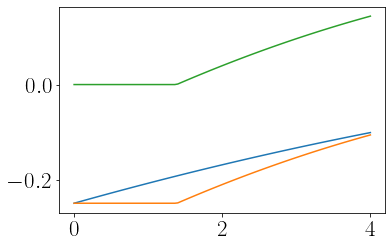

In [435]:
# plt.plot(GeCenters[:], corrections[:])
x = np.linspace(0, 4, 101)
plt.plot(x, -0.00164 * x**2 + 0.04377 * x - 0.25)
a = (res_lsq.x[0] * x**2 + res_lsq.x[1] * x + res_lsq.x[2]) + 0.25
plt.plot(x, np.where(a>0, a, 0)-0.25)
a = (-0.00467*x**2 + 0.0802 *x  -0.352) + 0.25
plt.plot(x, np.where((-0.00467*x**2 + 0.0802 *x  -0.352) + 0.25>0, (-0.00467*x**2 + 0.0802 *x  -0.352) + 0.25, 0))
# plt.plot(2/(1+np.exp(-x/0.1))-1 )

In [576]:
res_lsq.x

array([-0.00164329,  0.04377351])

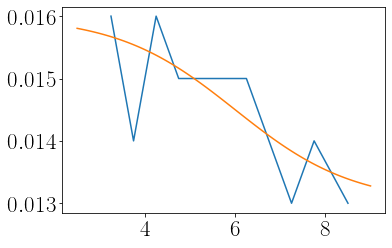

In [551]:
plt.plot(GeCenters[:], smearing[:])
# plt.plot(x, 0.013 + 0.003/(1+np.exp(1*(x-6))))
plt.plot(x, 0.013 + 0.003/(1+np.exp(res_lsq.x[0]*(x-6))))


In [546]:
def sigmoidfit2(args, x):
#     df = args
    b = args
#     print(df)
    return 0.013 + 0.003/(1+np.exp(b*(x-6)))

In [547]:
def lstsq_sigmoidfit2(args, x, y):
#     print(args, x, y)
    return sigmoidfit2(args, x) - y

In [382]:
res_lsq = least_squares(lstsq_sigmoidfit2, [0.005], args=(GeCenters, smearing))

NameError: name 'sigmoidfit2' is not defined

In [422]:
print(res_lsq.x)

[-0.00466559  0.08024661 -0.35248212]


In [177]:
def quadratic(args, x):
#     df = args
    a, b, c = args
#     print(df)
    return a*x**2 + b*x  + c

In [178]:
def lstsq_quadraticfit(args, x, y):
#     print(args, x, y)
    return quadratic(args, x) - y

In [388]:
res_lsq = least_squares(lstsq_quadraticfit, [0, 0.25/10, -0.25], args=(GeCenters, corrections))

In [389]:
res_lsq.x

array([-0.00466559,  0.08024661, -0.35248212])

In [151]:
res_lsq.x

array([0.00539298, 0.47793752])

In [37]:
dvcsSimInb = pd.read_pickle("/Volumes/Extreme SSD/3987.pkl")
dvcsSimInbCDFT = dvcsSimInb.loc[dvcsSimInb.config==3]
dvcsSimInbCD = dvcsSimInb.loc[dvcsSimInb.config==2]
dvcsSimInbFD = dvcsSimInb.loc[dvcsSimInb.config==1]


In [38]:
epgExpInb = pd.read_pickle("/Volumes/Extreme SSD/dvcs.pkl")
epgExpInbCDFT = epgExpInb.loc[epgExpInb.config == 3]
epgExpInbCD = epgExpInb.loc[epgExpInb.config == 2]
epgExpInbFD = epgExpInb.loc[epgExpInb.config == 1]

In [39]:
dvcsSimOutb = pd.read_pickle("/Volumes/Extreme SSD/4240.pkl")
dvcsSimOutbCDFT = dvcsSimOutb.loc[dvcsSimOutb.config==3]
dvcsSimOutbCD = dvcsSimOutb.loc[dvcsSimOutb.config==2]
dvcsSimOutbFD = dvcsSimOutb.loc[dvcsSimOutb.config==1]

In [40]:
epgExpOutb = pd.read_pickle("/Volumes/Extreme SSD/dvcs_outb.pkl")
epgExpOutbCDFT = epgExpOutb.loc[epgExpOutb.config == 3]
epgExpOutbCD = epgExpOutb.loc[epgExpOutb.config == 2]
epgExpOutbFD = epgExpOutb.loc[epgExpOutb.config == 1]

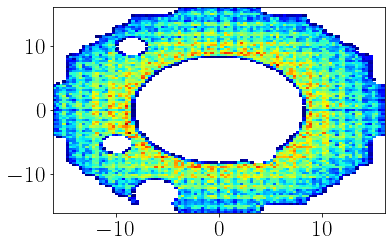

In [120]:
plt.hist2d(dvcsSimInbCDFT.GcX, dvcsSimInbCDFT.GcY, bins = 101, cmin = 1, cmap =cmap)
plt.show()

In [101]:
theta = np.linspace(0, 2*np.pi, 101)
circleCenterX4 = 3.7
circleCenterY4 = -6.5
circleRadius4 = 2

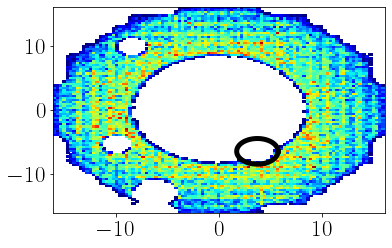

In [103]:
plt.hist2d(epgExpInbCDFT.GcX, epgExpInbCDFT.GcY, bins = 101, cmin = 1, cmap =cmap)
plt.plot(circleRadius4*np.cos(theta) + circleCenterX4, circleRadius4*np.sin(theta) + circleCenterY4, color = 'k', linewidth = 5)

plt.show()

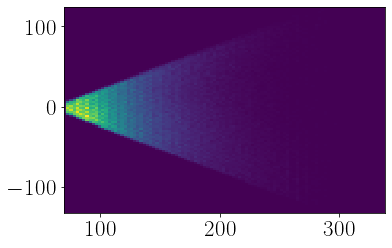

In [34]:
plt.hist2d(dvcsSimInbCD.loc[dvcsSimInbCD.GFid==1].GcX, dvcsSimInbCD.loc[dvcsSimInbCD.GFid==1].GcY, bins = 101)
plt.show()

In [33]:
dvcsSimInbCDFT.loc[dvcsSimInbCDFT.GFid==1]

Epx       Epy       Epz  Esector    event       Ppx       Ppy  \
0      -0.514831 -0.742681  2.424227        5        0  0.322862  0.244472   
7       1.010972  0.131285  5.776315        1       22 -0.705926 -0.282749   
11      0.379398  0.752703  2.715642        2       32 -0.342991 -0.233571   
14     -0.082826 -0.731427  1.989691        5       48  0.267030  1.021397   
17     -0.505642 -0.809460  3.429861        5       68  0.245321  0.546658   
...          ...       ...       ...      ...      ...       ...       ...   
806306 -0.493069 -0.844318  3.684721        5  3832804  0.244887  0.828123   
806315 -0.861040 -0.004852  2.568251        4  3832839  0.633190 -0.249389   
806318 -0.730749 -0.183920  2.059072        4  3832858  0.320887  0.149839   
806322  0.006150  0.596215  1.926809        2  3832869  0.156293 -0.957716   
806327 -0.463467  0.540110  2.285343        3  3832892  0.082209 -0.310069   

             Ppz   Pstat  Psector  ...  GenGpz     GenGp  GenGp2 GenGpx2  \
0       0.331956  4110.0   4110.0  ...  7.8631  7.881236     NaN     NaN   
7       0.458466  4110.0   4110.0  ...  4.3154  4.327474     NaN     NaN   
11      0.277857  4110.0   4110.0  ...  7.6156  7.633443     NaN     NaN   
14      0.850208  4110.0   4110.0  ...  7.7291  7.737474     NaN     NaN   
17      0.382979  4110.0   4110.0  ...  6.7307  6.738768     NaN     NaN   
...          ...     ...      ...  ...     ...       ...     ...     ...   
806306  0.598014  4100.0   4100.0  ...  6.2139  6.220010     NaN     NaN   
806315  0.457802  4110.0   4110.0  ...  7.5873  7.595390     NaN     NaN   
806318  0.237207  4110.0   4110.0  ...  8.3093  8.318191     NaN     NaN   
806322  0.652225  4110.0   4110.0  ...  7.9999  8.009849     NaN     NaN   
806327  0.186031  4100.0   4100.0  ...  8.1302  8.142311     NaN     NaN   

        GenGpy2  GenGpz2  GenGtheta     GenGphi  GenGtheta2  GenGphi2  
0           NaN      NaN   3.887758   69.309676         NaN       NaN  
7           NaN      NaN   4.281056  151.427759         NaN       NaN  
11          NaN      NaN   3.918283  -94.078574         NaN       NaN  
14          NaN      NaN   2.665847 -121.269565         NaN       NaN  
17          NaN      NaN   2.803919   41.261139         NaN       NaN  
...         ...      ...        ...         ...         ...       ...  
806306      NaN      NaN   2.539737   13.683317         NaN       NaN  
806315      NaN      NaN   2.644778   46.421983         NaN       NaN  
806318      NaN      NaN   2.649227    2.176252         NaN       NaN  
806322      NaN      NaN   2.856061  113.681165         NaN       NaN  
806327      NaN      NaN   3.125366  -31.129766         NaN       NaN  

[292634 rows x 88 columns]

In [15]:
dvcsSimInbCDFT.GFid

0         1
7         1
11        1
14        1
17        1
         ..
806317    0
806318    1
806322    1
806325    0
806327    1
Name: GFid, Length: 307798, dtype: int64

In [18]:
cut_GFid_CDFT = dvcsSimInbCDFT.GFid==1

In [19]:
cut_GFid_CDFT

0          True
7          True
11         True
14         True
17         True
          ...  
806317    False
806318     True
806322     True
806325    False
806327     True
Name: GFid, Length: 307798, dtype: bool

<AxesSubplot:>

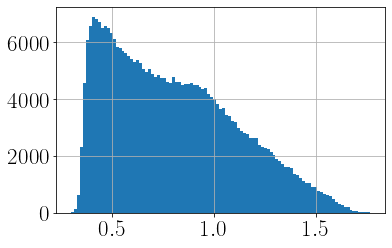

In [121]:
dvcsSimInbCDFT.Pp.hist(bins = 101)

In [251]:
from scipy.stats import norm
from scipy.stats import chi2

In [301]:
def normfit(args, x):
#     df = args
    loc, scale, a, b = args
#     print(df)
    rv = norm(loc = loc, scale = scale)
    return rv.pdf(x) + a + b*x

In [302]:
def lstsq_normfit(args, x, y):
#     print(args, x, y)
    return normfit(args, x) - y

In [254]:
def probFit(dist, bins, fit, res_lsq, hist = None, unchist = None):
    hist = dist
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    unchist = np.sqrt(dist)
    chi2fit = np.sum((dist - fit)**2/unchist**2)
    dof = len(hist) - len(res_lsq.x)
    pvalue = 1-chi2.cdf(chi2fit, dof)
    return pvalue, chi2fit, dof

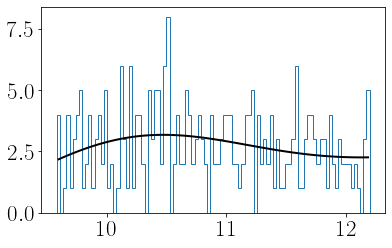

3 [10.16631044  1.00605704 -1.13175617  0.11459332] 0.0
10.166310440322947 7.148139317333593 6.771041921469534


<ipython-input-433-927f42d882dd>:29: RuntimeWarning: divide by zero encountered in true_divide
  chi2fit = np.sum((hist - normfit(res_lsq.x, bincenters)*np.sum(hist)*np.diff(bincenters)[0])**2/unchist**2)


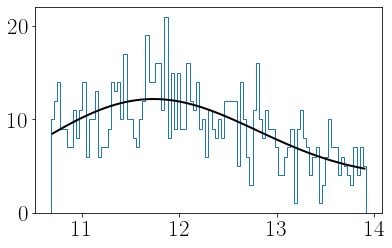

3.5 [11.64842688  1.14910901 -0.20420092  0.02225496] 4.706542353138943e-05
11.648426884581374 8.201099859836965 11.035824122759307


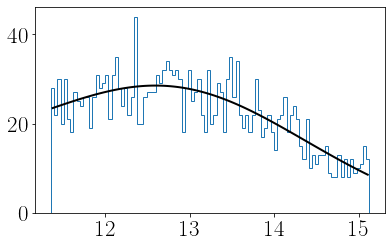

4 [12.83254091  1.53211574  0.40697812 -0.02600656] 0.4788499835600566
12.83254091056562 8.236193691790957 14.053475260202896


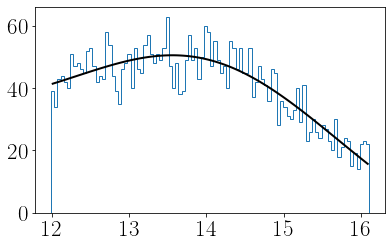

4.5 [14.01662269  1.69673744  0.56117601 -0.03605916] 0.9171545669282006
14.016622691552142 8.92641037441295 15.7001507185967


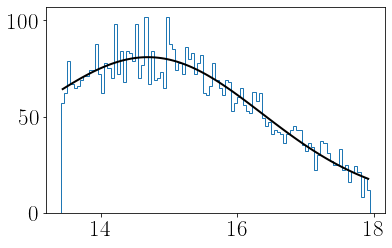

5 [ 1.47697398e+01  1.59649137e+00  1.74646973e-01 -8.01471398e-03] 0.48396995731860937
14.769739810698708 9.98026570025429 15.29368072825847


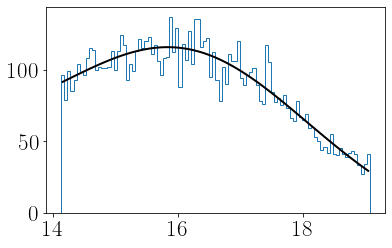

5.5 [16.14975059  1.91554783  0.33289319 -0.01749238] 0.16501658221256943
16.14975059497653 10.403107117939856 17.148430165298205


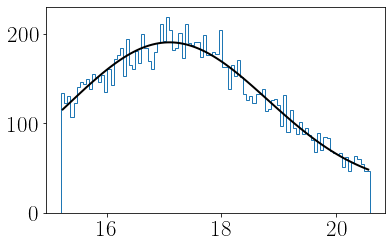

6 [ 1.70700201e+01  1.73725029e+00 -1.04349631e-03  1.74523598e-03] 0.3050236758042095
17.07002013799326 11.858269274485982 17.066889649050328


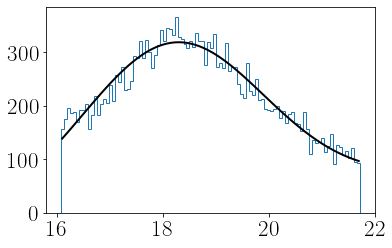

6.5 [ 1.81910199e+01  1.70943715e+00 -1.44746377e-01  8.85070082e-03] 2.124675324566283e-09
18.19101985280085 13.062708407232723 17.75678072217604


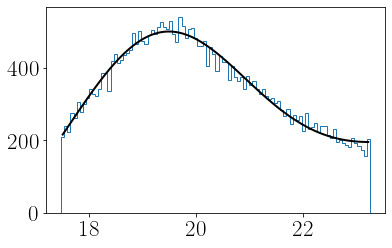

7 [19.26371735  1.65881254 -0.37681748  0.01976758] 0.1570754884606178
19.263717346245 14.28727971432442 18.133264893862542


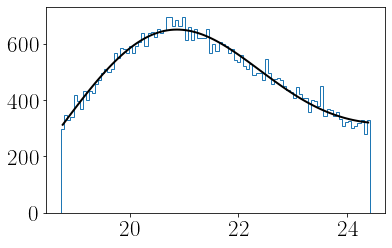

7.5 [ 2.05472936e+01  1.84221190e+00 -4.06578191e-01  2.03205879e-02] 0.1551824416333344
20.54729360718953 15.020657897923284 19.32755903269167


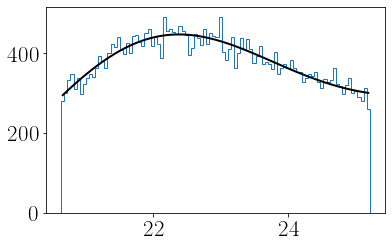

8 [21.91180178  1.84584269 -0.59683493  0.0287315 ] 0.07796440988735687
21.91180177781025 16.37427370223493 20.12129700039251


In [433]:
GpEdges = [3, 3.5, 4, 4.5, 5,5.5, 6, 6.5, 7, 7.5, 8, 8.5]
GpArray = []
coneAngleMinArray = []
coneAngleMaxArray = []
for i in range(len(GpEdges)-1):
    GpMin = GpEdges[i]
    GpMax = GpEdges[i+1]
    var = dvcsSimInbCDFT.loc[(dvcsSimInbCDFT.Gp>GpMin)&(dvcsSimInbCDFT.Gp<GpMax), "coneAngle"]
    hist, bins = np.histogram(var, bins = 100)
    mu = bins[np.argmax(hist)]
    sigma = var.std()
    
    bins = np.linspace(mu-0.5*sigma, mu+1*sigma, 101)
#     if i >3:
#         bins = np.linspace(mu-sigma, mu+0.8*sigma, 101)

    
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    hist, bins = np.histogram(var, bins = bins)
    dist = hist/np.sum(hist)/np.diff(bins)[0]
    unchist = np.sqrt(hist)
    uncdist = unchist/np.sum(hist)/np.diff(bins)[0]
    params = [mu, sigma, 0, 0]
    res_lsq = least_squares(lstsq_normfit, params, args=(bincenters, dist))
    plt.hist(var, bins = bins, histtype = 'step')
    
    plt.plot(bincenters, normfit(res_lsq.x, bincenters)*np.sum(hist)*np.diff(bincenters)[0], 'k-', lw=2, label='frozen pdf')
    plt.show()
    chi2fit = np.sum((hist - normfit(res_lsq.x, bincenters)*np.sum(hist)*np.diff(bincenters)[0])**2/unchist**2)
    dof = len(hist) - len(res_lsq.x)
    pvalue = 1-chi2.cdf(chi2fit, dof)
    print(GpMin, res_lsq.x ,pvalue)
    print(res_lsq.x[0], res_lsq.x[0]-3*res_lsq.x[1], res_lsq.x[0]+3*res_lsq.x[2])
    GpArray.append((GpMin + GpMax)/2)
    coneAngleMinArray.append(res_lsq.x[0]-1.5*res_lsq.x[1])
    coneAngleMaxArray.append(res_lsq.x[0]+3*res_lsq.x[1])

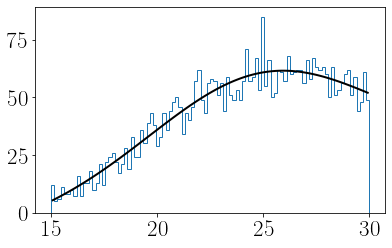

2 [ 2.49499295e+01  5.34577452e+00 -4.34437287e-02  2.53453842e-03] 0.6921717129991123
24.949929505362654 8.912605956539046 24.81959831924048


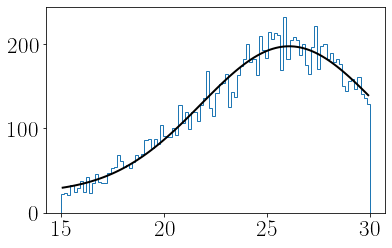

2.5 [ 2.60821700e+01  4.27647934e+00  1.26360978e-02 -1.47509577e-05] 0.0002868843070379379
26.082169983930374 13.252731975761012 26.120078277257935


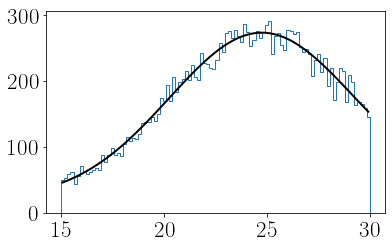

3 [2.47202583e+01 4.46692923e+00 5.64272705e-03 1.44386318e-04] 0.7192885172665827
24.72025833045154 11.319470637991937 24.737186511606705


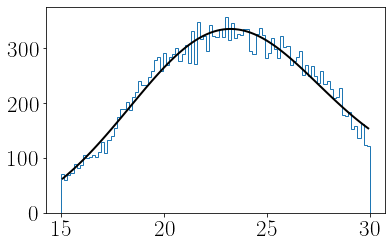

3.5 [ 2.29188865e+01  4.58346890e+00 -2.18368880e-02  1.27626905e-03] 0.0014144179954739267
22.918886548907714 9.168479836389327 22.85337588479027


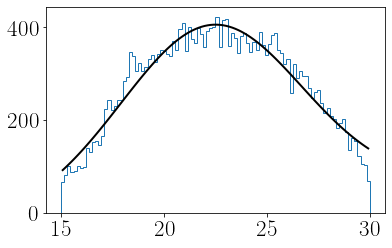

4 [ 2.22985042e+01  4.37806260e+00 -1.62487358e-02  9.79988095e-04] 0.0
22.298504185458647 9.1643163947139 22.24975797803611


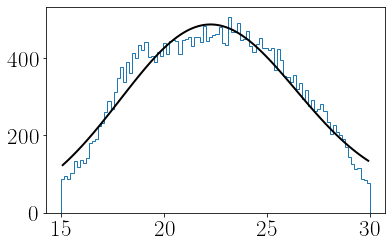

4.5 [ 2.21540448e+01  4.26728070e+00 -6.92965076e-03  5.44401191e-04] 0.0
22.154044825964416 9.352202724709091 22.133255873683254


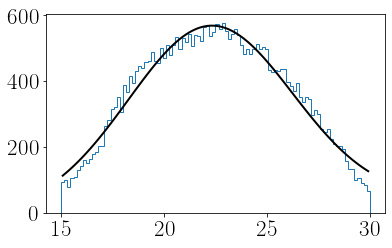

5 [ 2.22606042e+01  3.98767532e+00 -5.72161790e-03  4.33393378e-04] 0.0
22.260604221641337 10.297578262200977 22.243439367954842


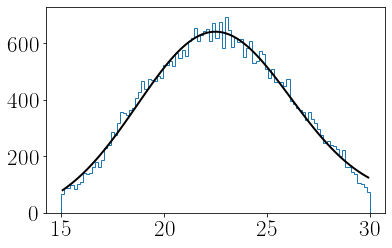

5.5 [ 2.24210218e+01  3.71752775e+00 -1.06489883e-02  6.02709721e-04] 4.285460875053104e-14
22.42102184103227 11.26843858861541 22.389074876176885


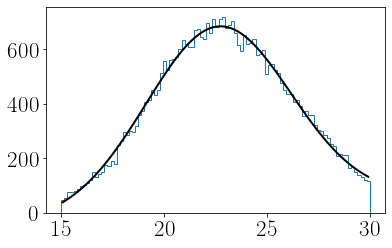

6 [ 2.26461420e+01  3.51132099e+00 -1.87032836e-02  9.28505095e-04] 0.03807249043756222
22.646141966394353 12.112178991938269 22.590032115684263


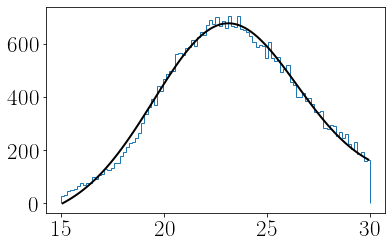

6.5 [ 2.29709014e+01  3.47472346e+00 -3.08685001e-02  1.46800301e-03] 1.1102230246251565e-16
22.970901419516537 12.546731033726969 22.878295919071615


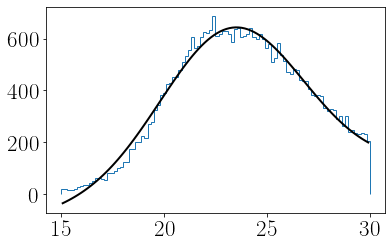

7 [ 2.32923703e+01  3.48845769e+00 -4.53708943e-02  2.12304270e-03] 0.0
23.29237031450542 12.826997251834857 23.1562576317236


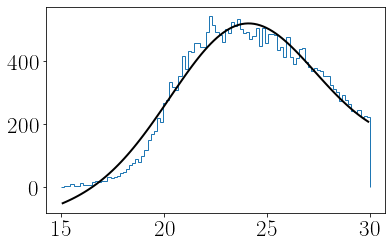

7.5 [ 2.38118653e+01  3.52724069e+00 -5.71846174e-02  2.67756361e-03] 0.0
23.811865267938654 13.230143191586535 23.640311415830496


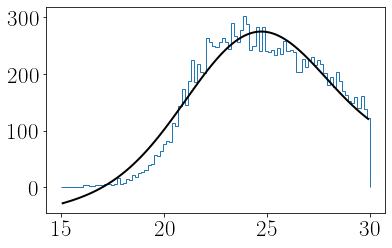

8 [ 2.44711538e+01  3.40471906e+00 -5.46312595e-02  2.59068783e-03] 0.0
24.471153833493744 14.256996663242441 24.307260055020638


<ipython-input-447-ae24b7c34016>:29: RuntimeWarning: divide by zero encountered in true_divide
  chi2fit = np.sum((hist - normfit(res_lsq.x, bincenters)*np.sum(hist)*np.diff(bincenters)[0])**2/unchist**2)


In [447]:
GpEdges = [2, 2.5, 3, 3.5, 4, 4.5, 5,5.5, 6, 6.5, 7, 7.5, 8, 8.5]
GpArray = []
coneAngleMinArray = []
coneAngleMaxArray = []
for i in range(len(GpEdges)-1):
    GpMin = GpEdges[i]
    GpMax = GpEdges[i+1]
    var = dvcsSimInbCD.loc[(dvcsSimInbCD.Gp>GpMin)&(dvcsSimInbCD.Gp<GpMax), "coneAngle"]
    hist, bins = np.histogram(var, bins = 100)
    mu = bins[np.argmax(hist)]
    sigma = var.std()
    
    bins = np.linspace(15, 30, 101)
#     if i >3:
#         bins = np.linspace(mu-sigma, mu+0.8*sigma, 101)

    
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    hist, bins = np.histogram(var, bins = bins)
    dist = hist/np.sum(hist)/np.diff(bins)[0]
    unchist = np.sqrt(hist)
    uncdist = unchist/np.sum(hist)/np.diff(bins)[0]
    params = [mu, sigma, 0, 0]
    res_lsq = least_squares(lstsq_normfit, params, args=(bincenters, dist))
    plt.hist(var, bins = bins, histtype = 'step')
    
    plt.plot(bincenters, normfit(res_lsq.x, bincenters)*np.sum(hist)*np.diff(bincenters)[0], 'k-', lw=2, label='frozen pdf')
    plt.show()
    chi2fit = np.sum((hist - normfit(res_lsq.x, bincenters)*np.sum(hist)*np.diff(bincenters)[0])**2/unchist**2)
    dof = len(hist) - len(res_lsq.x)
    pvalue = 1-chi2.cdf(chi2fit, dof)
    print(GpMin, res_lsq.x ,pvalue)
    print(res_lsq.x[0], res_lsq.x[0]-3*res_lsq.x[1], res_lsq.x[0]+3*res_lsq.x[2])
    GpArray.append((GpMin + GpMax)/2)
    coneAngleMinArray.append(res_lsq.x[0]-1.5*res_lsq.x[1])
    coneAngleMaxArray.append(res_lsq.x[0]+3*res_lsq.x[1])

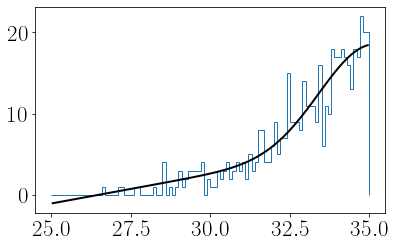

2 [ 3.50264683e+01  1.61499300e+00 -3.80503469e-01  1.43719125e-02] 0.0
35.026468283053376 30.18148928813769 33.88495787660142


<ipython-input-459-9d26b2263b2c>:29: RuntimeWarning: divide by zero encountered in true_divide
  chi2fit = np.sum((hist - normfit(res_lsq.x, bincenters)*np.sum(hist)*np.diff(bincenters)[0])**2/unchist**2)


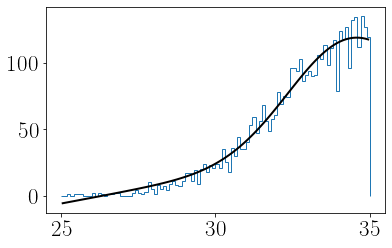

<ipython-input-459-9d26b2263b2c>:29: RuntimeWarning: divide by zero encountered in true_divide
  chi2fit = np.sum((hist - normfit(res_lsq.x, bincenters)*np.sum(hist)*np.diff(bincenters)[0])**2/unchist**2)


2.5 [ 3.43612726e+01  2.02215436e+00 -2.71789921e-01  1.03131379e-02] 0.0
34.36127258877073 28.294809510353165 33.545902825007296


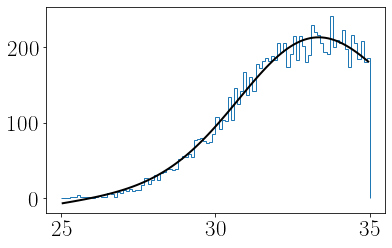

<ipython-input-459-9d26b2263b2c>:29: RuntimeWarning: divide by zero encountered in true_divide
  chi2fit = np.sum((hist - normfit(res_lsq.x, bincenters)*np.sum(hist)*np.diff(bincenters)[0])**2/unchist**2)


3 [ 3.31403144e+01  2.39403044e+00 -1.54898615e-01  5.89314614e-03] 0.0
33.140314356571615 25.958223029687765 32.67561851156021


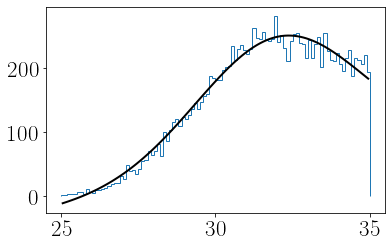

3.5 [ 3.20844955e+01  2.73131830e+00 -1.53699857e-01  5.61538979e-03] 0.0
32.08449550591378 23.89054061607112 31.62339593446158


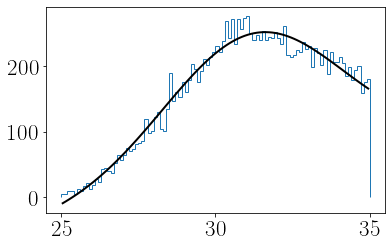

4 [ 3.12029057e+01  2.91914591e+00 -1.82910138e-01  6.47518193e-03] 8.588685318500211e-13
31.20290566742191 22.44546793771317 30.654175253810237


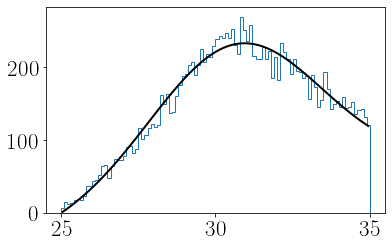

4.5 [ 3.06381617e+01  2.80795312e+00 -1.56486620e-01  5.49113893e-03] 0.004728454713017194
30.63816172932366 22.21430237187819 30.168701870097728


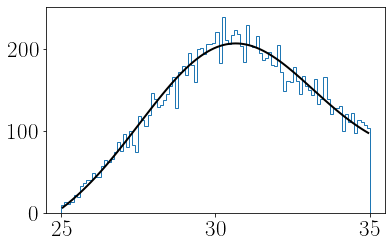

5 [ 3.03499305e+01  2.80606687e+00 -1.56507941e-01  5.47365876e-03] 0.152906769825927
30.349930510807035 21.931729906639433 29.88040668886542


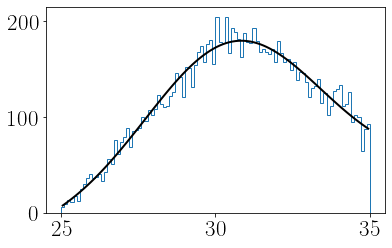

5.5 [ 3.05660982e+01  2.83758290e+00 -1.33242626e-01  4.72131742e-03] 0.34658829188375007
30.566098180083078 22.05334949093723 30.166370302520203


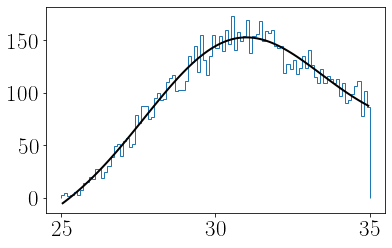

6 [ 3.05644059e+01  2.86983961e+00 -2.09607498e-01  7.27805537e-03] 0.009392867532937
30.5644059410743 21.954887102924445 29.935583447633675


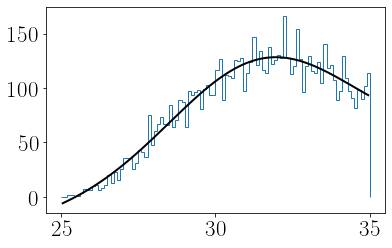

6.5 [ 3.14931297e+01  2.98882665e+00 -1.90903111e-01  6.81419638e-03] 0.0
31.493129720042898 22.52664978026935 30.920420388342084


<ipython-input-459-9d26b2263b2c>:29: RuntimeWarning: divide by zero encountered in true_divide
  chi2fit = np.sum((hist - normfit(res_lsq.x, bincenters)*np.sum(hist)*np.diff(bincenters)[0])**2/unchist**2)


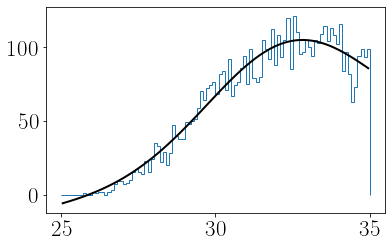

7 [ 3.24719708e+01  2.75903944e+00 -1.77687546e-01  6.53335248e-03] 0.0
32.4719707996507 24.194852468270035 31.938908160506113


<ipython-input-459-9d26b2263b2c>:29: RuntimeWarning: divide by zero encountered in true_divide
  chi2fit = np.sum((hist - normfit(res_lsq.x, bincenters)*np.sum(hist)*np.diff(bincenters)[0])**2/unchist**2)


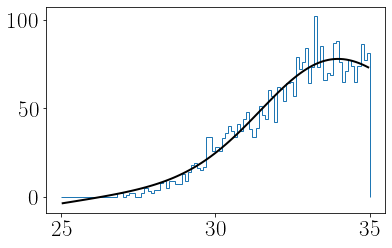

<ipython-input-459-9d26b2263b2c>:29: RuntimeWarning: divide by zero encountered in true_divide
  chi2fit = np.sum((hist - normfit(res_lsq.x, bincenters)*np.sum(hist)*np.diff(bincenters)[0])**2/unchist**2)


7.5 [ 3.37306808e+01  2.27968477e+00 -2.14833252e-01  8.12404917e-03] 0.0
33.73068077646708 26.89162645333524 33.08618101905517


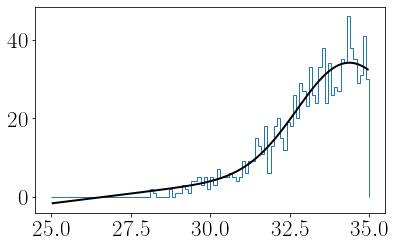

8 [ 3.42789012e+01  1.55910116e+00 -2.60056748e-01  9.74132371e-03] 0.0
34.278901204764296 29.601597722734773 33.498730962125165


<ipython-input-459-9d26b2263b2c>:29: RuntimeWarning: divide by zero encountered in true_divide
  chi2fit = np.sum((hist - normfit(res_lsq.x, bincenters)*np.sum(hist)*np.diff(bincenters)[0])**2/unchist**2)


In [459]:
GpEdges = [2, 2.5, 3, 3.5, 4, 4.5, 5,5.5, 6, 6.5, 7, 7.5, 8, 8.5]
GpArray = []
coneAngleMinArray = []
coneAngleMaxArray = []
for i in range(len(GpEdges)-1):
    GpMin = GpEdges[i]
    GpMax = GpEdges[i+1]
    var = dvcsSimInbFD.loc[(dvcsSimInbFD.Gp>GpMin)&(dvcsSimInbFD.Gp<GpMax), "coneAngle"]
    hist, bins = np.histogram(var, bins = 100)
    mu = bins[np.argmax(hist)]
    sigma = var.std()
    
    bins = np.linspace(25, 35, 101)
#     if i >3:
#         bins = np.linspace(mu-sigma, mu+0.8*sigma, 101)

    
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    hist, bins = np.histogram(var, bins = bins)
    dist = hist/np.sum(hist)/np.diff(bins)[0]
    unchist = np.sqrt(hist)
    uncdist = unchist/np.sum(hist)/np.diff(bins)[0]
    params = [mu, sigma, 0, 0]
    res_lsq = least_squares(lstsq_normfit, params, args=(bincenters, dist))
    plt.hist(var, bins = bins, histtype = 'step')
    
    plt.plot(bincenters, normfit(res_lsq.x, bincenters)*np.sum(hist)*np.diff(bincenters)[0], 'k-', lw=2, label='frozen pdf')
    plt.show()
    chi2fit = np.sum((hist - normfit(res_lsq.x, bincenters)*np.sum(hist)*np.diff(bincenters)[0])**2/unchist**2)
    dof = len(hist) - len(res_lsq.x)
    pvalue = 1-chi2.cdf(chi2fit, dof)
    print(GpMin, res_lsq.x ,pvalue)
    print(res_lsq.x[0], res_lsq.x[0]-3*res_lsq.x[1], res_lsq.x[0]+3*res_lsq.x[2])
    GpArray.append((GpMin + GpMax)/2)
    coneAngleMinArray.append(res_lsq.x[0]-1.5*res_lsq.x[1])
    coneAngleMaxArray.append(res_lsq.x[0]+3*res_lsq.x[1])

In [350]:
print(GpArray)

[3.25, 3.75, 4.25, 4.75, 5.25, 5.75, 6.25, 6.75, 7.25, 7.75, 8.25]


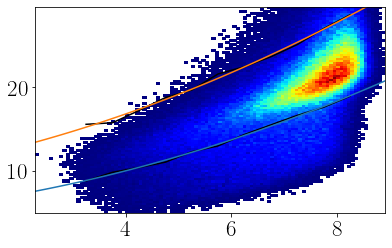

In [402]:
plt.hist2d(dvcsSimInbCDFT.Gp, dvcsSimInbCDFT.coneAngle, bins = 101, cmap = cmap, cmin =1)
plt.plot(GpArray, coneAngleMinArray, color = 'k')
plt.plot(GpArray, coneAngleMaxArray, color = 'k')
x = np.linspace(0, 10, 101)
plt.plot(x, params_1[0]*x**2 + params_1[1]*x + params_1[2])
plt.plot(x, params_2[0]*x**2 + params_2[1]*x + params_2[2])
plt.show()

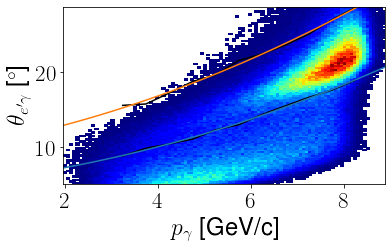

In [384]:
plt.hist2d(dvcsSimOutbCDFT.Gp, dvcsSimOutbCDFT.coneAngle, bins = 101, cmap = cmap, cmin =1)
plt.plot(GpArray, coneAngleMinArray, color = 'k')
plt.plot(GpArray, coneAngleMaxArray, color = 'k')
x = np.linspace(0, 10, 101)
plt.plot(x, params_1[0]*x**2 + params_1[1]*x + params_1[2])
plt.plot(x, params_2[0]*x**2 + params_2[1]*x + params_2[2])
plt.xlabel(r"$p_{\gamma}$" + " ["+GeVc+"]")
plt.ylabel(r"$\theta_{e'\gamma}$" + " ["+degree+"]")
plt.show()

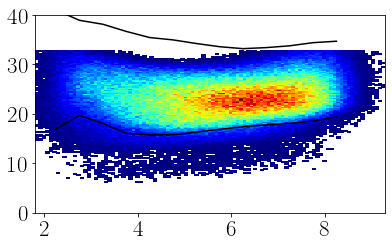

In [449]:
plt.hist2d(dvcsSimInbCD.Gp, dvcsSimInbCD.coneAngle, bins = 101, cmap = cmap, cmin =1)
plt.plot(GpArray, coneAngleMinArray, color = 'k')
plt.plot(GpArray, coneAngleMaxArray, color = 'k')
# x = np.linspace(0, 10, 101)
# plt.plot(x, params_1[0]*x**2 + params_1[1]*x + params_1[2])
# plt.plot(x, params_2[0]*x**2 + params_2[1]*x + params_2[2])
plt.ylim(0, 40)
plt.show()

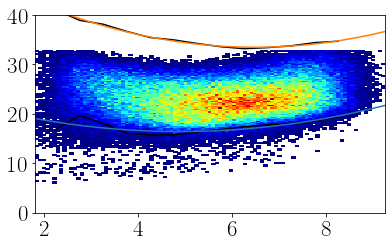

In [453]:
plt.hist2d(epgExpInbCD.Gp, epgExpInbCD.coneAngle, bins = 101, cmap = cmap, cmin =1)
plt.plot(GpArray, coneAngleMinArray, color = 'k')
plt.plot(GpArray, coneAngleMaxArray, color = 'k')
x = np.linspace(0, 10, 101)
plt.plot(x, params_1[0]*x**2 + params_1[1]*x + params_1[2])
plt.plot(x, params_2[0]*x**2 + params_2[1]*x + params_2[2])
plt.ylim(0, 40)
plt.show()

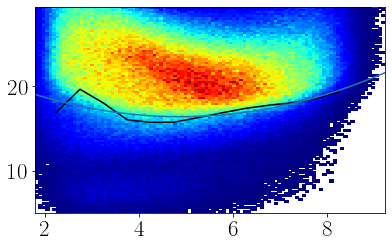

In [454]:
plt.hist2d(dvcsSimOutbCD.Gp, dvcsSimOutbCD.coneAngle, bins = 101, cmap = cmap, cmin =1)
plt.plot(GpArray, coneAngleMinArray, color = 'k')
plt.plot(GpArray, coneAngleMaxArray, color = 'k')
x = np.linspace(0, 10, 101)
plt.plot(x, params_1[0]*x**2 + params_1[1]*x + params_1[2])
plt.plot(x, params_2[0]*x**2 + params_2[1]*x + params_2[2])
plt.show()

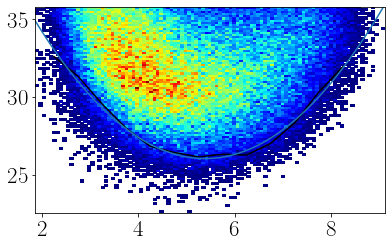

In [462]:
plt.hist2d(dvcsSimInbFD.Gp, dvcsSimInbFD.coneAngle, bins = 101, cmap = cmap, cmin =1)
plt.plot(GpArray, coneAngleMinArray, color = 'k')
plt.plot(GpArray, coneAngleMaxArray, color = 'k')
# x = np.linspace(0, 10, 101)
plt.plot(x, params_1[0]*x**2 + params_1[1]*x + params_1[2])
plt.plot(x, params_2[0]*x**2 + params_2[1]*x + params_2[2])
plt.show()

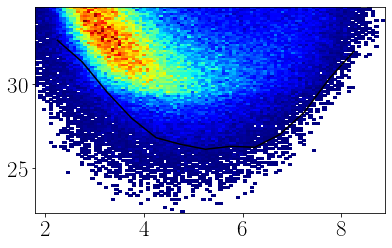

In [465]:
plt.hist2d(dvcsSimOutbFD.Gp, dvcsSimOutbFD.coneAngle, bins = 101, cmap = cmap, cmin =1)
plt.plot(GpArray, coneAngleMinArray, color = 'k')
plt.plot(GpArray, coneAngleMaxArray, color = 'k')
x = np.linspace(0, 10, 101)
# plt.plot(x, params_1[0]*x**2 + params_1[1]*x + params_1[2])
# plt.plot(x, params_2[0]*x**2 + params_2[1]*x + params_2[2])
plt.plot(x, 0.0673 * x**2 - 0.752*x + 41.678)
plt.show()

In [379]:
print(params_1, params_2)#CDFT

[0.11543103 0.70201555 5.35929264] [ 0.13342889  1.13966526 10.12948609]


In [455]:
print(params_1, params_2)#CD

[ 0.27758654 -2.71074224 23.02066194] [ 0.41647777 -5.40120431 50.98000762]


In [463]:
print(params_1, params_2)#FD

[ 0.71209811 -7.676027   46.719912  ] [ 0.06734348 -0.75202143 41.67763615]


In [461]:
res_lsq = least_squares(lstsq_linearfit, [0, 20, -10], args=(GpArray, coneAngleMinArray))
params_1 = res_lsq.x
res_lsq = least_squares(lstsq_linearfit, [0, 20, -10], args=(GpArray, coneAngleMaxArray))
params_2 = res_lsq.x

In [353]:
def lstsq_linearfit(args, x, y):
    a, b, c = args
    x = np.array(x)
    y = np.array(y)
    return a*x**2 + b*x + c - y

<AxesSubplot:>

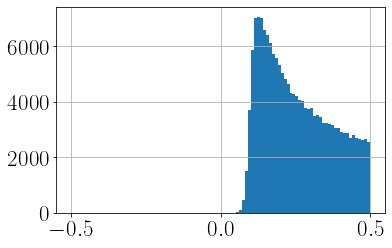

In [130]:
(dvcsSimInbCDFT.t1 - dvcsSimInbCDFT.tmin1).hist(bins = np.linspace(-0.5, 0.5, 101))

<AxesSubplot:>

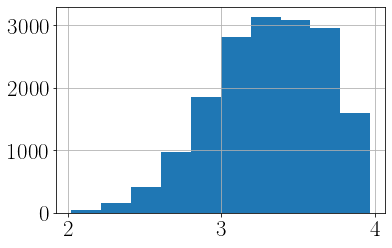

In [150]:
epgExpInbCDFT.loc[(epgExpInbCDFT.Pp>1.0)&(epgExpInbCDFT.Pp<1.3), "W"].hist()

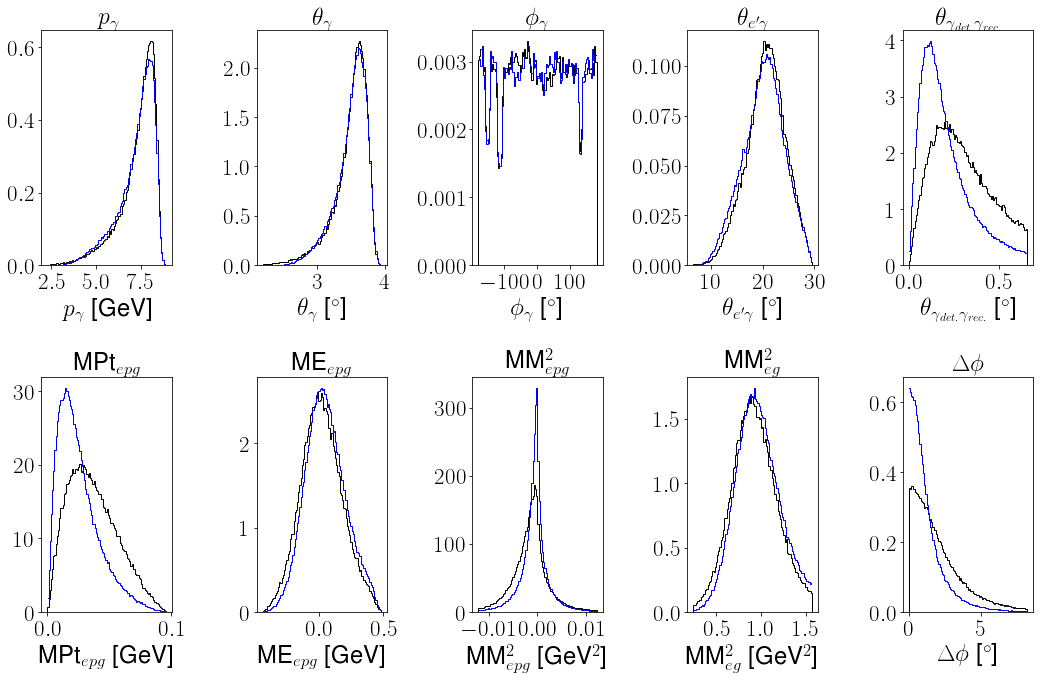

In [293]:
varstoplot = ["Gp", "W", "Gphi", "coneAngle",  "reconGam", "MPt", "ME_epg", "MM2_epg", "MM2_eg", "coplanarity"]
title = [r"$p_{\gamma}$", r"$\theta_{\gamma}$", r"$\phi_{\gamma}$", r"$\theta_{e'\gamma}$", r"$\theta_{\gamma_{det.}\gamma_{rec.}}$", "MPt"+r"${}_{epg}$", "ME"+r"${}_{epg}$", "MM"+r"${}^{2}_{epg}$", "MM"+r"${}^{2}_{eg}$", r"$\Delta \phi$"]
unit = [GeV, degree, degree, degree, degree, GeV, GeV, GeV2, GeV2, degree]
fig, axs = plt.subplots(2, 5, figsize = (15,10))
for yind in range(0, 2):
    for xind in range(0,5):
        ind = 5*yind + xind
        # start = binstarts[ind]
        # end = binends[ind]
        # bins = np.linspace(start, end, 101)
        simDist_dvcs, bins = np.histogram(dvcsSimInbCDFT.loc[(dvcsSimInbCDFT.coneAngle> -2.029*dvcsSimInbCDFT.Ep + 20.072) & (dvcsSimInbCDFT.coneAngle< -3.121*dvcsSimInbCDFT.Ep + 35.788) , varstoplot[ind]], 100, density = True)
        simDist = simDist_dvcs
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        axs[yind, xind].step(bincenters, simDist, where='mid',color='b', linewidth=1)
        axs[yind, xind].hist(epgExpInbCDFT.loc[(epgExpInbCDFT.coneAngle> -2.029*epgExpInbCDFT.Ep + 20.072) & (epgExpInbCDFT.coneAngle< -3.121*epgExpInbCDFT.Ep + 35.788)  , varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', density=True, linewidth=1)
        axs[yind, xind].set_title(title[ind])
        # axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
plt.tight_layout()
plt.show()

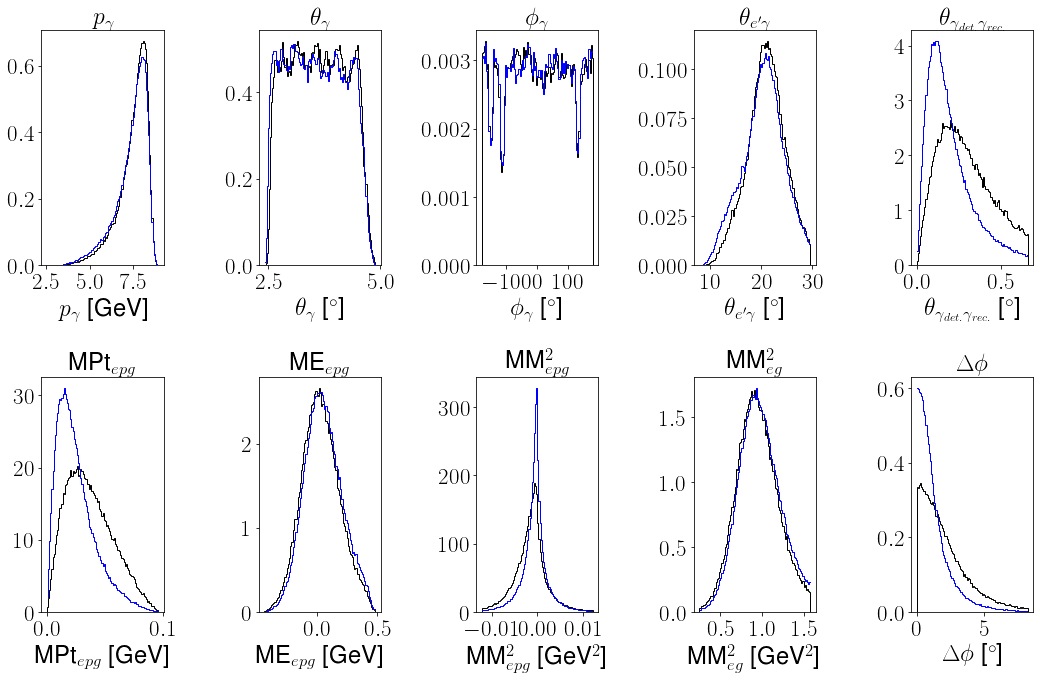

In [134]:
varstoplot = ["Gp", "Gtheta", "Gphi", "coneAngle",  "reconGam", "MPt", "ME_epg", "MM2_epg", "MM2_eg", "coplanarity"]
title = [r"$p_{\gamma}$", r"$\theta_{\gamma}$", r"$\phi_{\gamma}$", r"$\theta_{e'\gamma}$", r"$\theta_{\gamma_{det.}\gamma_{rec.}}$", "MPt"+r"${}_{epg}$", "ME"+r"${}_{epg}$", "MM"+r"${}^{2}_{epg}$", "MM"+r"${}^{2}_{eg}$", r"$\Delta \phi$"]
unit = [GeV, degree, degree, degree, degree, GeV, GeV, GeV2, GeV2, degree]
fig, axs = plt.subplots(2, 5, figsize = (15,10))
for yind in range(0, 2):
    for xind in range(0,5):
        ind = 5*yind + xind
        # start = binstarts[ind]
        # end = binends[ind]
        # bins = np.linspace(start, end, 101)
        simDist_dvcs, bins = np.histogram(dvcsSimInbCDFT.loc[(dvcsSimInbCDFT.Pp>0.3)&(dvcsSimInbCDFT.Pp<1.1), varstoplot[ind]], 100, density = True)
        simDist = simDist_dvcs
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        axs[yind, xind].step(bincenters, simDist, where='mid',color='b', linewidth=1)
        axs[yind, xind].hist(epgExpInbCDFT.loc[(epgExpInbCDFT.Pp>0.3)&(epgExpInbCDFT.Pp<1.1), varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', density=True, linewidth=1)
        axs[yind, xind].set_title(title[ind])
        # axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
plt.tight_layout()
plt.show()

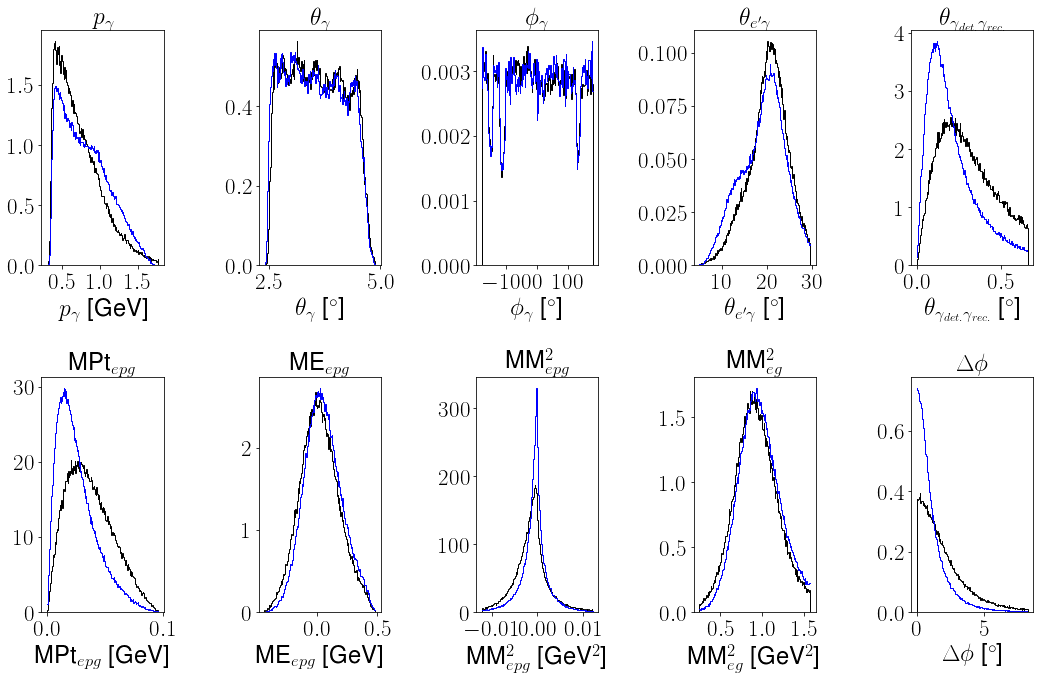

In [123]:
varstoplot = ["Pp", "Gtheta", "Gphi", "coneAngle",  "reconGam", "MPt", "ME_epg", "MM2_epg", "MM2_eg", "coplanarity"]
title = [r"$p_{\gamma}$", r"$\theta_{\gamma}$", r"$\phi_{\gamma}$", r"$\theta_{e'\gamma}$", r"$\theta_{\gamma_{det.}\gamma_{rec.}}$", "MPt"+r"${}_{epg}$", "ME"+r"${}_{epg}$", "MM"+r"${}^{2}_{epg}$", "MM"+r"${}^{2}_{eg}$", r"$\Delta \phi$"]
unit = [GeV, degree, degree, degree, degree, GeV, GeV, GeV2, GeV2, degree]
fig, axs = plt.subplots(2, 5, figsize = (15,10))
for yind in range(0, 2):
    for xind in range(0,5):
        ind = 5*yind + xind
        # start = binstarts[ind]
        # end = binends[ind]
        # bins = np.linspace(start, end, 101)
        simDist_dvcs, bins = np.histogram(dvcsSimInbCDFT.loc[:, varstoplot[ind]], 200, density = True)
        simDist = simDist_dvcs
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        axs[yind, xind].step(bincenters, simDist, where='mid',color='b', linewidth=1)
        axs[yind, xind].hist(epgExpInbCDFT.loc[:, varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', density=True, linewidth=1)
        axs[yind, xind].set_title(title[ind])
        # axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
plt.tight_layout()
plt.show()

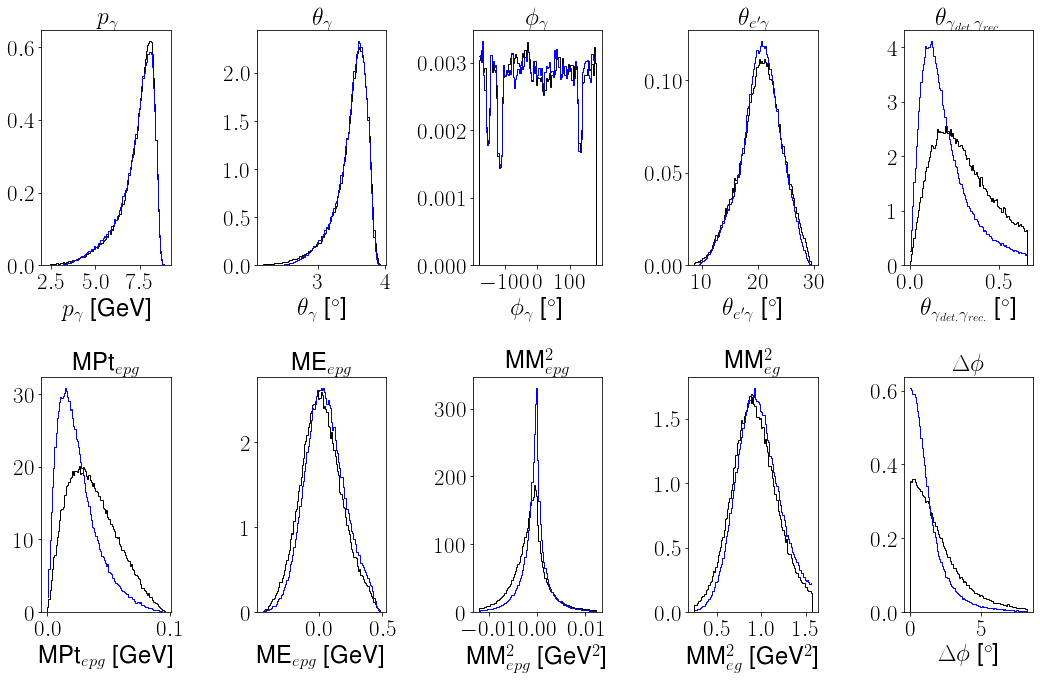

In [382]:
varstoplot = ["Gp", "W", "Gphi", "coneAngle",  "reconGam", "MPt", "ME_epg", "MM2_epg", "MM2_eg", "coplanarity"]
title = [r"$p_{\gamma}$", r"$\theta_{\gamma}$", r"$\phi_{\gamma}$", r"$\theta_{e'\gamma}$", r"$\theta_{\gamma_{det.}\gamma_{rec.}}$", "MPt"+r"${}_{epg}$", "ME"+r"${}_{epg}$", "MM"+r"${}^{2}_{epg}$", "MM"+r"${}^{2}_{eg}$", r"$\Delta \phi$"]
unit = [GeV, degree, degree, degree, degree, GeV, GeV, GeV2, GeV2, degree]
fig, axs = plt.subplots(2, 5, figsize = (15,10))
for yind in range(0, 2):
    for xind in range(0,5):
        ind = 5*yind + xind
        # start = binstarts[ind]
        # end = binends[ind]
        # bins = np.linspace(start, end, 101)
        simDist_dvcs, bins = np.histogram(dvcsSimInbCDFT.loc[(dvcsSimInbCDFT.coneAngle> 0.115 * dvcsSimInbCDFT.Gp**2 + 0.702*dvcsSimInbCDFT.Gp + 5.359) & (dvcsSimInbCDFT.coneAngle< 0.133 * dvcsSimInbCDFT.Gp**2 + 1.140*dvcsSimInbCDFT.Gp + 10.129) , varstoplot[ind]], 100, density = True)
        simDist = simDist_dvcs
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        axs[yind, xind].step(bincenters, simDist, where='mid',color='b', linewidth=1)
        axs[yind, xind].hist(epgExpInbCDFT.loc[(epgExpInbCDFT.coneAngle> -2.029*epgExpInbCDFT.Ep + 20.072) & (epgExpInbCDFT.coneAngle< -3.121*epgExpInbCDFT.Ep + 35.788)  , varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', density=True, linewidth=1)
        axs[yind, xind].set_title(title[ind])
        # axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
plt.tight_layout()
plt.show()

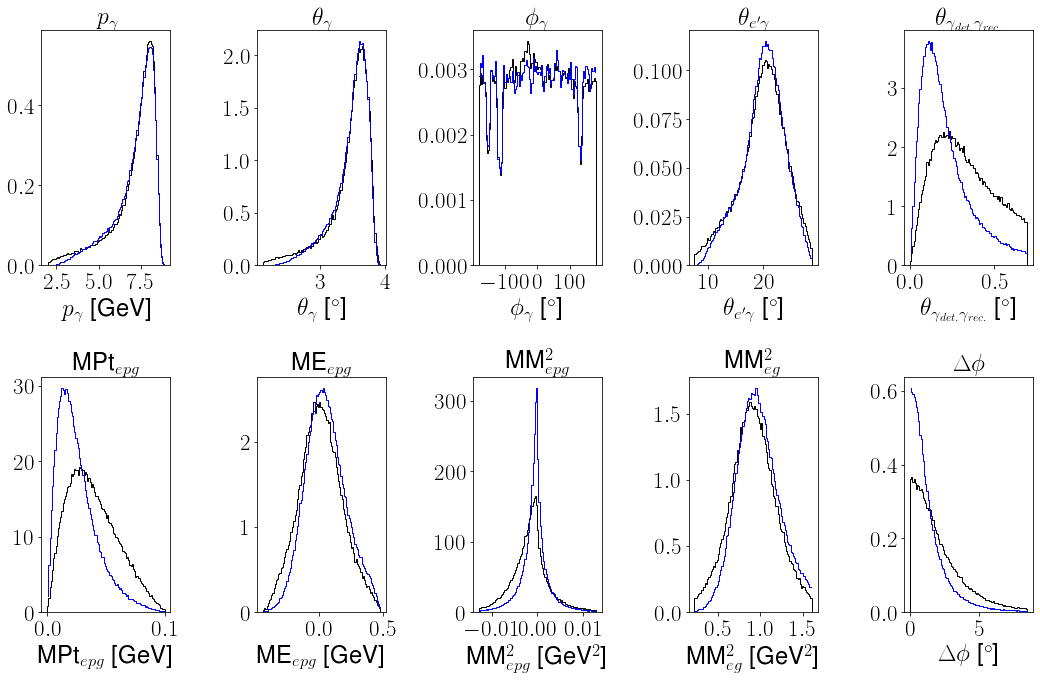

In [380]:
varstoplot = ["Gp", "W", "Gphi", "coneAngle",  "reconGam", "MPt", "ME_epg", "MM2_epg", "MM2_eg", "coplanarity"]
title = [r"$p_{\gamma}$", r"$\theta_{\gamma}$", r"$\phi_{\gamma}$", r"$\theta_{e'\gamma}$", r"$\theta_{\gamma_{det.}\gamma_{rec.}}$", "MPt"+r"${}_{epg}$", "ME"+r"${}_{epg}$", "MM"+r"${}^{2}_{epg}$", "MM"+r"${}^{2}_{eg}$", r"$\Delta \phi$"]
unit = [GeV, degree, degree, degree, degree, GeV, GeV, GeV2, GeV2, degree]
fig, axs = plt.subplots(2, 5, figsize = (15,10))
for yind in range(0, 2):
    for xind in range(0,5):
        ind = 5*yind + xind
        # start = binstarts[ind]
        # end = binends[ind]
        # bins = np.linspace(start, end, 101)
        simDist_dvcs, bins = np.histogram(dvcsSimOutbCDFT.loc[(dvcsSimOutbCDFT.coneAngle> 0.115 * dvcsSimOutbCDFT.Gp**2 + 0.702*dvcsSimOutbCDFT.Gp + 5.359) & (dvcsSimOutbCDFT.coneAngle< 0.133 * dvcsSimOutbCDFT.Gp**2 + 1.140*dvcsSimOutbCDFT.Gp + 10.129) , varstoplot[ind]], 100, density = True)
        simDist = simDist_dvcs
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        axs[yind, xind].step(bincenters, simDist, where='mid',color='b', linewidth=1)
        axs[yind, xind].hist(epgExpOutbCDFT.loc[(epgExpOutbCDFT.coneAngle> -2.029*epgExpOutbCDFT.Ep + 20.072) & (epgExpOutbCDFT.coneAngle< -3.121*epgExpOutbCDFT.Ep + 35.788)  , varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', density=True, linewidth=1)
        axs[yind, xind].set_title(title[ind])
        # axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
plt.tight_layout()
plt.show()

In [396]:
pi0SimInb = pd.read_pickle("/Volumes/Extreme SSD/4076.pkl")
# dvcsSimOutbCDFT = dvcsSimOutb.loc[dvcsSimOutb.config==3]
# dvcsSimInbCD = dvcsSimInb.loc[dvcsSimInb.config==2]

<AxesSubplot:>

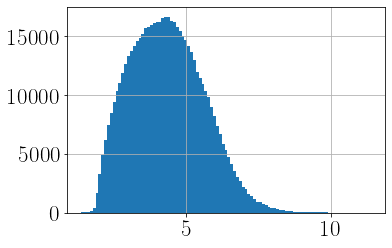

In [401]:
pi0SimInb.openingAngle.hist(bins = 101)

In [12]:
dvcsSimInb = pd.read_pickle("/Volumes/Extreme SSD/Feb2022/SimtoDat/inb/dvcs/3987.pkl")
dvcsSimInbCDFT = dvcsSimInb.loc[dvcsSimInb.config==3]
dvcsSimInbCD = dvcsSimInb.loc[dvcsSimInb.config==2]
dvcsSimInbFD = dvcsSimInb.loc[dvcsSimInb.config==1]


In [13]:
epgExpInb = pd.read_pickle("/Volumes/Extreme SSD/Feb2022/SimtoDat/inb/exp/dvcs.pkl")
epgExpInbCDFT = epgExpInb.loc[epgExpInb.config == 3]
epgExpInbCD = epgExpInb.loc[epgExpInb.config == 2]
epgExpInbFD = epgExpInb.loc[epgExpInb.config == 1]

In [478]:
dvcsSimOutb = pd.read_pickle("/Volumes/Extreme SSD/Feb2022/SimtoDat/outb/dvcs/4240.pkl")
dvcsSimOutbCDFT = dvcsSimOutb.loc[dvcsSimOutb.config==3]
dvcsSimOutbCD = dvcsSimOutb.loc[dvcsSimOutb.config==2]
dvcsSimOutbFD = dvcsSimOutb.loc[dvcsSimOutb.config==1]

In [479]:
epgExpOutb = pd.read_pickle("/Volumes/Extreme SSD/Feb2022/SimtoDat/outb/exp/dvcs.pkl")
epgExpOutbCDFT = epgExpOutb.loc[epgExpOutb.config == 3]
epgExpOutbCD = epgExpOutb.loc[epgExpOutb.config == 2]
epgExpOutbFD = epgExpOutb.loc[epgExpOutb.config == 1]

In [579]:
epgExpInb = pd.read_pickle("/Volumes/Extreme SSD/Feb2022/SimtoDat/dvcs.pkl")
epgExpInbCDFT = epgExpInb.loc[epgExpInb.config == 3]
epgExpInbCD = epgExpInb.loc[epgExpInb.config == 2]
epgExpInbFD = epgExpInb.loc[epgExpInb.config == 1]

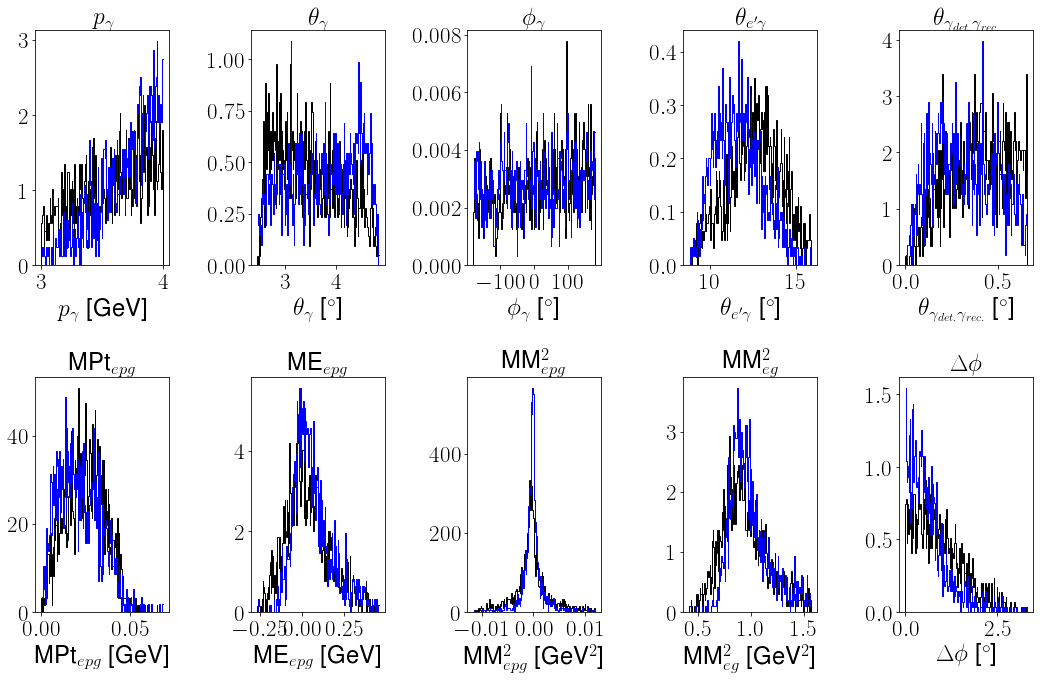

In [590]:
varstoplot = ["Gp", "Gtheta", "Gphi", "coneAngle",  "reconGam", "MPt", "ME_epg", "MM2_epg", "MM2_eg", "coplanarity"]
title = [r"$p_{\gamma}$", r"$\theta_{\gamma}$", r"$\phi_{\gamma}$", r"$\theta_{e'\gamma}$", r"$\theta_{\gamma_{det.}\gamma_{rec.}}$", "MPt"+r"${}_{epg}$", "ME"+r"${}_{epg}$", "MM"+r"${}^{2}_{epg}$", "MM"+r"${}^{2}_{eg}$", r"$\Delta \phi$"]
unit = [GeV, degree, degree, degree, degree, GeV, GeV, GeV2, GeV2, degree]
fig, axs = plt.subplots(2, 5, figsize = (15,10))
for yind in range(0, 2):
    for xind in range(0,5):
        ind = 5*yind + xind
        # start = binstarts[ind]
        # end = binends[ind]
        # bins = np.linspace(start, end, 101)
        simDist_dvcs, bins = np.histogram(dvcsSimInbCDFT.loc[(dvcsSimInbCDFT.Gp>3) & (dvcsSimInbCDFT.Gp<4) , varstoplot[ind]], 200, density = True)
        simDist = simDist_dvcs
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        axs[yind, xind].step(bincenters, simDist, where='mid',color='b', linewidth=1)
        axs[yind, xind].hist(epgExpInbCDFT.loc[(epgExpInbCDFT.Gp>3) & (epgExpInbCDFT.Gp<4), varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', density=True, linewidth=1)
        axs[yind, xind].set_title(title[ind])
        # axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
plt.tight_layout()
plt.show()

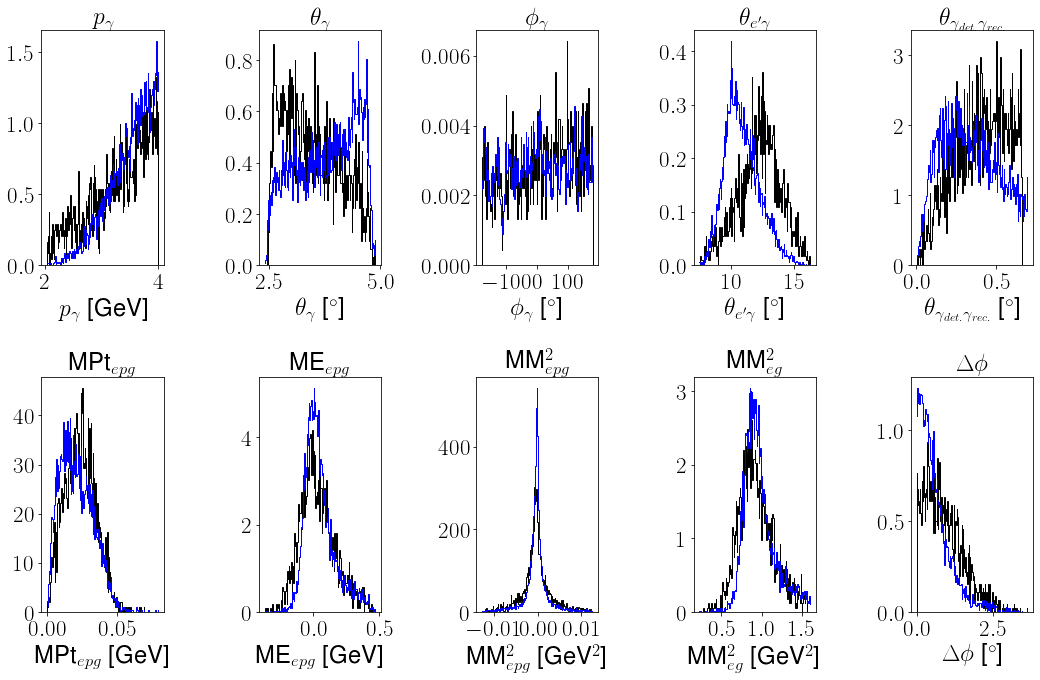

In [586]:
varstoplot = ["Gp", "Gtheta", "Gphi", "coneAngle",  "reconGam", "MPt", "ME_epg", "MM2_epg", "MM2_eg", "coplanarity"]
title = [r"$p_{\gamma}$", r"$\theta_{\gamma}$", r"$\phi_{\gamma}$", r"$\theta_{e'\gamma}$", r"$\theta_{\gamma_{det.}\gamma_{rec.}}$", "MPt"+r"${}_{epg}$", "ME"+r"${}_{epg}$", "MM"+r"${}^{2}_{epg}$", "MM"+r"${}^{2}_{eg}$", r"$\Delta \phi$"]
unit = [GeV, degree, degree, degree, degree, GeV, GeV, GeV2, GeV2, degree]
fig, axs = plt.subplots(2, 5, figsize = (15,10))
for yind in range(0, 2):
    for xind in range(0,5):
        ind = 5*yind + xind
        # start = binstarts[ind]
        # end = binends[ind]
        # bins = np.linspace(start, end, 101)
        simDist_dvcs, bins = np.histogram(dvcsSimOutbCDFT.loc[dvcsSimOutbCDFT.Gp<4, varstoplot[ind]], 200, density = True)
        simDist = simDist_dvcs
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        axs[yind, xind].step(bincenters, simDist, where='mid',color='b', linewidth=1)
        axs[yind, xind].hist(epgExpInbCDFT.loc[epgExpInbCDFT.Gp<4, varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', density=True, linewidth=1)
        axs[yind, xind].set_title(title[ind])
        # axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
plt.tight_layout()
plt.show()

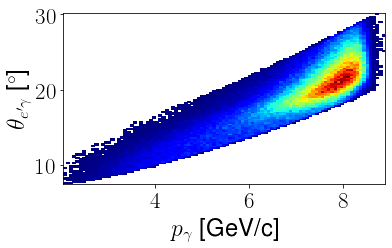

In [593]:
plt.hist2d(dvcsSimOutbCDFT.Gp, dvcsSimOutbCDFT.coneAngle, bins = 101, cmap = cmap, cmin =1)
# plt.plot(GpArray, coneAngleMinArray, color = 'k')
# plt.plot(GpArray, coneAngleMaxArray, color = 'k')
x = np.linspace(0, 10, 101)
# plt.plot(x, params_1[0]*x**2 + params_1[1]*x + params_1[2])
# plt.plot(x, params_2[0]*x**2 + params_2[1]*x + params_2[2])
plt.xlabel(r"$p_{\gamma}$" + " ["+GeVc+"]")
plt.ylabel(r"$\theta_{e'\gamma}$" + " ["+degree+"]")
plt.show()

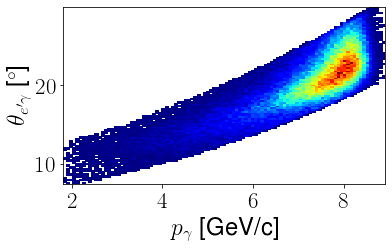

In [594]:
plt.hist2d(epgExpInbCDFT.Gp, epgExpInbCDFT.coneAngle, bins = 101, cmap = cmap, cmin =1)
# plt.plot(GpArray, coneAngleMinArray, color = 'k')
# plt.plot(GpArray, coneAngleMaxArray, color = 'k')
x = np.linspace(0, 10, 101)
# plt.plot(x, params_1[0]*x**2 + params_1[1]*x + params_1[2])
# plt.plot(x, params_2[0]*x**2 + params_2[1]*x + params_2[2])
plt.xlabel(r"$p_{\gamma}$" + " ["+GeVc+"]")
plt.ylabel(r"$\theta_{e'\gamma}$" + " ["+degree+"]")
plt.show()

<AxesSubplot:>

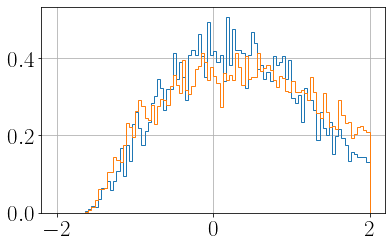

In [498]:
epgExpInbCDFT.loc[epgExpInbCDFT.Pp>1.2].Pchi2pid.hist(bins = np.linspace(-2, 2, 101), histtype = 'step', density = True)
dvcsSimInbCDFT.loc[dvcsSimInbCDFT.Pp>1.2].Pchi2pid.hist(bins = np.linspace(-2, 2, 101), histtype = 'step', density = True)

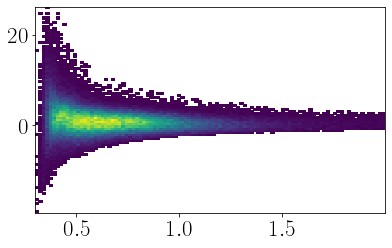

In [490]:
plt.hist2d(epgExpInbCDFT.Pp, epgExpInbCDFT.Pchi2pid, bins = 101, cmin = 1)
plt.show()

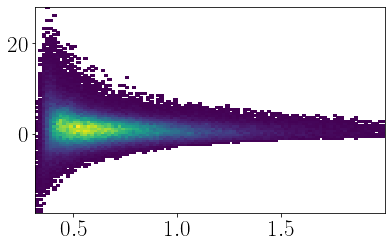

In [491]:
plt.hist2d(epgExpInbCD.Pp, epgExpInbCD.Pchi2pid, bins = 101, cmin = 1)
plt.show()

<AxesSubplot:>

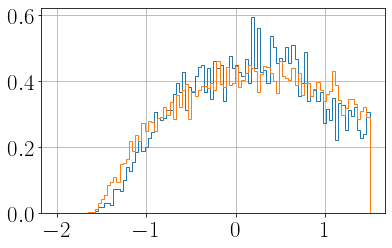

In [496]:
epgExpOutbCDFT.loc[epgExpOutbCDFT.Pp>1.2].Pchi2pid.hist(bins = np.linspace(-2, 1.5, 101), histtype = 'step', density = True)
dvcsSimOutbCDFT.loc[dvcsSimOutbCDFT.Pp>1.2].Pchi2pid.hist(bins = np.linspace(-2, 1.5, 101), histtype = 'step', density = True)

<AxesSubplot:>

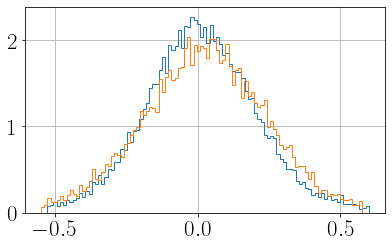

In [183]:
PpMin = 0.3
PpMax = 0.4

dvcsSimInbCDFT.loc[(dvcsSimInbCDFT.Pp<PpMax)&(dvcsSimInbCDFT.Pp>PpMin)].MM2_ep.hist(bins = 101, histtype = 'step', density = True)
saveDVCSvars(CorrectionV1(epgExpInbCDFT, 0.3)).loc[(epgExpInbCDFT.Pp<PpMax)&(epgExpInbCDFT.Pp>PpMin)].MM2_ep.hist(bins = 101, histtype = 'step', density = True)
# saveDVCSvars(CorrectionV1_2(epgExpInbCDFT, -0.02)).loc[(epgExpInbCDFT.Pp<PpMax)&(epgExpInbCDFT.Pp>PpMin)].MM2_ep.hist(bins = 101, histtype = 'step', density = True)

<AxesSubplot:>

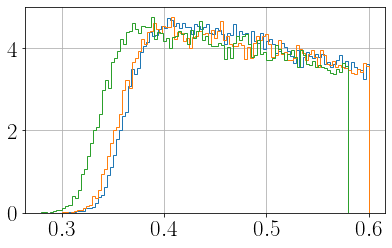

In [179]:
dvcsSimInbCDFT.loc[dvcsSimInbCDFT.Pp<0.6].Pp.hist(bins = 101, histtype = 'step', density = True)
saveDVCSvars(CorrectionV1(epgExpInbCDFT, 0.8)).loc[epgExpInbCDFT.Pp<0.6].Pp.hist(bins = 101, histtype = 'step', density = True)
saveDVCSvars(CorrectionV1_2(epgExpInbCDFT, -0.02)).loc[epgExpInbCDFT.Pp<0.6].Pp.hist(bins = 101, histtype = 'step', density = True)

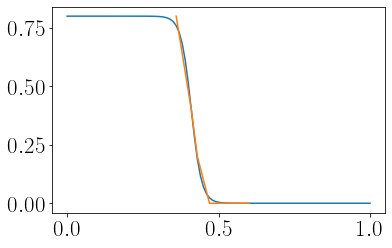

In [689]:
plt.plot(x, 0.8/(1+np.exp(58.657*(x-0.41))))
plt.plot([0.36, 0.41, 0.43, 0.45, 0.47, 0.6], [0.8, 0.4, 0.2, 0.1, 0, 0])
x = np.linspace(0, 1, 101)


In [688]:
def sigmoidfit3(args, x):
#     df = args
    b = args[0]
#     print(df)
    return 0.8/(1+np.exp(b*(x-0.41)))

In [679]:
def lstsq_sigmoidfit3(args, x, y):
#     print(args, x, y)
    return sigmoidfit3(args, x) - y

In [685]:
res_lsq = least_squares(lstsq_sigmoidfit3, [60], args=(np.array([0.36, 0.41, 0.43, 0.45, 0.47, 0.6]), [0.8, 0.4, 0.2, 0.1, 0, 0]))

In [686]:
res_lsq.x

array([58.65770875])

In [684]:
[[0.05, 0.8, 2.8], [0.05, 0.8, 2.4000000000000004], [0.05, 0.8, 2.0], [0.05, 0.8, 1.8], [0.05, 0.8, 1.4], [0.05, 0.8, 1.4], [0.05, 0.8, 1.2], [0.05, 0.8, 1.0], [0.05, 0.8, 1.0], [0.05, 0.8, 1.0], [0.05, 0.8, 1.0], [0.05, 0.8, 1.0], [0.05, 0.8, 1.0]] [0.8000000000000003, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


<>:1: SyntaxWarning: list indices must be integers or slices, not tuple; perhaps you missed a comma?
<>:1: SyntaxWarning: list indices must be integers or slices, not tuple; perhaps you missed a comma?
<ipython-input-684-0f54c082043f>:1: SyntaxWarning: list indices must be integers or slices, not tuple; perhaps you missed a comma?
  [[0.05, 0.8, 2.8], [0.05, 0.8, 2.4000000000000004], [0.05, 0.8, 2.0], [0.05, 0.8, 1.8], [0.05, 0.8, 1.4], [0.05, 0.8, 1.4], [0.05, 0.8, 1.2], [0.05, 0.8, 1.0], [0.05, 0.8, 1.0], [0.05, 0.8, 1.0], [0.05, 0.8, 1.0], [0.05, 0.8, 1.0], [0.05, 0.8, 1.0]] [0.8000000000000003, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


TypeError: list indices must be integers or slices, not tuple

In [33]:
def CorrectionV1(df, correction):
    df_epg = copy(df)
    # df_epg.loc[df_epg["Psector"]>7, "Pp"] = df_epg.loc[df_epg["Psector"]>7, "Pp"] + correction
    df_epg.loc[df_epg["Psector"]>7, "Ptheta"] = df_epg.loc[df_epg["Psector"]>7, "Ptheta"] + correction
    # df_epg.loc[df_epg["Psector"]>7, "Pphi"] = df_epg.loc[df_epg["Psector"]>7, "Pphi"] + correction
    df_epg.loc[:, 'Pe'] = np.sqrt( df_epg.Pp**2 + M**2)
    df_epg.loc[:, "Ppx"] = df_epg.loc[:, "Pp"]*np.sin(np.radians(df_epg.loc[:, "Ptheta"]))*np.cos(np.radians(df_epg.loc[:, "Pphi"]))
    df_epg.loc[:, "Ppy"] = df_epg.loc[:, "Pp"]*np.sin(np.radians(df_epg.loc[:, "Ptheta"]))*np.sin(np.radians(df_epg.loc[:, "Pphi"]))
    df_epg.loc[:, "Ppz"] = df_epg.loc[:, "Pp"]*np.cos(np.radians(df_epg.loc[:, "Ptheta"]))

    return df_epg
def CorrectionV1_2(df, correction):
    df_epg = copy(df)
    df_epg.loc[df_epg["Psector"]>7, "Pp"] = df_epg.loc[df_epg["Psector"]>7, "Pp"] + correction
#     df_epg.loc[df_epg["Psector"]>7, "Ptheta"] = df_epg.loc[df_epg["Psector"]>7, "Ptheta"] + correction
    # df_epg.loc[df_epg["Psector"]>7, "Pphi"] = df_epg.loc[df_epg["Psector"]>7, "Pphi"] + correction
    df_epg.loc[:, 'Pe'] = np.sqrt( df_epg.Pp**2 + M**2)
    df_epg.loc[:, "Ppx"] = df_epg.loc[:, "Pp"]*np.sin(np.radians(df_epg.loc[:, "Ptheta"]))*np.cos(np.radians(df_epg.loc[:, "Pphi"]))
    df_epg.loc[:, "Ppy"] = df_epg.loc[:, "Pp"]*np.sin(np.radians(df_epg.loc[:, "Ptheta"]))*np.sin(np.radians(df_epg.loc[:, "Pphi"]))
    df_epg.loc[:, "Ppz"] = df_epg.loc[:, "Pp"]*np.cos(np.radians(df_epg.loc[:, "Ptheta"]))

    return df_epg

def saveDVCSvars(df):
    #set up dvcs variables
    df_epg = copy(df)

    ele = [df_epg['Epx'], df_epg['Epy'], df_epg['Epz']]
    df_epg.loc[:, 'Ep'] = mag(ele)
    df_epg.loc[:, 'Ee'] = getEnergy(ele, me)
    df_epg.loc[:, 'Etheta'] = getTheta(ele)
    df_epg.loc[:, 'Ephi'] = getPhi(ele)

    pro = [df_epg['Ppx'], df_epg['Ppy'], df_epg['Ppz']]

    gam = [df_epg['Gpx'], df_epg['Gpy'], df_epg['Gpz']]
    df_epg.loc[:, 'Gp'] = mag(gam)
    df_epg.loc[:, 'Ge'] = getEnergy(gam, 0)
    df_epg.loc[:, 'Gtheta'] = getTheta(gam)
    df_epg.loc[:, 'Gphi'] = getPhi(gam)

    Ppt = mag([df_epg['Ppx'], df_epg['Ppy'], 0])

    VGS = [-df_epg['Epx'], -df_epg['Epy'], pbeam - df_epg['Epz']]
    v3l = cross(beam, ele)
    v3h = cross(pro, VGS)
    v3g = cross(VGS, gam)
    VmissG = [-df_epg["Epx"] - df_epg["Ppx"], -df_epg["Epy"] - df_epg["Ppy"],
              pbeam - df_epg["Epz"] - df_epg["Ppz"]]
    VmissP = [-(df_epg["Epx"] + df_epg["Gpx"]), -(df_epg["Epy"] + df_epg["Gpy"]),
              -(-pbeam + df_epg["Epz"] + df_epg["Gpz"])]
    Vmiss = [-(df_epg["Epx"] + df_epg["Ppx"] + df_epg["Gpx"]), -(df_epg["Epy"] + df_epg["Ppy"] + df_epg["Gpy"]),
             -(-pbeam + df_epg["Epz"] + df_epg["Ppz"] + df_epg["Gpz"])]
    costheta = cosTheta(VGS, gam)

    df_epg.loc[:, 'Mpx'], df_epg.loc[:, 'Mpy'], df_epg.loc[:, 'Mpz'] = Vmiss

    # binning kinematics
    df_epg.loc[:,'Q2'] = -((ebeam - df_epg['Ee'])**2 - mag2(VGS))
    df_epg.loc[:,'nu'] = (ebeam - df_epg['Ee'])
    df_epg.loc[:,'y'] = df_epg['nu']/ebeam
    df_epg.loc[:,'xB'] = df_epg['Q2'] / 2.0 / M / df_epg['nu']
    df_epg.loc[:,'t1'] = 2 * M * (df_epg['Pe'] - M)
    df_epg.loc[:,'t2'] = (M * df_epg['Q2'] + 2 * M * df_epg['nu'] * (df_epg['nu'] - np.sqrt(df_epg['nu'] * df_epg['nu'] + df_epg['Q2']) * costheta))\
    / (M + df_epg['nu'] - np.sqrt(df_epg['nu'] * df_epg['nu'] + df_epg['Q2']) * costheta)
    df_epg.loc[:,'W'] = np.sqrt(np.maximum(0, (ebeam + M - df_epg['Ee'])**2 - mag2(VGS)))

    # trento angles
    df_epg.loc[:,'phi1'] = angle(v3l, v3h)
    df_epg.loc[:,'phi1'] = np.where(dot(v3l, pro) > 0, 360.0 -
                              df_epg['phi1'], df_epg['phi1'])
    df_epg.loc[:,'phi2'] = angle(v3l, v3g)
    df_epg.loc[:,'phi2'] = np.where(dot(v3l, gam) <
                              0, 360.0 - df_epg['phi2'], df_epg['phi2'])

    # exclusivity variables
    df_epg.loc[:,'MM2_epg'] = (-M - ebeam + df_epg["Ee"] +
                         df_epg["Pe"] + df_epg["Ge"])**2 - mag2(Vmiss)
    df_epg.loc[:,'ME_epg'] = (M + ebeam - df_epg["Ee"] - df_epg["Pe"] - df_epg["Ge"])
    df_epg.loc[:,'MM2_ep'] = (-M - ebeam + df_epg["Ee"] + df_epg["Pe"])**2 - mag2(VmissG)
    df_epg.loc[:,'MM2_eg'] = (-M - ebeam + df_epg["Ee"] + df_epg["Ge"])**2 - mag2(VmissP)
    df_epg.loc[:,'MPt'] = np.sqrt((df_epg["Epx"] + df_epg["Ppx"] + df_epg["Gpx"])**2 +
                            (df_epg["Epy"] + df_epg["Ppy"] + df_epg["Gpy"])**2)
    df_epg.loc[:,'coneAngle'] = angle(ele, gam)
    df_epg.loc[:,'reconGam'] = angle(gam, VmissG)
    df_epg.loc[:,'coplanarity'] = angle(v3h, v3g)

    eps = 2*M*df_epg.xB / np.sqrt(df_epg.Q2)
    df_epg.loc[:,'ycol1'] = (df_epg.Q2-df_epg.t2)/(df_epg.Q2-df_epg.xB*df_epg.t2)
    df_epg.loc[:,'ycol2'] = 1 - (1-df_epg.xB)*df_epg.t2/df_epg.Q2
    df_epg.loc[:,'ymax1'] = 2*(np.sqrt(1+eps**2)-1)/(eps**2)
    df_epg.loc[:,'ymax2'] = 1 - (M**2)*(df_epg.xB**2)/df_epg.Q2
    df_epg.loc[:,'tmin1'] = df_epg.Q2*(2*(1-df_epg.xB)*(1-np.sqrt(1+eps**2))+eps**2)/(4*df_epg.xB*(1-df_epg.xB) + eps**2)
    df_epg.loc[:,'tmin2'] = M*M*(df_epg.xB**2)/(1-df_epg.xB+df_epg.xB*M*M/df_epg.Q2)
    df_epg.loc[:,'tcol'] = df_epg.Q2*(df_epg.Q2-2*df_epg.xB*M*ebeam)/df_epg.xB/(df_epg.Q2-2*M*ebeam)

    return df_epg


In [34]:
def SmearingV1(df, sigma1, sigma2, sigma3):
    df_epg = copy(df)
    regulator =  np.abs(2*(1/(1+np.exp(-(df_epg.loc[df_epg["Psector"]>7, "Pp"]-0.3)/0.01))-0.5))
    df_epg.loc[df_epg["Psector"]>7, "Pp"] = df_epg.loc[df_epg["Psector"]>7, "Pp"]*np.random.normal(1, sigma1, len(df_epg.loc[df_epg.Psector>7]))
    df_epg.loc[df_epg["Psector"]>7, "Ptheta"] = df_epg.loc[df_epg["Psector"]>7, "Ptheta"] + np.random.normal(0, sigma2, len(df_epg.loc[df_epg.Psector>7]))
    df_epg.loc[df_epg["Psector"]>7, "Pphi"] = df_epg.loc[df_epg["Psector"]>7, "Pphi"] + np.random.normal(0, sigma3, len(df_epg.loc[df_epg.Psector>7])) 
    df_epg.loc[:, 'Pe'] = np.sqrt( df_epg.Pp**2 + M**2)
    df_epg.loc[:, "Ppx"] = df_epg.loc[:, "Pp"]*np.sin(np.radians(df_epg.loc[:, "Ptheta"]))*np.cos(np.radians(df_epg.loc[:, "Pphi"]))
    df_epg.loc[:, "Ppy"] = df_epg.loc[:, "Pp"]*np.sin(np.radians(df_epg.loc[:, "Ptheta"]))*np.sin(np.radians(df_epg.loc[:, "Pphi"]))
    df_epg.loc[:, "Ppz"] = df_epg.loc[:, "Pp"]*np.cos(np.radians(df_epg.loc[:, "Ptheta"]))

    return df_epg

<AxesSubplot:>

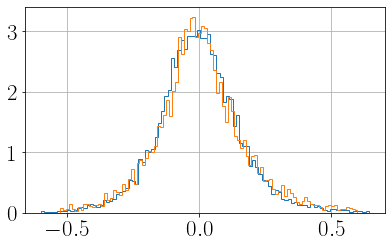

In [178]:
saveDVCSvars(SmearingV1(dvcsSimInbCDFT.loc[dvcsSimInbCDFT.Pp>1.2], 0.01, 0, 2.0)).MM2_ep.hist(bins = 101, histtype = 'step', density = True)
epgExpInbCDFT.loc[epgExpInbCDFT.Pp>1.2].MM2_ep.hist(bins = 101, histtype = 'step', density = True)


<AxesSubplot:>

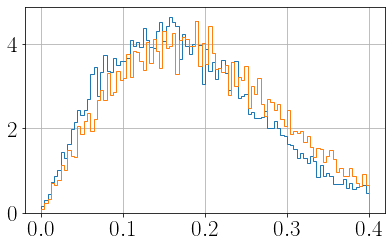

In [207]:
bins = np.linspace(0, 0.4, 101)
sim = makeDVCS(saveDVCSvars(SmearingV1(dvcsSimInbCDFT, 0.01*2*(1/(1+np.exp(-(dvcsSimInbCDFT.Pp-0.3)/0.01))-0.5)*(-2.768*dvcsSimInbCDFT.Pp**3 + 12.549*dvcsSimInbCDFT.Pp**2 - 15.192*dvcsSimInbCDFT.Pp + 9.934), 2, 0.8 + 2.2/(1+np.exp(5.518*(dvcsSimInbCDFT.Pp-0.625))))))
sim.loc[sim.Pp<0.4].reconGam.hist(bins = bins, histtype = 'step', density = True)
# epgExpInbCDFT.loc[(epgExpInbCDFT.Pp>0.3)&(epgExpInbCDFT.Pp<0.4)].reconGam.hist(bins = 101, histtype = 'step', density = True)
saveDVCSvars(CorrectionV1(epgExpInbCDFT, 0.3)).loc[(epgExpInbCDFT.Pp<PpMax)&(epgExpInbCDFT.Pp>PpMin)].reconGam.hist(bins = bins, histtype = 'step', density = True)


<AxesSubplot:>

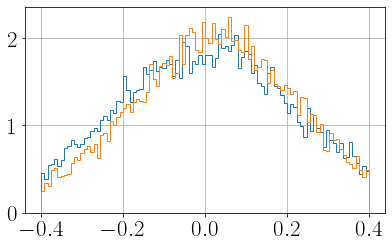

In [208]:
bins = np.linspace(-0.4, 0.4, 101)
sim = makeDVCS(saveDVCSvars(SmearingV1(dvcsSimInbCDFT, 0.01*2*(1/(1+np.exp(-(dvcsSimInbCDFT.Pp-0.3)/0.01))-0.5)*(-2.768*dvcsSimInbCDFT.Pp**3 + 12.549*dvcsSimInbCDFT.Pp**2 - 15.192*dvcsSimInbCDFT.Pp + 9.934), 2, 0.8 + 2.2/(1+np.exp(5.518*(dvcsSimInbCDFT.Pp-0.625))))))
sim.loc[sim.Pp<0.4].MM2_ep.hist(bins = bins, histtype = 'step', density = True)
# epgExpInbCDFT.loc[(epgExpInbCDFT.Pp>0.3)&(epgExpInbCDFT.Pp<0.4)].reconGam.hist(bins = 101, histtype = 'step', density = True)
saveDVCSvars(CorrectionV1(epgExpInbCDFT, 0.3)).loc[(epgExpInbCDFT.Pp<PpMax)&(epgExpInbCDFT.Pp>PpMin)].MM2_ep.hist(bins = bins, histtype = 'step', density = True)


<AxesSubplot:>

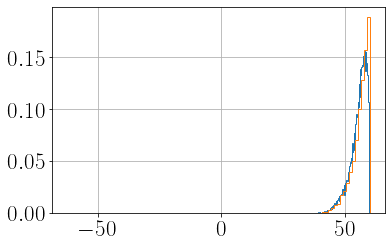

In [199]:
makeDVCS(saveDVCSvars(SmearingV1(dvcsSimInbCDFT.loc[(dvcsSimInbCDFT.Pp>0.3)&(dvcsSimInbCDFT.Pp<0.4)], 0.01*2*(1/(1+np.exp(-(dvcsSimInbCDFT.loc[dvcsSimInbCDFT.Pp<0.4].Pp-0.3)/0.01))-0.5)*(-2.768*dvcsSimInbCDFT.loc[dvcsSimInbCDFT.Pp<0.4].Pp**3 + 12.549*dvcsSimInbCDFT.loc[dvcsSimInbCDFT.Pp<0.4].Pp**2 - 15.192*dvcsSimInbCDFT.loc[dvcsSimInbCDFT.Pp<0.4].Pp + 9.934), 1.5, 0.8 + 2.2/(1+np.exp(5.518*(dvcsSimInbCDFT.loc[dvcsSimInbCDFT.Pp<0.4].Pp-0.625)))))).Ptheta.hist(bins = 101, histtype = 'step', density = True)
# epgExpInbCDFT.loc[(epgExpInbCDFT.Pp>0.3)&(epgExpInbCDFT.Pp<0.4)].reconGam.hist(bins = 101, histtype = 'step', density = True)
saveDVCSvars(CorrectionV1(epgExpInbCDFT, 0.3)).loc[(epgExpInbCDFT.Pp<PpMax)&(epgExpInbCDFT.Pp>PpMin)].Ptheta.hist(bins = 101, histtype = 'step', density = True)


<AxesSubplot:>

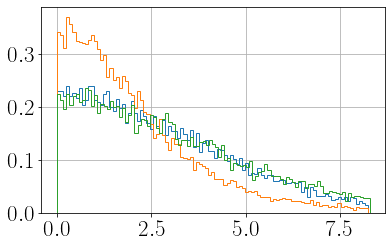

In [198]:
makeDVCS(saveDVCSvars(SmearingV1(dvcsSimInbCDFT.loc[(dvcsSimInbCDFT.Pp>0.3)&(dvcsSimInbCDFT.Pp<0.4)], 0.01*2*(1/(1+np.exp(-(dvcsSimInbCDFT.loc[dvcsSimInbCDFT.Pp<0.4].Pp-0.3)/0.01))-0.5)*(-2.768*dvcsSimInbCDFT.loc[dvcsSimInbCDFT.Pp<0.4].Pp**3 + 12.549*dvcsSimInbCDFT.loc[dvcsSimInbCDFT.Pp<0.4].Pp**2 - 15.192*dvcsSimInbCDFT.loc[dvcsSimInbCDFT.Pp<0.4].Pp + 9.934), 1.5, 0.8 + 2.2/(1+np.exp(5.518*(dvcsSimInbCDFT.loc[dvcsSimInbCDFT.Pp<0.4].Pp-0.625))))))..hist(bins = 101, histtype = 'step', density = True)
dvcsSimInbCDFT.loc[(dvcsSimInbCDFT.Pp>0.3)&(dvcsSimInbCDFT.Pp<0.4)].coplanarity.hist(bins = 101, histtype = 'step', density = True)
saveDVCSvars(CorrectionV1(epgExpInbCDFT, 0.3)).loc[(epgExpInbCDFT.Pp<PpMax)&(epgExpInbCDFT.Pp>PpMin)].coplanarity.hist(bins = 101, histtype = 'step', density = True)


<AxesSubplot:>

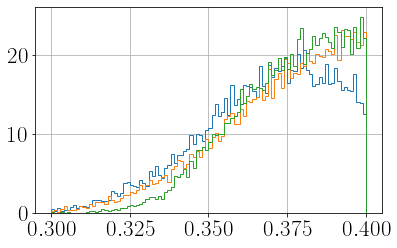

In [195]:
makeDVCS(saveDVCSvars(SmearingV1(dvcsSimInbCDFT.loc[(dvcsSimInbCDFT.Pp>0.3)&(dvcsSimInbCDFT.Pp<0.4)], 0.01*2*(1/(1+np.exp(-(dvcsSimInbCDFT.loc[dvcsSimInbCDFT.Pp<0.4].Pp-0.3)/0.01))-0.5)*(-2.768*dvcsSimInbCDFT.loc[dvcsSimInbCDFT.Pp<0.4].Pp**3 + 12.549*dvcsSimInbCDFT.loc[dvcsSimInbCDFT.Pp<0.4].Pp**2 - 15.192*dvcsSimInbCDFT.loc[dvcsSimInbCDFT.Pp<0.4].Pp + 9.934), 1.5, 0.8 + 2.2/(1+np.exp(5.518*(dvcsSimInbCDFT.loc[dvcsSimInbCDFT.Pp<0.4].Pp-0.625)))))).Pp.hist(bins = np.linspace(0.3, 0.4, 101), histtype = 'step', density = True)
# epgExpInbCDFT.loc[(epgExpInbCDFT.Pp>0.3)&(epgExpInbCDFT.Pp<0.4)].reconGam.hist(bins = 101, histtype = 'step', density = True)
makeDVCS(saveDVCSvars(SmearingV1(dvcsSimInbCDFT, 0.01*2*(1/(1+np.exp(-(dvcsSimInbCDFT.Pp-0.3)/0.01))-0.5)*(-2.768*dvcsSimInbCDFT.Pp**3 + 12.549*dvcsSimInbCDFT.Pp**2 - 15.192*dvcsSimInbCDFT.Pp + 9.934), 1.5, 0.8 + 2.2/(1+np.exp(5.518*(dvcsSimInbCDFT.Pp-0.625)))))).Pp.hist(bins = np.linspace(0.3, 0.4, 101), histtype = 'step', density = True)
saveDVCSvars(CorrectionV1(epgExpInbCDFT, 0.3)).loc[(epgExpInbCDFT.Pp<PpMax)&(epgExpInbCDFT.Pp>PpMin)].Pp.hist(bins = np.linspace(0.3, 0.4, 101), histtype = 'step', density = True)


<AxesSubplot:>

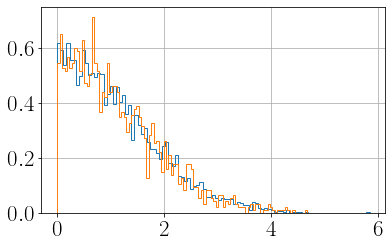

In [70]:
makeDVCS(saveDVCSvars(SmearingV1(dvcsSimInbCDFT.loc[(dvcsSimInbCDFT.Pp>1.2)&(dvcsSimInbCDFT.Pp<1.3)], 0.01, 0, 1.0))).coplanarity.hist(bins = 101, histtype = 'step', density = True)
epgExpInbCDFT.loc[(epgExpInbCDFT.Pp>1.2)&(epgExpInbCDFT.Pp<1.3)].coplanarity.hist(bins = 101, histtype = 'step', density = True)


In [483]:
PpEdges = [0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6]
PpCenters = (np.array(PpEdges[1:]) + np.array(PpEdges[:-1]))/2
# Smearing = [2.8, 2.4, 2, 1.8, 1.5, 1.3, 1.1, 1.0, 1.2, 0.8, 1.0, 0.7, 0.8]

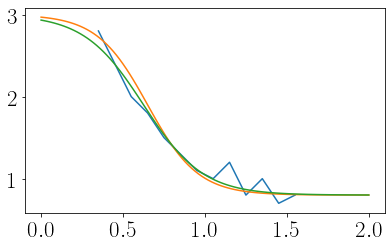

In [100]:
plt.plot(PpCenters, Smearing)
x = np.linspace(0, 2, 101)
plt.plot(x, 0.8 + 2.2/(1+np.exp(6.5*(x-0.65))))
plt.plot(x, 0.8 + 2.2/(1+np.exp(res_lsq.x[0]*(x-res_lsq.x[1]))))

In [126]:
def sigmoidfit4(args, x):
#     df = args
    a, b = args
#     print(df)
    return 0.8 + 2.2/(1+np.exp(a*(x-b)))

In [127]:
def lstsq_sigmoidfit4(args, x, y):
#     print(args, x, y)
    return sigmoidfit4(args, x) - y

In [99]:
res_lsq = least_squares(lstsq_sigmoidfit4, [6.5, 0.65], args=(PpCenters, Smearing))

In [101]:
print(res_lsq.x)

[5.51801315 0.62506836]


In [102]:
nominal1 = [0.38, 0.62, 0.88, 1.12, 1.37, 1.63, 1.88, 2.13]
nominal2 = [6, 4.3, 4.4, 5.1, 5.65, 6.2, 7.4, 7.8]

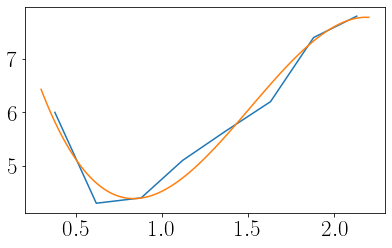

In [155]:
plt.plot(nominal1, nominal2)
x = np.linspace(0.3, 2.2, 101)
plt.plot(x, cubic(res_lsq.x, x))
# plt.plot(x, res_lsq.x[0]*x+res_lsq.x[1]/x)

In [471]:
def cubic(args, x):
#     df = args
    a, b, c, d = args
#     print(df)
    x=np.array(x)
    return a*x**3 +b*x**2 + c*x + d

In [381]:
def cubicfit(args, x, y):
#     print(args, x, y)
    return cubic(args, x) - y

In [152]:
res_lsq = least_squares(cubicfit, [0,0, 4, 1], args=(nominal1, nominal2))

In [156]:
res_lsq.x

array([ -2.76783294,  12.5493181 , -15.19208555,   9.93374874])

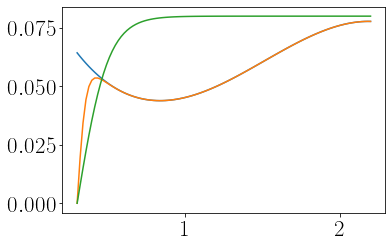

In [174]:
plt.plot(x, 0.01*(-2.768*x**3 + 12.549*x**2 - 15.192*x + 9.934))
plt.plot(x, 0.02*(1/(1+np.exp(-(x-0.3)/0.03))-0.5)*(-2.768*x**3 + 12.549*x**2 - 15.192*x + 9.934))
plt.plot(x, 0.16*(1/(1+np.exp(-(x-0.3)/0.1))-0.5))


Check v2.0

In [426]:
epgExpInb = pd.read_pickle("/Volumes/Extreme SSD/Feb2022/SimtoDat/v2/dvcs.pkl")
epgExpInbCDFT = epgExpInb.loc[epgExpInb.config == 3]
epgExpInbCD = epgExpInb.loc[epgExpInb.config == 2]
epgExpInbFD = epgExpInb.loc[epgExpInb.config == 1]

In [427]:
pi0ExpInb = pd.read_pickle("/Volumes/Extreme SSD/Feb2022/SimtoDat/v2/pi0.pkl")
pi0ExpInbCDFT = pi0ExpInb.loc[pi0ExpInb.config == 3]
pi0ExpInbCD = pi0ExpInb.loc[pi0ExpInb.config == 2]
pi0ExpInbFD = pi0ExpInb.loc[pi0ExpInb.config == 1]

In [428]:
dvcsSimInb = pd.read_pickle("/Volumes/Extreme SSD/Feb2022/SimtoDat/v2/3987.pkl")
dvcsSimInbCDFT = dvcsSimInb.loc[dvcsSimInb.config==3]
dvcsSimInbCD = dvcsSimInb.loc[dvcsSimInb.config==2]
dvcsSimInbFD = dvcsSimInb.loc[dvcsSimInb.config==1]


In [429]:
bkgSimInb = pd.read_pickle("/Volumes/Extreme SSD/Feb2022/SimtoDat/v2/4076.pkl")
bkgSimInbCDFT = bkgSimInb.loc[bkgSimInb.config==3]
bkgSimInbCD = bkgSimInb.loc[bkgSimInb.config==2]
bkgSimInbFD = bkgSimInb.loc[bkgSimInb.config==1]


<AxesSubplot:>

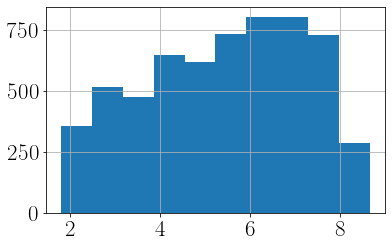

In [316]:
bkgSimInbCDFT.Gp.hist()

In [337]:
def CorrectionV0(df, correction):
    df_epg = copy(df)
    df_epg.loc[df_epg.Gsector>7, 'Gp'] = df_epg.Gp + correction
    df_epg.loc[df_epg.Gsector>7, 'Ge'] = df_epg.loc[df_epg.Gsector>7, 'Gp']
    df_epg.loc[:, "Gpx"] = df_epg.loc[:, "Gp"]*np.sin(np.radians(df_epg.loc[:, "Gtheta"]))*np.cos(np.radians(df_epg.loc[:, "Gphi"]))
    df_epg.loc[:, "Gpy"] = df_epg.loc[:, "Gp"]*np.sin(np.radians(df_epg.loc[:, "Gtheta"]))*np.sin(np.radians(df_epg.loc[:, "Gphi"]))
    df_epg.loc[:, "Gpz"] = df_epg.loc[:, "Gp"]*np.cos(np.radians(df_epg.loc[:, "Gtheta"]))
    return df_epg


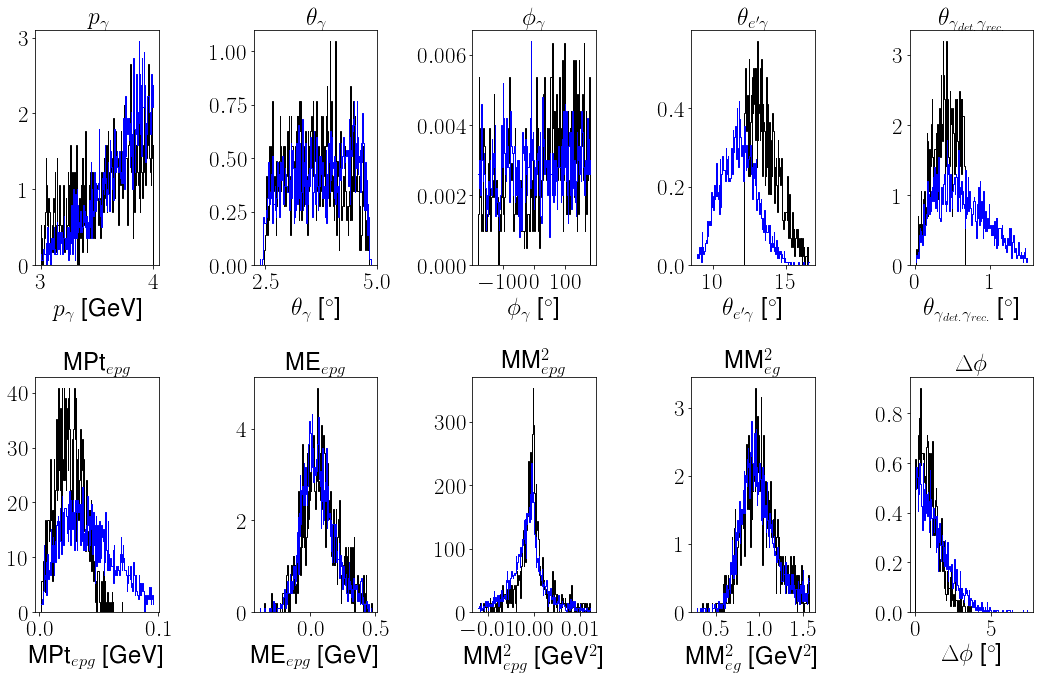

In [430]:
GpMin = 3
GpMax = 4
correction = -0.05
epgExpInbCDFT = CorrectionV0(epgExpInbCDFT, correction)
epgExpInbCDFT = saveDVCSvars(epgExpInbCDFT)
epgExpInbCDFT = makeDVCS(epgExpInbCDFT)
varstoplot = ["Gp", "Gtheta", "Gphi", "coneAngle",  "reconGam", "MPt", "ME_epg", "MM2_epg", "MM2_eg", "coplanarity"]
title = [r"$p_{\gamma}$", r"$\theta_{\gamma}$", r"$\phi_{\gamma}$", r"$\theta_{e'\gamma}$", r"$\theta_{\gamma_{det.}\gamma_{rec.}}$", "MPt"+r"${}_{epg}$", "ME"+r"${}_{epg}$", "MM"+r"${}^{2}_{epg}$", "MM"+r"${}^{2}_{eg}$", r"$\Delta \phi$"]
unit = [GeV, degree, degree, degree, degree, GeV, GeV, GeV2, GeV2, degree]
fig, axs = plt.subplots(2, 5, figsize = (15,10))
for yind in range(0, 2):
    for xind in range(0,5):
        ind = 5*yind + xind
        # start = binstarts[ind]
        # end = binends[ind]
        # bins = np.linspace(start, end, 101)
        simDist_dvcs, bins = np.histogram(dvcsSimInbCDFT.loc[(dvcsSimInbCDFT.Gp>GpMin) & (dvcsSimInbCDFT.Gp<GpMax) , varstoplot[ind]], 200, density = True)
        simDist_dvpi0, bins = np.histogram(bkgSimInbCDFT.loc[(bkgSimInbCDFT.Gp>GpMin) & (bkgSimInbCDFT.Gp<GpMax) , varstoplot[ind]], bins, density = True)
        simDist = (1-c)*simDist_dvcs + c* simDist_dvpi0
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        axs[yind, xind].step(bincenters, simDist, where='mid',color='b', linewidth=1)
        axs[yind, xind].hist(epgExpInbCDFT.loc[(epgExpInbCDFT.Gp>GpMin) & (epgExpInbCDFT.Gp<GpMax), varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', density=True, linewidth=1)
        axs[yind, xind].set_title(title[ind])
        # axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
epgExpInbCDFT = CorrectionV0(epgExpInbCDFT, -correction)
epgExpInbCDFT = saveDVCSvars(epgExpInbCDFT)

plt.tight_layout()
plt.show()

t1
Ptheta
Pphi
reconGam
coplanarity
ME_epg
MM2_epg
MM2_ep
MPt


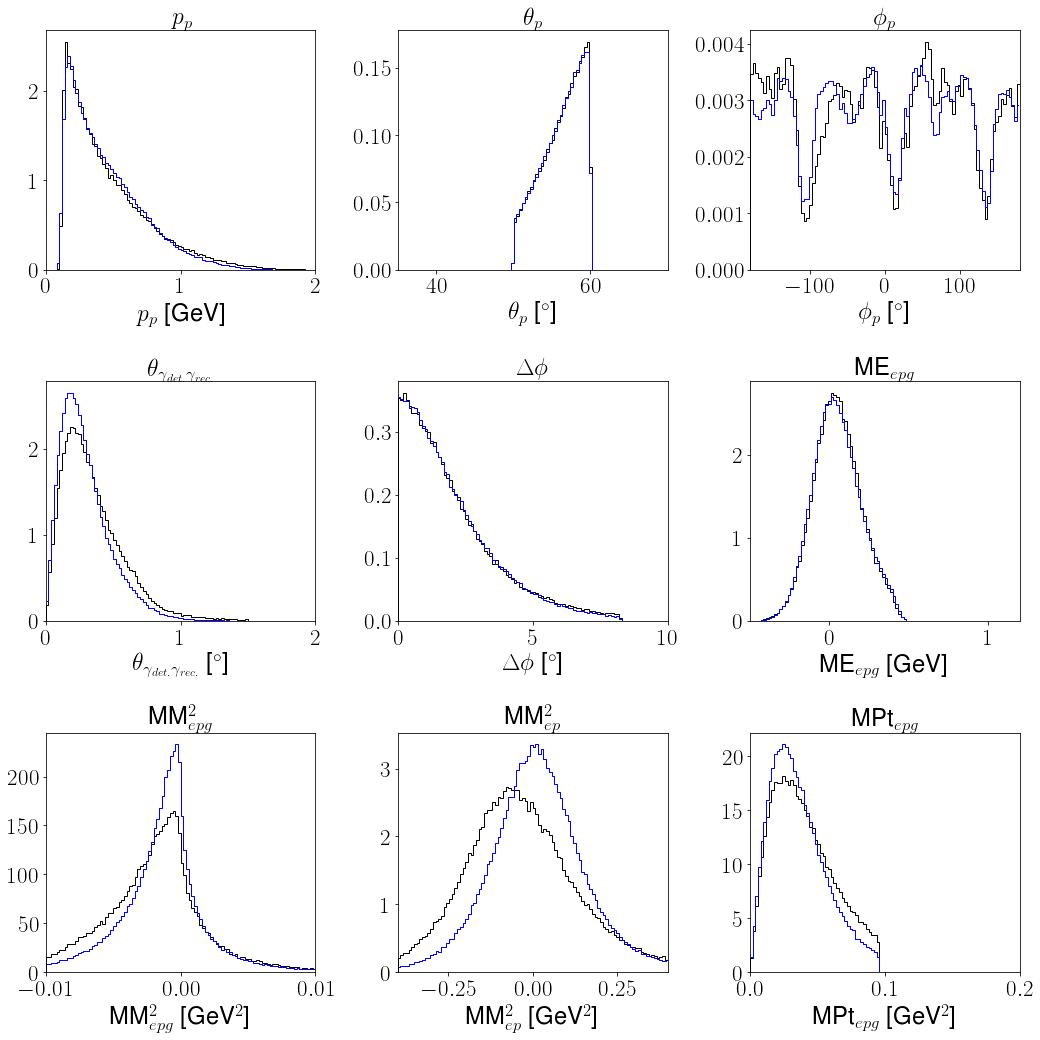

<Figure size 432x288 with 0 Axes>

In [107]:
#proton related
# df = makeDVCS(smearingDVCS2(dvcsSimInbCDFT, 0.04, 0, 0))
# PpMin = 0.4
# PpMax = 0.5
# df = dvcsSimInbCDFT.loc[(dvcsSimInbCDFT.Pp<PpMax)&(dvcsSimInbCDFT.Pp>PpMin)]#smearingDVCS2(dvcsSimInbCDFT, np.abs(0.18*(1/(1+np.exp(-(dvcsSimInbCDFT.Pp-0.3)/0.1))-0.5)), 0.8, 2.2)
# exp = epgExpInbCDFT.loc[(epgExpInbCDFT.Pp<PpMax)&(epgExpInbCDFT.Pp>PpMin)]

PthetaMin = 50
PthetaMax = 60
df = smearingDVCS2(dvcsSimInbCDFT, 0, 0.03, 0)
df = df.loc[(df.Ptheta<PthetaMax)&(df.Ptheta>PthetaMin)]#smearingDVCS2(dvcsSimInbCDFT, np.abs(0.18*(1/(1+np.exp(-(dvcsSimInbCDFT.Pp-0.3)/0.1))-0.5)), 0.8, 2.2)
exp = epgExpInbCDFT.loc[(epgExpInbCDFT.Ptheta<PthetaMax)&(epgExpInbCDFT.Ptheta>PthetaMin)]

varstoplot = ["t1", "Ptheta", "Pphi",  "reconGam", "coplanarity", "ME_epg", "MM2_epg", "MM2_ep", "MPt"]
title = [r"$p_{p}$", r"$\theta_{p}$", r"$\phi_{p}$", r"$\theta_{\gamma_{det.}\gamma_{rec.}}$", r"$\Delta\phi$" , "ME"+r"${}_{epg}$", "MM"+r"${}^{2}_{epg}$", "MM"+r"${}^{2}_{ep}$", "MPt"+r"${}_{epg}$"]
unit = [GeV, degree, degree, degree, degree, GeV, GeV2, GeV2, GeV2, GeVc]
binstarts = [0, 35, -180, 0, 0, -0.5, -0.01, -0.4, 0]
binends = [2, 70, 180, 2, 10, 1.2, 0.01, 0.4, 0.2]
fig, axs = plt.subplots(3, 3, figsize = (15,15))
for yind in range(0, 3):
    for xind in range(0,3):
        ind = 3*yind + xind
        start = binstarts[ind]
        end = binends[ind]
        bins = np.linspace(start, end, 101)
#         simDist_dvpi0, bins = np.histogram(smearingDVCS2(bkgSimInbCDFT, 0.5*bkgSimInbCDFT.Pp**2, 0.7, 2.2)[varstoplot[ind]], bins, density = True)
        simDist_dvcs, bins = np.histogram(df[varstoplot[ind]], bins, density = True)
#         simDist = len_pi0ExpInbCDFT/len_pi0SimInbCDFT*simDist_dvpi0 + (len_epgExpInbCDFT/len_dvcsSimInbCDFT-len_bkgSimInbCDFT/len_pi0SimInbCDFT*len_pi0ExpInbCDFT/len_dvcsSimInbCDFT)*simDist_dvcs
#         simDist = (1-contCDFT)*simDist_dvcs + contCDFT*simDist_dvpi0
        simDist = simDist_dvcs
#         expDist, bins = np.histogram(correctDVCS(epgExpInbCDFT, 0.25)[varstoplot[ind]], bins, density=True)
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        axs[yind, xind].step(bincenters, simDist, where='mid',color='b', linewidth=1)
#         axs[yind, xind].step(bincenters, c*simDist_dvpi0, where='mid',color='g', linewidth=1)
#         axs[yind, xind].step(bincenters, (1/len_dvcsSimInbCDFT-cont_inb_CDFT/len_dvcsSimInbCDFT)*len_epgExpInbCDFT*simDist_dvcs, where='mid',color='r', linewidth=1)
        axs[yind, xind].hist(exp[varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', density=True, linewidth=1)
#         axs[yind, xind].hist(epgExpInbCDFT[varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', linewidth=1)
#         axs[yind, xind].step(bincenters, expDist - len_pi0ExpInbCDFT/len_pi0SimInbCDFT*simDist_dvpi0, where='mid',color='k', linewidth=1)
        print(varstoplot[ind])#, nphistmean(expDist - len(pi0ExpInbCDFT)/len(pi0SimInbCDFT)*simDist_dvpi0, bins))
#         axs[yind, xind].step(bincenters, (1-c)*simDist_dvcs, where='mid',color='r', linewidth=1)
        axs[yind, xind].set_title(title[ind])
        axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
# axs[0,2].set_xticks([2.2, 2.7, 3.2])
# axs[1,0].set_xticks([0.29, 0.32, 0.35, 0.38])
# axs[1,1].set_xticks([0.23, 0.3, 0.39, 0.52])
# axs[1,2].set_xticks([0, 90, 180, 270, 360])
plt.tight_layout()
# plt.savefig("kineCDFT.pdf")
# plt.savefig("analysisnote/inbending1.pdf")
plt.show()
plt.clf()

t1
Ptheta
Pphi
reconGam
coplanarity
ME_epg
MM2_epg
MM2_ep
MPt


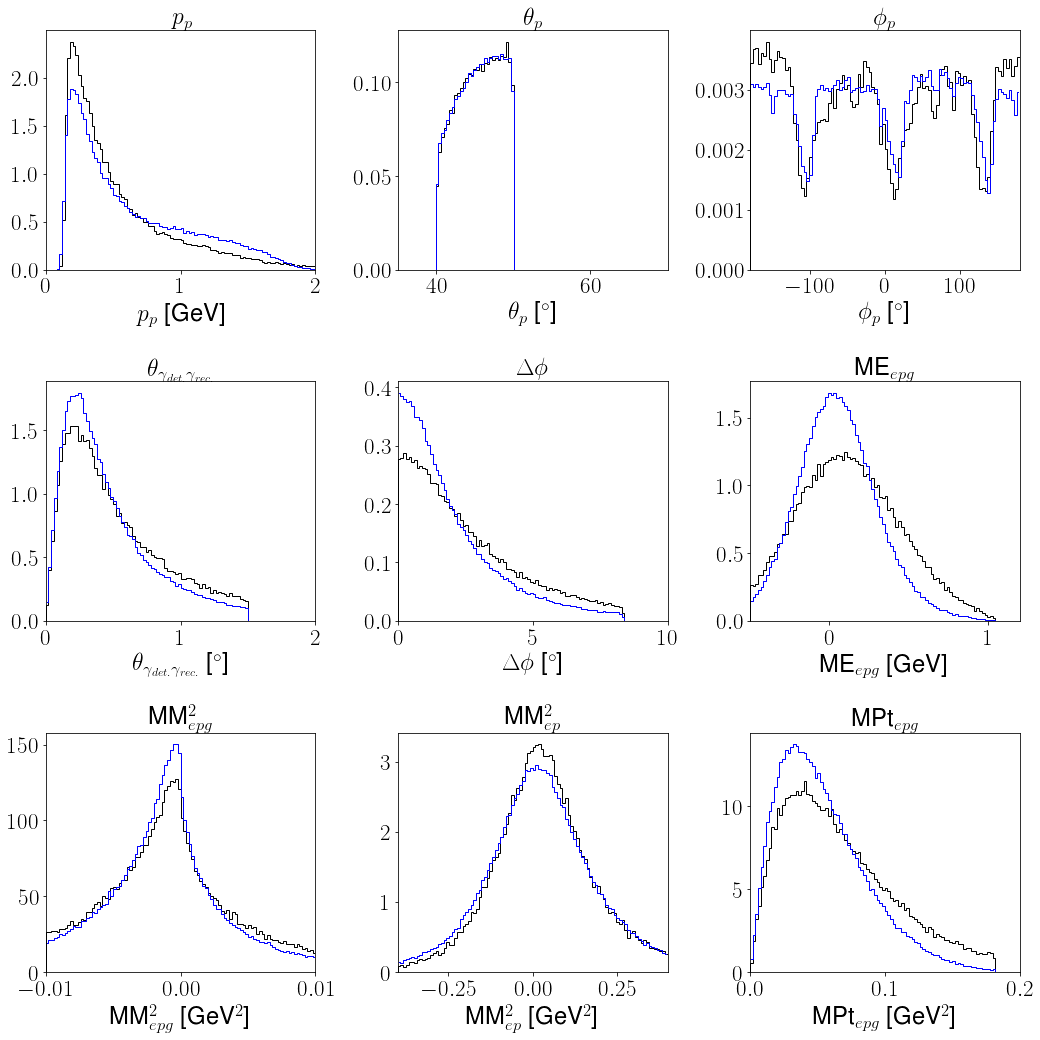

<Figure size 432x288 with 0 Axes>

In [246]:
#proton related
# df = makeDVCS(smearingDVCS2(dvcsSimInbCDFT, 0.04, 0, 0))
# PpMin = 0.8
# PpMax = 1.0
# df = dvcsSimInbCD.loc[(dvcsSimInbCD.Pp<PpMax)&(dvcsSimInbCD.Pp>PpMin)]#smearingDVCS2(dvcsSimInbCDFT, np.abs(0.18*(1/(1+np.exp(-(dvcsSimInbCDFT.Pp-0.3)/0.1))-0.5)), 0.8, 2.2)
# exp = epgExpInbCD.loc[(epgExpInbCD.Pp<PpMax)&(epgExpInbCD.Pp>PpMin)]

PthetaMin = 40
PthetaMax = 50
df = dvcsSimInbCD.loc[(dvcsSimInbCD.Ptheta<PthetaMax)&(dvcsSimInbCD.Ptheta>PthetaMin)]#smearingDVCS2(dvcsSimInbCDFT, np.abs(0.18*(1/(1+np.exp(-(dvcsSimInbCDFT.Pp-0.3)/0.1))-0.5)), 0.8, 2.2)
exp = epgExpInbCD.loc[(epgExpInbCD.Ptheta<PthetaMax)&(epgExpInbCD.Ptheta>PthetaMin)]

varstoplot = ["t1", "Ptheta", "Pphi",  "reconGam", "coplanarity", "ME_epg", "MM2_epg", "MM2_ep", "MPt"]
title = [r"$p_{p}$", r"$\theta_{p}$", r"$\phi_{p}$", r"$\theta_{\gamma_{det.}\gamma_{rec.}}$", r"$\Delta\phi$" , "ME"+r"${}_{epg}$", "MM"+r"${}^{2}_{epg}$", "MM"+r"${}^{2}_{ep}$", "MPt"+r"${}_{epg}$"]
unit = [GeV, degree, degree, degree, degree, GeV, GeV2, GeV2, GeV2, GeVc]
binstarts = [0, 35, -180, 0, 0, -0.5, -0.01, -0.4, 0]
binends = [2, 70, 180, 2, 10, 1.2, 0.01, 0.4, 0.2]
fig, axs = plt.subplots(3, 3, figsize = (15,15))
for yind in range(0, 3):
    for xind in range(0,3):
        ind = 3*yind + xind
        start = binstarts[ind]
        end = binends[ind]
        bins = np.linspace(start, end, 101)
#         simDist_dvpi0, bins = np.histogram(smearingDVCS2(bkgSimInbCDFT, 0.5*bkgSimInbCDFT.Pp**2, 0.7, 2.2)[varstoplot[ind]], bins, density = True)
        simDist_dvcs, bins = np.histogram(df[varstoplot[ind]], bins, density = True)
#         simDist = len_pi0ExpInbCDFT/len_pi0SimInbCDFT*simDist_dvpi0 + (len_epgExpInbCDFT/len_dvcsSimInbCDFT-len_bkgSimInbCDFT/len_pi0SimInbCDFT*len_pi0ExpInbCDFT/len_dvcsSimInbCDFT)*simDist_dvcs
#         simDist = (1-contCDFT)*simDist_dvcs + contCDFT*simDist_dvpi0
        simDist = simDist_dvcs
#         expDist, bins = np.histogram(correctDVCS(epgExpInbCDFT, 0.25)[varstoplot[ind]], bins, density=True)
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        axs[yind, xind].step(bincenters, simDist, where='mid',color='b', linewidth=1)
#         axs[yind, xind].step(bincenters, c*simDist_dvpi0, where='mid',color='g', linewidth=1)
#         axs[yind, xind].step(bincenters, (1/len_dvcsSimInbCDFT-cont_inb_CDFT/len_dvcsSimInbCDFT)*len_epgExpInbCDFT*simDist_dvcs, where='mid',color='r', linewidth=1)
        axs[yind, xind].hist(exp[varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', density=True, linewidth=1)
#         axs[yind, xind].hist(epgExpInbCDFT[varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', linewidth=1)
#         axs[yind, xind].step(bincenters, expDist - len_pi0ExpInbCDFT/len_pi0SimInbCDFT*simDist_dvpi0, where='mid',color='k', linewidth=1)
        print(varstoplot[ind])#, nphistmean(expDist - len(pi0ExpInbCDFT)/len(pi0SimInbCDFT)*simDist_dvpi0, bins))
#         axs[yind, xind].step(bincenters, (1-c)*simDist_dvcs, where='mid',color='r', linewidth=1)
        axs[yind, xind].set_title(title[ind])
        axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
# axs[0,2].set_xticks([2.2, 2.7, 3.2])
# axs[1,0].set_xticks([0.29, 0.32, 0.35, 0.38])
# axs[1,1].set_xticks([0.23, 0.3, 0.39, 0.52])
# axs[1,2].set_xticks([0, 90, 180, 270, 360])
plt.tight_layout()
# plt.savefig("kineCDFT.pdf")
# plt.savefig("analysisnote/inbending1.pdf")
plt.show()
plt.clf()

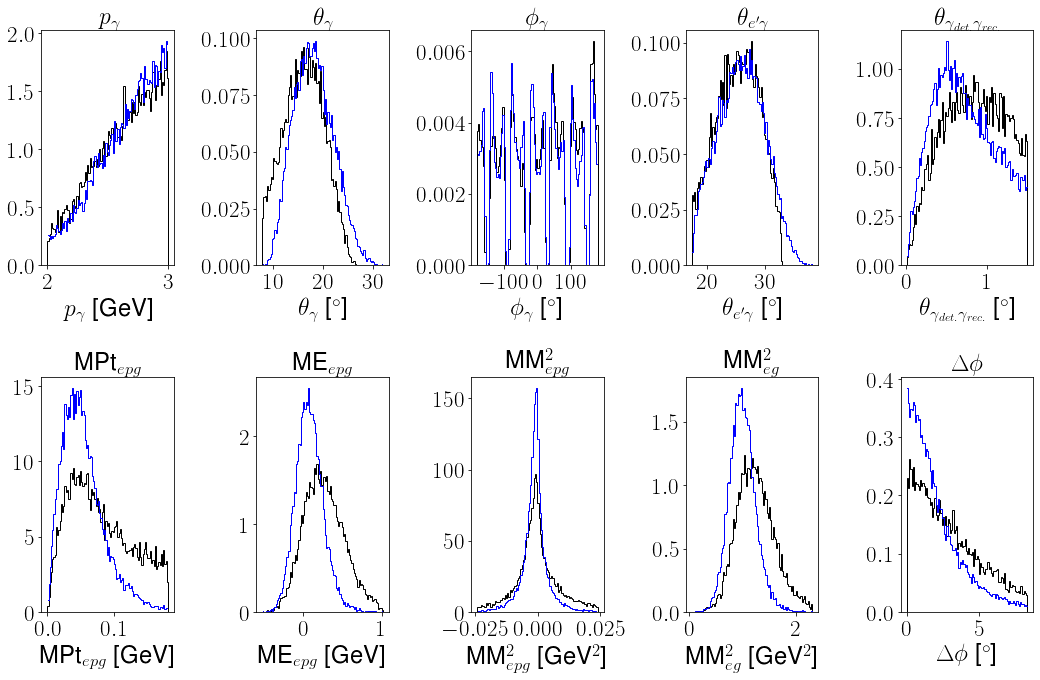

In [261]:
GpMin = 2
GpMax = 3

varstoplot = ["Gp", "Gtheta", "Gphi", "coneAngle",  "reconGam", "MPt", "ME_epg", "MM2_epg", "MM2_eg", "coplanarity"]
title = [r"$p_{\gamma}$", r"$\theta_{\gamma}$", r"$\phi_{\gamma}$", r"$\theta_{e'\gamma}$", r"$\theta_{\gamma_{det.}\gamma_{rec.}}$", "MPt"+r"${}_{epg}$", "ME"+r"${}_{epg}$", "MM"+r"${}^{2}_{epg}$", "MM"+r"${}^{2}_{eg}$", r"$\Delta \phi$"]
unit = [GeV, degree, degree, degree, degree, GeV, GeV, GeV2, GeV2, degree]
fig, axs = plt.subplots(2, 5, figsize = (15,10))
for yind in range(0, 2):
    for xind in range(0,5):
        ind = 5*yind + xind
        # start = binstarts[ind]
        # end = binends[ind]
        # bins = np.linspace(start, end, 101)
        simDist_dvcs, bins = np.histogram(dvcsSimInbCD.loc[(dvcsSimInbCD.Gp>GpMin) & (dvcsSimInbCD.Gp<GpMax) , varstoplot[ind]], 100, density = True)
        simDist = simDist_dvcs
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        axs[yind, xind].step(bincenters, simDist, where='mid',color='b', linewidth=1)
        axs[yind, xind].hist(epgExpInbCD.loc[(epgExpInbCD.Gp>GpMin) & (epgExpInbCD.Gp<GpMax), varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', density=True, linewidth=1)
        axs[yind, xind].set_title(title[ind])
        # axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
plt.tight_layout()
plt.show()

In [1]:
GeEdges = [3, 3.5, 4, 4.5, 5, 5.5, 6, 6.5, 7, 7.5, 8, 9]

In [61]:
parent_MC = "/Volumes/Extreme SSD/Feb2022/SimtoDat/v2.0/inb/dvcs/"
parent_MC_bkg1g = "/Volumes/Extreme SSD/Feb2022/SimtoDat/v2.0/inb/bkg_1g/"
parent_MC_bkg2g = "/Volumes/Extreme SSD/Feb2022/SimtoDat/v2.0/inb/bkg_2g/"
parent_exp = "/Volumes/Extreme SSD/Feb2022/SimtoDat/v2.0/inb/exp/"

dvcsSimInb = pd.read_pickle(parent_MC + "3987.pkl")
bkgSimInb = pd.read_pickle(parent_MC_bkg1g + "4076.pkl")
pi0SimInb = pd.read_pickle(parent_MC_bkg2g + "4076.pkl")
epgExpInb = pd.read_pickle(parent_exp + "dvcs.pkl")
pi0ExpInb = pd.read_pickle(parent_exp + "pi0.pkl")

epgExpInbCDFT = epgExpInb.loc[epgExpInb.config == 3]
pi0ExpInbCDFT = pi0ExpInb.loc[pi0ExpInb.config == 3]
dvcsSimInbCDFT = dvcsSimInb.loc[dvcsSimInb.config == 3]
bkgSimInbCDFT = bkgSimInb.loc[bkgSimInb.config == 3]
pi0SimInbCDFT = pi0SimInb.loc[pi0SimInb.config == 3]


In [58]:
parent_MC = "/Volumes/Extreme SSD/Feb2022/SimtoDat/v2.0/outb/dvcs/"
parent_MC_bkg1g = "/Volumes/Extreme SSD/Feb2022/SimtoDat/v2.0/outb/bkg_1g/"
parent_MC_bkg2g = "/Volumes/Extreme SSD/Feb2022/SimtoDat/v2.0/outb/bkg_2g/"
parent_exp = "/Volumes/Extreme SSD/Feb2022/SimtoDat/v2.0/outb/exp/"

dvcsSimOutb = pd.read_pickle(parent_MC + "4240.pkl")
bkgSimOutb = pd.read_pickle(parent_MC_bkg1g + "4243.pkl")
pi0SimOutb = pd.read_pickle(parent_MC_bkg2g + "4243.pkl")
epgExpOutb = pd.read_pickle(parent_exp + "dvcs.pkl")
pi0ExpOutb = pd.read_pickle(parent_exp + "pi0.pkl")

epgExpOutbCDFT = epgExpOutb.loc[epgExpOutb.config == 3]
pi0ExpOutbCDFT = pi0ExpOutb.loc[pi0ExpOutb.config == 3]
dvcsSimOutbCDFT = dvcsSimOutb.loc[dvcsSimOutb.config == 3]
bkgSimOutbCDFT = bkgSimOutb.loc[bkgSimOutb.config == 3]
pi0SimOutbCDFT = pi0SimOutb.loc[pi0SimOutb.config == 3]

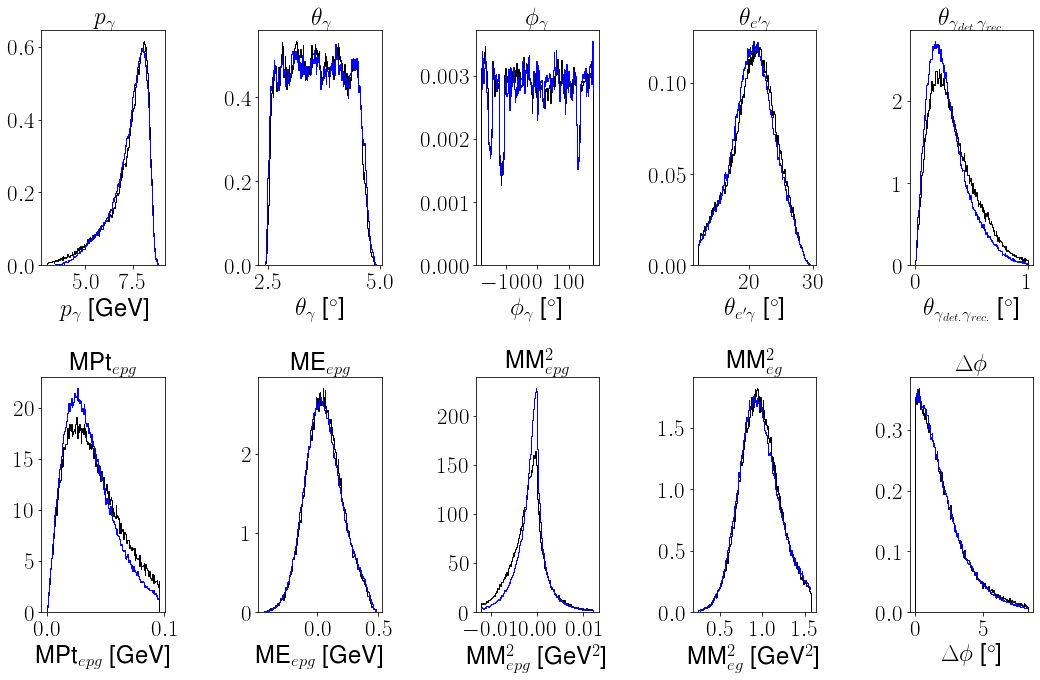

In [48]:
GpMin = 3
GpMax = 10
# correction = -0.05
# epgExpInbCDFT = CorrectionV0(epgExpInbCDFT, correction)
# epgExpInbCDFT = saveDVCSvars(epgExpInbCDFT)
epgExpInbCDFT = makeDVCS(epgExpInbCDFT)
dvcsSimInbCDFT = makeDVCS(dvcsSimInbCDFT)
c = 0
varstoplot = ["Gp", "Gtheta", "Gphi", "coneAngle",  "reconGam", "MPt", "ME_epg", "MM2_epg", "MM2_eg", "coplanarity"]
title = [r"$p_{\gamma}$", r"$\theta_{\gamma}$", r"$\phi_{\gamma}$", r"$\theta_{e'\gamma}$", r"$\theta_{\gamma_{det.}\gamma_{rec.}}$", "MPt"+r"${}_{epg}$", "ME"+r"${}_{epg}$", "MM"+r"${}^{2}_{epg}$", "MM"+r"${}^{2}_{eg}$", r"$\Delta \phi$"]
unit = [GeV, degree, degree, degree, degree, GeV, GeV, GeV2, GeV2, degree]
fig, axs = plt.subplots(2, 5, figsize = (15,10))
for yind in range(0, 2):
    for xind in range(0,5):
        ind = 5*yind + xind
        # start = binstarts[ind]
        # end = binends[ind]
        # bins = np.linspace(start, end, 101)
        simDist_exp, bins = np.histogram(epgExpInbCDFT.loc[(epgExpInbCDFT.Gp>GpMin) & (epgExpInbCDFT.Gp<GpMax), varstoplot[ind]], 200, density = True)
        simDist_dvcs, _ = np.histogram(dvcsSimInbCDFT.loc[(dvcsSimInbCDFT.Gp>GpMin) & (dvcsSimInbCDFT.Gp<GpMax) , varstoplot[ind]], 200, density = True)
        simDist_dvpi0, _ = np.histogram(bkgSimInbCDFT.loc[(bkgSimInbCDFT.Gp>GpMin) & (bkgSimInbCDFT.Gp<GpMax) , varstoplot[ind]], bins, density = True)
        simDist = (1-c)*simDist_dvcs + c* simDist_dvpi0
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        axs[yind, xind].step(bincenters, simDist, where='mid',color='b', linewidth=1)
        axs[yind, xind].hist(epgExpInbCDFT.loc[(epgExpInbCDFT.Gp>GpMin) & (epgExpInbCDFT.Gp<GpMax), varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', density=True, linewidth=1)
        axs[yind, xind].set_title(title[ind])
        # axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
# epgExpInbCDFT = CorrectionV0(epgExpInbCDFT, -correction)
# epgExpInbCDFT = saveDVCSvars(epgExpInbCDFT)

plt.tight_layout()
plt.show()

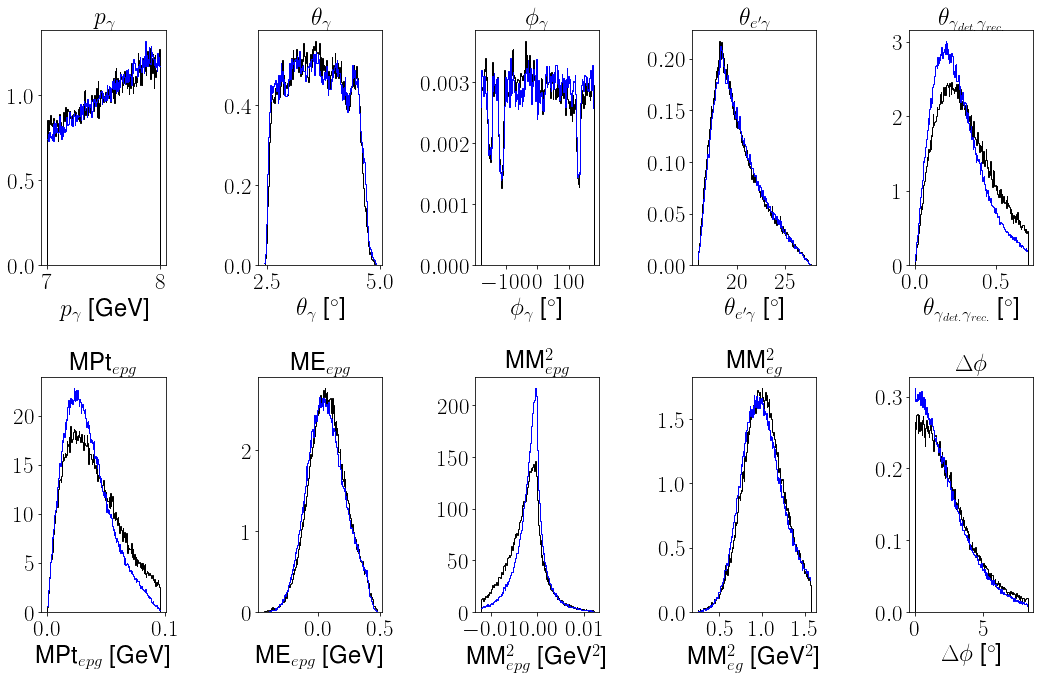

In [137]:
GpMin = 7
GpMax = 8
# correction = -0.05
# epgExpOutbCDFT = CorrectionV0(epgExpOutbCDFT, correction)
# epgExpOutbCDFT = saveDVCSvars(epgExpOutbCDFT)
df3 = makeDVCS(epgExpOutbCDFT)
df1 = makeDVCS(dvcsSimOutbCDFT)
df2 = makeDVCS(bkgSimOutbCDFT)
c = 0
varstoplot = ["Gp", "Gtheta", "Gphi", "coneAngle",  "reconGam", "MPt", "ME_epg", "MM2_epg", "MM2_eg", "coplanarity"]
title = [r"$p_{\gamma}$", r"$\theta_{\gamma}$", r"$\phi_{\gamma}$", r"$\theta_{e'\gamma}$", r"$\theta_{\gamma_{det.}\gamma_{rec.}}$", "MPt"+r"${}_{epg}$", "ME"+r"${}_{epg}$", "MM"+r"${}^{2}_{epg}$", "MM"+r"${}^{2}_{eg}$", r"$\Delta \phi$"]
unit = [GeV, degree, degree, degree, degree, GeV, GeV, GeV2, GeV2, degree]
fig, axs = plt.subplots(2, 5, figsize = (15,10))
for yind in range(0, 2):
    for xind in range(0,5):
        ind = 5*yind + xind
        # start = binstarts[ind]
        # end = binends[ind]
        # bins = np.linspace(start, end, 101)
        simDist_exp, bins = np.histogram(df3.loc[(df3.Gp>GpMin) & (df3.Gp<GpMax), varstoplot[ind]], 200, density = True)
        simDist_dvcs, _ = np.histogram(df1.loc[(df1.Gp>GpMin) & (df1.Gp<GpMax) , varstoplot[ind]], 200, density = True)
        simDist_dvpi0, _ = np.histogram(df2.loc[(df2.Gp>GpMin) & (df2.Gp<GpMax) , varstoplot[ind]], bins, density = True)
        simDist = (1-c)*simDist_dvcs + c* simDist_dvpi0
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        axs[yind, xind].step(bincenters, simDist, where='mid',color='b', linewidth=1)
        axs[yind, xind].hist(epgExpOutbCDFT.loc[(epgExpOutbCDFT.Gp>GpMin) & (epgExpOutbCDFT.Gp<GpMax), varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', density=True, linewidth=1)
        axs[yind, xind].set_title(title[ind])
        # axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
# epgExpOutbCDFT = CorrectionV0(epgExpOutbCDFT, -correction)
# epgExpOutbCDFT = saveDVCSvars(epgExpOutbCDFT)

plt.tight_layout()
plt.show()

In [83]:
PpEdges = [0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6]
PthetaEdges = [40, 45, 47.5, 50, 52.5, 55,57.5, 60, 62.5, 65]

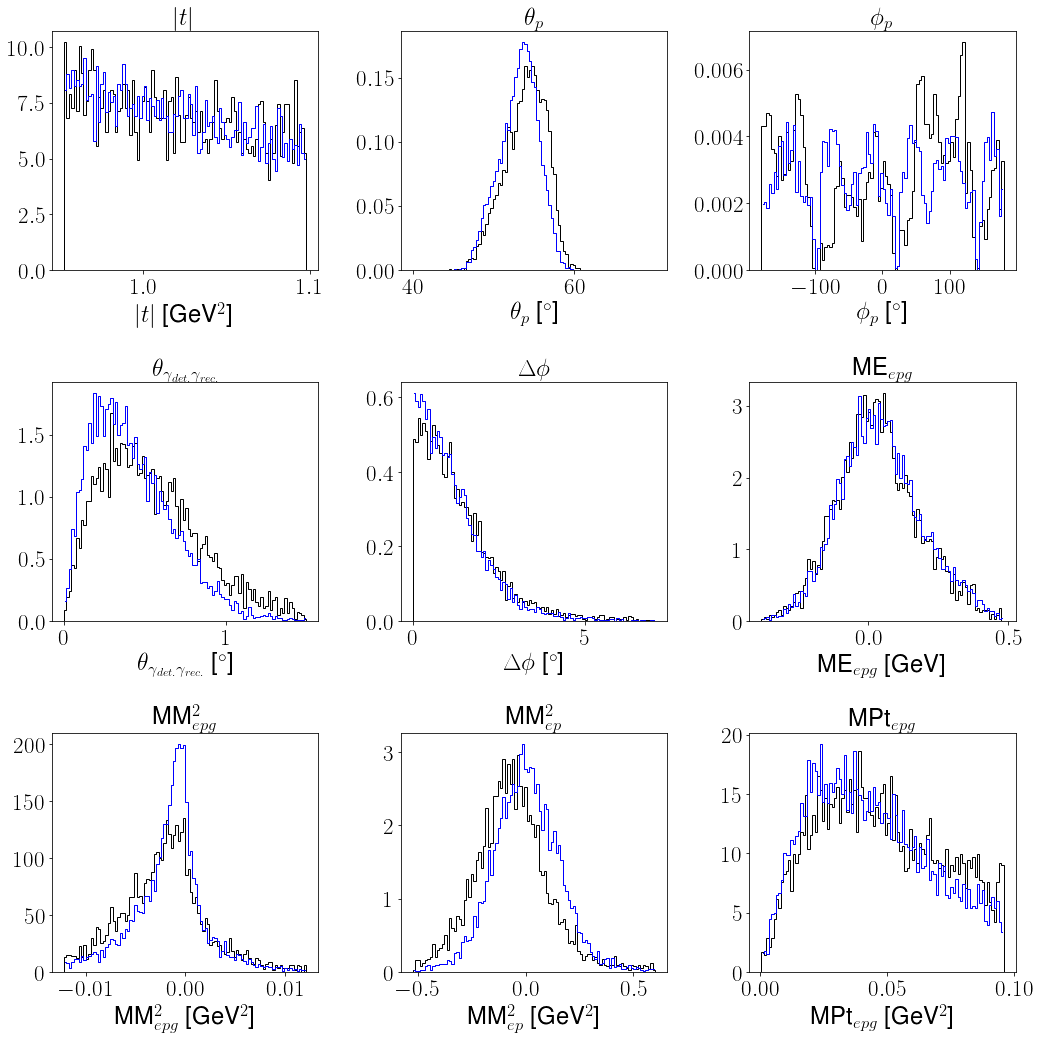

In [91]:
i = 8
PpMin = PpEdges[i]
PpMax = PpEdges[i+1]
varstoplot = ["t1", "Ptheta", "Pphi",  "reconGam", "coplanarity", "ME_epg", "MM2_epg", "MM2_ep", "MPt"]
title = [r"$|t|$", r"$\theta_{p}$", r"$\phi_{p}$", r"$\theta_{\gamma_{det.}\gamma_{rec.}}$", r"$\Delta\phi$" , "ME"+r"${}_{epg}$", "MM"+r"${}^{2}_{epg}$", "MM"+r"${}^{2}_{ep}$", "MPt"+r"${}_{epg}$"]
unit = [GeV2, degree, degree, degree, degree, GeV, GeV2, GeV2, GeV2, GeVc]
# binstarts = [PpMin, 0, -180, 0, 0, 0, -0.5, -0.01, 0.1, 0]
# binends = [GeMax, 7, 180, 30, 0.8, .1, 1.2, 0.01, 1.7, 10]
contInb = 0
fig, axs = plt.subplots(3, 3, figsize = (15,15))
for yind in range(0, 3):
    for xind in range(0,3):
        ind = 3*yind + xind
        if ind == 1:
            bins= np.linspace(40, 70, 101)
            simDist_dvcs, _ = np.histogram(dvcsSimInbCDFT.loc[(dvcsSimInbCDFT.Pp < PpMax) & (dvcsSimInbCDFT.Pp>PpMin), varstoplot[ind]], bins, density = True)
        else:
            simDist_dvcs, bins = np.histogram(dvcsSimInbCDFT.loc[(dvcsSimInbCDFT.Pp < PpMax) & (dvcsSimInbCDFT.Pp>PpMin), varstoplot[ind]], 100, density = True)
        simDist_dvpi0, _ = np.histogram(bkgSimInbCDFT.loc[(bkgSimInbCDFT.Pp < PpMax) & (bkgSimInbCDFT.Pp>PpMin), varstoplot[ind]], bins, density = True)
        simDist = (1-contInb)*simDist_dvcs + contInb*simDist_dvpi0
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        axs[yind, xind].step(bincenters, simDist, where='mid',color='b', linewidth=1)
        axs[yind, xind].hist(epgExpInbCDFT.loc[(epgExpInbCDFT.Pp < PpMax) & (epgExpInbCDFT.Pp>PpMin),varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', density=True, linewidth=1)
        axs[yind, xind].set_title(title[ind])
        # axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
plt.tight_layout()
# plt.savefig(outDir+"InbCDFT{}_{:.3f}_{:.3f}_{:.3f}.pdf".format(i, sigma1, sigma2, sigma3))
# plt.savefig(outDir+"InbCDFT{}_{:.3f}_{:.3f}.pdf".format(i, sigma1, sigma2))
# plt.savefig(outDir+"InbCDFT{}_{:.3f}.pdf".format(i, sigma2))
plt.show()



In [495]:
def smearingDVCS2(df_epg, sigma1 = 0, sigma2 = 0, sigma3 = 0):
    #set up dvcs variables
    df_epg = copy(df_epg)

#     df_epg.loc[:, 'Ep'] = np.random.normal(1, sigma, len(df_epg.loc[:]))*df_epg.loc[:, 'Ep']
#     df_epg.loc[:, 'Etheta'] = np.random.normal(0, sigma2, len(df_epg.loc[:]))+df_epg.loc[:, 'Etheta']
#     df_epg.loc[:, 'Ephi'] = np.random.normal(0, sigma3, len(df_epg.loc[:]))+df_epg.loc[:, 'Ephi']
#     df_epg.loc[:, 'Ee'] = np.sqrt(df_epg.loc[:, 'Ep']**2+me**2)
#     df_epg.loc[:, "Epx"] = df_epg.loc[:, "Ep"]*np.sin(np.radians(df_epg.loc[:, "Etheta"]))*np.cos(np.radians(df_epg.loc[:, "Ephi"]))
#     df_epg.loc[:, "Epy"] = df_epg.loc[:, "Ep"]*np.sin(np.radians(df_epg.loc[:, "Etheta"]))*np.sin(np.radians(df_epg.loc[:, "Ephi"]))
#     df_epg.loc[:, "Epz"] = df_epg.loc[:, "Ep"]*np.cos(np.radians(df_epg.loc[:, "Etheta"]))
    ele = [df_epg['Epx'], df_epg['Epy'], df_epg['Epz']]

    
    regulator = np.abs(2*(1/(1+np.exp(-(df_epg.loc[df_epg["Psector"]>7, "Pp"]-0.3)/0.01))-0.5))
    df_epg.loc[df_epg["Psector"]>7, "Pp"] = df_epg.loc[df_epg["Psector"]>7, "Pp"]*np.random.normal(1, regulator*sigma1, len(df_epg.loc[df_epg.Psector>7]))
    df_epg.loc[df_epg.Psector>7, 'Ptheta'] = np.random.normal(0, sigma2, len(df_epg.loc[df_epg.Psector>7]))+df_epg.loc[df_epg.Psector>7, 'Ptheta']
    df_epg.loc[df_epg.Psector>7, 'Pphi'] = np.random.normal(0, sigma3, len(df_epg.loc[df_epg.Psector>7]))+df_epg.loc[df_epg.Psector>7, 'Pphi']
    df_epg.loc[df_epg.Psector>7, 'Pe'] = np.sqrt(df_epg.loc[df_epg.Psector>7, 'Pp']**2+M**2)
    df_epg.loc[:, "Ppx"] = df_epg.loc[:, "Pp"]*np.sin(np.radians(df_epg.loc[:, "Ptheta"]))*np.cos(np.radians(df_epg.loc[:, "Pphi"]))
    df_epg.loc[:, "Ppy"] = df_epg.loc[:, "Pp"]*np.sin(np.radians(df_epg.loc[:, "Ptheta"]))*np.sin(np.radians(df_epg.loc[:, "Pphi"]))
    df_epg.loc[:, "Ppz"] = df_epg.loc[:, "Pp"]*np.cos(np.radians(df_epg.loc[:, "Ptheta"]))
    pro = [df_epg['Ppx'], df_epg['Ppy'], df_epg['Ppz']]

#     df_epg.loc[:, 'Gp'] = np.random.normal(1, sigma, len(df_epg))*df_epg.loc[:, 'Gp']
#     df_epg.loc[:, 'Ge'] = df_epg.loc[:, 'Gp']
# #     df_epg.loc[:, 'Gtheta'] = getTheta(gam)
# #     df_epg.loc[:, 'Gphi'] = getPhi(gam)
#     df_epg.loc[:, "Gpx"] = df_epg.loc[:, "Gp"]*np.sin(np.radians(df_epg.loc[:, "Gtheta"]))*np.cos(np.radians(df_epg.loc[:, "Gphi"]))
#     df_epg.loc[:, "Gpy"] = df_epg.loc[:, "Gp"]*np.sin(np.radians(df_epg.loc[:, "Gtheta"]))*np.sin(np.radians(df_epg.loc[:, "Gphi"]))
#     df_epg.loc[:, "Gpz"] = df_epg.loc[:, "Gp"]*np.cos(np.radians(df_epg.loc[:, "Gtheta"]))
    gam = [df_epg['Gpx'], df_epg['Gpy'], df_epg['Gpz']]
    
    Ppt = mag([df_epg['Ppx'], df_epg['Ppy'], 0])

    VGS = [-df_epg['Epx'], -df_epg['Epy'], pbeam - df_epg['Epz']]
    v3l = cross(beam, ele)
    v3h = cross(pro, VGS)
    v3g = cross(VGS, gam)
    VmissG = [-df_epg["Epx"] - df_epg["Ppx"], -df_epg["Epy"] - df_epg["Ppy"],
              pbeam - df_epg["Epz"] - df_epg["Ppz"]]
    VmissP = [-(df_epg["Epx"] + df_epg["Gpx"]), -(df_epg["Epy"] + df_epg["Gpy"]),
              -(-pbeam + df_epg["Epz"] + df_epg["Gpz"])]
    Vmiss = [-(df_epg["Epx"] + df_epg["Ppx"] + df_epg["Gpx"]), -(df_epg["Epy"] + df_epg["Ppy"] + df_epg["Gpy"]),
             -(-pbeam + df_epg["Epz"] + df_epg["Ppz"] + df_epg["Gpz"])]
    costheta = cosTheta(VGS, gam)

    df_epg.loc[:, 'Mpx'], df_epg.loc[:, 'Mpy'], df_epg.loc[:, 'Mpz'] = Vmiss

    # binning kinematics
    df_epg.loc[:,'Q2'] = -((ebeam - df_epg['Ee'])**2 - mag2(VGS))
    df_epg.loc[:,'nu'] = (ebeam - df_epg['Ee'])
    df_epg.loc[:,'y'] = df_epg['nu']/ebeam
    df_epg.loc[:,'xB'] = df_epg['Q2'] / 2.0 / M / df_epg['nu']
    df_epg.loc[:,'t1'] = 2 * M * (df_epg['Pe'] - M)
    df_epg.loc[:,'t2'] = (M * df_epg['Q2'] + 2 * M * df_epg['nu'] * (df_epg['nu'] - np.sqrt(df_epg['nu'] * df_epg['nu'] + df_epg['Q2']) * costheta))\
    / (M + df_epg['nu'] - np.sqrt(df_epg['nu'] * df_epg['nu'] + df_epg['Q2']) * costheta)
    df_epg.loc[:,'W'] = np.sqrt(np.maximum(0, (ebeam + M - df_epg['Ee'])**2 - mag2(VGS)))

    # trento angles
    df_epg.loc[:,'phi1'] = angle(v3l, v3h)
    df_epg.loc[:,'phi1'] = np.where(dot(v3l, pro) > 0, 360.0 -
                              df_epg['phi1'], df_epg['phi1'])
    df_epg.loc[:,'phi2'] = angle(v3l, v3g)
    df_epg.loc[:,'phi2'] = np.where(dot(v3l, gam) <
                              0, 360.0 - df_epg['phi2'], df_epg['phi2'])

    # exclusivity variables
    df_epg.loc[:,'MM2_epg'] = (-M - ebeam + df_epg["Ee"] +
                         df_epg["Pe"] + df_epg["Ge"])**2 - mag2(Vmiss)
    df_epg.loc[:,'ME_epg'] = (M + ebeam - df_epg["Ee"] - df_epg["Pe"] - df_epg["Ge"])
    df_epg.loc[:,'MM2_ep'] = (-M - ebeam + df_epg["Ee"] + df_epg["Pe"])**2 - mag2(VmissG)
    df_epg.loc[:,'MM2_eg'] = (-M - ebeam + df_epg["Ee"] + df_epg["Ge"])**2 - mag2(VmissP)
    df_epg.loc[:,'MPt'] = np.sqrt((df_epg["Epx"] + df_epg["Ppx"] + df_epg["Gpx"])**2 +
                            (df_epg["Epy"] + df_epg["Ppy"] + df_epg["Gpy"])**2)
    df_epg.loc[:,'coneAngle'] = angle(ele, gam)
    df_epg.loc[:,'reconGam'] = angle(gam, VmissG)
    df_epg.loc[:,'coplanarity'] = angle(v3h, v3g)
    
    return df_epg

In [591]:
def makeDVCS(df, pol = "inbending"):
    #make dvcs pairs
    df_dvcs = copy(df)

    #common cuts
    cut_xBupper = df_dvcs["xB"] < 1  # xB
    cut_xBlower = df_dvcs["xB"] > 0  # xB
    cut_Q2 = df_dvcs["Q2"] > 1  # Q2
    cut_W = df_dvcs["W"] > 2  # W
    cut_Ee = df_dvcs["Ee"] > 2  # Ee
    cut_Ge = df_dvcs["Ge"] > 2  # Ge
    cut_Esector = (df_dvcs["Esector"]!=df_dvcs["Gsector"])
    cut_Psector = ~( ((df_dvcs["Pstat"]//10)%10>0) & (df_dvcs["Psector"]==df_dvcs["Gsector"]))
    cut_Ppmax = df_dvcs.Pp < 1.6  # Pp
    # cut_Vz = np.abs(df_dvcs["Evz"] - df_dvcs["Pvz"]) < 2.5 + 2.5 / mag([df_dvcs["Ppx"], df_dvcs["Ppy"], df_dvcs["Ppz"]])
    cut_common = cut_xBupper & cut_xBlower & cut_Q2 & cut_W & cut_Ee & cut_Ge & cut_Esector & cut_Psector & cut_Ppmax

    df_dvcs = df_dvcs[cut_common]

    # proton reconstruction quality
    # cut_FD_proton = (df_dvcs.loc[:, "Psector"]<7) & (df_dvcs.loc[:, "Ptheta"]<35)
    # cut_CD_proton = (df_dvcs.loc[:, "Psector"]>7) & (df_dvcs.loc[:, "Ptheta"]>45) & (df_dvcs.loc[:, "Ptheta"]<65)
    # cut_FD_proton = (df_dvcs.loc[:, "Psector"]<7) #& (df_dvcs.loc[:, "Ptheta"]<37)
    # cut_CD_proton = (df_dvcs.loc[:, "Psector"]>7) #& (df_dvcs.loc[:, "Ptheta"]<66) #& (df_dvcs.loc[:, "Ptheta"]>40) 
    # cut_proton = (cut_FD_proton)|(cut_CD_proton)
    #(cut_FD_proton)|(cut_CD_proton)

    df_dvcs.loc[:, "config"] = 0

    if pol == "inbending":
        #CDFT
        cut_Pp1_CDFT = df_dvcs.Pp > 0.3  # Pp
        cut_Psector_CDFT = df_dvcs.Psector>7
        cut_Ptheta_CDFT = df_dvcs.Ptheta<65
        cut_Gsector_CDFT = df_dvcs.Gsector>7
        cut_mmep1_CDFT = df_dvcs["MM2_ep"] < 0.601  # mmep
        cut_mmep2_CDFT = df_dvcs["MM2_ep"] > -0.528  # mmep
        cut_mmeg1_CDFT = df_dvcs["MM2_eg"] < 1.569  # mmeg
        cut_mmeg2_CDFT = df_dvcs["MM2_eg"] > 0.246  # mmeg
        cut_meepg1_CDFT = df_dvcs["ME_epg"] < 0.484 # meepg
        cut_meepg2_CDFT = df_dvcs["ME_epg"] > -0.439  # meepg
        cut_cone1_CDFT = df_dvcs["coneAngle"] < 0.133 * df_dvcs.Gp**2 + 1.140*df_dvcs.Gp + 10.129  # coneangle
        cut_cone2_CDFT = df_dvcs["coneAngle"] > 0.115 * df_dvcs.Gp**2 + 0.702*df_dvcs.Gp + 5.359 #12.159  # coneangle
        cut_mpt_CDFT = df_dvcs["MPt"] < 0.0958  # mpt
        cut_recon_CDFT = df_dvcs["reconGam"] < 0.697  # recon gam angle
        cut_coplanarity_CDFT = df_dvcs["coplanarity"] < 8.251  # coplanarity angle
        cut_mmepg1_CDFT = np.abs(df_dvcs["MM2_epg"]) < 0.0122  # mmepg
        cut_mmepg2_CDFT = np.abs(df_dvcs["MM2_epg"]) > -0.0151  # mmepg

        cut_CDFT = (cut_Pp1_CDFT & cut_Psector_CDFT & cut_Ptheta_CDFT & cut_Gsector_CDFT &
                    cut_mmep1_CDFT & cut_mmep2_CDFT & cut_mmeg1_CDFT & cut_mmeg2_CDFT &
                    cut_meepg1_CDFT & cut_meepg2_CDFT & cut_cone1_CDFT & cut_cone2_CDFT &
                    cut_mpt_CDFT & cut_recon_CDFT & cut_coplanarity_CDFT & cut_mmepg1_CDFT & cut_mmepg2_CDFT)


        #CD
        cut_Pp1_CD = df_dvcs.Pp > 0.3  # Pp
        cut_Psector_CD = df_dvcs.Psector>7
        cut_Ptheta_CD = df_dvcs.Ptheta<60
        cut_Gsector_CD = df_dvcs.Gsector<7
        cut_GFid_CD = df_dvcs.GFid==1
        cut_mmep1_CD = df_dvcs["MM2_ep"] < 0.428  # mmep
        cut_mmep2_CD = df_dvcs["MM2_ep"] > -0.418  # mmep
        cut_mmeg1_CD = df_dvcs["MM2_eg"] < 2.321  # mmeg
        cut_mmeg2_CD = df_dvcs["MM2_eg"] > -0.428 # mmeg
        cut_meepg1_CD = df_dvcs["ME_epg"] < 1.045  # meepg
        cut_meepg2_CD = df_dvcs["ME_epg"] > -0.922  # meepg
        cut_cone1_CD = df_dvcs["coneAngle"] < 0.416 * df_dvcs.Gp**2 - 5.401*df_dvcs.Gp + 50.980  # coneangle
        cut_cone2_CD = df_dvcs["coneAngle"] > 0.278 * df_dvcs.Gp**2 - 2.711*df_dvcs.Gp + 23.021  # coneangle
        cut_mpt_CD = df_dvcs["MPt"] < 0.124#0.182  # mpt
        cut_recon_CD = df_dvcs["reconGam"] < 0.876  # recon gam angle
        cut_coplanarity_CD = df_dvcs["coplanarity"] < 8.352  # coplanarity angle
        cut_mmepg1_CD = np.abs(df_dvcs["MM2_epg"]) < 0.0241  # mmepg
        cut_mmepg2_CD = np.abs(df_dvcs["MM2_epg"]) > -0.0275  # mmepg

        cut_CD = (cut_Pp1_CD & cut_Psector_CD & cut_Ptheta_CD & cut_Gsector_CD & cut_GFid_CD &
                    cut_mmep1_CD & cut_mmep2_CD & cut_mmeg1_CD & cut_mmeg2_CD &
                    cut_meepg1_CD & cut_meepg2_CD & cut_cone1_CD & cut_cone2_CD &
                    cut_mpt_CD & cut_recon_CD & cut_coplanarity_CD & cut_mmepg1_CD & cut_mmepg2_CD)

        #FD
        cut_Pp1_FD = df_dvcs.Pp > 0.42  # Pp
        cut_Psector_FD = df_dvcs.Psector<7
        cut_Ptheta_FD = df_dvcs.Ptheta>2.477
        cut_Gsector_FD = df_dvcs.Gsector<7
        cut_GFid_FD = df_dvcs.GFid==1
        cut_mmep1_FD = df_dvcs["MM2_ep"] < 0.406  # mmep
        cut_mmep2_FD = df_dvcs["MM2_ep"] > -0.396  # mmep
        cut_mmeg1_FD = df_dvcs["MM2_eg"] < 2.045  # mmeg
        cut_mmeg2_FD = df_dvcs["MM2_eg"] > -0.166  # mmeg
        cut_meepg1_FD = df_dvcs["ME_epg"] < 0.996  # meepg
        cut_meepg2_FD = df_dvcs["ME_epg"] > -0.864 # meepg
        cut_cone1_FD = df_dvcs["coneAngle"] < 0.0673 * df_dvcs.Gp**2 - 0.752*df_dvcs.Gp + 41.678  # coneangle
        cut_cone2_FD = df_dvcs["coneAngle"] > 0.712 * df_dvcs.Gp**2 - 7.676*df_dvcs.Gp + 46.720  # coneangle
        cut_mpt_FD = df_dvcs["MPt"] < 0.184  # mpt
        cut_recon_FD = df_dvcs["reconGam"] < 1.181  # recon gam angle
        cut_coplanarity_FD = df_dvcs["coplanarity"] < 13.178  # coplanarity angle - no cut
        cut_mmepg1_FD = np.abs(df_dvcs["MM2_epg"]) < 0.0267  # mmepg
        cut_mmepg2_FD = np.abs(df_dvcs["MM2_epg"]) > -0.0302  # mmepg

        cut_FD = (cut_Pp1_FD & cut_Psector_FD & cut_Ptheta_FD & cut_Gsector_FD & cut_GFid_FD &
                    cut_mmep1_FD & cut_mmep2_FD & cut_mmeg1_FD & cut_mmeg2_FD &
                    cut_meepg1_FD & cut_meepg2_FD & cut_cone1_FD & cut_cone2_FD &
                    cut_mpt_FD & cut_recon_FD & cut_coplanarity_FD & cut_mmepg1_FD & cut_mmepg2_FD)

    elif pol == "outbending":
        #CDFT
        cut_Pp1_CDFT = df_dvcs.Pp > 0.3  # Pp
        cut_Psector_CDFT = df_dvcs.Psector>7
        cut_Ptheta_CDFT = df_dvcs.Ptheta<65
        cut_Gsector_CDFT = df_dvcs.Gsector>7
        cut_GFid_CDFT = df_dvcs.GFid==1
        cut_mmep1_CDFT = df_dvcs["MM2_ep"] < 0.567  # mmep
        cut_mmep2_CDFT = df_dvcs["MM2_ep"] > -0.479  # mmep
        cut_mmeg1_CDFT = df_dvcs["MM2_eg"] < 1.602  # mmeg
        cut_mmeg2_CDFT = df_dvcs["MM2_eg"] > 0.223  # mmeg
        cut_meepg1_CDFT = df_dvcs["ME_epg"] < 0.481 # meepg
        cut_meepg2_CDFT = df_dvcs["ME_epg"] > -0.436  # meepg
        cut_cone1_CDFT = df_dvcs["coneAngle"] < 0.133 * df_dvcs.Gp**2 + 1.140*df_dvcs.Gp + 10.129  # coneangle
        cut_cone2_CDFT = df_dvcs["coneAngle"] > 0.115 * df_dvcs.Gp**2 + 0.702*df_dvcs.Gp + 5.359 #12.159  # coneangle
        cut_mpt_CDFT = df_dvcs["MPt"] < 0.100  # mpt
        cut_recon_CDFT = df_dvcs["reconGam"] < 0.697  # recon gam angle
        cut_coplanarity_CDFT = df_dvcs["coplanarity"] < 8.479  # coplanarity angle
        cut_mmepg1_CDFT = np.abs(df_dvcs["MM2_epg"]) < 0.0128  # mmepg
        cut_mmepg2_CDFT = np.abs(df_dvcs["MM2_epg"]) > -0.0155  # mmepg

        cut_CDFT = (cut_Pp1_CDFT & cut_Psector_CDFT & cut_Ptheta_CDFT & cut_Gsector_CDFT & cut_GFid_CDFT &
                    cut_mmep1_CDFT & cut_mmep2_CDFT & cut_mmeg1_CDFT & cut_mmeg2_CDFT &
                    cut_meepg1_CDFT & cut_meepg2_CDFT & cut_cone1_CDFT & cut_cone2_CDFT &
                    cut_mpt_CDFT & cut_recon_CDFT & cut_coplanarity_CDFT & cut_mmepg1_CDFT & cut_mmepg2_CDFT)


        #CD
        cut_Pp1_CD = df_dvcs.Pp > 0.3  # Pp
        cut_Psector_CD = df_dvcs.Psector>7
        cut_Ptheta_CD = df_dvcs.Ptheta<65
        cut_Gsector_CD = df_dvcs.Gsector<7
        cut_GFid_CD = df_dvcs.GFid==1
        cut_mmep1_CD = df_dvcs["MM2_ep"] < 0.358  # mmep
        cut_mmep2_CD = df_dvcs["MM2_ep"] > -0.336  # mmep
        cut_mmeg1_CD = df_dvcs["MM2_eg"] < 2.207  # mmeg
        cut_mmeg2_CD = df_dvcs["MM2_eg"] > -0.387 # mmeg
        cut_meepg1_CD = df_dvcs["ME_epg"] < 0.888  # meepg
        cut_meepg2_CD = df_dvcs["ME_epg"] > -0.825  # meepg
        cut_cone1_CD = df_dvcs["coneAngle"] < 0.416 * df_dvcs.Gp**2 - 5.401*df_dvcs.Gp + 50.980  # coneangle
        cut_cone2_CD = df_dvcs["coneAngle"] > 0.278 * df_dvcs.Gp**2 - 2.711*df_dvcs.Gp + 23.021  # coneangle
        cut_mpt_CD = df_dvcs["MPt"] < 0.164#0.183  # mpt
        cut_recon_CD = df_dvcs["reconGam"] < 1.127#0.954  # recon gam angle
        cut_coplanarity_CD = df_dvcs["coplanarity"] < 7.347  # coplanarity angle
        cut_mmepg1_CD = np.abs(df_dvcs["MM2_epg"]) < 0.0211  # mmepg
        cut_mmepg2_CD = np.abs(df_dvcs["MM2_epg"]) > -0.0241  # mmepg

        cut_CD = (cut_Pp1_CD & cut_Psector_CD & cut_Ptheta_CD & cut_Gsector_CD & cut_GFid_CD &
                    cut_mmep1_CD & cut_mmep2_CD & cut_mmeg1_CD & cut_mmeg2_CD &
                    cut_meepg1_CD & cut_meepg2_CD & cut_cone1_CD & cut_cone2_CD &
                    cut_mpt_CD & cut_recon_CD & cut_coplanarity_CD & cut_mmepg1_CD & cut_mmepg2_CD)

        #FD
        cut_Pp1_FD = df_dvcs.Pp > 0.5  # Pp
        cut_Psector_FD = df_dvcs.Psector<7
        cut_Ptheta_FD = df_dvcs.Ptheta>17
        cut_Gsector_FD = df_dvcs.Gsector<7
        cut_GFid_FD = df_dvcs.GFid==1
        cut_mmep1_FD = df_dvcs["MM2_ep"] < 0.439  # mmep
        cut_mmep2_FD = df_dvcs["MM2_ep"] > -0.418  # mmep
        cut_mmeg1_FD = df_dvcs["MM2_eg"] < 2.049  # mmeg
        cut_mmeg2_FD = df_dvcs["MM2_eg"] > -0.205  # mmeg
        cut_meepg1_FD = df_dvcs["ME_epg"] < 0.947  # meepg
        cut_meepg2_FD = df_dvcs["ME_epg"] > -0.796  # meepg
        cut_cone1_FD = df_dvcs["coneAngle"] < 0.0673 * df_dvcs.Gp**2 - 0.752*df_dvcs.Gp + 41.678  # coneangle
        cut_cone2_FD = df_dvcs["coneAngle"] > 0.712 * df_dvcs.Gp**2 - 7.676*df_dvcs.Gp + 46.720  # coneangle
        cut_mpt_FD = df_dvcs["MPt"] < 0.269#0.186  # mpt
        cut_recon_FD = df_dvcs["reconGam"] < 1.786#1.662  # recon gam angle
        cut_coplanarity_FD = df_dvcs["coplanarity"] < 11.685  # coplanarity angle - no cut
        cut_mmepg1_FD = np.abs(df_dvcs["MM2_epg"]) < 0.0294  # mmepg
        cut_mmepg2_FD = np.abs(df_dvcs["MM2_epg"]) > -0.0346  # mmepg

        cut_FD = (cut_Pp1_FD & cut_Psector_FD & cut_Ptheta_FD & cut_Gsector_FD & cut_GFid_FD &
                    cut_mmep1_FD & cut_mmep2_FD & cut_mmeg1_FD & cut_mmeg2_FD &
                    cut_meepg1_FD & cut_meepg2_FD & cut_cone1_FD & cut_cone2_FD &
                    cut_mpt_FD & cut_recon_FD & cut_coplanarity_FD & cut_mmepg1_FD & cut_mmepg2_FD)            

    df_dvcs.loc[cut_CDFT, "config"] = 3
    df_dvcs.loc[cut_CD, "config"] = 2
    df_dvcs.loc[cut_FD, "config"] = 1

    df_dvcs = df_dvcs[df_dvcs.config>0]

    # dealing with duplicates
    df_dvcs = df_dvcs.sort_values(by=['reconGam', 'Ge', 'Pe'], ascending = [True, False, False])
    df_dvcs = df_dvcs.loc[~df_dvcs.event.duplicated(), :]
    df_dvcs = df_dvcs.sort_values(by='event')

    return df_dvcs                        


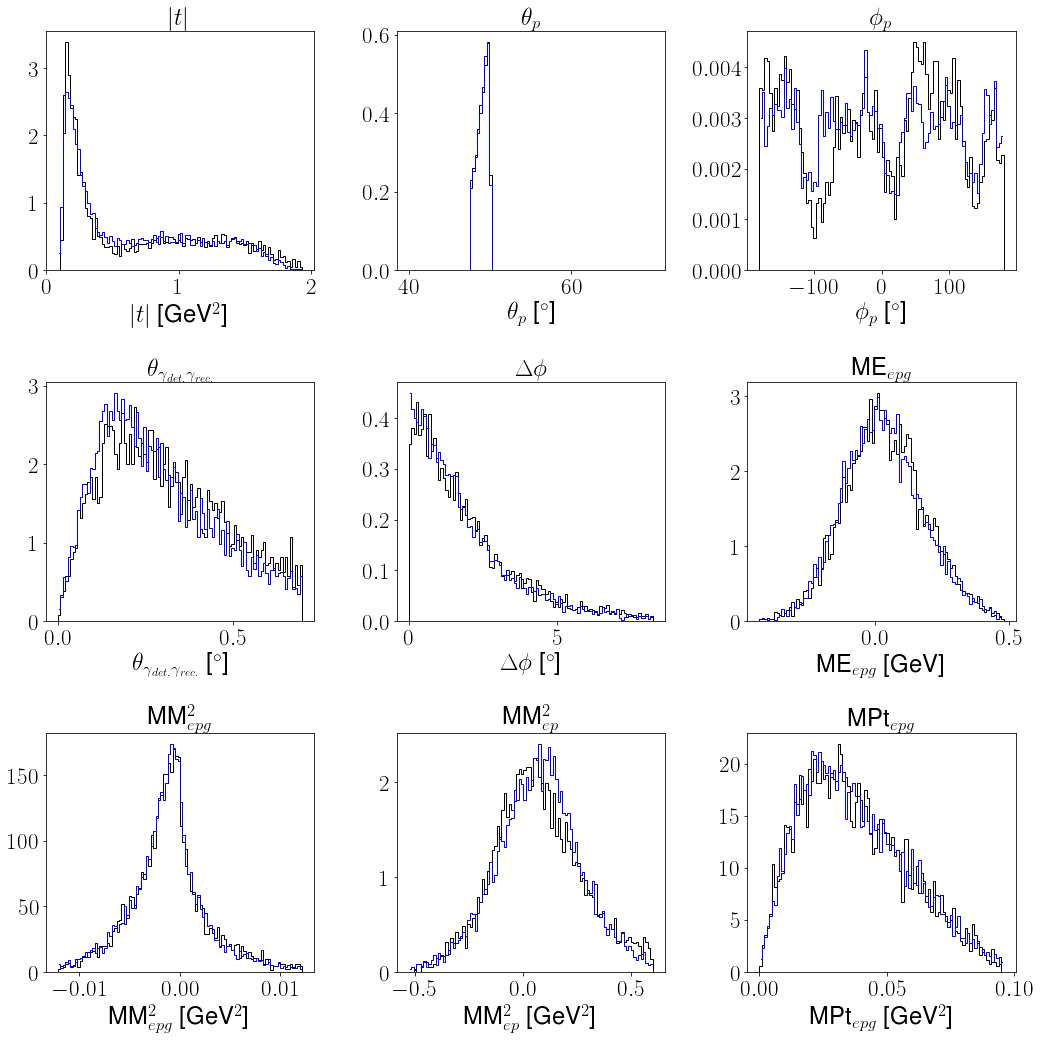

In [215]:
i = 2
PthetaMin = PthetaEdges[i]
PthetaMax = PthetaEdges[i+1]
varstoplot = ["t1", "Ptheta", "Pphi",  "reconGam", "coplanarity", "ME_epg", "MM2_epg", "MM2_ep", "MPt"]
title = [r"$|t|$", r"$\theta_{p}$", r"$\phi_{p}$", r"$\theta_{\gamma_{det.}\gamma_{rec.}}$", r"$\Delta\phi$" , "ME"+r"${}_{epg}$", "MM"+r"${}^{2}_{epg}$", "MM"+r"${}^{2}_{ep}$", "MPt"+r"${}_{epg}$"]
unit = [GeV2, degree, degree, degree, degree, GeV, GeV2, GeV2, GeV2, GeVc]
# binstarts = [PthetaMin, 0, -180, 0, 0, 0, -0.5, -0.01, 0.1, 0]
# binends = [GeMax, 7, 180, 30, 0.8, .1, 1.2, 0.01, 1.7, 10]
contInb = 0
df3 = makeDVCS(saveDVCSvars(CorrectionV1(epgExpInbCDFT, quadratic(res_lsq.x, epgExpInbCDFT.Ptheta))))
df1 = makeDVCS(smearingDVCS2(dvcsSimInbCDFT, 0.05, 0.5, 0))
df2 = makeDVCS(bkgSimInbCDFT)
fig, axs = plt.subplots(3, 3, figsize = (15,15))
for yind in range(0, 3):
    for xind in range(0,3):
        ind = 3*yind + xind
        if ind == 1:
            bins= np.linspace(40, 70, 101)
            simDist_dvcs, _ = np.histogram(df1.loc[(df1.Ptheta < PthetaMax) & (df1.Ptheta>PthetaMin), varstoplot[ind]], bins, density = True)
        else:
            simDist_dvcs, bins = np.histogram(df1.loc[(df1.Ptheta < PthetaMax) & (df1.Ptheta>PthetaMin), varstoplot[ind]], 100, density = True)
        simDist_dvpi0, _ = np.histogram(df2.loc[(df2.Ptheta < PthetaMax) & (df2.Ptheta>PthetaMin), varstoplot[ind]], bins, density = True)
        simDist = (1-contInb)*simDist_dvcs + contInb*simDist_dvpi0
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        axs[yind, xind].step(bincenters, simDist, where='mid',color='b', linewidth=1)
        axs[yind, xind].hist(df3.loc[(df3.Ptheta < PthetaMax) & (df3.Ptheta>PthetaMin),varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', density=True, linewidth=1)
        axs[yind, xind].set_title(title[ind])
        # axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
plt.tight_layout()
# plt.savefig(outDir+"InbCDFT{}_{:.3f}_{:.3f}_{:.3f}.pdf".format(i, sigma1, sigma2, sigma3))
# plt.savefig(outDir+"InbCDFT{}_{:.3f}_{:.3f}.pdf".format(i, sigma1, sigma2))
# plt.savefig(outDir+"InbCDFT{}_{:.3f}.pdf".format(i, sigma2))
plt.show()



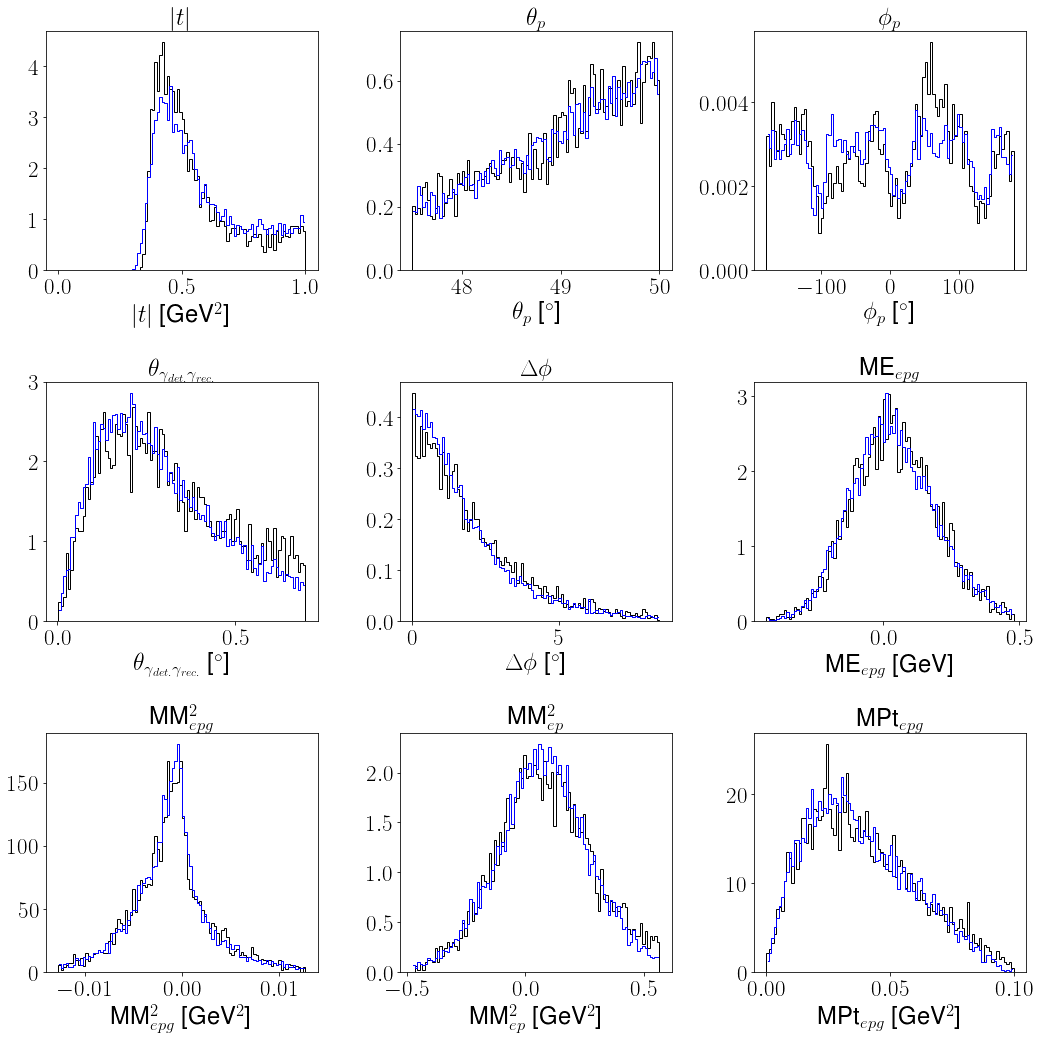

In [213]:
i = 2
PthetaMin = PthetaEdges[i]
PthetaMax = PthetaEdges[i+1]
varstoplot = ["Pp", "Ptheta", "Pphi",  "reconGam", "coplanarity", "ME_epg", "MM2_epg", "MM2_ep", "MPt"]
title = [r"$|t|$", r"$\theta_{p}$", r"$\phi_{p}$", r"$\theta_{\gamma_{det.}\gamma_{rec.}}$", r"$\Delta\phi$" , "ME"+r"${}_{epg}$", "MM"+r"${}^{2}_{epg}$", "MM"+r"${}^{2}_{ep}$", "MPt"+r"${}_{epg}$"]
unit = [GeV2, degree, degree, degree, degree, GeV, GeV2, GeV2, GeV2, GeVc]
# binstarts = [PthetaMin, 0, -180, 0, 0, 0, -0.5, -0.01, 0.1, 0]
# binends = [GeMax, 7, 180, 30, 0.8, .1, 1.2, 0.01, 1.7, 10]
contInb = 0
df3 = makeDVCS(saveDVCSvars(CorrectionV1(epgExpOutbCDFT, -0.1)), pol = 'outbending')
df1 = makeDVCS(smearingDVCS2(dvcsSimOutbCDFT, 0.05, 0.5, 0), pol = 'outbending')
df2 = makeDVCS(bkgSimOutbCDFT)
fig, axs = plt.subplots(3, 3, figsize = (15,15))
for yind in range(0, 3):
    for xind in range(0,3):
        ind = 3*yind + xind
        if ind == 1:
            bins= np.linspace(40, 70, 101)
            simDist_dvcs, _ = np.histogram(df1.loc[(df1.Ptheta < PthetaMax) & (df1.Ptheta>PthetaMin), varstoplot[ind]], bins, density = True)
        if ind == 0:
            bins= np.linspace(0, 1, 101)
            simDist_dvcs, _ = np.histogram(df1.loc[(df1.Ptheta < PthetaMax) & (df1.Ptheta>PthetaMin), varstoplot[ind]], bins, density = True)
        else:
            simDist_dvcs, bins = np.histogram(df1.loc[(df1.Ptheta < PthetaMax) & (df1.Ptheta>PthetaMin), varstoplot[ind]], 100, density = True)
        simDist_dvpi0, _ = np.histogram(df2.loc[(df2.Ptheta < PthetaMax) & (df2.Ptheta>PthetaMin), varstoplot[ind]], bins, density = True)
        simDist = (1-contInb)*simDist_dvcs + contInb*simDist_dvpi0
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        axs[yind, xind].step(bincenters, simDist, where='mid',color='b', linewidth=1)
        axs[yind, xind].hist(df3.loc[(df3.Ptheta < PthetaMax) & (df3.Ptheta>PthetaMin),varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', density=True, linewidth=1)
        axs[yind, xind].set_title(title[ind])
        # axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
plt.tight_layout()
# plt.savefig(outDir+"InbCDFT{}_{:.3f}_{:.3f}_{:.3f}.pdf".format(i, sigma1, sigma2, sigma3))
# plt.savefig(outDir+"InbCDFT{}_{:.3f}_{:.3f}.pdf".format(i, sigma1, sigma2))
# plt.savefig(outDir+"InbCDFT{}_{:.3f}.pdf".format(i, sigma2))
plt.show()



In [189]:
corrections = [-0.19999999999999996, -0.15000000000000002, -0.09999999999999998, -    0.25, -0.30000000000000004, -0.35000000000000003, -0.45, -0.6000000000000001, -0.8]

In [190]:
PthetaCenters = (np.array(PthetaEdges[:-1]) + np.array(PthetaEdges[1:]))/2

(-1.0, 0.01)

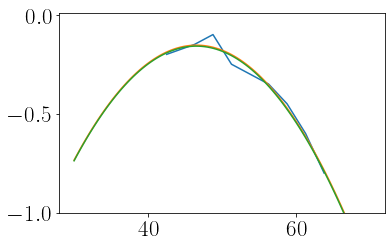

In [216]:
plt.plot(PthetaCenters, corrections)
x = np.linspace(30, 70, 101)
plt.plot(x, np.where(quadratic(res_lsq.x, x)< 0,quadratic(res_lsq.x, x), 0) )
plt.plot(x, -0.002129*x**2 + 0.198*x-4.762)
plt.ylim([-1, 0.01])

In [192]:
res_lsq = least_squares(lstsq_quadraticfit, [0, 0.25/10, -0.25], args=(PthetaCenters, corrections))

In [193]:
res_lsq.x

array([-2.12912585e-03,  1.98105187e-01, -4.76180867e+00])

In [265]:
parent_MC = "/Volumes/Extreme SSD/Feb2022/SimtoDat/v2.1/inb/dvcs/"
parent_MC_bkg1g = "/Volumes/Extreme SSD/Feb2022/SimtoDat/v2.1/inb/bkg_1g/"
parent_MC_bkg2g = "/Volumes/Extreme SSD/Feb2022/SimtoDat/v2.1/inb/bkg_2g/"
parent_exp = "/Volumes/Extreme SSD/Feb2022/SimtoDat/v2.1/inb/exp/"

dvcsSimInb = pd.read_pickle(parent_MC + "3987.pkl")
bkgSimInb = pd.read_pickle(parent_MC_bkg1g + "4076.pkl")
pi0SimInb = pd.read_pickle(parent_MC_bkg2g + "4076.pkl")
epgExpInb = pd.read_pickle(parent_exp + "dvcs.pkl")
pi0ExpInb = pd.read_pickle(parent_exp + "pi0.pkl")

epgExpInbCDFT = epgExpInb.loc[epgExpInb.config == 3]
pi0ExpInbCDFT = pi0ExpInb.loc[pi0ExpInb.config == 3]
dvcsSimInbCDFT = dvcsSimInb.loc[dvcsSimInb.config == 3]
bkgSimInbCDFT = bkgSimInb.loc[bkgSimInb.config == 3]
pi0SimInbCDFT = pi0SimInb.loc[pi0SimInb.config == 3]


In [ ]:
parent_MC = "/Volumes/Extreme SSD/Feb2022/SimtoDat/v2.1/outb/dvcs/"
parent_MC_bkg1g = "/Volumes/Extreme SSD/Feb2022/SimtoDat/v2.1/outb/bkg_1g/"
parent_MC_bkg2g = "/Volumes/Extreme SSD/Feb2022/SimtoDat/v2.1/outb/bkg_2g/"
parent_exp = "/Volumes/Extreme SSD/Feb2022/SimtoDat/v2.1/outb/exp/"

dvcsSimOutb = pd.read_pickle(parent_MC + "4240.pkl")
bkgSimOutb = pd.read_pickle(parent_MC_bkg1g + "4243.pkl")
pi0SimOutb = pd.read_pickle(parent_MC_bkg2g + "4243.pkl")
epgExpOutb = pd.read_pickle(parent_exp + "dvcs.pkl")
pi0ExpOutb = pd.read_pickle(parent_exp + "pi0.pkl")

epgExpOutbCDFT = epgExpOutb.loc[epgExpOutb.config == 3]
pi0ExpOutbCDFT = pi0ExpOutb.loc[pi0ExpOutb.config == 3]
dvcsSimOutbCDFT = dvcsSimOutb.loc[dvcsSimOutb.config == 3]
bkgSimOutbCDFT = bkgSimOutb.loc[bkgSimOutb.config == 3]
pi0SimOutbCDFT = pi0SimOutb.loc[pi0SimOutb.config == 3]

Pp


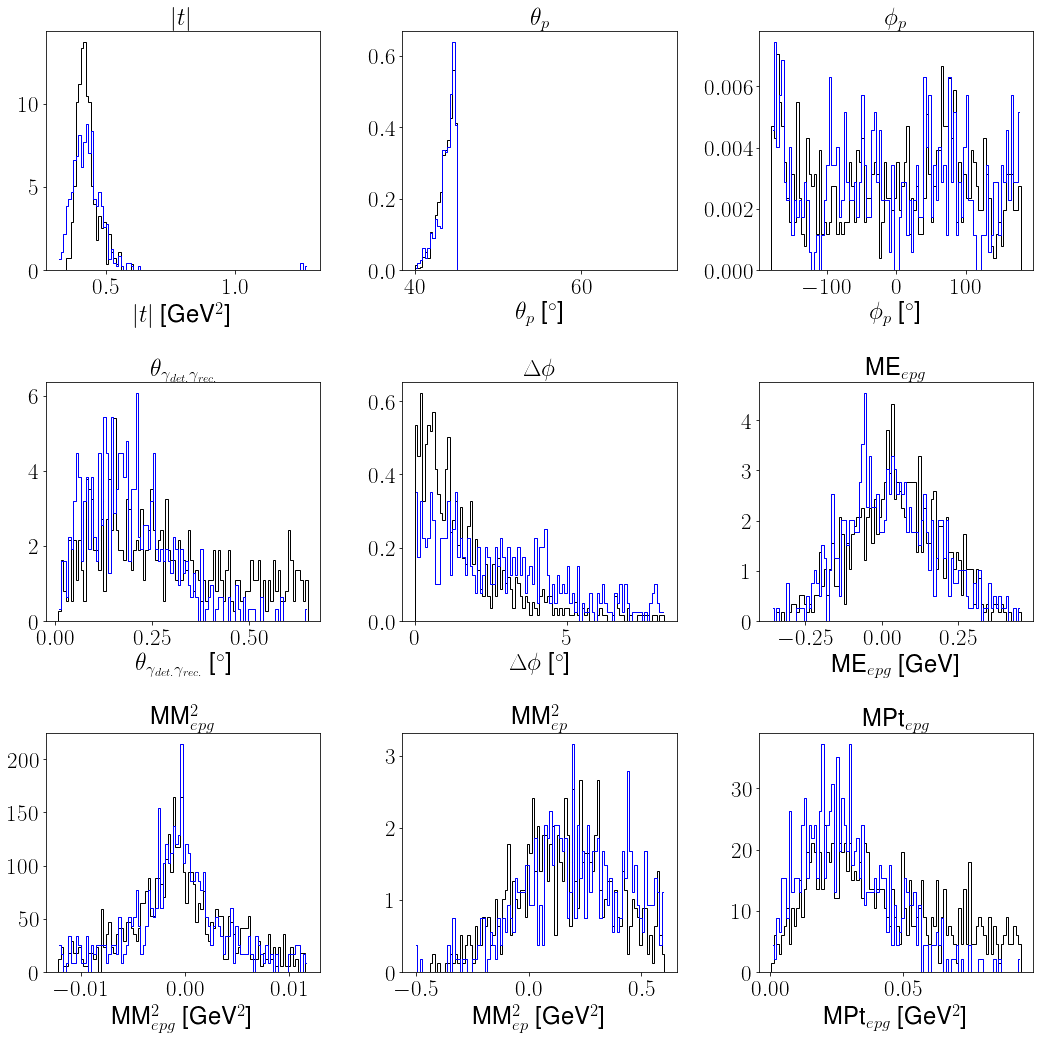

Pp


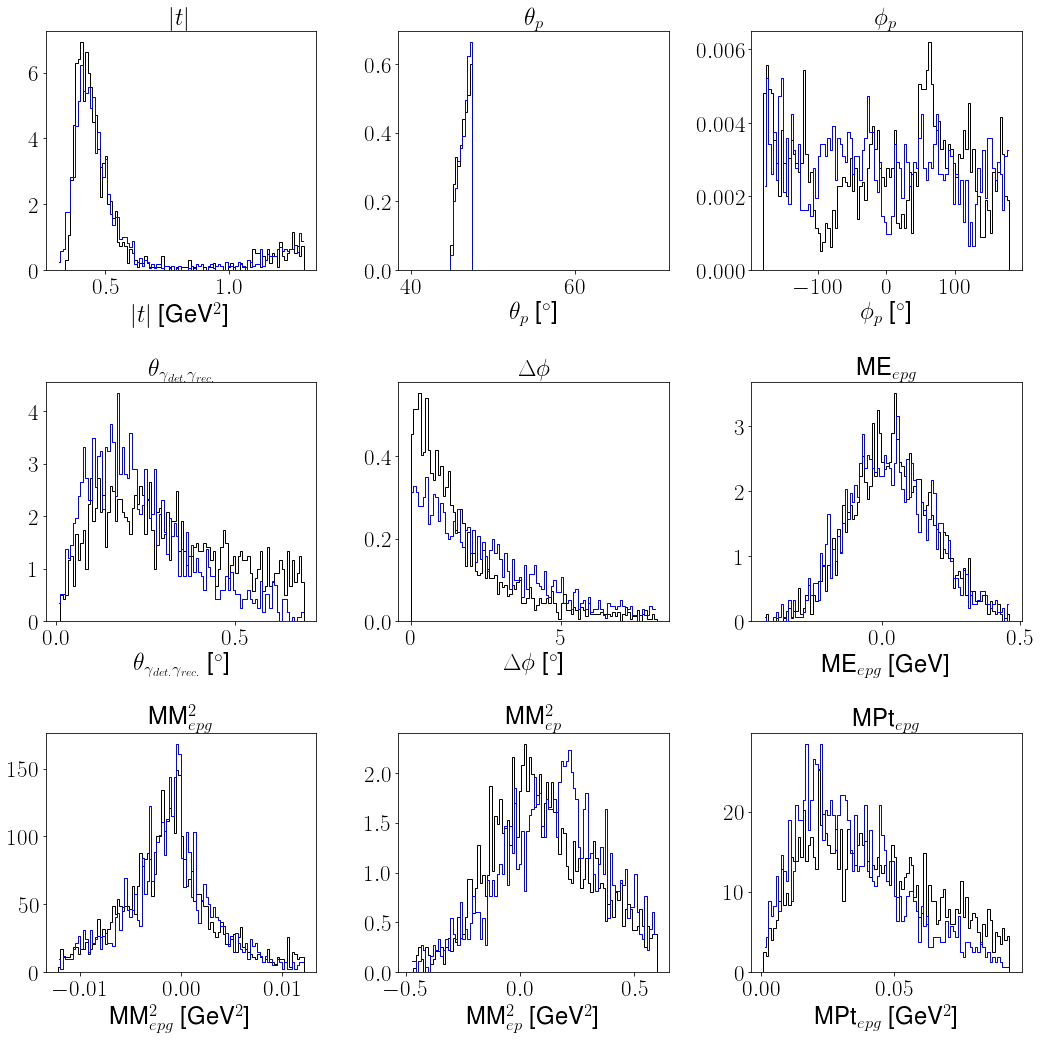

Pp


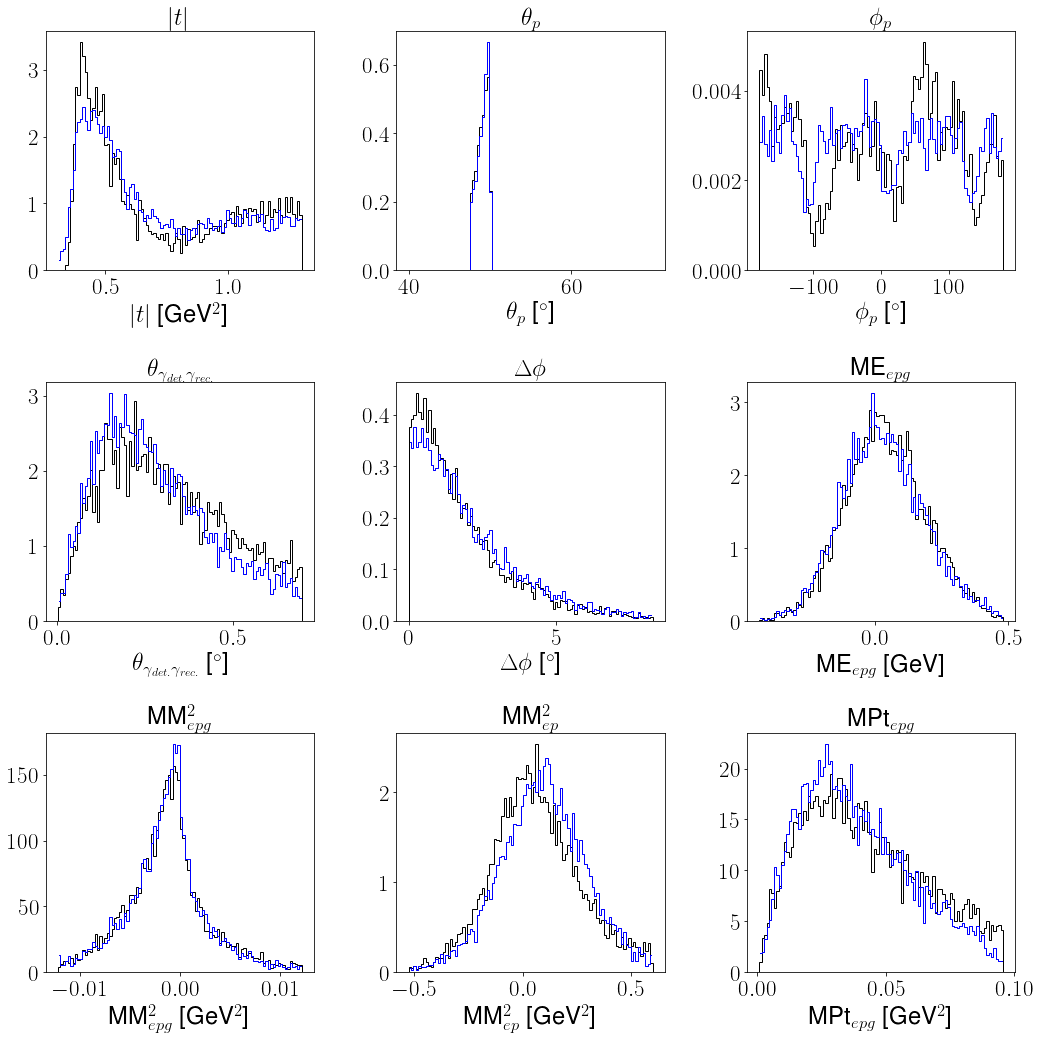

Pp


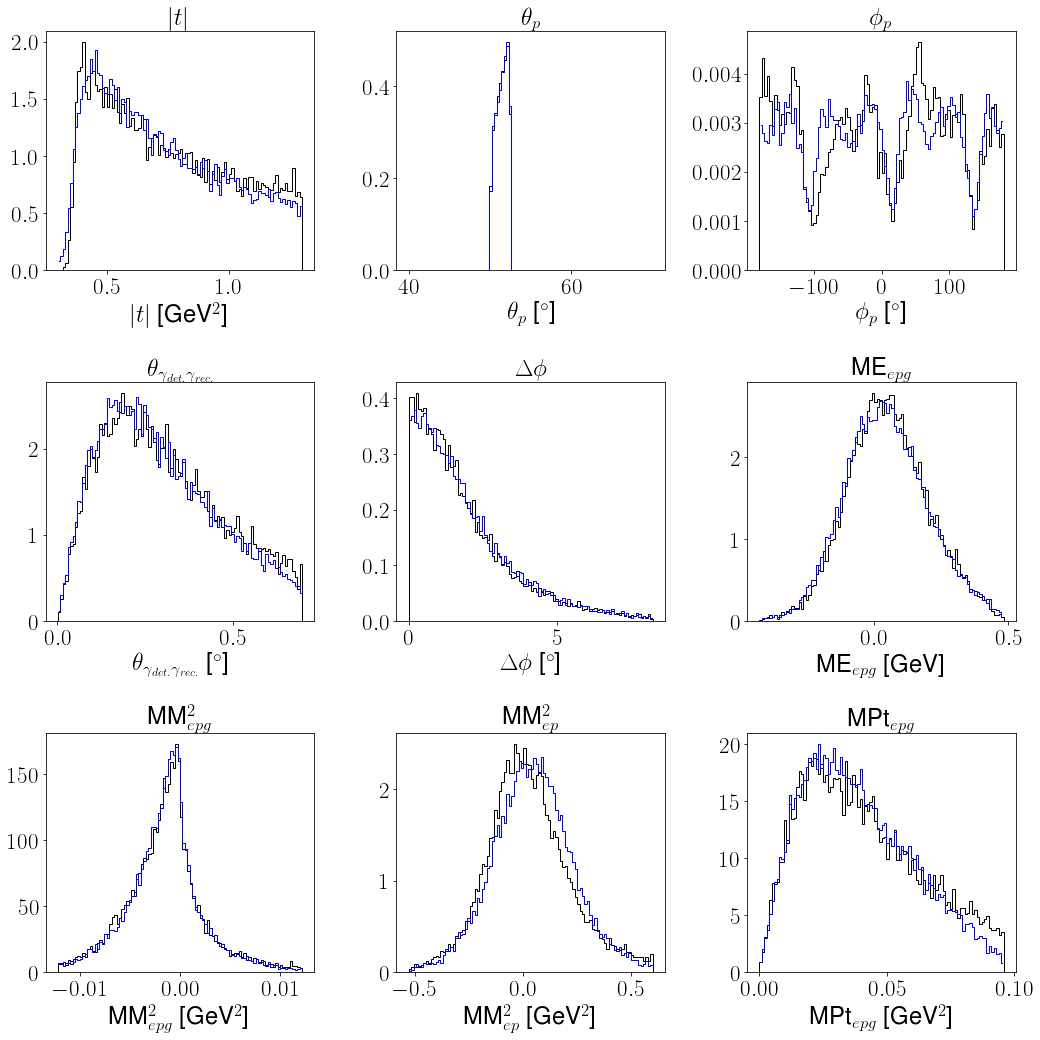

Pp


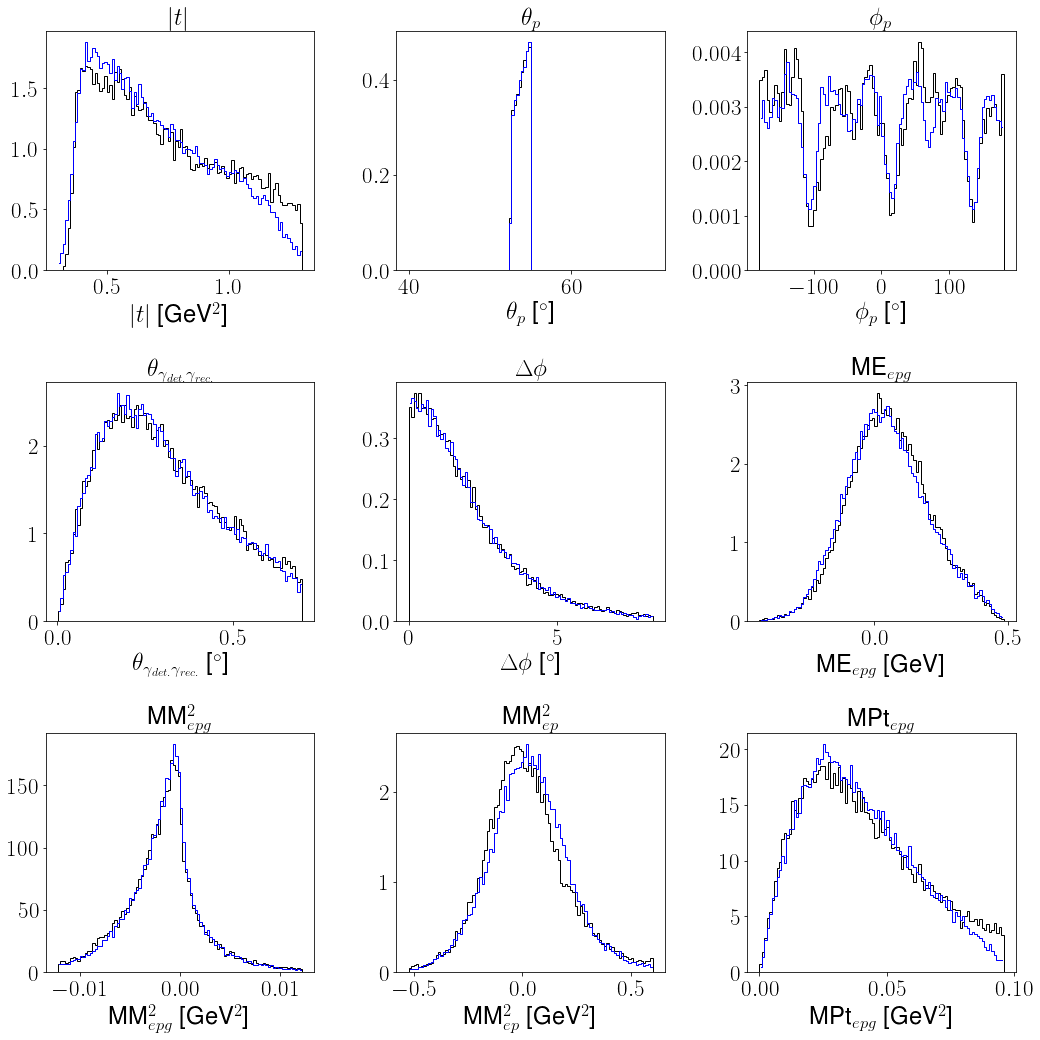

Pp


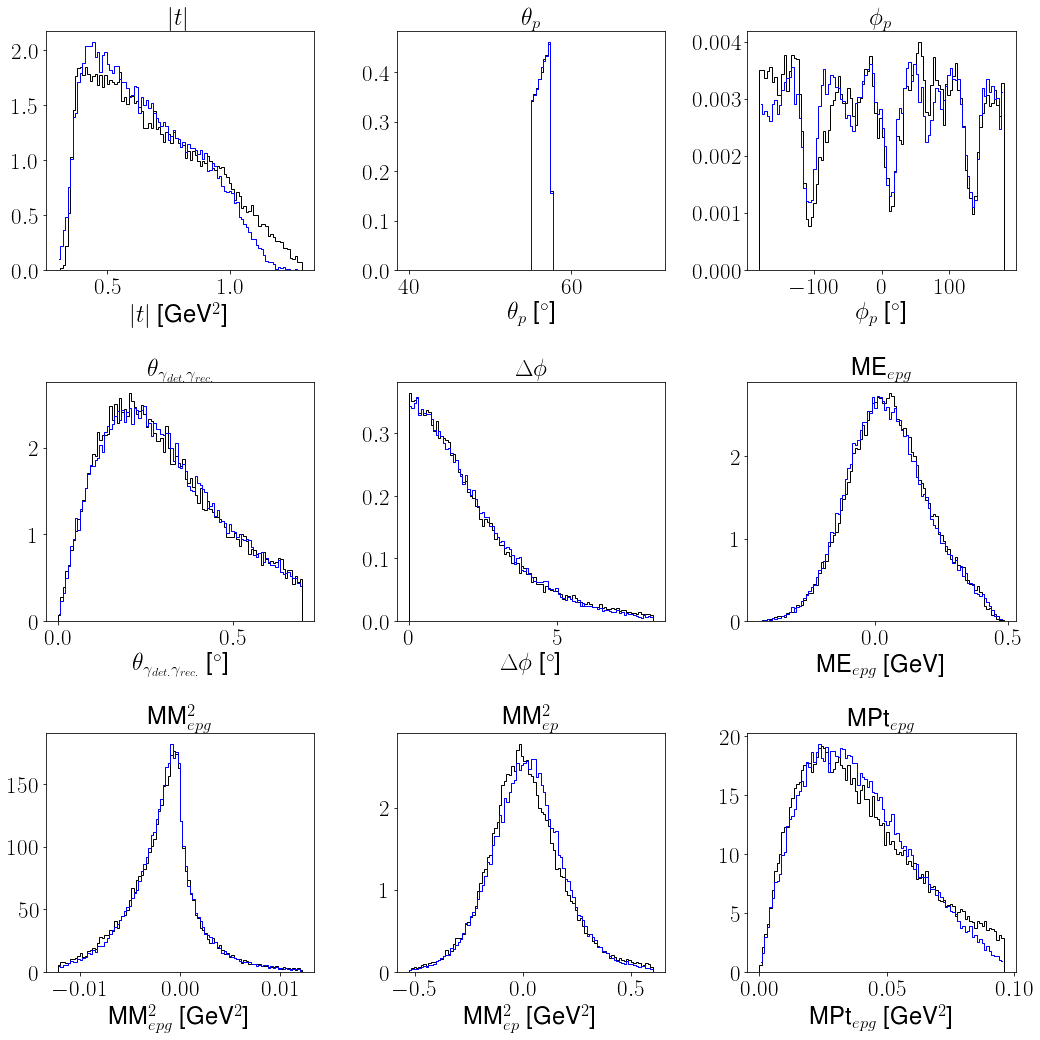

Pp


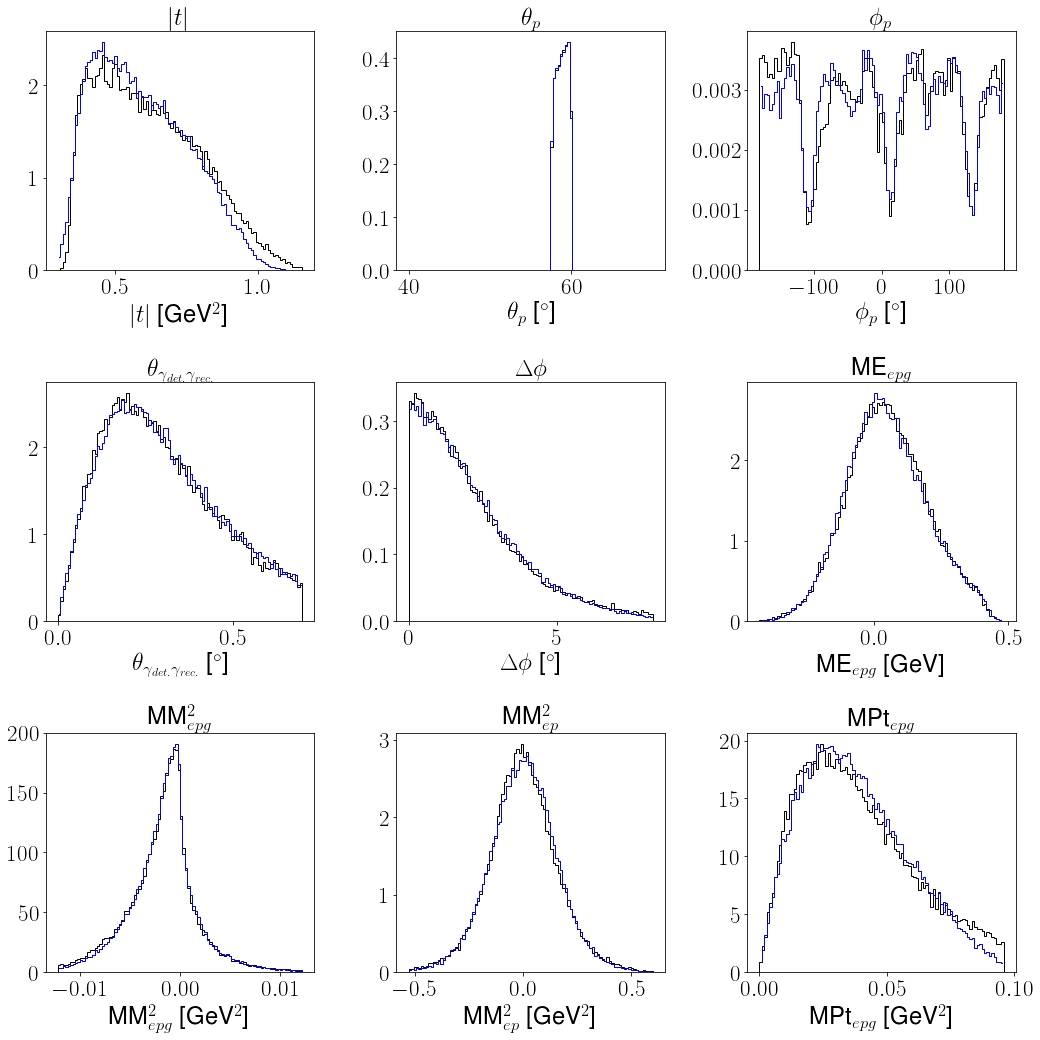

Pp


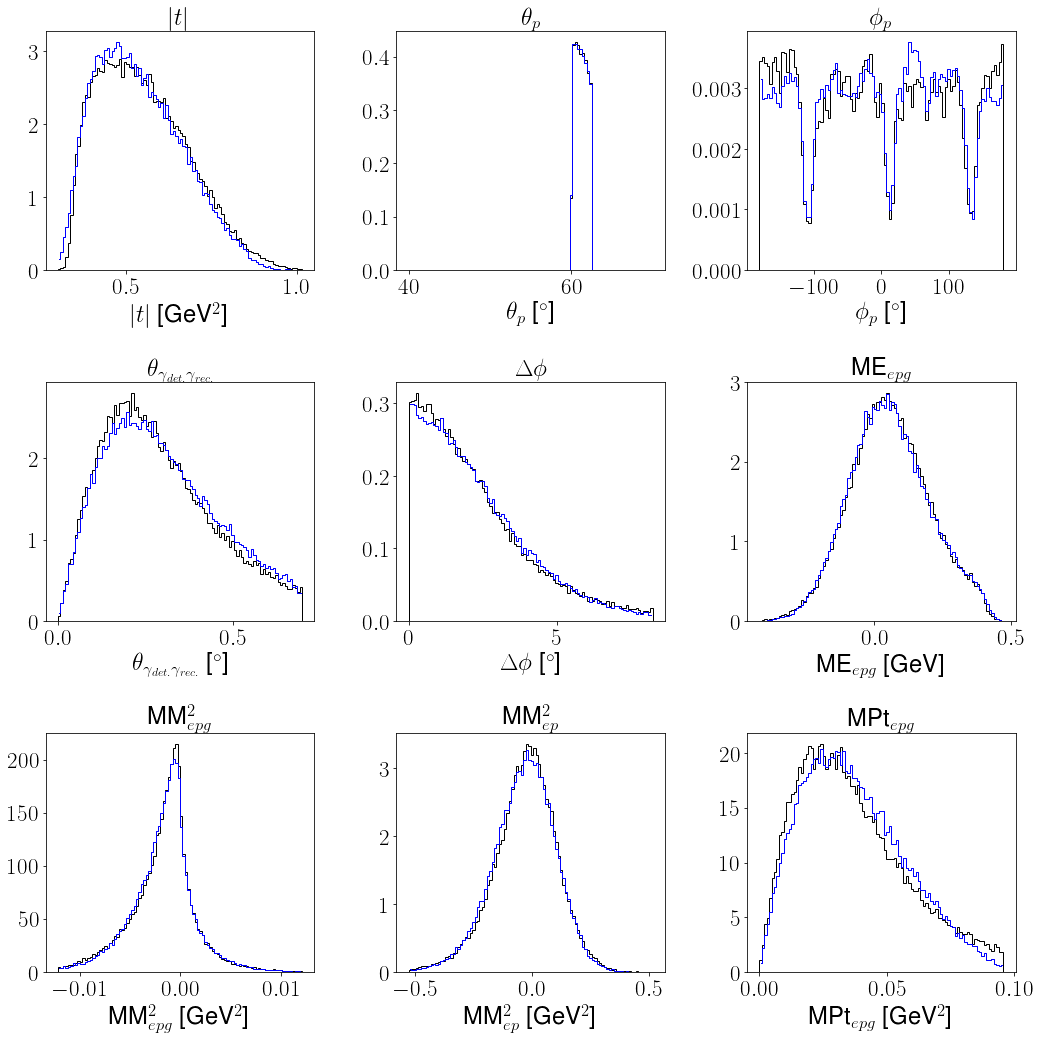

Pp


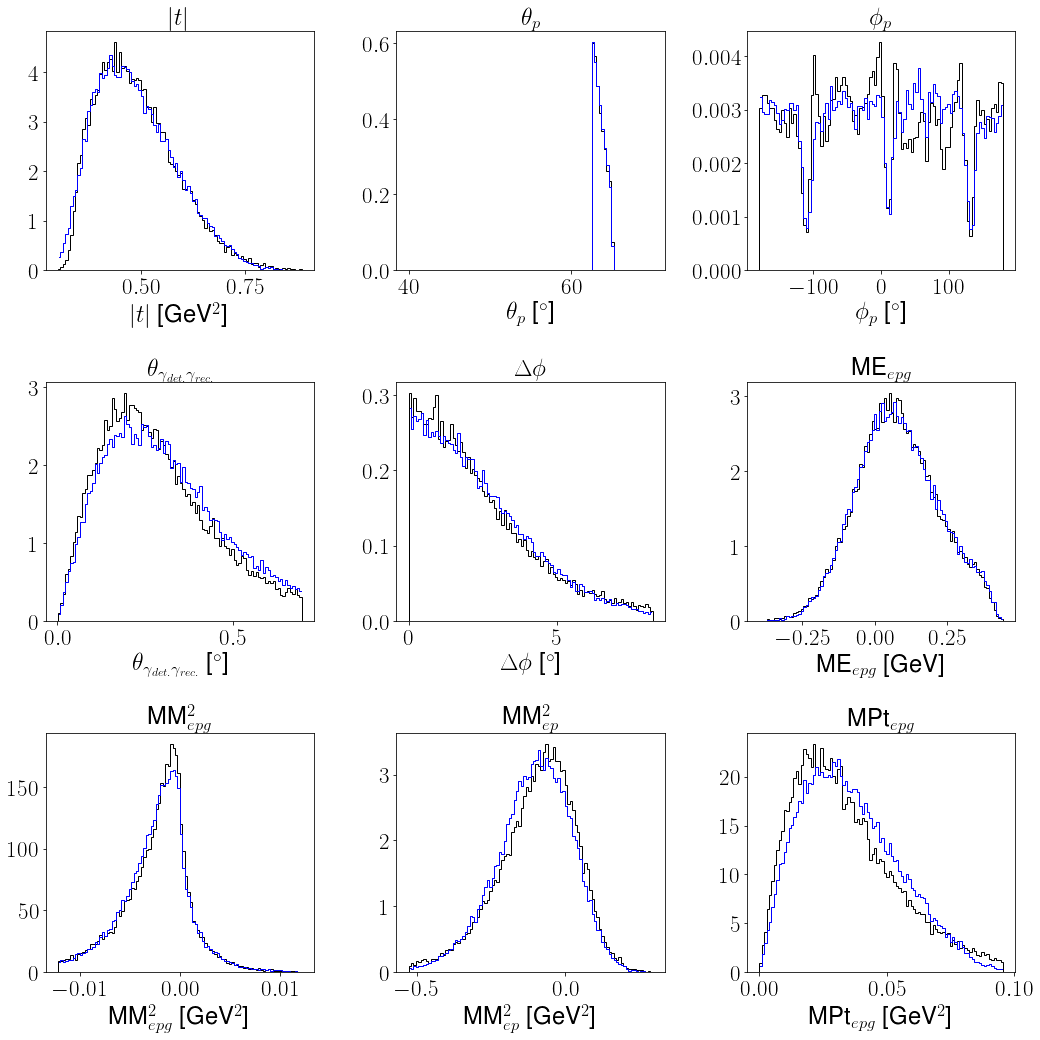

In [302]:
for i in range(9):
    PthetaMin = PthetaEdges[i]
    PthetaMax = PthetaEdges[i+1]
    varstoplot = ["Pp", "Ptheta", "Pphi",  "reconGam", "coplanarity", "ME_epg", "MM2_epg", "MM2_ep", "MPt"]
    title = [r"$|t|$", r"$\theta_{p}$", r"$\phi_{p}$", r"$\theta_{\gamma_{det.}\gamma_{rec.}}$", r"$\Delta\phi$" , "ME"+r"${}_{epg}$", "MM"+r"${}^{2}_{epg}$", "MM"+r"${}^{2}_{ep}$", "MPt"+r"${}_{epg}$"]
    unit = [GeV2, degree, degree, degree, degree, GeV, GeV2, GeV2, GeV2, GeVc]
    # binstarts = [PthetaMin, 0, -180, 0, 0, 0, -0.5, -0.01, 0.1, 0]
    # binends = [GeMax, 7, 180, 30, 0.8, .1, 1.2, 0.01, 1.7, 10]
    contInb = 0
    df3 = epgExpInbCDFT
    df1 = makeDVCS(smearingDVCS2(dvcsSimInbCDFT, 0.08, 0.6, 0))
    df2 = makeDVCS(bkgSimInbCDFT)
    fig, axs = plt.subplots(3, 3, figsize = (15,15))
    for yind in range(0, 3):
        for xind in range(0,3):
            ind = 3*yind + xind
            if ind == 0:
                print(varstoplot[ind])
                bins= np.linspace(0, 1.3, 101)
                simDist_dvcs, _ = np.histogram(df1.loc[(df1.Ptheta < PthetaMax) & (df1.Ptheta>PthetaMin), varstoplot[ind]], bins, density = True)
            if ind == 1:
                bins= np.linspace(40, 70, 101)
                simDist_dvcs, _ = np.histogram(df1.loc[(df1.Ptheta < PthetaMax) & (df1.Ptheta>PthetaMin), varstoplot[ind]], bins, density = True)
            else:
                simDist_dvcs, bins = np.histogram(df1.loc[(df1.Ptheta < PthetaMax) & (df1.Ptheta>PthetaMin), varstoplot[ind]], 100, density = True)
            simDist_dvpi0, _ = np.histogram(df2.loc[(df2.Ptheta < PthetaMax) & (df2.Ptheta>PthetaMin), varstoplot[ind]], bins, density = True)
            simDist = (1-contInb)*simDist_dvcs + contInb*simDist_dvpi0
            bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
            axs[yind, xind].step(bincenters, simDist, where='mid',color='b', linewidth=1)
            axs[yind, xind].hist(df3.loc[(df3.Ptheta < PthetaMax) & (df3.Ptheta>PthetaMin),varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', density=True, linewidth=1)
            axs[yind, xind].set_title(title[ind])
            # axs[yind, xind].set_xlim([start, end])
            if (unit[ind]):
                axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
            else:
                axs[yind, xind].set_xlabel(title[ind])
    plt.tight_layout()
    # plt.savefig(outDir+"InbCDFT{}_{:.3f}_{:.3f}_{:.3f}.pdf".format(i, sigma1, sigma2, sigma3))
    # plt.savefig(outDir+"InbCDFT{}_{:.3f}_{:.3f}.pdf".format(i, sigma1, sigma2))
    # plt.savefig(outDir+"InbCDFT{}_{:.3f}.pdf".format(i, sigma2))
    plt.show()



In [290]:
len(PthetaCenters)

9

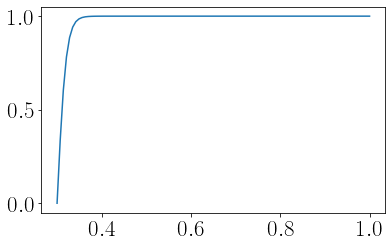

In [303]:
x = np.linspace(0.3, 1, 101)
plt.plot(x, 2*(1/(1+np.exp(-(x-0.3)/0.01))-0.5))
plt.show()

In [352]:
GthetaEdges = [5, 7.5, 10, 12.5, 15, 17.5, 20, 22.5, 25]
GthetaCenters = (np.array(GthetaEdges[:-1]) + np.array(GthetaEdges[1:]))/2
print(GthetaCenters)

[ 6.25  8.75 11.25 13.75 16.25 18.75 21.25 23.75]


In [344]:
smearing = [0.04, 0.04, 0.04, 0.04, 0.04, 0.0325, 0.025, 0.025]

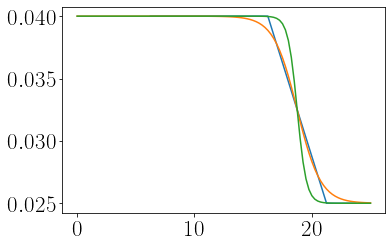

In [362]:
plt.plot(GthetaCenters, smearing)
x = np.linspace(0, 25 ,101)
plt.plot(x, sigmoidfit5([1], x))
plt.plot(x, sigmoidfit5(res_lsq.x, x))
# plt.axvline(17.5+2.5/2)

In [353]:
def sigmoidfit5(args, x):
#     df = args
    a = args
#     print(df)
    return 0.025 + 0.015/(1+np.exp(a*(x-18.75)))

In [354]:
def lstsq_sigmoidfit5(args, x, y):
#     print(args, x, y)
    return sigmoidfit5(args, x) - y

In [355]:
res_lsq = least_squares(lstsq_sigmoidfit5, [0.5], args=(GthetaCenters, smearing))

In [467]:
parent_MC = "/Volumes/Extreme SSD/Feb2022/SimtoDat/v2.2/inb/dvcs/"
parent_MC_bkg1g = "/Volumes/Extreme SSD/Feb2022/SimtoDat/v2.2/inb/bkg_1g/"
parent_MC_bkg2g = "/Volumes/Extreme SSD/Feb2022/SimtoDat/v2.2/inb/bkg_2g/"
parent_exp = "/Volumes/Extreme SSD/Feb2022/SimtoDat/v2.2/inb/exp/"

dvcsSimInb = pd.read_pickle(parent_MC + "3987.pkl")
bkgSimInb = pd.read_pickle(parent_MC_bkg1g + "4076.pkl")
pi0SimInb = pd.read_pickle(parent_MC_bkg2g + "4076.pkl")
epgExpInb = pd.read_pickle(parent_exp + "dvcs.pkl")
pi0ExpInb = pd.read_pickle(parent_exp + "pi0.pkl")

epgExpInbCDFT = epgExpInb.loc[epgExpInb.config == 3]
pi0ExpInbCDFT = pi0ExpInb.loc[pi0ExpInb.config == 3]
dvcsSimInbCDFT = dvcsSimInb.loc[dvcsSimInb.config == 3]
bkgSimInbCDFT = bkgSimInb.loc[bkgSimInb.config == 3]
pi0SimInbCDFT = pi0SimInb.loc[pi0SimInb.config == 3]

epgExpInbCD = epgExpInb.loc[epgExpInb.config == 2]
pi0ExpInbCD = pi0ExpInb.loc[pi0ExpInb.config == 2]
dvcsSimInbCD =  dvcsSimInb.loc[dvcsSimInb.config == 2]
bkgSimInbCD = bkgSimInb.loc[bkgSimInb.config == 2]
pi0SimInbCD = pi0SimInb.loc[pi0SimInb.config == 2]

FileNotFoundError: [Errno 2] No such file or directory: '/Volumes/Extreme SSD/Feb2022/SimtoDat/v2.2/inb/dvcs/3987.pkl'

In [169]:
parent_MC = "/Volumes/Extreme SSD/Feb2022/SimtoDat/v2.2/outb/dvcs/"
parent_MC_bkg1g = "/Volumes/Extreme SSD/Feb2022/SimtoDat/v2.2/outb/bkg_1g/"
parent_MC_bkg2g = "/Volumes/Extreme SSD/Feb2022/SimtoDat/v2.2/outb/bkg_2g/"
parent_exp = "/Volumes/Extreme SSD/Feb2022/SimtoDat/v2.2/outb/exp/"

dvcsSimOutb = pd.read_pickle(parent_MC + "4240.pkl")
bkgSimOutb = pd.read_pickle(parent_MC_bkg1g + "4243.pkl")
pi0SimOutb = pd.read_pickle(parent_MC_bkg2g + "4243.pkl")
epgExpOutb = pd.read_pickle(parent_exp + "dvcs.pkl")
pi0ExpOutb = pd.read_pickle(parent_exp + "pi0.pkl")

epgExpOutbCDFT = epgExpOutb.loc[epgExpOutb.config == 3]
pi0ExpOutbCDFT = pi0ExpOutb.loc[pi0ExpOutb.config == 3]
dvcsSimOutbCDFT = dvcsSimOutb.loc[dvcsSimOutb.config == 3]
bkgSimOutbCDFT = bkgSimOutb.loc[bkgSimOutb.config == 3]
pi0SimOutbCDFT = pi0SimOutb.loc[pi0SimOutb.config == 3]

epgExpOutbCD = epgExpOutb.loc[epgExpOutb.config == 2]
pi0ExpOutbCD = pi0ExpOutb.loc[pi0ExpOutb.config == 2]
dvcsSimOutbCD =  dvcsSimOutb.loc[dvcsSimOutb.config == 2]
bkgSimOutbCD = bkgSimOutb.loc[bkgSimOutb.config == 2]
pi0SimOutbCD = pi0SimOutb.loc[pi0SimOutb.config == 2]

Pp


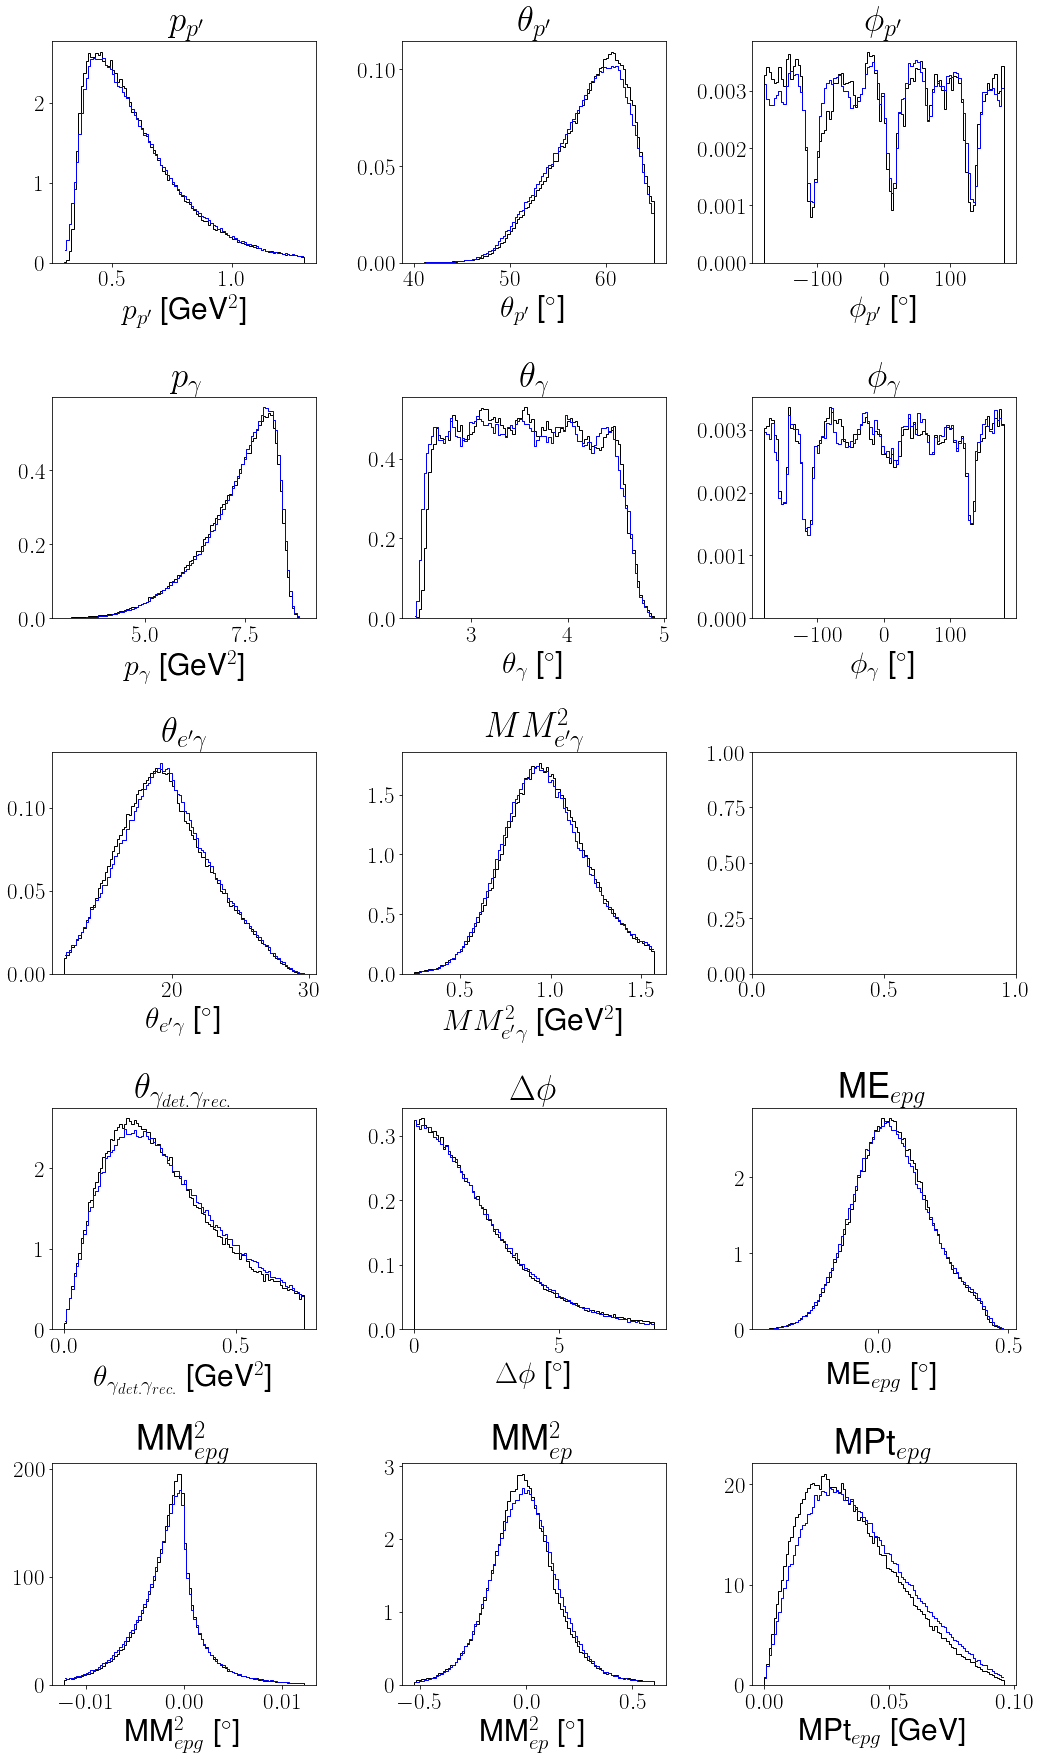

In [48]:
# for i in range(9):
PthetaMin = 0#PthetaEdges[i]
PthetaMax = 90#PthetaEdges[i+1]
varstoplot = ["Pp", "Ptheta", "Pphi","Gp", "Gtheta", "Gphi",  "coneAngle", "MM2_eg", "", "reconGam", "coplanarity", "ME_epg", "MM2_epg", "MM2_ep", "MPt"]
title = [r"$p_{p'}$", r"$\theta_{p'}$", r"$\phi_{p'}$", r"$p_{\gamma}$", r"$\theta_{\gamma}$", r"$\phi_{\gamma}$", r"$\theta_{e'\gamma}$", r"$MM^2_{e'\gamma}$", "", r"$\theta_{\gamma_{det.}\gamma_{rec.}}$", r"$\Delta\phi$" , "ME"+r"${}_{epg}$", "MM"+r"${}^{2}_{epg}$", "MM"+r"${}^{2}_{ep}$", "MPt"+r"${}_{epg}$"]
unit = [GeV2, degree, degree, GeV2, degree, degree, degree, GeV2, "", GeV2, degree, degree, degree, degree, GeV, GeV2, GeV2, GeV2, GeVc]
# binstarts = [PthetaMin, 0, -180, 0, 0, 0, -0.5, -0.01, 0.1, 0]
# binends = [GeMax, 7, 180, 30, 0.8, .1, 1.2, 0.01, 1.7, 10]
df3 = makeDVCS(epgExpInbCDFT)
df1 = makeDVCS(dvcsSimInbCDFT)
df2 = bkgSimInbCDFT
df4 = pi0ExpInbCDFT
df5 = pi0SimInbCDFT
contInb = len(df4)/len(df5) * len(df2)/len(df3)
fig, axs = plt.subplots(5, 3, figsize = (15,25))
for yind in range(0, 5):
    for xind in range(0, 3):
        ind = 3*yind + xind
        if varstoplot[ind]:
            pass
        else:
            continue
        if ind == 0:
            print(varstoplot[ind])
            bins= np.linspace(0, 1.3, 101)
            simDist_dvcs, _ = np.histogram(df1.loc[(df1.Ptheta < PthetaMax) & (df1.Ptheta>PthetaMin), varstoplot[ind]], bins, density = True)
        if ind == 1:
            bins= np.linspace(40, 65, 101)
            simDist_dvcs, _ = np.histogram(df1.loc[(df1.Ptheta < PthetaMax) & (df1.Ptheta>PthetaMin), varstoplot[ind]], bins, density = True)
        else:
            simDist_dvcs, bins = np.histogram(df1.loc[(df1.Ptheta < PthetaMax) & (df1.Ptheta>PthetaMin), varstoplot[ind]], 100, density = True)
        simDist_dvpi0, _ = np.histogram(df2.loc[(df2.Ptheta < PthetaMax) & (df2.Ptheta>PthetaMin), varstoplot[ind]], bins, density = True)
        simDist = (1-contInb)*simDist_dvcs + contInb*simDist_dvpi0
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        axs[yind, xind].step(bincenters, simDist, where='mid',color='b', linewidth=1)
        axs[yind, xind].hist(df3.loc[(df3.Ptheta < PthetaMax) & (df3.Ptheta>PthetaMin),varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', density=True, linewidth=1)
        axs[yind, xind].set_title(title[ind])
        # axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
plt.tight_layout()
# plt.savefig(outDir+"InbCDFT{}_{:.3f}_{:.3f}_{:.3f}.pdf".format(i, sigma1, sigma2, sigma3))
# plt.savefig(outDir+"InbCDFT{}_{:.3f}_{:.3f}.pdf".format(i, sigma1, sigma2))
# plt.savefig(outDir+"InbCDFT{}_{:.3f}.pdf".format(i, sigma2))
plt.show()



Pp


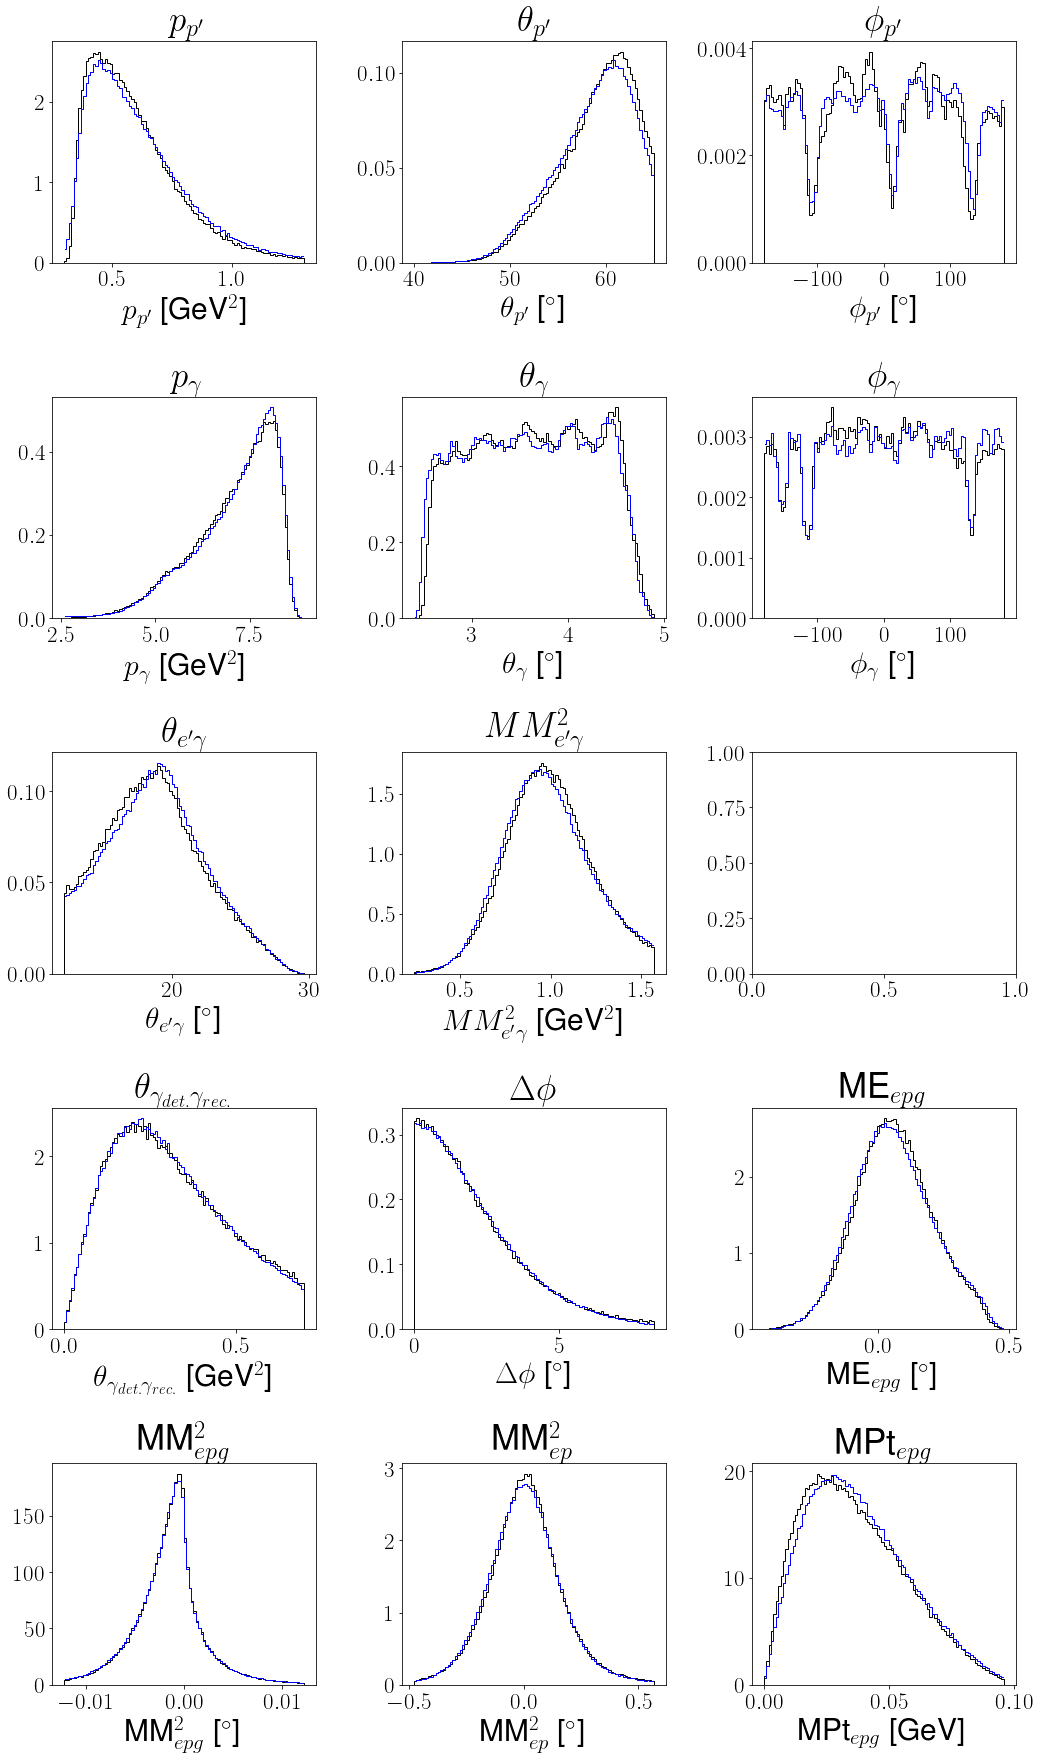

In [52]:
# for i in range(9):
PthetaMin = 0#PthetaEdges[i]
PthetaMax = 90#PthetaEdges[i+1]
varstoplot = ["Pp", "Ptheta", "Pphi","Gp", "Gtheta", "Gphi",  "coneAngle", "MM2_eg", "", "reconGam", "coplanarity", "ME_epg", "MM2_epg", "MM2_ep", "MPt"]
title = [r"$p_{p'}$", r"$\theta_{p'}$", r"$\phi_{p'}$", r"$p_{\gamma}$", r"$\theta_{\gamma}$", r"$\phi_{\gamma}$", r"$\theta_{e'\gamma}$", r"$MM^2_{e'\gamma}$", "", r"$\theta_{\gamma_{det.}\gamma_{rec.}}$", r"$\Delta\phi$" , "ME"+r"${}_{epg}$", "MM"+r"${}^{2}_{epg}$", "MM"+r"${}^{2}_{ep}$", "MPt"+r"${}_{epg}$"]
unit = [GeV2, degree, degree, GeV2, degree, degree, degree, GeV2, "", GeV2, degree, degree, degree, degree, GeV, GeV2, GeV2, GeV2, GeVc]
# binstarts = [PthetaMin, 0, -180, 0, 0, 0, -0.5, -0.01, 0.1, 0]
# binends = [GeMax, 7, 180, 30, 0.8, .1, 1.2, 0.01, 1.7, 10]
df3 = makeDVCS(epgExpOutbCDFT)
df1 = makeDVCS(dvcsSimOutbCDFT)
df2 = bkgSimOutbCDFT
df4 = pi0ExpOutbCDFT
df5 = pi0SimOutbCDFT
contOutb = len(df4)/len(df5) * len(df2)/len(df3)
fig, axs = plt.subplots(5, 3, figsize = (15,25))
for yind in range(0, 5):
    for xind in range(0, 3):
        ind = 3*yind + xind
        if varstoplot[ind]:
            pass
        else:
            continue
        if ind == 0:
            print(varstoplot[ind])
            bins= np.linspace(0, 1.3, 101)
            simDist_dvcs, _ = np.histogram(df1.loc[(df1.Ptheta < PthetaMax) & (df1.Ptheta>PthetaMin), varstoplot[ind]], bins, density = True)
        if ind == 1:
            bins= np.linspace(40, 65, 101)
            simDist_dvcs, _ = np.histogram(df1.loc[(df1.Ptheta < PthetaMax) & (df1.Ptheta>PthetaMin), varstoplot[ind]], bins, density = True)
        else:
            simDist_dvcs, bins = np.histogram(df1.loc[(df1.Ptheta < PthetaMax) & (df1.Ptheta>PthetaMin), varstoplot[ind]], 100, density = True)
        simDist_dvpi0, _ = np.histogram(df2.loc[(df2.Ptheta < PthetaMax) & (df2.Ptheta>PthetaMin), varstoplot[ind]], bins, density = True)
        simDist = (1-contOutb)*simDist_dvcs + contOutb*simDist_dvpi0
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        axs[yind, xind].step(bincenters, simDist, where='mid',color='b', linewidth=1)
        axs[yind, xind].hist(df3.loc[(df3.Ptheta < PthetaMax) & (df3.Ptheta>PthetaMin),varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', density=True, linewidth=1)
        axs[yind, xind].set_title(title[ind])
        # axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
plt.tight_layout()
# plt.savefig(outDir+"OutbCDFT{}_{:.3f}_{:.3f}_{:.3f}.pdf".format(i, sigma1, sigma2, sigma3))
# plt.savefig(outDir+"OutbCDFT{}_{:.3f}_{:.3f}.pdf".format(i, sigma1, sigma2))
# plt.savefig(outDir+"OutbCDFT{}_{:.3f}.pdf".format(i, sigma2))
plt.show()



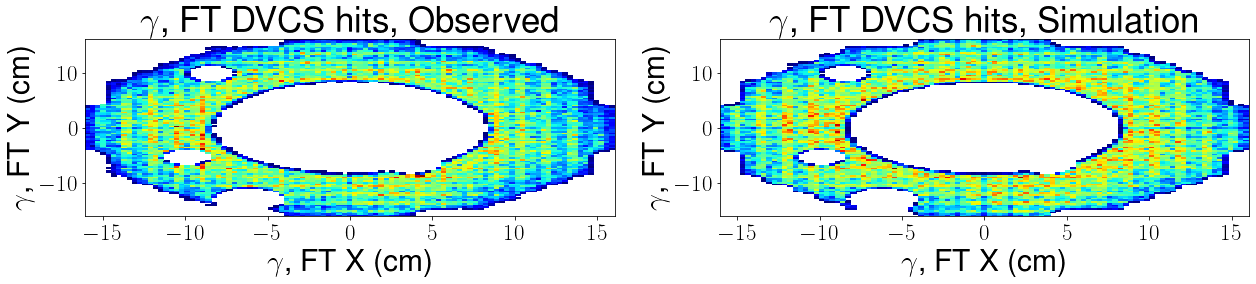

In [44]:
fig, axs = plt.subplots(1, 2, figsize = (18,4.5))
plt.rcParams["axes.titlesize"] = 35
plt.rcParams["axes.labelsize"] = 30
axs[0].hist2d(epgExpInb.loc[epgExpInb.Gsector>7].GcX, epgExpInb.loc[epgExpInb.Gsector>7].GcY, bins = 101, cmin =1, cmap = copy(plt.cm.get_cmap("jet")))
axs[0].set_xlabel(r"$\gamma$"+", FT X (cm)")
axs[0].set_ylabel(r"$\gamma$"+", FT Y (cm)")
axs[0].set_title(r"$\gamma$"+", FT DVCS hits, Observed")

axs[1].hist2d(dvcsSimInb.loc[dvcsSimInb.Gsector>7].GcX, dvcsSimInb.loc[dvcsSimInb.Gsector>7].GcY, bins = 101, cmin =1, cmap = copy(plt.cm.get_cmap("jet")))
axs[1].set_xlabel(r"$\gamma$"+", FT X (cm)")
axs[1].set_ylabel(r"$\gamma$"+", FT Y (cm)")
axs[1].set_title(r"$\gamma$"+", FT DVCS hits, Simulation")
plt.show()
plt.show()
plt.show()

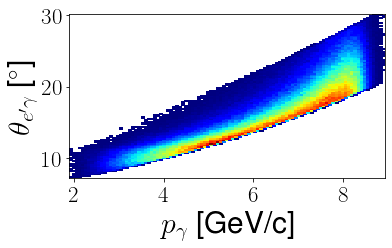

In [50]:
plt.hist2d(dvcsSimOutbCDFT.Gp, dvcsSimOutbCDFT.coneAngle, bins = 101, cmap = cmap, cmin =1)
# plt.plot(GpArray, coneAngleMinArray, color = 'k')
# plt.plot(GpArray, coneAngleMaxArray, color = 'k')
# x = np.linspace(0, 10, 101)
# plt.plot(x, params_1[0]*x**2 + params_1[1]*x + params_1[2])
# plt.plot(x, params_2[0]*x**2 + params_2[1]*x + params_2[2])
plt.xlabel(r"$p_{\gamma}$" + " ["+GeVc+"]")
plt.ylabel(r"$\theta_{e'\gamma}$" + " ["+degree+"]")
plt.show()

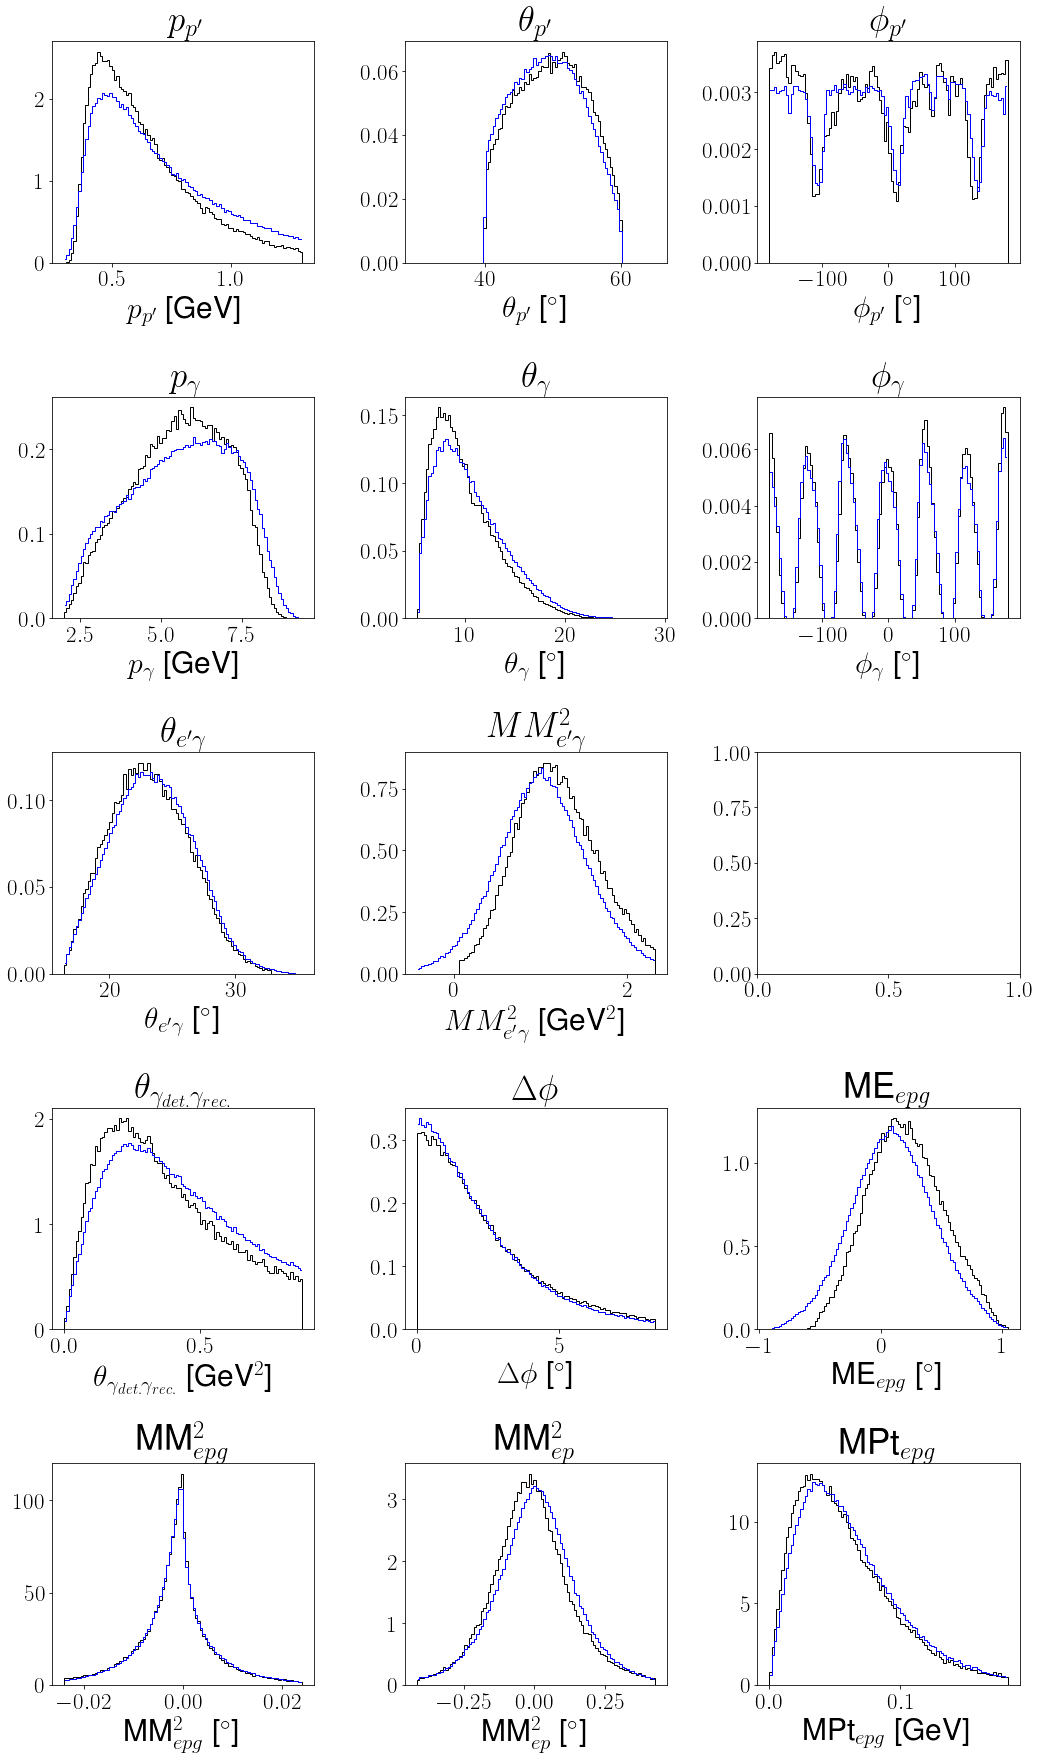

In [88]:
# for i in range(9):
PthetaMin = 40#PthetaEdges[i]
PthetaMax = 60#PthetaEdges[i+1]
varstoplot = ["Pp", "Ptheta", "Pphi","Gp", "Gtheta", "Gphi",  "coneAngle", "MM2_eg", "", "reconGam", "coplanarity", "ME_epg", "MM2_epg", "MM2_ep", "MPt"]
title = [r"$p_{p'}$", r"$\theta_{p'}$", r"$\phi_{p'}$", r"$p_{\gamma}$", r"$\theta_{\gamma}$", r"$\phi_{\gamma}$", r"$\theta_{e'\gamma}$", r"$MM^2_{e'\gamma}$", "", r"$\theta_{\gamma_{det.}\gamma_{rec.}}$", r"$\Delta\phi$" , "ME"+r"${}_{epg}$", "MM"+r"${}^{2}_{epg}$", "MM"+r"${}^{2}_{ep}$", "MPt"+r"${}_{epg}$"]
unit = [GeV, degree, degree, GeV, degree, degree, degree, GeV2, "", GeV2, degree, degree, degree, degree, GeV, GeV2, GeV2, GeV2, GeVc]
# binstarts = [PthetaMin, 0, -180, 0, 0, 0, -0.5, -0.01, 0.1, 0]
# binends = [GeMax, 7, 180, 30, 0.8, .1, 1.2, 0.01, 1.7, 10]
df3 = makeDVCS(epgExpInbCD)
df1 = makeDVCS(dvcsSimInbCD)
df2 = makeDVCS(bkgSimInbCD)
df4 = pi0ExpInbCD
df5 = pi0SimInbCD
contInb = len(df4)/len(df5) * len(df2)/len(df3)
fig, axs = plt.subplots(5, 3, figsize = (15,25))
for yind in range(0, 5):
    for xind in range(0, 3):
        ind = 3*yind + xind
        if varstoplot[ind]:
            pass
        else:
            continue
        if ind == 0:
            bins= np.linspace(0, 0.8, 101)
            simDist_dvcs, _ = np.histogram(df1.loc[(df1.Ptheta < PthetaMax) & (df1.Ptheta>PthetaMin), varstoplot[ind]], bins, density = True)
        if ind == 1:
            bins= np.linspace(30, 65, 101)
            simDist_dvcs, _ = np.histogram(df1.loc[(df1.Ptheta < PthetaMax) & (df1.Ptheta>PthetaMin), varstoplot[ind]], bins, density = True)
        else:
            simDist_dvcs, bins = np.histogram(df1.loc[(df1.Ptheta < PthetaMax) & (df1.Ptheta>PthetaMin), varstoplot[ind]], 100, density = True)
        simDist_dvpi0, _ = np.histogram(df2.loc[(df2.Ptheta < PthetaMax) & (df2.Ptheta>PthetaMin), varstoplot[ind]], bins, density = True)
        simDist = (1-contInb)*simDist_dvcs + contInb*simDist_dvpi0
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        axs[yind, xind].step(bincenters, simDist, where='mid',color='b', linewidth=1)
        axs[yind, xind].hist(df3.loc[(df3.Ptheta < PthetaMax) & (df3.Ptheta>PthetaMin),varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', density=True, linewidth=1)
        axs[yind, xind].set_title(title[ind])
        # axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
plt.tight_layout()
# plt.savefig(outDir+"InbCD{}_{:.3f}_{:.3f}_{:.3f}.pdf".format(i, sigma1, sigma2, sigma3))
# plt.savefig(outDir+"InbCD{}_{:.3f}_{:.3f}.pdf".format(i, sigma1, sigma2))
# plt.savefig(outDir+"InbCD{}_{:.3f}.pdf".format(i, sigma2))
plt.show()

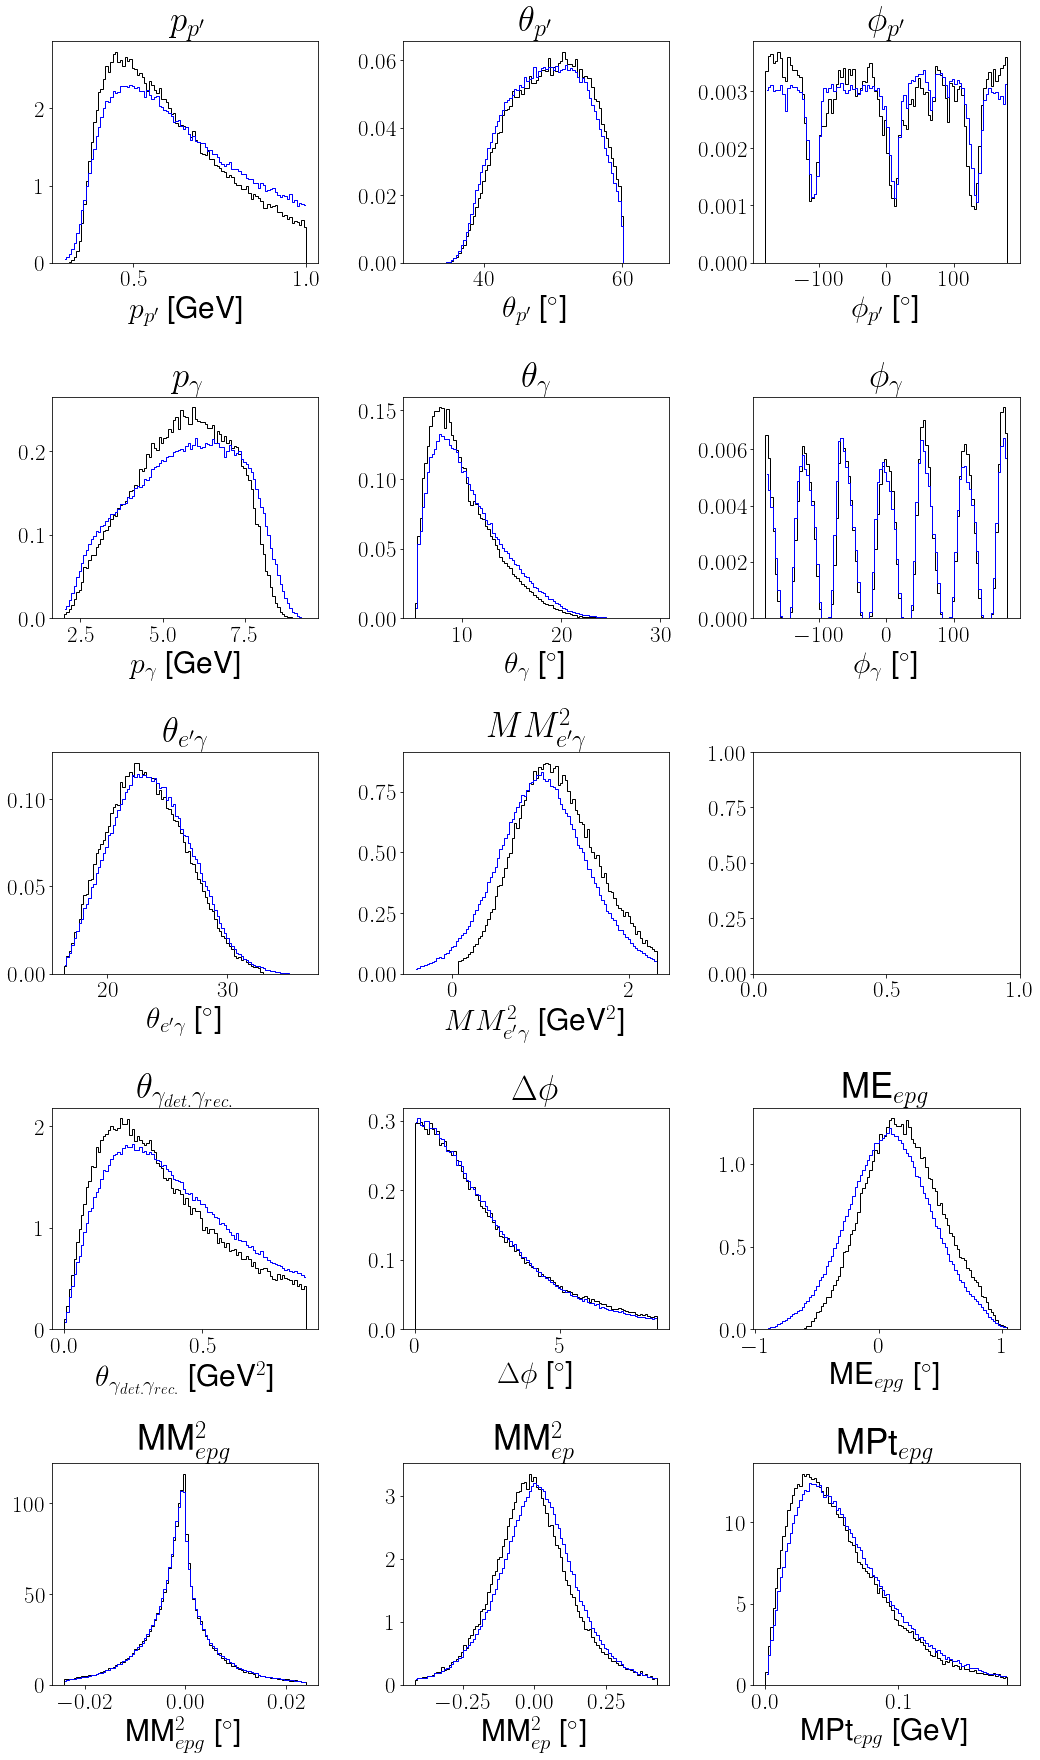

In [90]:
# for i in range(9):
PpMin = 0.3#PthetaEdges[i]
PpMax = 1#PthetaEdges[i+1]
varstoplot = ["Pp", "Ptheta", "Pphi","Gp", "Gtheta", "Gphi",  "coneAngle", "MM2_eg", "", "reconGam", "coplanarity", "ME_epg", "MM2_epg", "MM2_ep", "MPt"]
title = [r"$p_{p'}$", r"$\theta_{p'}$", r"$\phi_{p'}$", r"$p_{\gamma}$", r"$\theta_{\gamma}$", r"$\phi_{\gamma}$", r"$\theta_{e'\gamma}$", r"$MM^2_{e'\gamma}$", "", r"$\theta_{\gamma_{det.}\gamma_{rec.}}$", r"$\Delta\phi$" , "ME"+r"${}_{epg}$", "MM"+r"${}^{2}_{epg}$", "MM"+r"${}^{2}_{ep}$", "MPt"+r"${}_{epg}$"]
unit = [GeV, degree, degree, GeV, degree, degree, degree, GeV2, "", GeV2, degree, degree, degree, degree, GeV, GeV2, GeV2, GeV2, GeVc]
# binstarts = [PpMin, 0, -180, 0, 0, 0, -0.5, -0.01, 0.1, 0]
# binends = [GeMax, 7, 180, 30, 0.8, .1, 1.2, 0.01, 1.7, 10]
df3 = makeDVCS(epgExpInbCD)
df1 = makeDVCS(dvcsSimInbCD)
df2 = makeDVCS(bkgSimInbCD)
df4 = pi0ExpInbCD
df5 = pi0SimInbCD
contInb = len(df4)/len(df5) * len(df2)/len(df3)
fig, axs = plt.subplots(5, 3, figsize = (15,25))
for yind in range(0, 5):
    for xind in range(0, 3):
        ind = 3*yind + xind
        if varstoplot[ind]:
            pass
        else:
            continue
        if ind == 0:
            bins= np.linspace(0, 0.8, 101)
            simDist_dvcs, _ = np.histogram(df1.loc[(df1.Pp < PpMax) & (df1.Pp>PpMin), varstoplot[ind]], bins, density = True)
        if ind == 1:
            bins= np.linspace(30, 65, 101)
            simDist_dvcs, _ = np.histogram(df1.loc[(df1.Pp < PpMax) & (df1.Pp>PpMin), varstoplot[ind]], bins, density = True)
        else:
            simDist_dvcs, bins = np.histogram(df1.loc[(df1.Pp < PpMax) & (df1.Pp>PpMin), varstoplot[ind]], 100, density = True)
        simDist_dvpi0, _ = np.histogram(df2.loc[(df2.Pp < PpMax) & (df2.Pp>PpMin), varstoplot[ind]], bins, density = True)
        simDist = (1-contInb)*simDist_dvcs + contInb*simDist_dvpi0
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        axs[yind, xind].step(bincenters, simDist, where='mid',color='b', linewidth=1)
        axs[yind, xind].hist(df3.loc[(df3.Pp < PpMax) & (df3.Pp>PpMin),varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', density=True, linewidth=1)
        axs[yind, xind].set_title(title[ind])
        # axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
plt.tight_layout()
# plt.savefig(outDir+"InbCD{}_{:.3f}_{:.3f}_{:.3f}.pdf".format(i, sigma1, sigma2, sigma3))
# plt.savefig(outDir+"InbCD{}_{:.3f}_{:.3f}.pdf".format(i, sigma1, sigma2))
# plt.savefig(outDir+"InbCD{}_{:.3f}.pdf".format(i, sigma2))
plt.show()

In [ ]:
# for i in range(9):
PthetaMin = 0#PthetaEdges[i]
PthetaMax = 90#PthetaEdges[i+1]
varstoplot = ["Pp", "Ptheta", "Pphi","Gp", "Gtheta", "Gphi",  "coneAngle", "MM2_eg", "", "reconGam", "coplanarity", "ME_epg", "MM2_epg", "MM2_ep", "MPt"]
title = [r"$p_{p'}$", r"$\theta_{p'}$", r"$\phi_{p'}$", r"$p_{\gamma}$", r"$\theta_{\gamma}$", r"$\phi_{\gamma}$", r"$\theta_{e'\gamma}$", r"$MM^2_{e'\gamma}$", "", r"$\theta_{\gamma_{det.}\gamma_{rec.}}$", r"$\Delta\phi$" , "ME"+r"${}_{epg}$", "MM"+r"${}^{2}_{epg}$", "MM"+r"${}^{2}_{ep}$", "MPt"+r"${}_{epg}$"]
unit = [GeV2, degree, degree, GeV2, degree, degree, degree, GeV2, "", GeV2, degree, degree, degree, degree, GeV, GeV2, GeV2, GeV2, GeVc]
# binstarts = [PthetaMin, 0, -180, 0, 0, 0, -0.5, -0.01, 0.1, 0]
# binends = [GeMax, 7, 180, 30, 0.8, .1, 1.2, 0.01, 1.7, 10]
df3 = makeDVCS(epgExpOutbCD)
df1 = makeDVCS(dvcsSimOutbCD)
df2 = makeDVCS(bkgSimOutbCD)
df4 = pi0ExpOutbCD
df5 = pi0SimOutbCD
contOutb = len(df4)/len(df5) * len(df2)/len(df3)
fig, axs = plt.subplots(5, 3, figsize = (15,25))
for yind in range(0, 5):
    for xind in range(0, 3):
        ind = 3*yind + xind
        if varstoplot[ind]:
            pass
        else:
            continue
        if ind == 0:
            print(varstoplot[ind])
            bins= np.linspace(0, 1.3, 101)
            simDist_dvcs, _ = np.histogram(df1.loc[(df1.Ptheta < PthetaMax) & (df1.Ptheta>PthetaMin), varstoplot[ind]], bins, density = True)
        if ind == 1:
            bins= np.linspace(40, 65, 101)
            simDist_dvcs, _ = np.histogram(df1.loc[(df1.Ptheta < PthetaMax) & (df1.Ptheta>PthetaMin), varstoplot[ind]], bins, density = True)
        else:
            simDist_dvcs, bins = np.histogram(df1.loc[(df1.Ptheta < PthetaMax) & (df1.Ptheta>PthetaMin), varstoplot[ind]], 100, density = True)
        simDist_dvpi0, _ = np.histogram(df2.loc[(df2.Ptheta < PthetaMax) & (df2.Ptheta>PthetaMin), varstoplot[ind]], bins, density = True)
        simDist = (1-contOutb)*simDist_dvcs + contOutb*simDist_dvpi0
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        axs[yind, xind].step(bincenters, simDist, where='mid',color='b', linewidth=1)
        axs[yind, xind].hist(df3.loc[(df3.Ptheta < PthetaMax) & (df3.Ptheta>PthetaMin),varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', density=True, linewidth=1)
        axs[yind, xind].set_title(title[ind])
        # axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
plt.tight_layout()
# plt.savefig(outDir+"OutbCD{}_{:.3f}_{:.3f}_{:.3f}.pdf".format(i, sigma1, sigma2, sigma3))
# plt.savefig(outDir+"OutbCD{}_{:.3f}_{:.3f}.pdf".format(i, sigma1, sigma2))
# plt.savefig(outDir+"OutbCD{}_{:.3f}.pdf".format(i, sigma2))
plt.show()

<AxesSubplot:>

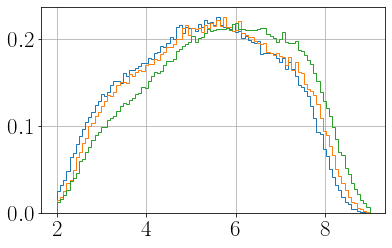

In [138]:
(epgExpInbCD.Gp).hist(bins = np.linspace(2, 9, 101), histtype = 'step', density = True)
(epgExpInbCD.Gp + (0.15)* (epgExpInbCD.Gp/9)**0.1).hist(bins = np.linspace(2, 9, 101), histtype = 'step', density = True)
dvcsSimInbCD.Gp.hist(bins = np.linspace(2, 9, 101), histtype = 'step', density = True)

<AxesSubplot:>

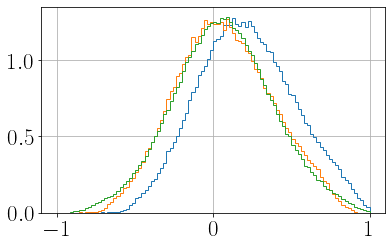

In [137]:
(epgExpInbCD.ME_epg).hist(bins = np.linspace(-1, 1, 101), histtype = 'step', density = True)
(epgExpInbCD.ME_epg - 0.15*(epgExpInbCD.Gp/9)**0.1).hist(bins = np.linspace(-1, 1, 101), histtype = 'step', density = True)
dvcsSimInbCD.ME_epg.hist(bins = np.linspace(-1, 1, 101), histtype = 'step', density = True)

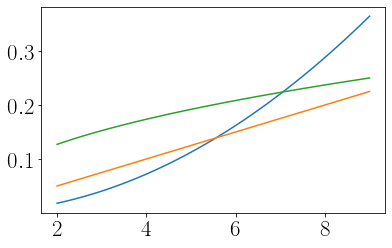

In [114]:
x = np.linspace(2, 9, 101)
plt.plot(x, 0.0045*x**2)
plt.plot(x, 0.025*x)
plt.plot(x, (0.25)* (x/9)**0.45)

In [67]:
GeEdges = [2, 3, 3.5, 4, 4.5, 5, 5.5, 6, 6.5, 7, 7.5, 8, 8.5]
GeCenters = np.array([0.5 * (GeEdges[i] + GeEdges[i + 1]) for i in range(len(GeEdges) - 1)])

In [29]:
corrections_s1 =  [0.0027127963241527914, 0.011688334116894544, 0.02450702877168808, 0.04365451807711337, 0.05658914377714781, 0.08494813565277966, 0.11628217063712384, 0.14040119699393974, 0.1758175715314783, 0.2231592062236225, 0.2408529398480527, 0.19389650819904847]
corrections_s2 = [0.0016465762135140366, -0.0034191574272045694, 0.0026325994170451963, 0.00822764781131921, 0.023272503869216723, 0.03625553033919683, 0.05747885396614852, 0.06876414662768451, 0.09782094188469934, 0.14794052064041924, 0.17676163811772344, 0.1460851981967332]
corrections_s3 = [0.01342666997614192, 0.027640131515235276, 0.04044960730576506, 0.04325643949025956, 0.06256961409902731, 0.09870421838804291, 0.12195631554692306, 0.16887291472520438, 0.1956754454761046, 0.23688587843703046, 0.26359011937735155, 0.24091319785668844]
corrections_s4 = [0.041668957044688745, 0.06468639906203111, 0.07888061651042738, 0.0769264162737686, 0.09030535733935031, 0.09828831435634927, 0.11794140367800203, 0.14524532668892698, 0.16856736407580925, 0.2034733208762593, 0.21056697629743545, 0.20127754106449236]
corrections_s5 = [0.04345267982848593, 0.057357808918257376, 0.061268587496697696, 0.05534487228802504, 0.062431829369657375, 0.061628815874847344, 0.0714519215490819, 0.07998809196046816, 0.10379452210414067, 0.10703412511506165, 0.10955638143281649, 0.10889001275596769]
corrections_s6 = [0.03403718227438077, 0.045595233491408725, 0.04349850977078278, 0.053009661521010776, 0.07515099681427742, 0.09479506018313058, 0.12869423927418916, 0.15018905977934544, 0.19403026177015387, 0.24112065802149907, 0.2546840543904751, 0.1857303279797768]

[-7.31782420e-05  1.47971456e+00  9.34390616e+00]


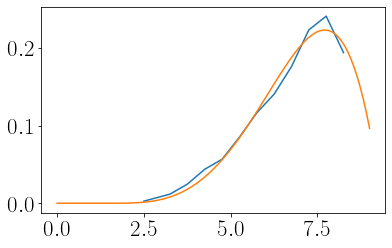

In [448]:
res_lsq = least_squares(lstsq_quarticfit2, [-0.005, 5, 10], args=(GeCenters, corrections_s1))
x = np.linspace(0, 9, 101)
plt.plot(GeCenters, corrections_s1)
fit = quartic([-0.0000732, 1.480, 9.344] , x)
# fit = quartic([0, 0, 0.0045, 0] , x)
plt.plot(x, np.where(x > res_lsq.x[1], fit, 0))
print(res_lsq.x)

[-1.34826931e-04  3.07029746e+00  9.24779260e+00]


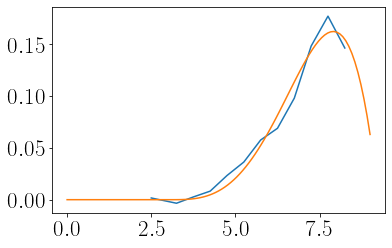

In [449]:
res_lsq = least_squares(lstsq_quarticfit2, [-0.005, 5, 10], args=(GeCenters, corrections_s2))
x = np.linspace(0, 9, 101)
plt.plot(GeCenters, corrections_s2)
fit = quartic([-0.000135, 3.070, 9.248] , x)
# fit = quartic([-0.0005, 3.5, 10] , x)
plt.plot(x, np.where(x > res_lsq.x[1], fit, 0))
print(res_lsq.x)

[-4.36986948e-05  7.18974224e-01  9.87311562e+00]


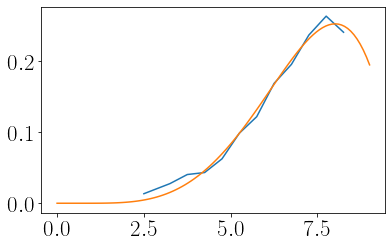

In [450]:
res_lsq = least_squares(lstsq_quarticfit2, res_lsq.x, args=(GeCenters, corrections_s3))
x = np.linspace(0, 9, 101)
plt.plot(GeCenters, corrections_s3)
fit = quartic([-0.0000437, 0.719, 9.873] , x)
plt.plot(x, np.where(x > res_lsq.x[1], fit, 0))
print(res_lsq.x)

[-4.27713826e-05  2.34191080e-03  1.02735347e-02]


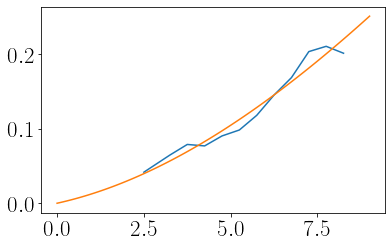

In [451]:
res_lsq = least_squares(lstsq_cubicfit2, res_lsq.x, args=(GeCenters, corrections_s4))
x = np.linspace(0, 9, 101)
plt.plot(GeCenters, corrections_s4)
fit = cubic( [-0.0000428, 0.00234, 0.0103], x)
plt.plot(x, np.where(x > res_lsq.x[1], fit, 0))
print(res_lsq.x)

[ 0.00025041 -0.0031438   0.02317904]


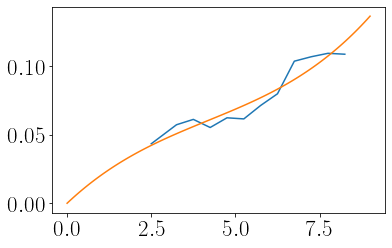

In [452]:
res_lsq = least_squares(lstsq_cubicfit2, res_lsq.x, args=(GeCenters, corrections_s5))
x = np.linspace(0, 9, 101)
plt.plot(GeCenters, corrections_s5)
fit = cubic( [0.000250, -0.00314, 0.0232] , x)
plt.plot(x, np.where(x > res_lsq.x[1], fit, 0))
print(res_lsq.x)

[ 0.00025041 -0.0031438   0.02317904]


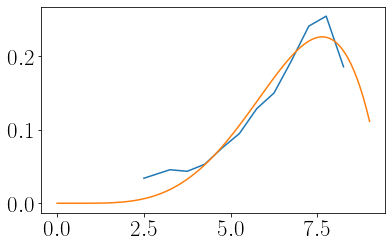

In [455]:
res_lsq = least_squares(lstsq_quarticfit2, res_lsq.x, args=(GeCenters, corrections_s6))
x = np.linspace(0, 9, 101)
plt.plot(GeCenters, corrections_s6)
fit = quartic( [-0.0000454, 0.517, 9.447] , x)
plt.plot(x, np.where(x > res_lsq.x[1], fit, 0))
print(res_lsq.x)

In [454]:
[-0.0000732, 1.480, 9.344], [-0.000135, 3.070, 9.248], [-0.0000437, 0.719, 9.873], [-0.0000428, 0.00234, 0.0103], [0.000250, -0.00314, 0.0232], [-0.0000454, 0.517, 9.447]


([-7.32e-05, 1.48, 9.344],
 [-0.000135, 3.07, 9.248],
 [-4.37e-05, 0.719, 9.873],
 [-4.28e-05, 0.00234, 0.0103],
 [0.00025, -0.00314, 0.0232],
 [-4.54e-05, 0.517, 9.447])

In [275]:
res_lsq.x

array([-4.67272254e-04,  3.51752492e+00,  1.01185798e+01])

In [28]:
def quartic(args, x):
#     df = args
    a, b, c = args
    if b < 0:
        return 0*x
#     print(df)
    return a*x*(x-b)**2 * (x-c)

In [29]:
def lstsq_quarticfit2(args, x, y):
#     print(args, x, y)
    return quartic(args, x) - y

In [576]:
def cubic(args, x):
#     df = args
    a, b, c = args
#     print(df)
    return a*x**3 + b*x**2 + c*x

In [577]:
def lstsq_cubicfit2(args, x, y):
#     print(args, x, y)
    return cubic(args, x) - y

<AxesSubplot:>

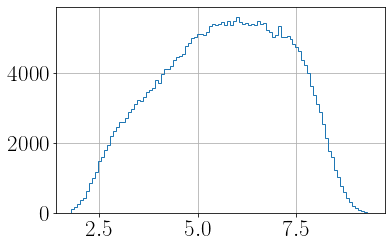

In [214]:
dvcsSimInbCD.Gp.hist(bins = 100, histtype = 'step')


<AxesSubplot:>

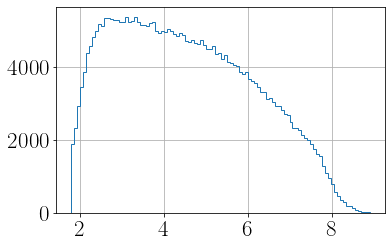

In [172]:
epgExpOutbCD.Gp.hist(bins = 100, histtype = 'step')


In [174]:
0.025 + 0.015/(1+np.exp((x-18.75)))

array([0.04      , 0.04      , 0.04      , 0.04      , 0.04      ,
       0.04      , 0.04      , 0.04      , 0.04      , 0.04      ,
       0.04      , 0.04      , 0.04      , 0.04      , 0.04      ,
       0.04      , 0.04      , 0.04      , 0.04      , 0.04      ,
       0.04      , 0.04      , 0.04      , 0.04      , 0.04      ,
       0.04      , 0.04      , 0.03999999, 0.03999999, 0.03999999,
       0.03999999, 0.03999999, 0.03999999, 0.03999999, 0.03999999,
       0.03999999, 0.03999999, 0.03999999, 0.03999999, 0.03999999,
       0.03999999, 0.03999999, 0.03999998, 0.03999998, 0.03999998,
       0.03999998, 0.03999998, 0.03999998, 0.03999998, 0.03999998,
       0.03999997, 0.03999997, 0.03999997, 0.03999997, 0.03999997,
       0.03999996, 0.03999996, 0.03999996, 0.03999995, 0.03999995,
       0.03999995, 0.03999994, 0.03999994, 0.03999993, 0.03999993,
       0.03999992, 0.03999992, 0.03999991, 0.03999991, 0.0399999 ,
       0.03999989, 0.03999989, 0.03999988, 0.03999987, 0.03999

In [473]:
def cubic(args, x):
#     df = args
    a, b, c = args
#     print(df)
    return np.max(a*x**3 + b*x**2 + c*x, 0)

def sextic(args, x):
#     df = args
    a, b, c = args
    if b < 0:
        return 0*x
#     print(df)
    return np.max(a*x*(x-b)**3 * (x-c), 0)

for sector in range(1, 7):
    args = [[-0.0000732, 1.480, 9.344], [-0.000135, 3.070, 9.248], [-0.0000437, 0.719, 9.873], [-0.0000428, 0.00234, 0.0103], [0.000250, -0.00314, 0.0232], [-0.0000454, 0.517, 9.447]]
    funcs = [sextic, sextic, sextic, cubic, cubic, sextic]
    cond = dvcsSimInbCD.Gsector == sector

    FD_phot_corr_sector = funcs[sector-1](args[sector-1], dvcsSimInbCD.loc[cond, "Gp"])
    dvcsSimInbCD.loc[cond, "Gp"] = dvcsSimInbCD.loc[cond, "Gp"] - 2* FD_phot_corr_sector


/usr/local/lib/python3.9/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
/usr/local/lib/python3.9/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
/usr/local/lib/python3.9/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_inde

<AxesSubplot:>

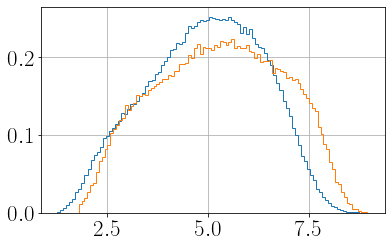

In [474]:
dvcsSimInbCD.Gp.hist(histtype = 'step', bins = 101, density = True)
epgExpInbCD.Gp.hist(histtype = 'step', bins =101, density = True)

In [160]:
parent_MC = "/Volumes/Extreme SSD/Feb2022/SimtoDat/v3.0/inb/dvcs/"
parent_MC_bkg1g = "/Volumes/Extreme SSD/Feb2022/SimtoDat/v3.0/inb/bkg_1g/"
parent_MC_bkg2g = "/Volumes/Extreme SSD/Feb2022/SimtoDat/v3.0/inb/bkg_2g/"
parent_exp = "/Volumes/Extreme SSD/Feb2022/SimtoDat/v3.0/inb/exp/"

dvcsSimInb = pd.read_pickle(parent_MC + "3987.pkl")
bkgSimInb = pd.read_pickle(parent_MC_bkg1g + "4076.pkl")
pi0SimInb = pd.read_pickle(parent_MC_bkg2g + "4076.pkl")
epgExpInb = pd.read_pickle(parent_exp + "dvcs.pkl")
pi0ExpInb = pd.read_pickle(parent_exp + "pi0.pkl")

epgExpInbCDFT = epgExpInb.loc[epgExpInb.config == 3]
pi0ExpInbCDFT = pi0ExpInb.loc[pi0ExpInb.config == 3]
dvcsSimInbCDFT = dvcsSimInb.loc[dvcsSimInb.config == 3]
bkgSimInbCDFT = bkgSimInb.loc[bkgSimInb.config == 3]
pi0SimInbCDFT = pi0SimInb.loc[pi0SimInb.config == 3]

epgExpInbCD = epgExpInb.loc[epgExpInb.config == 2]
pi0ExpInbCD = pi0ExpInb.loc[pi0ExpInb.config == 2]
dvcsSimInbCD =  dvcsSimInb.loc[dvcsSimInb.config == 2]
bkgSimInbCD = bkgSimInb.loc[bkgSimInb.config == 2]
pi0SimInbCD = pi0SimInb.loc[pi0SimInb.config == 2]


In [165]:
PpEdges = [0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6]
varstoplot = ["Pp", "Ptheta", "Pphi","Gp", "Gtheta", "Gphi",  "coneAngle", "MM2_eg", "", "reconGam", "coplanarity", "ME_epg", "MM2_epg", "MM2_ep", "MPt"]
title = [r"$p_{p'}$", r"$\theta_{p'}$", r"$\phi_{p'}$", r"$p_{\gamma}$", r"$\theta_{\gamma}$", r"$\phi_{\gamma}$", r"$\theta_{e'\gamma}$", r"$MM^2_{e'\gamma}$", "", r"$\theta_{\gamma_{det.}\gamma_{rec.}}$", r"$\Delta\phi$" , "ME"+r"${}_{e'p'\gamma}$", "MM"+r"${}^{2}_{e'p'\gamma}$", "MM"+r"${}^{2}_{e'p'}$", "MPt"+r"${}_{e'p'\gamma}$"]
unit = [GeV, degree, degree, GeV, degree, degree, degree, GeV2, "", GeV2, degree, degree, degree, degree, GeV, GeV2, GeV2, GeV2, GeVc]

for i in range(len(PpEdges)-1):
    PpMin = PpEdges[i]
    PpMax = PpEdges[i+1]
    epgExpInbCDFT_selected = epgExpInbCDFT.loc[(epgExpInbCDFT.Pp>PpMin) & (epgExpInbCDFT.Pp<PpMax)]
    pi0ExpInbCDFT_selected = pi0ExpInbCDFT.loc[(pi0ExpInbCDFT.Pp>PpMin) & (pi0ExpInbCDFT.Pp<PpMax)]
    dvcsSimInbCDFT_selected = dvcsSimInbCDFT.loc[(dvcsSimInbCDFT.Pp>PpMin) & (dvcsSimInbCDFT.Pp<PpMax)]
    pi0SimInbCDFT_selected = pi0SimInbCDFT.loc[(pi0SimInbCDFT.Pp>PpMin) & (pi0SimInbCDFT.Pp<PpMax)]
    bkgSimInbCDFT_selected = bkgSimInbCDFT.loc[(bkgSimInbCDFT.Pp>PpMin) & (bkgSimInbCDFT.Pp<PpMax)]

    contInb = 0
    if len(epgExpInbCDFT_selected)*len(pi0SimInbCDFT_selected) > 0:
        contInb = len(bkgSimInbCDFT_selected)/len(pi0SimInbCDFT_selected)*len(pi0ExpInbCDFT_selected)/len(epgExpInbCDFT_selected)
    
    fig, axs = plt.subplots(5, 3, figsize = (15,25))
    for yind in range(0, 5):
        for xind in range(0, 3):
            ind = 3*yind + xind
            if varstoplot[ind]:
                pass
            else:
                continue
            simDist_dvcs, bins = np.histogram(dvcsSimInbCDFT_selected[varstoplot[ind]], 100, density = True)
            simDist_dvpi0, _ = np.histogram(bkgSimInbCDFT_selected[varstoplot[ind]], bins, density = True)
            simDist = (1-contInb)*simDist_dvcs + contInb*simDist_dvpi0
            bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
            axs[yind, xind].step(bincenters, simDist, where='mid',color='b', linewidth=1)
            axs[yind, xind].hist(epgExpInbCDFT_selected[varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', density=True, linewidth=1)
            axs[yind, xind].set_title(title[ind])
            # axs[yind, xind].set_xlim([start, end])
            if (unit[ind]):
                axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
            else:
                axs[yind, xind].set_xlabel(title[ind])
    plt.tight_layout()
    plt.savefig("SimtoDat/examine/InbCDFT_{}.pdf".format(i))
    plt.clf()

<Figure size 1080x1800 with 0 Axes>

<Figure size 1080x1800 with 0 Axes>

<Figure size 1080x1800 with 0 Axes>

<Figure size 1080x1800 with 0 Axes>

<Figure size 1080x1800 with 0 Axes>

<Figure size 1080x1800 with 0 Axes>

<Figure size 1080x1800 with 0 Axes>

<Figure size 1080x1800 with 0 Axes>

<Figure size 1080x1800 with 0 Axes>

<Figure size 1080x1800 with 0 Axes>

<Figure size 1080x1800 with 0 Axes>

<Figure size 1080x1800 with 0 Axes>

<Figure size 1080x1800 with 0 Axes>

In [166]:
PpEdges = [0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6]
varstoplot = ["Pp", "Ptheta", "Pphi","Gp", "Gtheta", "Gphi",  "coneAngle", "MM2_eg", "", "reconGam", "coplanarity", "ME_epg", "MM2_epg", "MM2_ep", "MPt"]
title = [r"$p_{p'}$", r"$\theta_{p'}$", r"$\phi_{p'}$", r"$p_{\gamma}$", r"$\theta_{\gamma}$", r"$\phi_{\gamma}$", r"$\theta_{e'\gamma}$", r"$MM^2_{e'\gamma}$", "", r"$\theta_{\gamma_{det.}\gamma_{rec.}}$", r"$\Delta\phi$" , "ME"+r"${}_{e'p'\gamma}$", "MM"+r"${}^{2}_{e'p'\gamma}$", "MM"+r"${}^{2}_{e'p'}$", "MPt"+r"${}_{e'p'\gamma}$"]
unit = [GeV, degree, degree, GeV, degree, degree, degree, GeV2, "", GeV2, degree, degree, degree, degree, GeV, GeV2, GeV2, GeV2, GeVc]

for i in range(len(PpEdges)-1):
    PpMin = PpEdges[i]
    PpMax = PpEdges[i+1]
    epgExpInbCD_selected = epgExpInbCD.loc[(epgExpInbCD.Pp>PpMin) & (epgExpInbCD.Pp<PpMax)]
    pi0ExpInbCD_selected = pi0ExpInbCD.loc[(pi0ExpInbCD.Pp>PpMin) & (pi0ExpInbCD.Pp<PpMax)]
    dvcsSimInbCD_selected = dvcsSimInbCD.loc[(dvcsSimInbCD.Pp>PpMin) & (dvcsSimInbCD.Pp<PpMax)]
    pi0SimInbCD_selected = pi0SimInbCD.loc[(pi0SimInbCD.Pp>PpMin) & (pi0SimInbCD.Pp<PpMax)]
    bkgSimInbCD_selected = bkgSimInbCD.loc[(bkgSimInbCD.Pp>PpMin) & (bkgSimInbCD.Pp<PpMax)]

    contInb = 0
    if len(epgExpInbCD_selected)*len(pi0SimInbCD_selected) > 0:
        contInb = len(bkgSimInbCD_selected)/len(pi0SimInbCD_selected)*len(pi0ExpInbCD_selected)/len(epgExpInbCD_selected)
    
    fig, axs = plt.subplots(5, 3, figsize = (15,25))
    for yind in range(0, 5):
        for xind in range(0, 3):
            ind = 3*yind + xind
            if varstoplot[ind]:
                pass
            else:
                continue
            simDist_dvcs, bins = np.histogram(dvcsSimInbCD_selected[varstoplot[ind]], 100, density = True)
            simDist_dvpi0, _ = np.histogram(bkgSimInbCD_selected[varstoplot[ind]], bins, density = True)
            simDist = (1-contInb)*simDist_dvcs + contInb*simDist_dvpi0
            bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
            axs[yind, xind].step(bincenters, simDist, where='mid',color='b', linewidth=1)
            axs[yind, xind].hist(epgExpInbCD_selected[varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', density=True, linewidth=1)
            axs[yind, xind].set_title(title[ind])
            # axs[yind, xind].set_xlim([start, end])
            if (unit[ind]):
                axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
            else:
                axs[yind, xind].set_xlabel(title[ind])
    plt.tight_layout()
    plt.savefig("SimtoDat/examine/InbCD_{}.pdf".format(i))
    plt.clf()

<Figure size 1080x1800 with 0 Axes>

<Figure size 1080x1800 with 0 Axes>

<Figure size 1080x1800 with 0 Axes>

<Figure size 1080x1800 with 0 Axes>

<Figure size 1080x1800 with 0 Axes>

<Figure size 1080x1800 with 0 Axes>

<Figure size 1080x1800 with 0 Axes>

<Figure size 1080x1800 with 0 Axes>

<Figure size 1080x1800 with 0 Axes>

<Figure size 1080x1800 with 0 Axes>

<Figure size 1080x1800 with 0 Axes>

<Figure size 1080x1800 with 0 Axes>

<Figure size 1080x1800 with 0 Axes>

In [170]:
PpEdges = [0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6]
varstoplot = ["Pp", "Ptheta", "Pphi","Gp", "Gtheta", "Gphi",  "coneAngle1", "MM2_egg", "Mpi0", "reconPi", "coplanarity", "ME_epgg", "MM2_epgg", "MM2_ep", "MPt"]
title = [r"$p_{p'}$", r"$\theta_{p'}$", r"$\phi_{p'}$", r"$p_{\gamma 1}$", r"$\theta_{\gamma 1}$", r"$\phi_{\gamma 1}$", r"$\theta_{e'\gamma 1}$", r"$MM^2_{e'\gamma 1}$", "", r"$\theta_{\pi^0_{det.}\pi^0_{rec.}}$", r"$\Delta\phi$" , "ME"+r"${}_{ep\pi^0}$", "MM"+r"${}^{2}_{ep\pi^0}$", "MM"+r"${}^{2}_{ep}$", "MPt"+r"${}_{ep\pi^0}$"]
unit = [GeV, degree, degree, GeV, degree, degree, degree, GeV2, "", GeV2, degree, degree, degree, degree, GeV, GeV2, GeV2, GeV2, GeVc]

for i in range(len(PpEdges)-1):
    PpMin = PpEdges[i]
    PpMax = PpEdges[i+1]
    pi0ExpInbCD_selected = pi0ExpInbCD.loc[(pi0ExpInbCD.Pp>PpMin) & (pi0ExpInbCD.Pp<PpMax)]
    pi0SimInbCD_selected = pi0SimInbCD.loc[(pi0SimInbCD.Pp>PpMin) & (pi0SimInbCD.Pp<PpMax)]
    
    fig, axs = plt.subplots(5, 3, figsize = (15,25))
    for yind in range(0, 5):
        for xind in range(0, 3):
            ind = 3*yind + xind
            if varstoplot[ind]:
                pass
            else:
                continue
            simDist, bins = np.histogram(pi0SimInbCD_selected[varstoplot[ind]], 100, density = True)
            bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
            axs[yind, xind].step(bincenters, simDist, where='mid',color='b', linewidth=1)
            axs[yind, xind].hist(pi0ExpInbCD_selected[varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', density=True, linewidth=1)
            axs[yind, xind].set_title(title[ind])
            # axs[yind, xind].set_xlim([start, end])
            if (unit[ind]):
                axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
            else:
                axs[yind, xind].set_xlabel(title[ind])
    plt.tight_layout()
    plt.savefig("SimtoDat/examine/InbPi0CD_{}.pdf".format(i))
    plt.clf()

<Figure size 1080x1800 with 0 Axes>

<Figure size 1080x1800 with 0 Axes>

<Figure size 1080x1800 with 0 Axes>

<Figure size 1080x1800 with 0 Axes>

<Figure size 1080x1800 with 0 Axes>

<Figure size 1080x1800 with 0 Axes>

<Figure size 1080x1800 with 0 Axes>

<Figure size 1080x1800 with 0 Axes>

<Figure size 1080x1800 with 0 Axes>

<Figure size 1080x1800 with 0 Axes>

<Figure size 1080x1800 with 0 Axes>

<Figure size 1080x1800 with 0 Axes>

<Figure size 1080x1800 with 0 Axes>

In [ ]:
PpEdges = [0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6]
for i in range(len(PpEdges)-1):
    PpMin = PpEdges[i]
    PpMax = PpEdges[i+1]
    epgExpInbCD_selected = epgExpInbCD.loc[(epgExpInbCD.Pp>PpMin) & (epgExpInbCD.Pp<PpMax)]
    pi0ExpInbCD_selected = pi0ExpInbCD.loc[(pi0ExpInbCD.Pp>PpMin) & (pi0ExpInbCD.Pp<PpMax)]
    dvcsSimInbCD_selected = dvcsSimInbCD.loc[(dvcsSimInbCD.Pp>PpMin) & (dvcsSimInbCD.Pp<PpMax)]
    pi0SimInbCD_selected = pi0SimInbCD.loc[(pi0SimInbCD.Pp>PpMin) & (pi0SimInbCD.Pp<PpMax)]
    bkgSimInbCD_selected = bkgSimInbCD.loc[(bkgSimInbCD.Pp>PpMin) & (bkgSimInbCD.Pp<PpMax)]

    contInb = 0
    contOutb = 0
    if len(epgExpInbCD_selected)*len(pi0SimInbCD_selected) > 0:
        contInb = len(bkgSimInbCD_selected)/len(pi0SimInbCD_selected)*len(pi0ExpInbCD_selected)/len(epgExpInbCD_selected)
    if len(epgExpOutbCD_selected)*len(pi0SimOutbCD_selected) > 0:
        contOutb = len(bkgSimOutbCD_selected)/len(pi0SimOutbCD_selected)*len(pi0ExpOutbCD_selected)/len(epgExpOutbCD_selected)

    epgExpOutbCD_selected = epgExpOutbCD.loc[(epgExpOutbCD.Pp>PpMin) & (epgExpOutbCD.Pp<PpMax)]
    pi0ExpOutbCD_selected = pi0ExpOutbCD.loc[(pi0ExpOutbCD.Pp>PpMin) & (pi0ExpOutbCD.Pp<PpMax)]
    dvcsSimOutbCD_selected = dvcsSimOutbCD.loc[(dvcsSimOutbCD.Pp>PpMin) & (dvcsSimOutbCD.Pp<PpMax)]
    pi0SimOutbCD_selected = pi0SimOutbCD.loc[(pi0SimOutbCD.Pp>PpMin) & (pi0SimOutbCD.Pp<PpMax)]
    bkgSimOutbCD_selected = bkgSimOutbCD.loc[(bkgSimOutbCD.Pp>PpMin) & (bkgSimOutbCD.Pp<PpMax)]
    
    fig, axs = plt.subplots(3, 5, figsize = (15,25))
    for yind in range(0, 5):
        for xind in range(0, 3):
            ind = 3*yind + xind
            if varstoplot[ind]:
                pass
            else:
                continue
            simDist_dvcs, bins = np.histogram(dvcsSimInbCD_selected[varstoplot[ind]], 100, density = True)
            simDist_dvpi0, _ = np.histogram(bkgSimInbCD_selected[varstoplot[ind]], bins, density = True)
            simDist = (1-contInb)*simDist_dvcs + contInb*simDist_dvpi0
            bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
            axs[yind, xind].step(bincenters, simDist, where='mid',color='b', linewidth=1)
            axs[yind, xind].hist(epgExpInbCD_selected[varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', density=True, linewidth=1)
            axs[yind, xind].set_title(title[ind])
            # axs[yind, xind].set_xlim([start, end])
            if (unit[ind]):
                axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
            else:
                axs[yind, xind].set_xlabel(title[ind])
    plt.tight_layout()
    plt.show()
    plt.clf()

    fig, axs = plt.subplots(3, 5, figsize = (15,10))
    for yind in range(0, 3):
        for xind in range(0,5):
            ind = 5*yind + xind
            # start = binstarts[ind]
            # end = binends[ind]
            # bins = np.linspace(start, end, 101)
            if varstoplot[ind]:
                pass
            else:
                continue
            simDist_dvcs, bins = np.histogram(dvcsSimOutbCD_selected[varstoplot[ind]], 100, density = True)
            simDist_dvpi0, _ = np.histogram(bkgSimOutbCD_selected[varstoplot[ind]], bins, density = True)
            simDist = (1-contOutb)*simDist_dvcs + contOutb*simDist_dvpi0
            bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
            axs[yind, xind].step(bincenters, simDist, where='mid',color='b', linewidth=1)
            axs[yind, xind].hist(epgExpOutbCD_selected[varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', density=True, linewidth=1)
            axs[yind, xind].set_title(title[ind])
            # axs[yind, xind].set_xlim([start, end])
            if (unit[ind]):
                axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
            else:
                axs[yind, xind].set_xlabel(title[ind])
    plt.tight_layout()
    plt.show()
    plt.clf()

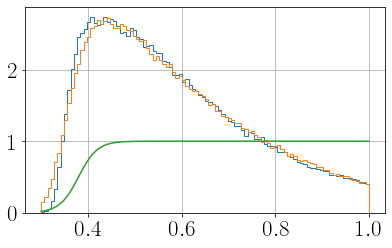

In [21]:
epgExpInbCDFT.Pp.hist(bins = np.linspace(0.3, 1, 101), density = True, histtype = 'step')
dvcsSimInbCDFT.Pp.hist(bins = np.linspace(0.3, 1, 101), density = True, histtype = 'step')
plt.plot(x, regulator)

<AxesSubplot:>

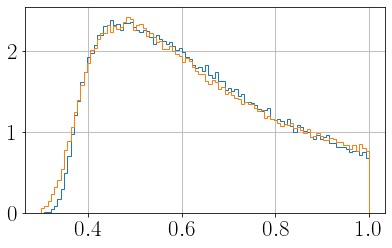

In [22]:
epgExpInbCD.Pp.hist(bins = np.linspace(0.3, 1, 101), density = True, histtype = 'step')
dvcsSimInbCD.Pp.hist(bins = np.linspace(0.3, 1, 101), density = True, histtype = 'step')

<AxesSubplot:>

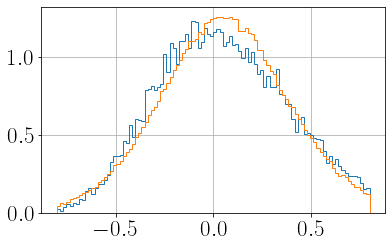

In [79]:
makeDVCS(epgExpInbCD[epgExpInbCD.Gsector== 6]).ME_epg.hist(bins = np.linspace(-.8, .8, 101), density = True, histtype = 'step')
makeDVCS(dvcsSimInbCD).ME_epg.hist(bins = np.linspace(-.8, .8, 101), density = True, histtype = 'step')

<AxesSubplot:>

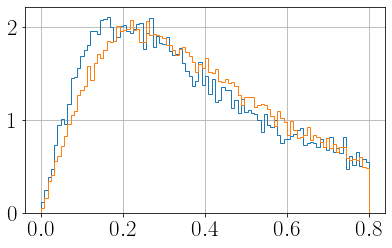

In [54]:
makeDVCS(epgExpInbCD[epgExpInbCD.Gsector== 5]).reconGam.hist(bins = np.linspace(0, 0.8, 101), density = True, histtype = 'step')
makeDVCS(dvcsSimInbCD[dvcsSimInbCD.Gsector ==5]).reconGam.hist(bins = np.linspace(0, 0.8, 101), density = True, histtype = 'step')

<AxesSubplot:>

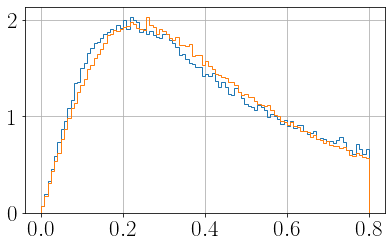

In [55]:
makeDVCS(epgExpInbCD[epgExpInbCD.Gsector<7]).reconGam.hist(bins = np.linspace(0, 0.8, 101), density = True, histtype = 'step')
makeDVCS(dvcsSimInbCD[dvcsSimInbCD.Gsector<7]).reconGam.hist(bins = np.linspace(0, 0.8, 101), density = True, histtype = 'step')

<AxesSubplot:>

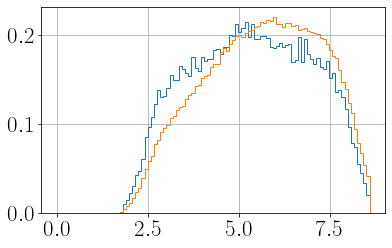

In [44]:
epgExpInbCD[epgExpInbCD.Gsector== 2].Ge.hist(bins = np.linspace(0, 8.6, 101), density = True, histtype = 'step')
dvcsSimInbCD.Ge.hist(bins = np.linspace(0, 8.6, 101), density = True, histtype = 'step')

<AxesSubplot:>

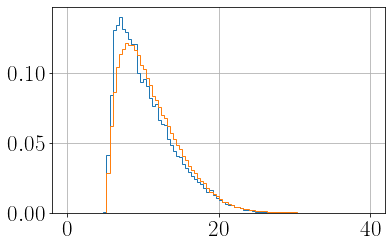

In [40]:
epgExpInbCD[epgExpInbCD.Gsector== 4].Gtheta.hist(bins = np.linspace(0, 40, 101), density = True, histtype = 'step')
dvcsSimInbCD.Gtheta.hist(bins = np.linspace(0, 40, 101), density = True, histtype = 'step')

<AxesSubplot:>

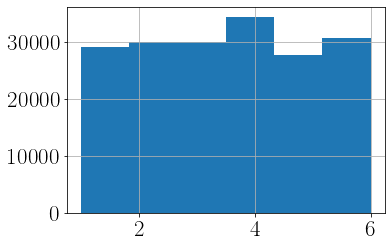

In [38]:
epgExpInbCD.Gsector.hist(bins = 6)

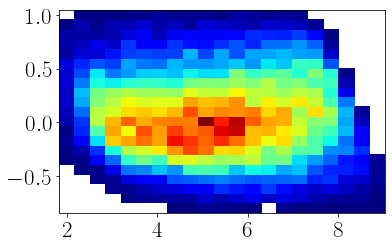

In [74]:
df = epgExpInbCD[epgExpInbCD.Gsector == 1]
plt.hist2d(df.Ge, df.ME_epg, bins = 21, cmap = cmap, cmin =1)
plt.show()

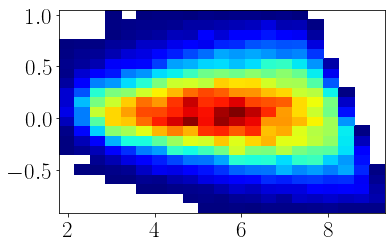

In [75]:
df = dvcsSimInbCD[dvcsSimInbCD.Gsector == 1]
plt.hist2d(df.Ge, df.ME_epg, bins = 21, cmap = cmap, cmin =1)
plt.show()

In [568]:
GeEdges = [2, 3, 3.5, 4, 4.5, 5, 5.5, 6, 6.5, 7, 7.5, 8, 8.5]
GeCenters = np.array([0.5 * (GeEdges[i] + GeEdges[i + 1]) for i in range(len(GeEdges) - 1)])

In [561]:
corrections_s1 =  [0.0027127963241527914, 0.011688334116894544, 0.02450702877168808, 0.04365451807711337, 0.05658914377714781, 0.08494813565277966, 0.11628217063712384, 0.14040119699393974, 0.1758175715314783, 0.2231592062236225, 0.2408529398480527, 0.19389650819904847]
corrections_s2 = [0.0016465762135140366, -0.0034191574272045694, 0.0026325994170451963, 0.00822764781131921, 0.023272503869216723, 0.03625553033919683, 0.05747885396614852, 0.06876414662768451, 0.09782094188469934, 0.14794052064041924, 0.17676163811772344, 0.1460851981967332]
corrections_s3 = [0.01342666997614192, 0.027640131515235276, 0.04044960730576506, 0.04325643949025956, 0.06256961409902731, 0.09870421838804291, 0.12195631554692306, 0.16887291472520438, 0.1956754454761046, 0.23688587843703046, 0.26359011937735155, 0.24091319785668844]
corrections_s4 = [0.041668957044688745, 0.06468639906203111, 0.07888061651042738, 0.0769264162737686, 0.09030535733935031, 0.09828831435634927, 0.11794140367800203, 0.14524532668892698, 0.16856736407580925, 0.2034733208762593, 0.21056697629743545, 0.20127754106449236]
corrections_s5 = [0.04345267982848593, 0.057357808918257376, 0.061268587496697696, 0.05534487228802504, 0.062431829369657375, 0.061628815874847344, 0.0714519215490819, 0.07998809196046816, 0.10379452210414067, 0.10703412511506165, 0.10955638143281649, 0.10889001275596769]
corrections_s6 = [0.03403718227438077, 0.045595233491408725, 0.04349850977078278, 0.053009661521010776, 0.07515099681427742, 0.09479506018313058, 0.12869423927418916, 0.15018905977934544, 0.19403026177015387, 0.24112065802149907, 0.2546840543904751, 0.1857303279797768]

In [562]:
corrections_additional_s1 = [0.004655236812749722, 0.006652758786828236, 0.014176665425664058, 0.024892825338283422, 0.024108149677000777, 0.022340123989785722, 0.03590268113691643, 0.03144891478945529, 0.03257863058139428, 0.06850306027894221, 0.07234219504786817, 0.022074759847284423]
smearing_s1 = [0.05, 0.03, 0.045, 0.035, 0.04, 0.035, 0.045, 0.04, 0.045, 0.045, 0.04, 0]
corrections_additional_s2 = [0.007582929770140065, -0.0014536758949352177, 0.0037483590367346567, 0.007636518801455404, 0.010819436333650782, 0.017749386913287857, 0.015044652007399371, 0.007576612052074541, 0.01628390851385577, 0.025284313999589834, 0.04289154765716284, -0.0013697371713662504]
smearing_s2 = [0.04, 0.035, 0.045, 0.045, 0.045, 0.04, 0.045, 0.045, 0.045, 0.035, 0.04, 0.01]
corrections_additional_s3 = [0.015933558703213987, 0.016979394326805557, 0.016448494225886658, 0.006075793017400015, 0.01337945073772457, 0.02244779139526599, 0.023785960275028297, 0.034949784014113, 0.05020621440687437, 0.06290916176743816, 0.08023777218170097, 0.04400272225169097]
smearing_s3 = [0.035, 0.04, 0.04, 0.03, 0.03, 0.04, 0.035, 0.04, 0.045, 0.05, 0.035, 0.02]
corrections_additional_s4 = [0.017244300241618826, 0.02703329017589489, 0.03588208400445834, 0.013509075539308683, 0.01809027000102515, 0.008324668792854501, 0.019409122962694144, 0.02769735034943508, 0.040610387581907645, 0.05906593982380872, 0.050850154593095706, 0.02466453589839845]
smearing_s4 = [0.05, 0.035, 0.045, 0.035, 0.04, 0.035, 0.04, 0.04, 0.03, 0.03, 0.02, 0.02]
corrections_additional_s5 = [0.01578343178327196, 0.021468179792439847, 0.03468661212129144, 0.01900224038204145, 0.014554599287558916, 0.013102623007028063, 0.01551329142381949, 0.011320871037590172, 0.030517314214169734, 0.018243532841073606, 0.011385866280615572, -0.014727061995485666]
smearing_s5 = [0.05, 0.05, 0.045, 0.035, 0.04, 0.03, 0.035, 0.04, 0.03, 0.03, 0.02, 0]
corrections_additional_s6 = [0.031779472010862425, 0.03304916514549345, 0.02106097104535131, 0.023057758998382603, 0.019988203995402305, 0.01606667459597222, 0.032998033856868336, 0.01857621125927658, 0.04664085062463142, 0.07207751259010617, 0.08740619073358354, 0.027385046147193275]
smearing_s6 = [0.045, 0.04, 0.035, 0.035, 0.035, 0.035, 0.04, 0.04, 0.045, 0.035, 0.035, 0]

In [563]:
def quartic(args, x):
#     df = args
    a, b, c = args
#     print(df)
    return a*x*(x-b)**3 * (x-c)

In [564]:
def quintic(args, x):
#     df = args
    a, b, c, d, e = args
#     print(df)
    return 0*x**5 + 0*x**4 + c*x**3 + d*x**2 + e*x

In [565]:
def lstsq_quarticfit2(args, x, y):
#     df = args
    return quartic(args, x) - y

In [566]:
def lstsq_quinticfit(args, x, y):
#     df = args
    return quintic(args, x) - y

[-1.68504808e-05  8.20953915e-01  8.89422255e+00]


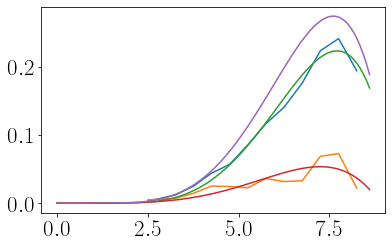

In [569]:
res_lsq = least_squares(lstsq_quarticfit2, [-0.0000732, 1.480, 9.344], args=(GeCenters, corrections_additional_s1))
x = np.linspace(0, 8.604, 101)
plt.plot(GeCenters, corrections_s1)
plt.plot(GeCenters, corrections_additional_s1)
fit = quartic([-0.0000732, 1.480, 9.344] , x)
# fit_additional = quartic(res_lsq.x, x)
fit_additional = quartic([-0.0000168, 0.821, 8.894], x)
plt.plot(x, fit)
plt.plot(x, fit_additional)
plt.plot(x, np.where(fit_additional+fit<x, fit_additional+fit, 0))
print(res_lsq.x)
plt.show()

[-3.39522589e-05  2.72025632e+00  8.41861059e+00]


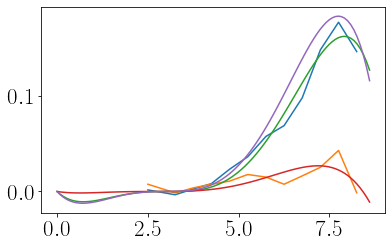

In [570]:
res_lsq = least_squares(lstsq_quarticfit2, [-0.000135, 3.070, 9.248], args=(GeCenters, corrections_additional_s2))
x = np.linspace(0, 8.604, 101)
plt.plot(GeCenters, corrections_s2)
plt.plot(GeCenters, corrections_additional_s2)
fit = quartic([-0.000135, 3.070, 9.248] , x)
# fit_additional = quartic(res_lsq.x, x)
fit_additional = quartic([-0.0000340, 2.720, 8.419], x)
plt.plot(x, fit)
plt.plot(x, fit_additional)
plt.plot(x, fit_additional+fit)
print(res_lsq.x)
plt.show()

[-6.19789518e-05  2.79264684e+00  8.86461902e+00]


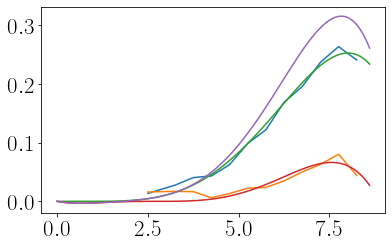

In [52]:
res_lsq = least_squares(lstsq_quarticfit2, [-0.0000437, 0.719, 9.873], args=(GeCenters, corrections_additional_s3))
# x = np.linspace(0, 9, 101)
plt.plot(GeCenters, corrections_s3)
plt.plot(GeCenters, corrections_additional_s3)
fit = quartic([-0.0000437, 0.719, 9.873] , x)
# fit_additional = quartic(res_lsq.x, x)
fit_additional = quartic([-0.0000620, 2.793, 8.865], x)
plt.plot(x, fit)
plt.plot(x, fit_additional)
plt.plot(x, fit_additional+fit)
print(res_lsq.x)
plt.show()

[ 0.00013165 -0.00161566  0.00977548]


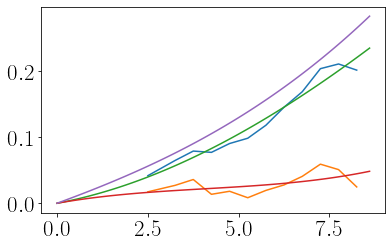

In [58]:
res_lsq = least_squares(cubicfit, [-0.0000428, 0.00234, 0.0103], args=(GeCenters, corrections_additional_s4))
# x = np.linspace(0, 9, 101)
plt.plot(GeCenters, corrections_s4)
plt.plot(GeCenters, corrections_additional_s4)
fit = cubic( [-0.0000428, 0.00234, 0.0103], x)
fit_additional = cubic(res_lsq.x, x)
fit_additional = cubic([ 0.000132, -0.00162,  0.00978], x)
plt.plot(x, fit)
plt.plot(x, fit_additional)
plt.plot(x, fit_additional+fit)
print(res_lsq.x)
plt.show()

[-0.00013474  0.00028232  0.00646936]


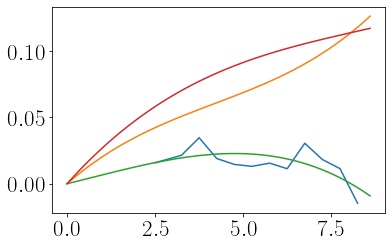

In [59]:
res_lsq = least_squares(cubicfit, [0.000250, -0.00314, 0.0232], args=(GeCenters, corrections_additional_s5))
# x = np.linspace(0, 9, 101)
plt.plot(GeCenters, corrections_additional_s5)
fit = cubic( [0.000250, -0.00314, 0.0232] , x)
fit_additional = cubic([-0.000135,  0.000282, 0.00650], x)
# fit_additional = cubic(res_lsq.x, x)
plt.plot(x, fit)
plt.plot(x, fit_additional)
plt.plot(x, fit_additional+fit)
print(res_lsq.x)
plt.show()

[ 0.0002625  -0.0029268   0.01387273]


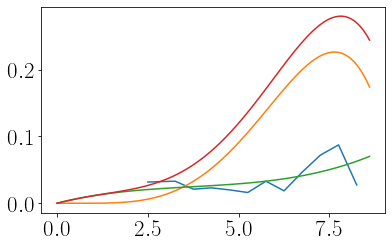

In [66]:
res_lsq = least_squares(cubicfit, [0.000250, -0.00314, 0.0232], args=(GeCenters, corrections_additional_s6))
# x = np.linspace(0, 9, 101)
plt.plot(GeCenters, corrections_additional_s6)
fit = quartic( [-0.0000454, 0.517, 9.447] , x)
# fit_additional = cubic(res_lsq.x, x)
fit_additional = cubic([ 0.000263,  -0.00293,   0.0139], x)
plt.plot(x, fit)
plt.plot(x, fit_additional)
plt.plot(x, fit+fit_additional)
print(res_lsq.x)
plt.show()

In [156]:
args_minor = [[-0.000272, 0.00517, -0.0338, 0.0928, -0.113 ], [-0.000217, 0.00434, -0.0299, 0.0872, -0.113 ], [-0.000196, 0.00349, -0.0195, 0.0384, -0.0383  ], [-0.000227, 0.00461, -0.0321, 0.0924, -0.113  ], [-0.000156, 0.00327, -0.0243, 0.0764, -0.0937 ], [-0.000351, 0.00674, -0.0439, 0.115, -0.117 ]]


In [157]:
smearings = 

[[-0.000272, 0.00517, -0.0338, 0.0928, -0.113],
 [-0.000217, 0.00434, -0.0299, 0.0872, -0.113],
 [-0.000196, 0.00349, -0.0195, 0.0384, -0.0383],
 [-0.000227, 0.00461, -0.0321, 0.0924, -0.113],
 [-0.000156, 0.00327, -0.0243, 0.0764, -0.0937],
 [-0.000351, 0.00674, -0.0439, 0.115, -0.117]]

In [159]:
len(corrections_s1)

12

In [ ]:
smearing_s1 = [0.06, 0.055, 0.0, 0.05, 0.055, 0.05, 0.05, 0.04, 0.04, 0.035, 0.035, 0]
smearing_s2 = [0.06, 0.05, 0.055, 0.055, 0.04, 0.045, 0.04, 0.05, 0.045, 0.045, 0.04, 0.01]
smearing_s3 = [0.045, 0.06, 0.055, 0.05, 0.05, 0.045, 0.04, 0.04, 0.035, 0.055, 0.04, 0.01]
smearing_s4 = 

[0.03951332 5.30781959 8.00499354]


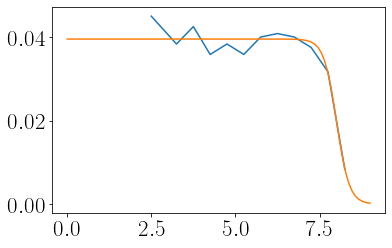

In [46]:
smearing_avg = (np.array(smearing_s1) + np.array(smearing_s2) + np.array(smearing_s3) + np.array(smearing_s4) + np.array(smearing_s5) + np.array(smearing_s6))/6 
plt.plot(GeCenters, smearing_avg )
x = np.linspace(0, 9, 101)
res_lsq = least_squares(lstsq_sigmoidfit3, [0.04, 0.005, 6], args=(GeCenters, smearing_avg))
plt.plot(x, res_lsq.x[0]/(1+np.exp(res_lsq.x[1]*(x-res_lsq.x[2]))))
print(res_lsq.x)
# plt.plot(GeCenters, smearing_s1)
# plt.plot(GeCenters, smearing_s2)
# plt.plot(GeCenters, smearing_s3)
# plt.plot(GeCenters, smearing_s4)
# plt.plot(GeCenters, smearing_s5)
# plt.plot(GeCenters, smearing_s6)
plt.show()

In [23]:
def sigmoidfit3(args, x):
#     df = args
    a, b, c = args
#     print(df)
    return a/(1+np.exp(b*(x-c)))

In [24]:
def lstsq_sigmoidfit3(args, x, y):
#     print(args, x, y)
    return sigmoidfit3(args, x) - y

In [115]:
x, y = [0, 0.1, 0.2, 0.3, 0.4, .46, .525, .575, .625, .675, .725, .775, .825, .875, .925, .975, 1.025, 1.075, 1.125, 1.2, 1.3, 1.4, 1.525, 1.7, 1.9, 2.25], [0, 0, 0, 0, 0, 0, .005, .01, .01, .01, .015, .015, .015, .02, .02, .02, .02, 0.02, 0.01, 0, 0, 0, 0, 0, 0, 0]
x = np.array(x)
y = np.array(y)

0.010121238241052774 -8.792140613463433 1.1174849739302104 0.3506613491436559


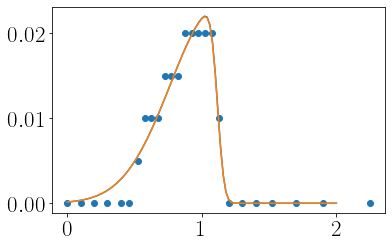

In [119]:
plt.scatter(x, y)
from scipy.stats import skewnorm
res_lsq = least_squares(lstsq_skewnormfit, [0.008, -5, 1.02, 0.3], args=(x, y))
A, a, loc, scale =res_lsq.x
print(A, a, loc, scale)
plt.plot(z, A*skewnorm.pdf(z, a, loc = loc, scale = scale))
plt.plot(z, 0.0101*skewnorm.pdf(z, -8.792, 1.117, 0.351))

In [105]:
def skewnormfit(args, x):
#     df = args
    A, a, loc, scale = args
#     print(df)
    return A*skewnorm.pdf(x, a, loc = loc, scale = scale)

In [107]:
def lstsq_skewnormfit(args, x, y):
    return skewnormfit(args, x) - y

(0.3, 5.0)

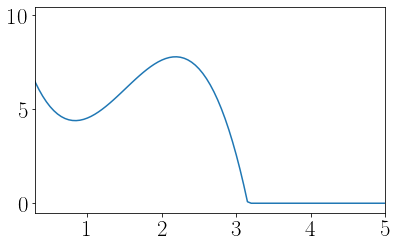

In [125]:
z = np.linspace(0, 5, 101)
plt.plot(z, np.maximum(-2.768*z**3 + 12.549*z**2 - 15.192*z + 9.934, 0))
plt.xlim([0.3, 5])

In [128]:
2*M*(np.sqrt(0.42**2 + M**2)-M)

0.1683514754170096

In [471]:
import matplotlib.image as mpimg

Bbox(x0=0.125, y0=0.125, x1=0.9, y1=0.88)


<ipython-input-494-34b32eed7c56>:90: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.savefig("/Users/sangbaek/Dropbox (MIT)/Apps/Overleaf/Thesis_SL/templates/Figures/eicwhitepaper2_withCLAS12.pdf")
/usr/local/lib/python3.9/site-packages/IPython/core/pylabtools.py:132: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


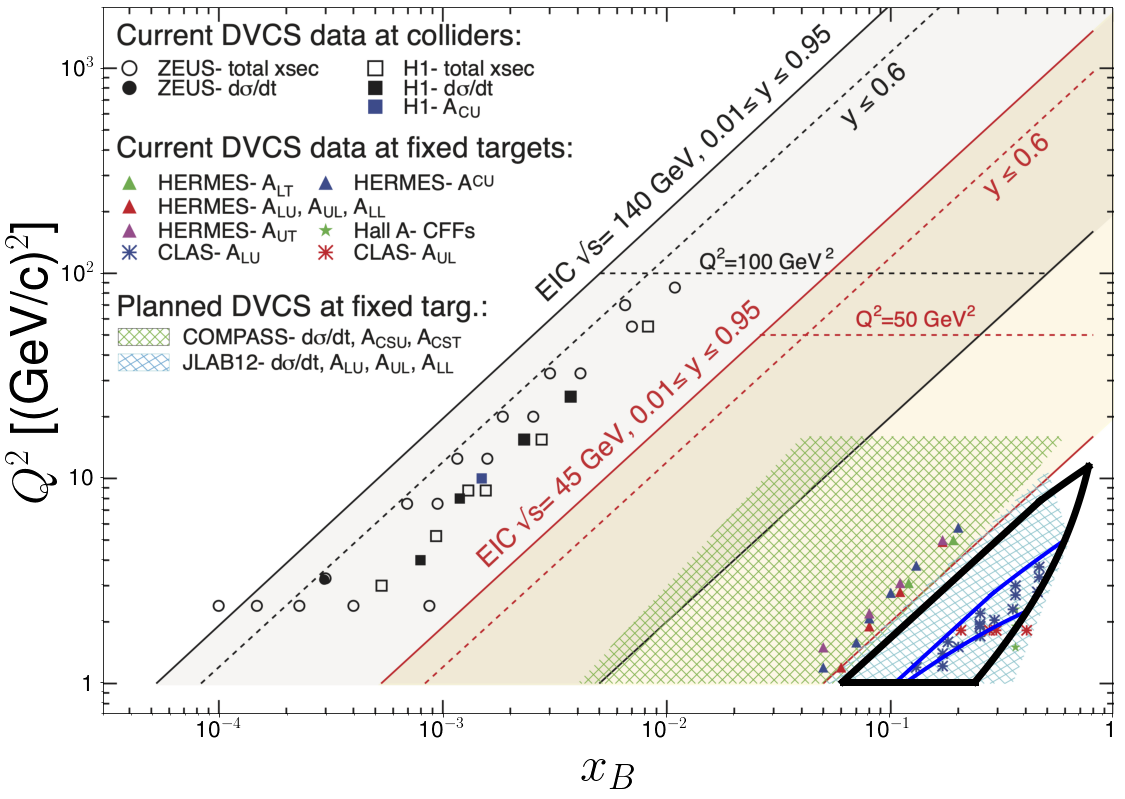

In [494]:
xaxis = np.linspace(3e-5, 1, 101)
yaxis = np.linspace(0.7, 2000, 101)
fig, ax = plt.subplots(1,1, figsize=(2509/200/(0.9-0.125), 1753/200/(0.877-0.125)))
print(ax.get_position())

ax.patch.set_alpha(0)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim([3e-5, 1])
ax.set_ylim([0.7, 2000])

#CLAS6
x1 = np.linspace(1/2/0.9382721/(5.75-0.8),0.295, 101)
ax.plot(x1, x1*2*0.9382721*(5.75-0.8), color = 'b', linewidth = 4)
x2 = np.linspace(1/2/0.9382721/(5.75-0.8),0.122, 101)
ax.plot(x2, 1+x2*0, color = 'b', linewidth = 4)
x3 = np.linspace(0.118,0.42, 101)
ax.plot(x3, 2*5.75*0.9382721*x3/(1+0.9382721*x3/5.75/(1-0.93358)), color = 'b', linewidth = 4)
x4 = np.linspace(0.285, 0.617, 101)
ax.plot(x4, 2*5.75*0.9382721*x4/(1+0.9382721*x4/5.75/(1-0.707107)), color = 'b', linewidth = 4)
x5 = np.linspace(0.415, 0.614, 101)
ax.plot(x5, (4 - 0.9382721*0.9382721)*x5/(1 - x5), color = 'b', linewidth = 4)

#CLAS12
x1 = 1/2/M/8.604
x2 = 1/(5-M**2)
x3 = (10.604/8.604-1)/M*10.604* (1-np.cos(np.radians(35)))
x4 = (1-(4-M**2)/2/10.604/M)/(1+(4-M**2)/2/10.604**2/(1-np.cos(np.radians(35))))

l1 = np.linspace(x1, x3, 101)
plt.plot(l1, l1*2*M*(10.604-2), color = 'k', linewidth = 7)
l2 = np.linspace(x1, x2, 101)
plt.plot(l2, 1+l2*0, color = 'k', linewidth = 7)
l4 = np.linspace(x3, x4, 101)
plt.plot(l4, 2*10.604*M*l4/(1+M*l4/10.604/(1-np.cos(np.radians(35)))), color = 'k', linewidth = 7)
l4 = np.linspace(x2, x4, 101)
plt.plot(l4, (4 - M*M)*l4/(1 - l4), color = 'k', linewidth = 7)


# y1 = 1
# y2 = 1.456
# y3 = 2.510
# y4 = 4.326
# y5 = 9.015

# c0 = y2/2/M/8.604
# d0 = 1/(1+(4-M*M)/y2)
# c1 = np.sqrt(y2*y3)/2/M/8.604
# d1 = 1/(1+(4-M*M)/np.sqrt(y2*y3))
# ax.plot(np.linspace(c1,c1, 101), np.linspace(y1, np.sqrt(y2*y3), 101), color='k')
# c2 = y3/2/M/8.604
# d2 =  1/(1+(4-M*M)/y3)
# ax.plot(np.linspace(c2,c2, 101), np.linspace(y1, y3, 101), color='k')
# c3 = np.sqrt(y3*y4)/2/M/8.604
# d3 = 1/(1+(4-M*M)/np.sqrt(y3*y4))
# ax.plot(np.linspace(c3,c3, 101), np.linspace(y1, np.sqrt(y3*y4), 101), color='k')
# c4 = y4/2/M/8.604
# d4 = 1/(1+(4-M*M)/y4)
# ax.plot(np.linspace(c4,c4, 101), np.linspace(y2, y4, 101), color='k')
# c5 = np.sqrt(y4*y5)/2/M/8.604
# d5 = 1/(1+(4-M*M)/np.sqrt(y4*y5))
# ax.plot(np.linspace(c5,c5, 101), np.linspace(y3, np.sqrt(y4*y5), 101), color='k')
# # plt.plot(np.linspace(x5,x5, 101), np.linspace(y4, np.sqrt(y4*y5), 101), color='k')

# ax.plot(np.linspace(c0, d0, 101), np.linspace(y2, y2, 101), color='k')
# ax.plot(np.linspace(c1, d1, 101), np.linspace(np.sqrt(y2*y3), np.sqrt(y2*y3), 101), color='k')
# ax.plot(np.linspace(c2, d2, 101), np.linspace(y3, y3, 101), color='k')
# ax.plot(np.linspace(c3, d3, 101), np.linspace(np.sqrt(y3*y4), np.sqrt(y3*y4), 101), color='k')
# ax.plot(np.linspace(c4, d4, 101), np.linspace(y4, y4, 101), color='k')
# ax.plot(np.linspace(c5, d5, 101), np.linspace(np.sqrt(y4*y5), np.sqrt(y4*y5), 101), color='k')



# img = mpimg.imread('/Users/sangbaek/Dropbox (MIT)/Apps/Overleaf/Thesis_SL/templates/Figures/eicwhitepaper2.png')

newax = fig.add_axes([0.105, 0.125, 0.867, 0.867], anchor = (0, 0), zorder = -1)
newax.imshow(img, alpha = 1)
newax.axis('off')

ax.set_yticks([1, 10, 100, 1000])
ax.set_yticklabels(["1", "10", "10"+r"$^2$", "10"+r"$^3$"])

ax.set_xticks([0.0001, 0.001, 0.01, 0.1, 1])
ax.set_xticklabels(["10"+r"$^{-4}$", "10"+r"$^{-3}$", "10"+r"$^{-2}$", "10"+r"$^{-1}$", "1"])

ax.set_xlabel(r"$x_B$" ,fontsize = 50)
ax.set_ylabel(r"$Q^2$" +" ["+GeVc2+"]", fontsize = 50)

# plt.show()
plt.savefig("/Users/sangbaek/Dropbox (MIT)/Apps/Overleaf/Thesis_SL/templates/Figures/eicwhitepaper2_withCLAS12.pdf")


In [5]:
parent_MC = "/Volumes/Extreme SSD/Feb2022/SimtoDat/v3.1/inb/dvcs/"
parent_MC_bkg1g = "/Volumes/Extreme SSD/Feb2022/SimtoDat/v3.1/inb/bkg_1g/"
parent_MC_bkg2g = "/Volumes/Extreme SSD/Feb2022/SimtoDat/v3.1/inb/bkg_2g/"
parent_exp = "/Volumes/Extreme SSD/Feb2022/SimtoDat/v3.1/inb/exp/"

dvcsSimInb = pd.read_pickle(parent_MC + "3987.pkl")
bkgSimInb = pd.read_pickle(parent_MC_bkg1g + "4076.pkl")
pi0SimInb = pd.read_pickle(parent_MC_bkg2g + "4076.pkl")
epgExpInb = pd.read_pickle(parent_exp + "dvcs.pkl")
pi0ExpInb = pd.read_pickle(parent_exp + "pi0.pkl")

epgExpInbCDFT = epgExpInb.loc[epgExpInb.config == 3]
pi0ExpInbCDFT = pi0ExpInb.loc[pi0ExpInb.config == 3]
dvcsSimInbCDFT = dvcsSimInb.loc[dvcsSimInb.config == 3]
bkgSimInbCDFT = bkgSimInb.loc[bkgSimInb.config == 3]
pi0SimInbCDFT = pi0SimInb.loc[pi0SimInb.config == 3]

epgExpInbCD = epgExpInb.loc[epgExpInb.config == 2]
pi0ExpInbCD = pi0ExpInb.loc[pi0ExpInb.config == 2]
dvcsSimInbCD =  dvcsSimInb.loc[dvcsSimInb.config == 2]
bkgSimInbCD = bkgSimInb.loc[bkgSimInb.config == 2]
pi0SimInbCD = pi0SimInb.loc[pi0SimInb.config == 2]


In [92]:
parent_MC = "/Volumes/Extreme SSD/Feb2022/SimtoDat/v3.1/outb/dvcs/"
parent_MC_bkg1g = "/Volumes/Extreme SSD/Feb2022/SimtoDat/v3.1/outb/bkg_1g/"
parent_MC_bkg2g = "/Volumes/Extreme SSD/Feb2022/SimtoDat/v3.1/outb/bkg_2g/"
parent_exp = "/Volumes/Extreme SSD/Feb2022/SimtoDat/v3.1/outb/exp/"

dvcsSimOutb = pd.read_pickle(parent_MC + "4240.pkl")
bkgSimOutb = pd.read_pickle(parent_MC_bkg1g + "4243.pkl")
pi0SimOutb = pd.read_pickle(parent_MC_bkg2g + "4243.pkl")
epgExpOutb = pd.read_pickle(parent_exp + "dvcs.pkl")
pi0ExpOutb = pd.read_pickle(parent_exp + "pi0.pkl")

epgExpOutbCDFT = epgExpOutb.loc[epgExpOutb.config == 3]
pi0ExpOutbCDFT = pi0ExpOutb.loc[pi0ExpOutb.config == 3]
dvcsSimOutbCDFT = dvcsSimOutb.loc[dvcsSimOutb.config == 3]
bkgSimOutbCDFT = bkgSimOutb.loc[bkgSimOutb.config == 3]
pi0SimOutbCDFT = pi0SimOutb.loc[pi0SimOutb.config == 3]

epgExpOutbCD = epgExpOutb.loc[epgExpOutb.config == 2]
pi0ExpOutbCD = pi0ExpOutb.loc[pi0ExpOutb.config == 2]
dvcsSimOutbCD =  dvcsSimOutb.loc[dvcsSimOutb.config == 2]
bkgSimOutbCD = bkgSimOutb.loc[bkgSimOutb.config == 2]
pi0SimOutbCD = pi0SimOutb.loc[pi0SimOutb.config == 2]

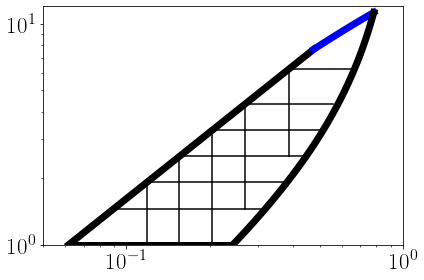

In [397]:

x1 = 1/2/M/8.604
x2 = 1/(5-M**2)
x3 = (10.604/8.604-1)/M*10.604* (1-np.cos(np.radians(35)))
x4 = (1-(4-M**2)/2/10.604/M)/(1+(4-M**2)/2/10.604**2/(1-np.cos(np.radians(35))))

l1 = np.linspace(x1, x3, 101)
plt.plot(l1, l1*2*M*(10.604-2), color = 'k', linewidth = 7)
l2 = np.linspace(x1, x2, 101)
plt.plot(l2, 1+l2*0, color = 'k', linewidth = 7)
l4 = np.linspace(x3, x4, 101)
plt.plot(l4, 2*10.604*M*l4/(1+M*l4/10.604/(1-np.cos(np.radians(35)))), color = 'b', linewidth = 7)
l4 = np.linspace(x2, x4, 101)
plt.plot(l4, (4 - M*M)*l4/(1 - l4), color = 'k', linewidth = 7)

k= 2*M*(np.sqrt(0.8**2+M**2)-M)
# x1 = 1/2/M/8.604
# x2 = 1/2/M/3
# x3 = 1-(4-M**2)/2/M/3
# x4 = 2*(1-np.sqrt((k-M**4+4*M**2)/k))/(M**4/k - 4*M**2/k)
# x5 = (-1+np.sqrt(1+4*M**2/k*(1+M/8.604/2)))/2/M**2*k
y1 = 1
y2 = 1.456
y3 = 2.510
y4 = 4.326
y5 = 9.015

c0 = y2/2/M/8.604
d0 = 1/(1+(4-M*M)/y2)
c1 = np.sqrt(y2*y3)/2/M/8.604
d1 = 1/(1+(4-M*M)/np.sqrt(y2*y3))
plt.plot(np.linspace(c1,c1, 101), np.linspace(y1, np.sqrt(y2*y3), 101), color='k')
c2 = y3/2/M/8.604
d2 =  1/(1+(4-M*M)/y3)
plt.plot(np.linspace(c2,c2, 101), np.linspace(y1, y3, 101), color='k')
c3 = np.sqrt(y3*y4)/2/M/8.604
d3 = 1/(1+(4-M*M)/np.sqrt(y3*y4))
plt.plot(np.linspace(c3,c3, 101), np.linspace(y1, np.sqrt(y3*y4), 101), color='k')
c4 = y4/2/M/8.604
d4 = x5
plt.plot(np.linspace(c4,c4, 101), np.linspace(y2, y4, 101), color='k')
c5 = np.sqrt(y4*y5)/2/M/8.604
d5 = 1/(1+(4-M*M)/np.sqrt(y4*y5))
plt.plot(np.linspace(c5,c5, 101), np.linspace(y3, np.sqrt(y4*y5), 101), color='k')
# plt.plot(np.linspace(x5,x5, 101), np.linspace(y4, np.sqrt(y4*y5), 101), color='k')

plt.plot(np.linspace(c0, d0, 101), np.linspace(y2, y2, 101), color='k')
plt.plot(np.linspace(c1, d1, 101), np.linspace(np.sqrt(y2*y3), np.sqrt(y2*y3), 101), color='k')
plt.plot(np.linspace(c2, d2, 101), np.linspace(y3, y3, 101), color='k')
plt.plot(np.linspace(c3, d3, 101), np.linspace(np.sqrt(y3*y4), np.sqrt(y3*y4), 101), color='k')
plt.plot(np.linspace(c4, d4, 101), np.linspace(y4, y4, 101), color='k')
plt.plot(np.linspace(c5, d5, 101), np.linspace(np.sqrt(y4*y5), np.sqrt(y4*y5), 101), color='k')


# plt.hist2d(epgExpOutb.xB, epgExpOutb.Q2, bins = 101, cmap = cmap, cmin = 1)
# plt.hist2d(epgExpOutb.loc[epgExpOutb.t1>epgExpOutb.tmin1].xB, epgExpOutb.loc[epgExpOutb.t1>epgExpOutb.tmin1].Q2, bins = 101, cmap = cmap, cmin = 1)
# plt.hist2d(dvcsSimOutb.xB, dvcsSimOutb.Q2, bins = 101, cmap = cmap, cmin = 1)
# plt.hist2d(dvcsSimInb.xB, dvcsSimInb.Q2, bins = 101, cmap = cmap, cmin = 1)
plt.xscale('log')
plt.yscale('log')
plt.xlim([0.05, 1])
plt.ylim([1, 12])
plt.show()

In [395]:
print(y1, y2, y3, y4, y5)

1 1.456 2.5099869839840707 4.325655565823319 9.014891678943144


In [326]:
dvcsSimInb.Etheta.max()

34.67423626011652

In [357]:
k= 2*M*(np.sqrt(0.8**2+M**2)-M)
x1 = 1/2/M/8.604
x2 = 1/2/M/3
x3 = 1-(4-M**2)/2/M/3
x4 = 2*(1-np.sqrt((k-M**4+4*M**2)/k))/(M**4/k - 4*M**2/k)
x5 = (-1+np.sqrt(1+4*M**2/k*(1+M/8.604/2)))/2/M**2*k
y1 = 1
y2 = 1.456
y3 = 6*M*x3
y4 = (4-M**2)*x4/(1-x4)
y5 = 2*M*8.604*x5

print(y1, y2, y3, y4, y5)

1 1.456 2.5099869839840707 4.325655565823319 9.014891678943144


<AxesSubplot:>

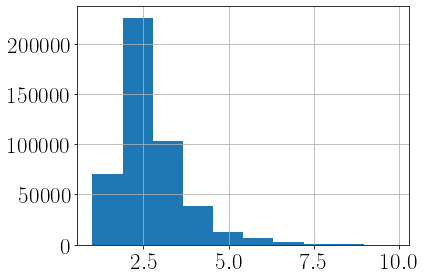

In [359]:
epgExpInb.Q2.hist()

In [28]:
PpEdges = [0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6]

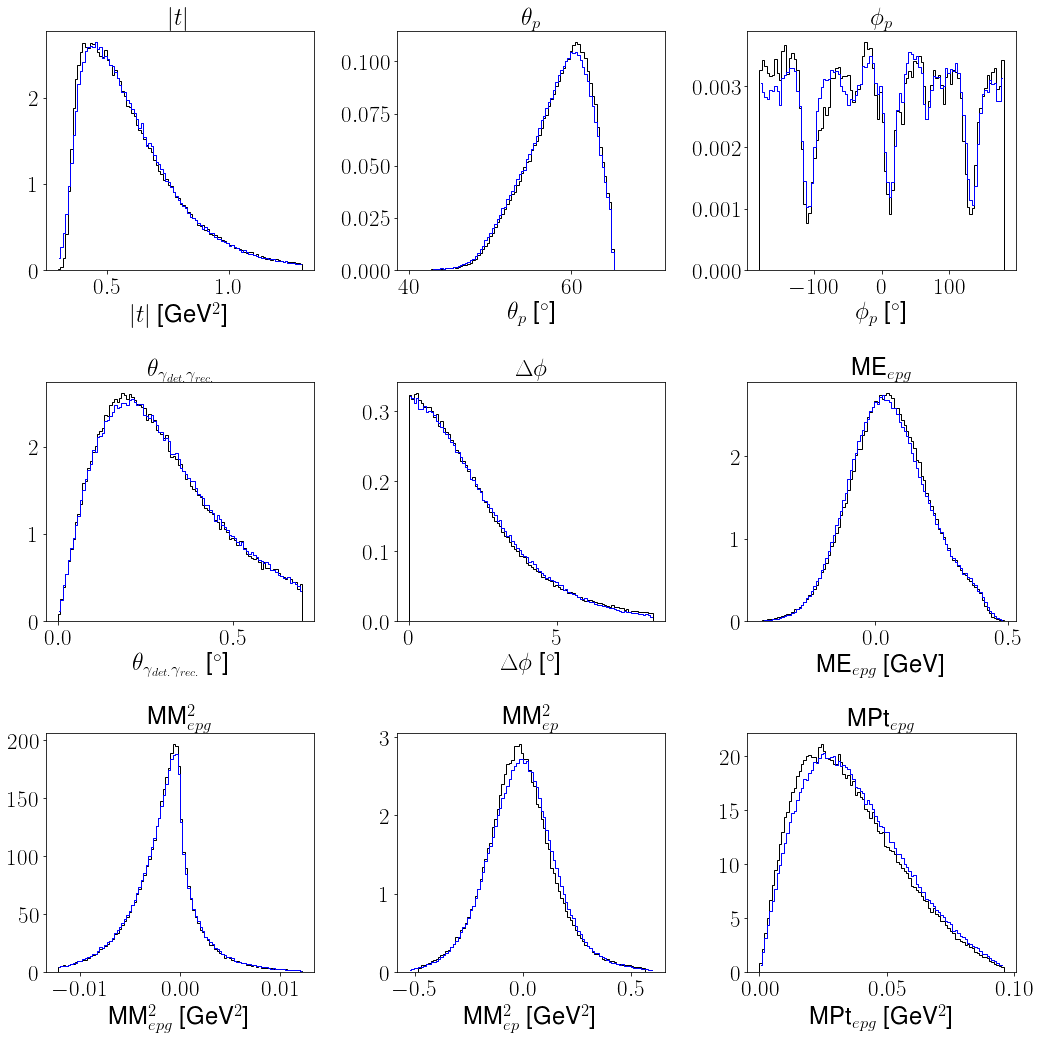

In [219]:
varstoplot = ["Pp", "Ptheta", "Pphi",  "reconGam", "coplanarity", "ME_epg", "MM2_epg", "MM2_ep", "MPt"]
title = [r"$|t|$", r"$\theta_{p}$", r"$\phi_{p}$", r"$\theta_{\gamma_{det.}\gamma_{rec.}}$", r"$\Delta\phi$" , "ME"+r"${}_{epg}$", "MM"+r"${}^{2}_{epg}$", "MM"+r"${}^{2}_{ep}$", "MPt"+r"${}_{epg}$"]
unit = [GeV2, degree, degree, degree, degree, GeV, GeV2, GeV2, GeV2, GeVc]
# binstarts = [PpMin, 0, -180, 0, 0, 0, -0.5, -0.01, 0.1, 0]
# binends = [GeMax, 7, 180, 30, 0.8, .1, 1.2, 0.01, 1.7, 10]
contInb = 0
fig, axs = plt.subplots(3, 3, figsize = (15,15))

i = 5
PpMin = 0#PpEdges[i]
PpMax = 1.6#PpEdges[i+1]
# sigma1s = [0.08, 0.07, 0.07, 0.075, 0.08, 0.1,  0.1,   0.1,  0.1,  0.1,  0.1, 0.09]
# sigma2s = [1.2,  0.8,  0.8,  0.5,   0.45, 0.45, 0.45, 0.45, 0.45, 0.45, 0.45, 0.45]
# sigma1 = sigma1s[i]
# sigma2 = sigma2s[i]
# print(PpEdges[i], sigma1, sigma2)
sigma1 = np.where(dvcsSimInbCDFT.Pp<PpCenters[5], cubic([0.0926, 0.137, -0.230, 0.139], dvcsSimInbCDFT.Pp), 0.1)
sigma2 = np.where(dvcsSimInbCDFT.Pp<1.34, cubic([-2.797, 9.351, -9.488, 3.503], dvcsSimInbCDFT.Pp), 0.85)
df1 = SmearingV1(dvcsSimInbCDFT, sigma1, sigma2, 0 )
df1 = saveDVCSvars(df1)
df1 = makeDVCS(df1)
df1 = df1.loc[(df1.Pp < PpMax) & (df1.Pp>PpMin)]
df3 = makeDVCS(epgExpInbCDFT, pol = "outbending")
df3 = df3.loc[(df3.Pp < PpMax) & (df3.Pp>PpMin), :]# df2 = SmearingV1(bkgSimInbCDFT, 0.08, 0.8, 0 )
# df2 = saveDVCSvars(df2)
# df2 = makeDVCS(df2)
# df2 = df2.loc[(df2.Pp < PpMax) & (df2.Pp>PpMin)]
for yind in range(0, 3):
    for xind in range(0,3):
        ind = 3*yind + xind
        if ind == 1:
            bins= np.linspace(40, 70, 101)
            simDist_dvcs, _ = np.histogram(df1.loc[:, varstoplot[ind]], bins, density = True)
        else:
            simDist_dvcs, bins = np.histogram(df1.loc[:, varstoplot[ind]], 100, density = True)
#         simDist_dvpi0, _ = np.histogram(df2[varstoplot[ind]], bins, density = True)
        simDist = simDist_dvcs# + contInb*simDist_dvpi0
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        axs[yind, xind].step(bincenters, simDist, where='mid',color='b', linewidth=1)
        axs[yind, xind].hist(df3.loc[:, varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', density=True, linewidth=1)
        axs[yind, xind].set_title(title[ind])
        # axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
plt.tight_layout()
# plt.savefig(outDir+"InbCDFT{}_{:.3f}_{:.3f}_{:.3f}.pdf".format(i, sigma1, sigma2, sigma3))
# plt.savefig(outDir+"InbCDFT{}_{:.3f}_{:.3f}.pdf".format(i, sigma1, sigma2))
# plt.savefig(outDir+"InbCDFT{}_{:.3f}.pdf".format(i, sigma2))
plt.show()



1.0 0.1 0.6


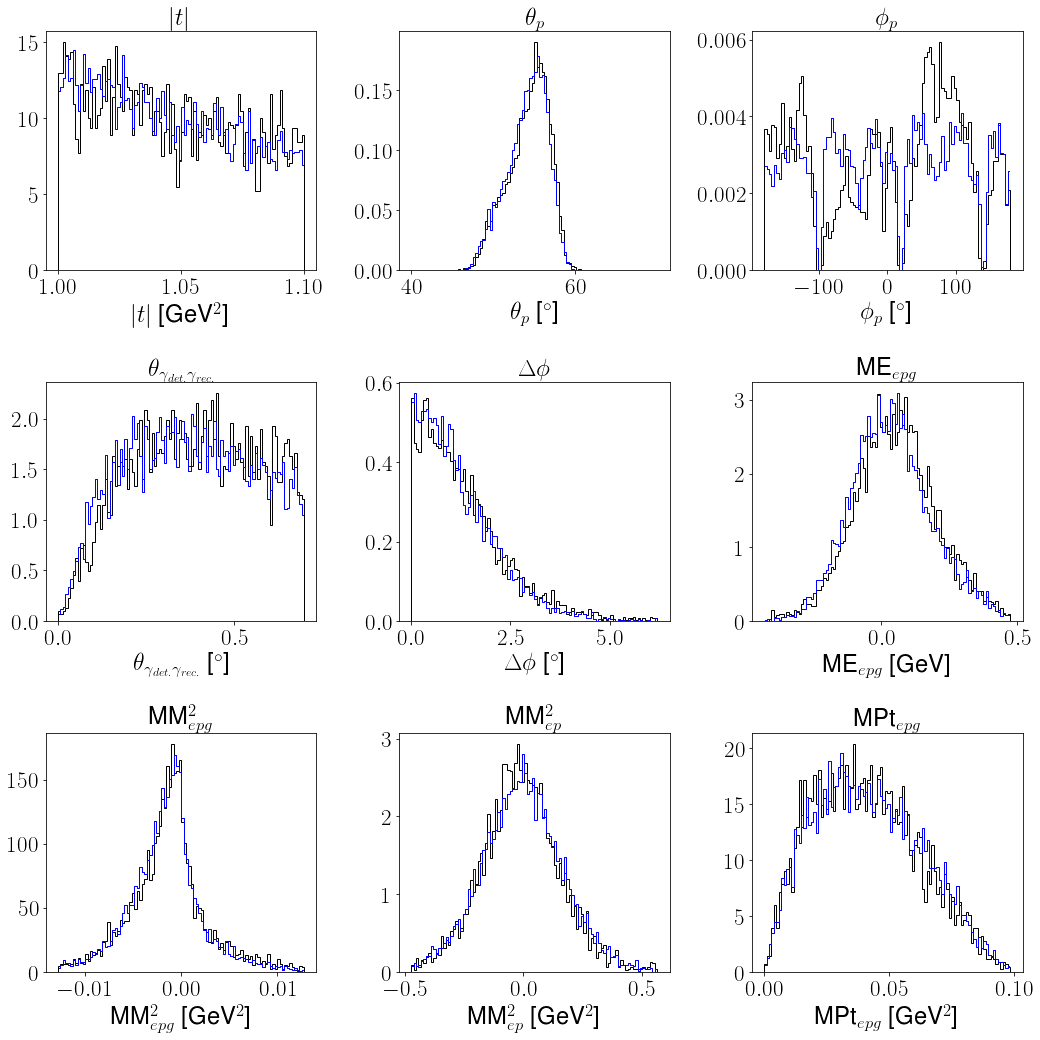

In [162]:
varstoplot = ["Pp", "Ptheta", "Pphi",  "reconGam", "coplanarity", "ME_epg", "MM2_epg", "MM2_ep", "MPt"]
title = [r"$|t|$", r"$\theta_{p}$", r"$\phi_{p}$", r"$\theta_{\gamma_{det.}\gamma_{rec.}}$", r"$\Delta\phi$" , "ME"+r"${}_{epg}$", "MM"+r"${}^{2}_{epg}$", "MM"+r"${}^{2}_{ep}$", "MPt"+r"${}_{epg}$"]
unit = [GeV2, degree, degree, degree, degree, GeV, GeV2, GeV2, GeV2, GeVc]
# binstarts = [PpMin, 0, -180, 0, 0, 0, -0.5, -0.01, 0.1, 0]
# binends = [GeMax, 7, 180, 30, 0.8, .1, 1.2, 0.01, 1.7, 10]
contOutb = 0
fig, axs = plt.subplots(3, 3, figsize = (15,15))

i = 7
PpMin = 0#PpEdges[i]
PpMax = 1.6#PpEdges[i+1]

sigma1s = [0.08, 0.07, 0.07, 0.075, 0.08, 0.1,  0.1,   0.1,  0.1,  0.1,  0.1, 0.1]
sigma2s = [1.2,  0.8,  0.8,  0.5,   0.45, 0.45, 0.45, 0.6, 0.8, 0.8, 0.6, 0.5]
sigma1 = sigma1s[i]
sigma2 = sigma2s[i]
print(PpEdges[i], sigma1, sigma2)
df1 = SmearingV1(dvcsSimOutbCDFT, sigma1, sigma2, 0 )
df1 = saveDVCSvars(df1)
df1 = makeDVCS(df1, pol = "outbending")
df1 = df1.loc[(df1.Pp < PpMax) & (df1.Pp>PpMin)]
df3 = makeDVCS(epgExpOutbCDFT, pol = "outbending")
df3 = df3.loc[(df3.Pp < PpMax) & (df3.Pp>PpMin), :]
# df2 = SmearingV1(bkgSimOutbCDFT, 0.08, 0.8, 0 )
# df2 = saveDVCSvars(df2)
# df2 = makeDVCS(df2)
# df2 = df2.loc[(df2.Pp < PpMax) & (df2.Pp>PpMin)]
for yind in range(0, 3):
    for xind in range(0,3):
        ind = 3*yind + xind
        if ind == 1:
            bins= np.linspace(40, 70, 101)
            simDist_dvcs, _ = np.histogram(df1.loc[:, varstoplot[ind]], bins, density = True)
        else:
            simDist_dvcs, bins = np.histogram(df1.loc[:, varstoplot[ind]], 100, density = True)
#         simDist_dvpi0, _ = np.histogram(df2[varstoplot[ind]], bins, density = True)
        simDist = simDist_dvcs# + contOutb*simDist_dvpi0
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        axs[yind, xind].step(bincenters, simDist, where='mid',color='b', linewidth=1)
        axs[yind, xind].hist(df3.loc[:, varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', density=True, linewidth=1)
        axs[yind, xind].set_title(title[ind])
        # axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
plt.tight_layout()
# plt.savefig(outDir+"OutbCDFT{}_{:.3f}_{:.3f}_{:.3f}.pdf".format(i, sigma1, sigma2, sigma3))
# plt.savefig(outDir+"OutbCDFT{}_{:.3f}_{:.3f}.pdf".format(i, sigma1, sigma2))
# plt.savefig(outDir+"OutbCDFT{}_{:.3f}.pdf".format(i, sigma2))
plt.show()



In [53]:
def saveDVpi0Pvars(df):
    #set up pi0 variables
    df_epgg = copy(df)

    # useful objects
    ele = [df_epgg['Epx'], df_epgg['Epy'], df_epgg['Epz']]
    df_epgg.loc[:, 'Ep'] = mag(ele)
    df_epgg.loc[:, 'Ee'] = getEnergy(ele, me)
    df_epgg.loc[:, 'Etheta'] = getTheta(ele)
    df_epgg.loc[:, 'Ephi'] = getPhi(ele)

    pro = [df_epgg['Ppx'], df_epgg['Ppy'], df_epgg['Ppz']]

    gam = [df_epgg['Gpx'], df_epgg['Gpy'], df_epgg['Gpz']]
    df_epgg.loc[:, 'Gp'] = mag(gam)
    df_epgg.loc[:, 'Ge'] = getEnergy(gam, 0)
    df_epgg.loc[:, 'Gtheta'] = getTheta(gam)
    df_epgg.loc[:, 'Gphi'] = getPhi(gam)

    gam2 = [df_epgg['Gpx2'], df_epgg['Gpy2'], df_epgg['Gpz2']]
    df_epgg.loc[:, 'Gp2'] = mag(gam2)
    df_epgg.loc[:,'Ge2'] = getEnergy(gam2, 0)
    df_epgg.loc[:, 'Gtheta2'] = getTheta(gam2)
    df_epgg.loc[:, 'Gphi2'] = getPhi(gam2)

    pi0 = vecAdd(gam, gam2)
    VGS = [-df_epgg['Epx'], -df_epgg['Epy'], pbeam - df_epgg['Epz']]
    v3l = cross(beam, ele)
    v3h = cross(pro, VGS)
    v3g = cross(VGS, gam)
    v3pi0 = cross(VGS, pi0)

    VmissPi0 = [-df_epgg["Epx"] - df_epgg["Ppx"], -df_epgg["Epy"] -
                df_epgg["Ppy"], pbeam - df_epgg["Epz"] - df_epgg["Ppz"]]
    VmissP = [-df_epgg["Epx"] - df_epgg["Gpx"] - df_epgg["Gpx2"], -df_epgg["Epy"] -
                df_epgg["Gpy"] - df_epgg["Gpy2"], pbeam - df_epgg["Epz"] - df_epgg["Gpz"] - df_epgg["Gpz2"]]
    Vmiss = [-df_epgg["Epx"] - df_epgg["Ppx"] - df_epgg["Gpx"] - df_epgg["Gpx2"],
                -df_epgg["Epy"] - df_epgg["Ppy"] - df_epgg["Gpy"] - df_epgg["Gpy2"],
                pbeam - df_epgg["Epz"] - df_epgg["Ppz"] - df_epgg["Gpz"] - df_epgg["Gpz2"]]
    costheta = cosTheta(VGS, gam)

    df_epgg.loc[:, 'Mpx'], df_epgg.loc[:, 'Mpy'], df_epgg.loc[:, 'Mpz'] = Vmiss

    # binning kinematics
    df_epgg.loc[:,'Q2'] = -((ebeam - df_epgg['Ee'])**2 - mag2(VGS))
    df_epgg.loc[:,'nu'] = (ebeam - df_epgg['Ee'])
    df_epgg.loc[:,'xB'] = df_epgg['Q2'] / 2.0 / M / df_epgg['nu']
    df_epgg.loc[:,'t1'] = 2 * M * (df_epgg['Pe'] - M)
    df_epgg.loc[:,'t2'] = (M * df_epgg['Q2'] + 2 * M * df_epgg['nu'] * (df_epgg['nu'] - np.sqrt(df_epgg['nu'] * df_epgg['nu'] + df_epgg['Q2']) * costheta))\
    / (M + df_epgg['nu'] - np.sqrt(df_epgg['nu'] * df_epgg['nu'] + df_epgg['Q2']) * costheta)
    df_epgg.loc[:,'W'] = np.sqrt(np.maximum(0, (ebeam + M - df_epgg['Ee'])**2 - mag2(VGS)))
    df_epgg.loc[:,'MPt'] = np.sqrt((df_epgg["Epx"] + df_epgg["Ppx"] + df_epgg["Gpx"] + df_epgg["Gpx2"])**2 +
                             (df_epgg["Epy"] + df_epgg["Ppy"] + df_epgg["Gpy"] + df_epgg["Gpy2"])**2)
    # trento angles
    df_epgg.loc[:,'phi1'] = angle(v3l, v3h)
    df_epgg.loc[:,'phi1'] = np.where(dot(v3l, pro) > 0, 360.0 -
                              df_epgg['phi1'], df_epgg['phi1'])
    df_epgg.loc[:,'phi2'] = angle(v3l, v3g)
    df_epgg.loc[:,'phi2'] = np.where(dot(v3l, gam) <
                              0, 360.0 - df_epgg['phi2'], df_epgg['phi2'])

    # exclusivity variables
    df_epgg.loc[:,'MM2_ep'] = (-M - ebeam + df_epgg["Ee"] +
                         df_epgg["Pe"])**2 - mag2(VmissPi0)
    df_epgg.loc[:,'MM2_egg'] = (-M - ebeam + df_epgg["Ee"] +
                         df_epgg["Ge"] + df_epgg["Ge2"])**2 - mag2(VmissP)
    df_epgg.loc[:,'MM2_epgg'] = (-M - ebeam + df_epgg["Ee"] + df_epgg["Pe"] +
                         df_epgg["Ge"] + df_epgg["Ge2"])**2 - mag2(Vmiss)
    df_epgg.loc[:,'ME_epgg'] = (M + ebeam - df_epgg["Ee"] - df_epgg["Pe"] - df_epgg["Ge"] - df_epgg["Ge2"])
    df_epgg.loc[:,'Mpi0'] = pi0InvMass(gam, gam2)
    df_epgg.loc[:,'reconPi'] = angle(VmissPi0, pi0)
    df_epgg.loc[:,"Pie"] = df_epgg['Ge'] + df_epgg['Ge2']
    df_epgg.loc[:,'coplanarity'] = angle(v3h, v3pi0)
    df_epgg.loc[:,'coneAngle1'] = angle(ele, gam)
    df_epgg.loc[:,'coneAngle2'] = angle(ele, gam2)

    df_epgg.loc[:, "closeness"] = np.abs(df_epgg.loc[:, "Mpi0"] - .1349766)

    return df_epgg
def makeDVpi0P(df, pol = "inbending"):
    #make dvpi0 pairs
    df_dvpi0p = copy(df)

    #common cuts
    cut_xBupper = df_dvpi0p.loc[:, "xB"] < 1  # xB
    cut_xBlower = df_dvpi0p.loc[:, "xB"] > 0  # xB
    cut_Q2 = df_dvpi0p.loc[:, "Q2"] > 1  # Q2
    cut_W = df_dvpi0p.loc[:, "W"] > 2  # W
    cut_Ee = df_dvpi0p["Ee"] > 2  # Ee
    cut_Ge2 = df_dvpi0p["Ge2"] > 0.6  # Ge cut. Ge>3 for DVCS module.
    cut_Esector = (df_dvpi0p["Esector"]!=df_dvpi0p["Gsector"]) & (df_dvpi0p["Esector"]!=df_dvpi0p["Gsector2"])
    cut_Psector = ~( ((df_dvpi0p["Pstat"]//10)%10>0) & (df_dvpi0p["Psector"]==df_dvpi0p["Gsector"]) ) & ~( ((df_dvpi0p["Pstat"]//10)%10>0) & (df_dvpi0p["Psector"]==df_dvpi0p["Gsector2"]) )
    cut_Ppmax = df_dvpi0p.Pp < 2  # Pp
    # cut_Vz = np.abs(df_dvcs["Evz"] - df_dvcs["Pvz"]) < 2.5 + 2.5 / mag([df_dvcs["Ppx"], df_dvcs["Ppy"], df_dvcs["Ppz"]])
    cut_common = cut_xBupper & cut_xBlower & cut_Q2 & cut_W & cut_Ee & cut_Ge2 & cut_Esector & cut_Psector & cut_Ppmax

    df_dvpi0p = df_dvpi0p[cut_common]

    # proton reconstruction quality
    # cut_FD_proton = (df_epgg.loc[:, "Psector"]<7) & (df_epgg.loc[:, "Ptheta"]<35)
    # cut_CD_proton = (df_epgg.loc[:, "Psector"]>7) & (df_epgg.loc[:, "Ptheta"]>45) & (df_epgg.loc[:, "Ptheta"]<65)
    # cut_proton = (cut_FD_proton)|(cut_CD_proton)
    cut_proton = 1

    df_dvpi0p.loc[:, "config"] = 0

    if pol == "inbending":
        #CDFT
        cut_Pp1_CDFT = df_dvpi0p.Pp > 0.3  # Pp
        cut_Psector_CDFT = df_dvpi0p.Psector>7
        cut_Ptheta_CDFT = df_dvpi0p.Ptheta<65
        cut_Gsector_CDFT = df_dvpi0p.Gsector>7
        cut_GFid2_CDFT = df_dvpi0p.GFid2==1
        cut_mpi01_CDFT = df_dvpi0p["Mpi0"] < 0.149#0.157  # mpi0
        cut_mpi02_CDFT = df_dvpi0p["Mpi0"] > 0.126#0.118  # mpi0
        cut_mmep1_CDFT = df_dvpi0p["MM2_ep"] < 0.610#0.914  # mmep
        cut_mmep2_CDFT = df_dvpi0p["MM2_ep"] > -0.384#-0.715  # mmep
        cut_mmegg1_CDFT = df_dvpi0p["MM2_egg"] < 1.641#2.155  # mmegg
        cut_mmegg2_CDFT = df_dvpi0p["MM2_egg"] > 0.0974#-0.417  # mmegg
        cut_meepgg1_CDFT = df_dvpi0p["ME_epgg"] < 0.481#0.799  # meepgg
        cut_meepgg2_CDFT = df_dvpi0p["ME_epgg"] > -0.474#-0.792  # meepgg
        cut_mpt_CDFT = df_dvpi0p["MPt"] < 0.189  # mpt
        cut_recon_CDFT = df_dvpi0p["reconPi"] < 1.468  # recon gam angle
        cut_coplanarity_CDFT = df_dvpi0p["coplanarity"] < 15.431  # coplanarity angle
        cut_mmepgg1_CDFT = np.abs(df_dvpi0p["MM2_epgg"]) < 0.0440  # mmepgg
        cut_mmepgg2_CDFT = np.abs(df_dvpi0p["MM2_epgg"]) > -0.0478  # mmepgg

        cut_CDFT = (cut_Pp1_CDFT & cut_Psector_CDFT & cut_Ptheta_CDFT & cut_Gsector_CDFT & cut_GFid2_CDFT &
                    cut_mmep1_CDFT & cut_mmep2_CDFT & cut_mpi01_CDFT & cut_mpi02_CDFT & 
                    cut_mmegg1_CDFT & cut_mmegg2_CDFT & cut_meepgg1_CDFT & cut_meepgg2_CDFT &
                    cut_mpt_CDFT & cut_recon_CDFT & cut_coplanarity_CDFT & cut_mmepgg1_CDFT & cut_mmepgg2_CDFT)


        #CD
        cut_Pp1_CD = df_dvpi0p.Pp > 0.3  # Pp
        cut_Psector_CD = df_dvpi0p.Psector>7
        cut_Ptheta_CD = df_dvpi0p.Ptheta<65
        cut_Gsector_CD = df_dvpi0p.Gsector<7
        cut_Gsector2_CD = df_dvpi0p.Gsector2<7
        cut_GFid_CD = df_dvpi0p.GFid==1
        cut_GFid2_CD = df_dvpi0p.GFid2==1
        cut_mpi01_CD = df_dvpi0p["Mpi0"] < 0.162  # mpi0
        cut_mpi02_CD = df_dvpi0p["Mpi0"] > 0.107  # mpi0
        cut_mmep1_CD = df_dvpi0p["MM2_ep"] < 0.354  # mmep
        cut_mmep2_CD = df_dvpi0p["MM2_ep"] > -0.283  # mmep
        cut_mmegg1_CD = df_dvpi0p["MM2_egg"] < 1.922  # mmegg
        cut_mmegg2_CD = df_dvpi0p["MM2_egg"] > 0.007  # mmegg
        cut_meepgg1_CD = df_dvpi0p["ME_epgg"] < 0.822  # meepgg
        cut_meepgg2_CD = df_dvpi0p["ME_epgg"] > -0.677  # meepgg
        cut_mpt_CD = df_dvpi0p["MPt"] < 0.176  # mpt
        cut_recon_CD = df_dvpi0p["reconPi"] < 1.476  # recon gam angle
        cut_coplanarity_CD = df_dvpi0p["coplanarity"] < 10.203  # coplanarity angle
        cut_mmepgg1_CD = np.abs(df_dvpi0p["MM2_epgg"]) < 0.0208  # mmepgg
        cut_mmepgg2_CD = np.abs(df_dvpi0p["MM2_epgg"]) > -0.0250  # mmepgg

        cut_CD = (cut_Pp1_CD & cut_Psector_CD & cut_Ptheta_CD & cut_Gsector_CD & cut_Gsector2_CD & 
                    cut_GFid_CD & cut_GFid2_CD &
                    cut_mmep1_CD & cut_mmep2_CD & cut_mpi01_CD & cut_mpi02_CD & 
                    cut_mmegg1_CD & cut_mmegg2_CD & cut_meepgg1_CD & cut_meepgg2_CD &
                    cut_mpt_CD & cut_recon_CD & cut_coplanarity_CD & cut_mmepgg1_CD & cut_mmepgg2_CD)

        #FD
        cut_Pp1_FD = df_dvpi0p.Pp > 0.42  # Pp
        cut_Psector_FD = df_dvpi0p.Psector<7
        cut_Ptheta_FD = df_dvpi0p.Ptheta>2.477
        cut_Gsector_FD = df_dvpi0p.Gsector<7
        cut_Gsector2_FD = df_dvpi0p.Gsector2<7
        cut_GFid_FD = df_dvpi0p.GFid==1
        cut_GFid2_FD = df_dvpi0p.GFid2==1
        cut_mpi01_FD = df_dvpi0p["Mpi0"] < 0.178  # mpi0
        cut_mpi02_FD = df_dvpi0p["Mpi0"] > 0.0910  # mpi0
        cut_mmep1_FD = df_dvpi0p["MM2_ep"] < 0.335  # mmep
        cut_mmep2_FD = df_dvpi0p["MM2_ep"] > -0.271  # mmep
        cut_mmegg1_FD = df_dvpi0p["MM2_egg"] < 1.762  # mmegg
        cut_mmegg2_FD = df_dvpi0p["MM2_egg"] > 0.117  # mmegg
        cut_meepgg1_FD = df_dvpi0p["ME_epgg"] < 0.816 # meepgg
        cut_meepgg2_FD = df_dvpi0p["ME_epgg"] > -0.685  # meepgg
        cut_mpt_FD = df_dvpi0p["MPt"] < 0.180  # mpt
        cut_recon_FD = df_dvpi0p["reconPi"] < 1.363  # recon gam angle
        cut_coplanarity_FD = df_dvpi0p["coplanarity"] < 9.190  # coplanarity angle
        cut_mmepgg1_FD = np.abs(df_dvpi0p["MM2_epgg"]) < 0.0189  # mmepgg
        cut_mmepgg2_FD = np.abs(df_dvpi0p["MM2_epgg"]) > -0.0224  # mmepgg

        cut_FD = (cut_Pp1_FD & cut_Psector_FD & cut_Ptheta_FD & cut_Gsector_FD & cut_Gsector2_FD &
                    cut_GFid_FD & cut_GFid2_FD &
                    cut_mmep1_FD & cut_mmep2_FD & cut_mpi01_FD & cut_mpi02_FD & 
                    cut_mmegg1_FD & cut_mmegg2_FD & cut_meepgg1_FD & cut_meepgg2_FD &
                    cut_mpt_FD & cut_recon_FD & cut_coplanarity_FD & cut_mmepgg1_FD & cut_mmepgg2_FD)

    elif pol == "outbending":
        #CDFT
        cut_Pp1_CDFT = df_dvpi0p.Pp > 0.3  # Pp
        cut_Psector_CDFT = df_dvpi0p.Psector>7
        cut_Ptheta_CDFT = df_dvpi0p.Ptheta<65
        cut_Gsector_CDFT = df_dvpi0p.Gsector>7
        cut_GFid2_CDFT = df_dvpi0p.GFid2==1
        cut_mpi01_CDFT = df_dvpi0p["Mpi0"] < 0.151#0.160  # mpi0
        cut_mpi02_CDFT = df_dvpi0p["Mpi0"] > 0.124#0.115  # mpi0
        cut_mmep1_CDFT = df_dvpi0p["MM2_ep"] < 0.575#0.892  # mmep
        cut_mmep2_CDFT = df_dvpi0p["MM2_ep"] > -0.378#-0.694  # mmep
        cut_mmegg1_CDFT = df_dvpi0p["MM2_egg"] < 1.665#2.184  # mmegg
        cut_mmegg2_CDFT = df_dvpi0p["MM2_egg"] > 0.107#-0.412  # mmegg
        cut_meepgg1_CDFT = df_dvpi0p["ME_epgg"] < 0.514#0.844  # meepgg
        cut_meepgg2_CDFT = df_dvpi0p["ME_epgg"] > -0.476#-0.806  # meepgg
        cut_mpt_CDFT = df_dvpi0p["MPt"] < 0.146#0.210  # mpt
        cut_recon_CDFT = df_dvpi0p["reconPi"] < 1.114#1.630  # recon gam angle
        cut_coplanarity_CDFT = df_dvpi0p["coplanarity"] < 10.69#17.817  # coplanarity angle
        cut_mmepgg1_CDFT = np.abs(df_dvpi0p["MM2_epgg"]) < 0.0324#0.0549  # mmepgg
        cut_mmepgg2_CDFT = np.abs(df_dvpi0p["MM2_epgg"]) > -0.035#-0.0575  # mmepgg

        cut_CDFT = (cut_Pp1_CDFT & cut_Psector_CDFT & cut_Ptheta_CDFT & cut_Gsector_CDFT & cut_GFid2_CDFT &
                    cut_mmep1_CDFT & cut_mmep2_CDFT & cut_mpi01_CDFT & cut_mpi02_CDFT & 
                    cut_mmegg1_CDFT & cut_mmegg2_CDFT & cut_meepgg1_CDFT & cut_meepgg2_CDFT &
                    cut_mpt_CDFT & cut_recon_CDFT & cut_coplanarity_CDFT & cut_mmepgg1_CDFT & cut_mmepgg2_CDFT)


        #CD
        cut_Pp1_CD = df_dvpi0p.Pp > 0.3  # Pp
        cut_Psector_CD = df_dvpi0p.Psector>7
        cut_Ptheta_CD = df_dvpi0p.Ptheta<65
        cut_Gsector_CD = df_dvpi0p.Gsector<7
        cut_Gsector2_CD = df_dvpi0p.Gsector2<7
        cut_GFid_CD = df_dvpi0p.GFid==1
        cut_GFid2_CD = df_dvpi0p.GFid2==1
        cut_mpi01_CD = df_dvpi0p["Mpi0"] < 0.163  # mpi0
        cut_mpi02_CD = df_dvpi0p["Mpi0"] > 0.106  # mpi0
        cut_mmep1_CD = df_dvpi0p["MM2_ep"] < 0.294  # mmep
        cut_mmep2_CD = df_dvpi0p["MM2_ep"] > -0.218  # mmep
        cut_mmegg1_CD = df_dvpi0p["MM2_egg"] < 1.876  # mmegg
        cut_mmegg2_CD = df_dvpi0p["MM2_egg"] > -0.0142  # mmegg
        cut_meepgg1_CD = df_dvpi0p["ME_epgg"] < 0.700  # meepgg
        cut_meepgg2_CD = df_dvpi0p["ME_epgg"] > -0.597  # meepgg
        cut_mpt_CD = df_dvpi0p["MPt"] < 0.194  # mpt
        cut_recon_CD = df_dvpi0p["reconPi"] < 1.761  # recon gam angle
        cut_coplanarity_CD = df_dvpi0p["coplanarity"] < 9.530  # coplanarity angle
        cut_mmepgg1_CD = np.abs(df_dvpi0p["MM2_epgg"]) < 0.0182  # mmepgg
        cut_mmepgg2_CD = np.abs(df_dvpi0p["MM2_epgg"]) > -0.0219  # mmepgg

        cut_CD = (cut_Pp1_CD & cut_Psector_CD & cut_Ptheta_CD & cut_Gsector_CD & cut_Gsector2_CD & 
                    cut_GFid_CD & cut_GFid2_CD &
                    cut_mmep1_CD & cut_mmep2_CD & cut_mpi01_CD & cut_mpi02_CD & 
                    cut_mmegg1_CD & cut_mmegg2_CD & cut_meepgg1_CD & cut_meepgg2_CD &
                    cut_mpt_CD & cut_recon_CD & cut_coplanarity_CD & cut_mmepgg1_CD & cut_mmepgg2_CD)

        #FD
        cut_Pp1_FD = df_dvpi0p.Pp > 0.5  # Pp
        cut_Psector_FD = df_dvpi0p.Psector<7
        cut_Ptheta_FD = df_dvpi0p.Ptheta>2.477
        cut_Gsector_FD = df_dvpi0p.Gsector<7
        cut_Gsector2_FD = df_dvpi0p.Gsector2<7
        cut_GFid_FD = df_dvpi0p.GFid==1
        cut_GFid2_FD = df_dvpi0p.GFid2==1
        cut_mpi01_FD = df_dvpi0p["Mpi0"] < 0.164  # mpi0
        cut_mpi02_FD = df_dvpi0p["Mpi0"] > 0.105  # mpi0
        cut_mmep1_FD = df_dvpi0p["MM2_ep"] < 0.323  # mmep
        cut_mmep2_FD = df_dvpi0p["MM2_ep"] > -0.256  # mmep
        cut_mmegg1_FD = df_dvpi0p["MM2_egg"] < 1.828  # mmegg
        cut_mmegg2_FD = df_dvpi0p["MM2_egg"] > 0.0491  # mmegg
        cut_meepgg1_FD = df_dvpi0p["ME_epgg"] < 0.754  # meepgg
        cut_meepgg2_FD = df_dvpi0p["ME_epgg"] > -0.583  # meepgg
        cut_mpt_FD = df_dvpi0p["MPt"] < 0.177  # mpt
        cut_recon_FD = df_dvpi0p["reconPi"] < 1.940  # recon gam angle
        cut_coplanarity_FD = df_dvpi0p["coplanarity"] < 7.498  # coplanarity angle
        cut_mmepgg1_FD = np.abs(df_dvpi0p["MM2_epgg"]) < 0.0195  # mmepgg
        cut_mmepgg2_FD = np.abs(df_dvpi0p["MM2_epgg"]) > -0.0240  # mmepgg

        cut_FD = (cut_Pp1_FD & cut_Psector_FD & cut_Ptheta_FD & cut_Gsector_FD & cut_Gsector2_FD &
                    cut_GFid_FD & cut_GFid2_FD &
                    cut_mmep1_FD & cut_mmep2_FD & cut_mpi01_FD & cut_mpi02_FD & 
                    cut_mmegg1_FD & cut_mmegg2_FD & cut_meepgg1_FD & cut_meepgg2_FD &
                    cut_mpt_FD & cut_recon_FD & cut_coplanarity_FD & cut_mmepgg1_FD & cut_mmepgg2_FD)

    df_dvpi0p.loc[cut_CDFT, "config"] = 3
    df_dvpi0p.loc[cut_CD, "config"] = 2
    df_dvpi0p.loc[cut_FD, "config"] = 1

    df_dvpi0p = df_dvpi0p[df_dvpi0p.config>0]

    #For an event, there can be two gg's passed conditions above.
    #Take only one gg's that makes pi0 invariant mass
    #This case is very rare.
    #For now, duplicated proton is not considered.
    df_dvpi0p = df_dvpi0p.sort_values(by=['closeness', 'Psector', 'Gsector'], ascending = [True, True, True])
    df_dvpi0p = df_dvpi0p.loc[~df_dvpi0p.event.duplicated(), :]
    df_dvpi0p = df_dvpi0p.sort_values(by='event')        
    return df_dvpi0p #done with saving x


1.5 0.1 0.85


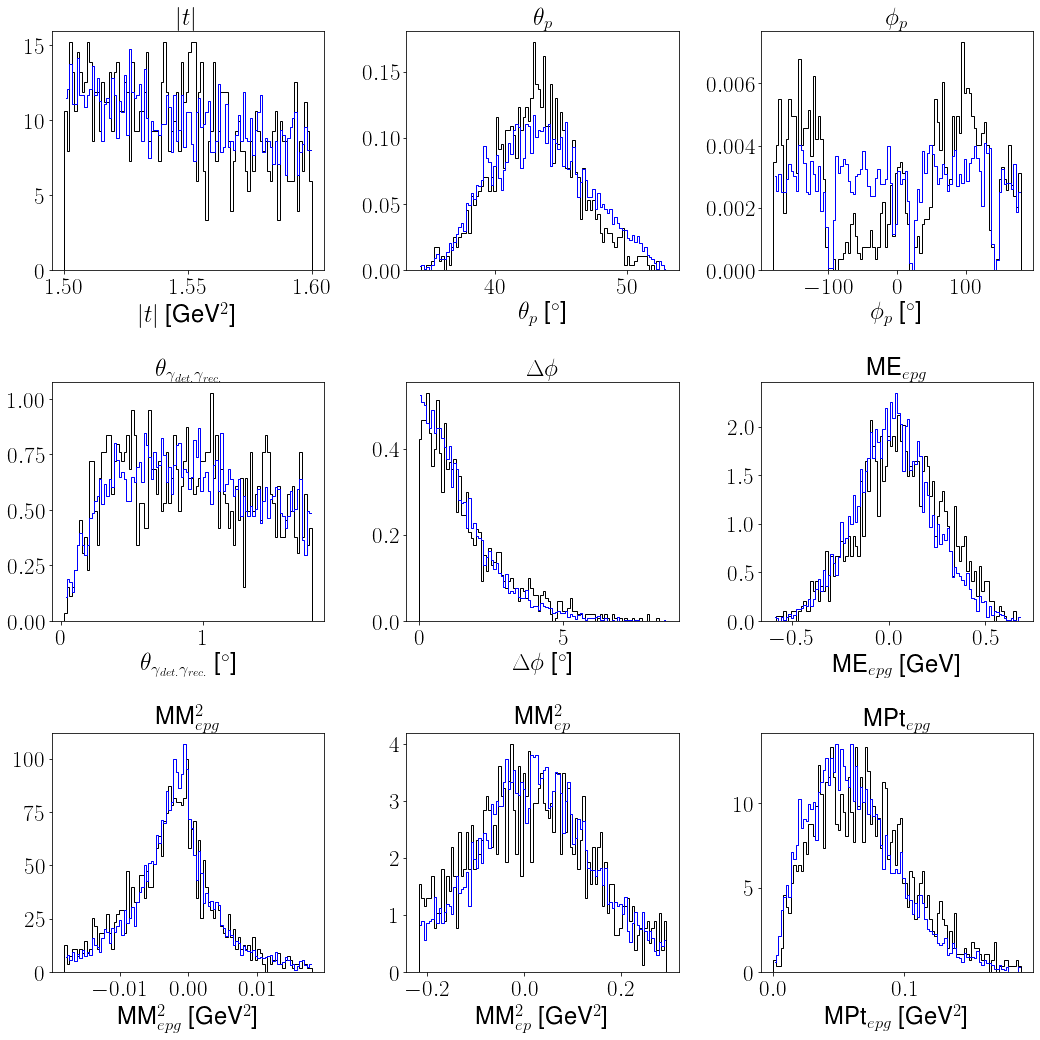

In [173]:
varstoplot = ["Pp", "Ptheta", "Pphi",  "reconPi", "coplanarity", "ME_epgg", "MM2_epgg", "MM2_ep", "MPt"]
title = [r"$|t|$", r"$\theta_{p}$", r"$\phi_{p}$", r"$\theta_{\gamma_{det.}\gamma_{rec.}}$", r"$\Delta\phi$" , "ME"+r"${}_{epg}$", "MM"+r"${}^{2}_{epg}$", "MM"+r"${}^{2}_{ep}$", "MPt"+r"${}_{epg}$"]
unit = [GeV2, degree, degree, degree, degree, GeV, GeV2, GeV2, GeV2, GeVc]
# binstarts = [PpMin, 0, -180, 0, 0, 0, -0.5, -0.01, 0.1, 0]
# binends = [GeMax, 7, 180, 30, 0.8, .1, 1.2, 0.01, 1.7, 10]
contOutb = 0
fig, axs = plt.subplots(3, 3, figsize = (15,15))

i = 12
PpMin = PpEdges[i]
PpMax = PpEdges[i+1]

sigma1s = [0.08, 0.07, 0.07, 0.075, 0.08, 0.1,  0.1,   0.1,  0.1,  0.1,  0.1,   0.1,  0.1,  0.1]
sigma2s = [1.2,  0.8,  0.8,  0.5,   0.45, 0.45, 0.45,  0.6,  0.8,  0.8,  0.85, 0.85, 0.85, 0.85]
sigma1 = sigma1s[i]
sigma2 = sigma2s[i]
print(PpEdges[i], sigma1, sigma2)
df1 = SmearingV1(pi0SimOutbCD, sigma1, sigma2, 0 )
df1 = saveDVpi0Pvars(df1)
df1 = makeDVpi0P(df1, pol = "outbending")
df1 = df1.loc[(df1.Pp < PpMax) & (df1.Pp>PpMin)]
df3 = makeDVpi0P(pi0ExpOutbCD, pol = "outbending")
df3 = df3.loc[(df3.Pp < PpMax) & (df3.Pp>PpMin), :]
# df2 = SmearingV1(bkgSimOutbCDFT, 0.08, 0.8, 0 )
# df2 = saveDVCSvars(df2)
# df2 = makeDVCS(df2)
# df2 = df2.loc[(df2.Pp < PpMax) & (df2.Pp>PpMin)]
for yind in range(0, 3):
    for xind in range(0,3):
        ind = 3*yind + xind
        if ind == 1:
            bins= np.linspace(40, 70, 101)
            simDist, bins = np.histogram(df1.loc[:, varstoplot[ind]], 100, density = True)
        else:
            simDist, bins = np.histogram(df1.loc[:, varstoplot[ind]], 100, density = True)
        simDist = simDist
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        axs[yind, xind].step(bincenters, simDist, where='mid',color='b', linewidth=1)
        axs[yind, xind].hist(df3.loc[:, varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', density=True, linewidth=1)
        axs[yind, xind].set_title(title[ind])
        # axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
plt.tight_layout()
# plt.savefig(outDir+"OutbCDFT{}_{:.3f}_{:.3f}_{:.3f}.pdf".format(i, sigma1, sigma2, sigma3))
# plt.savefig(outDir+"OutbCDFT{}_{:.3f}_{:.3f}.pdf".format(i, sigma1, sigma2))
# plt.savefig(outDir+"OutbCDFT{}_{:.3f}.pdf".format(i, sigma2))
plt.show()



<AxesSubplot:>

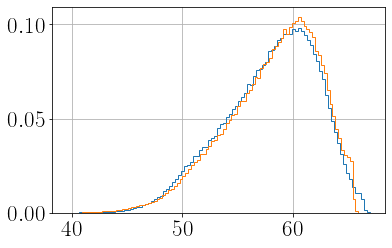

In [102]:
dvcsSimInbCDFT.Ptheta.hist(bins = 101, density = True, histtype = 'step')
epgExpInbCDFT.Ptheta.hist(bins = 101, density = True, histtype = 'step')

<AxesSubplot:>

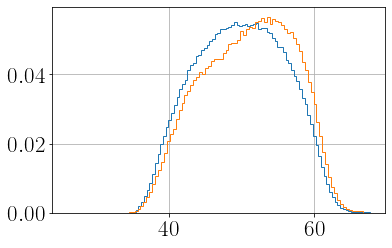

In [104]:
dvcsSimOutbCD.Ptheta.hist(bins = 101, density = True, histtype = 'step')
epgExpOutbCD.Ptheta.hist(bins = 101, density = True, histtype = 'step')

In [172]:
len(PpEdges)

14

In [139]:
len(pi0ExpInbCDFT)

7394

<AxesSubplot:>

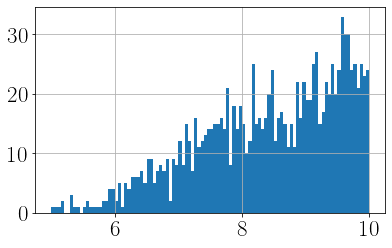

In [236]:
dvcsSimInb.loc[dvcsSimInb.config==1].Ptheta.hist(bins = np.linspace(5, 10, 101))

In [473]:
PpEdges = [0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6]
PpCenters = (np.array(PpEdges[1:]) + np.array(PpEdges[:-1]))/2

In [474]:
sigma1s = [0.08, 0.07, 0.07, 0.075, 0.08, 0.1,  0.1,   0.1,  0.1,  0.1,  0.1,   0.1,  0.1]
sigma2s = [1.2,  0.8,  0.8,  0.5,   0.45, 0.45, 0.45,  0.6,  0.8,  0.8,  0.85, 0.85, 0.85]

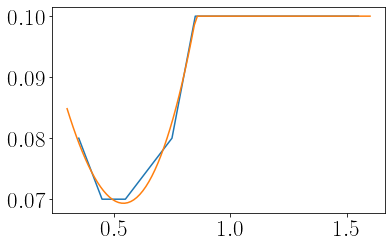

In [476]:
plt.plot(PpCenters, sigma1s)
plt.plot(x, np.where(x<0.85, cubic([0.0926, 0.137, -0.230, 0.139], x), 0.1))


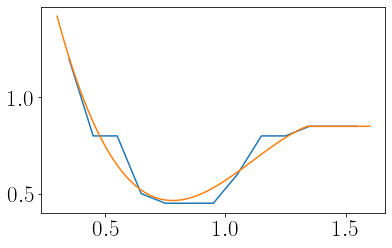

In [475]:
plt.plot(PpCenters, sigma2s)
x  = np.linspace(0.3, 1.6, 101)
plt.plot(x, np.where(x<1.34, cubic([-2.797, 9.351, -9.488, 3.503], x), 0.85))
# plt.axhline(0.85)

In [186]:
res_lsq = least_squares(cubicfit, [1,1, 4, 1], args=(PpCenters, sigma2s))
print(res_lsq.x)

[-2.79720278  9.3506493  -9.48801194  3.50297201]


In [200]:
cubic([-2.797, 9.351, -9.488, 3.503], 1.34)

0.849862712000002

In [211]:
res_lsq = least_squares(cubicfit, [1,1, 4, 1], args=(PpCenters[:6], sigma1s[:6]))
print(res_lsq.x)

[ 0.09259263  0.13690469 -0.23039017  0.1392609 ]


In [220]:
print(PpCenters[5])

0.8500000000000001


In [328]:
PpEdges_inb = [0.42, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6]
PpCenters_inb = np.array([0.5 * (PpEdges_inb[i] + PpEdges_inb[i + 1]) for i in range(len(PpEdges_inb) - 1)])

corrections_inb_s1 = [0.024, 0.028000000000000004, 0.019999999999999997, 0.024, 0.024, 0.036, 0.04, 0.016, -0.032, -0.036000000000000004, -0.028, -0.04]
sigmas_inb_s1 = [0.045, 0.04, 0.065, 0.08, 0.065, 0.065, 0.07, 0.07, 0.075, 0.045, 0.055, 0.075]
corrections_inb_s2 = [0.019999999999999997, 0.028000000000000004, 0.019999999999999997, 0.016, 0.019999999999999997, 0.028000000000000004, 0.04, 0.04, -0.012, -0.04, -0.04, -0.04]
sigmas_inb_s2 = [0.06, 0.08, 0.055, 0.07, 0.075, 0.08, 0.075, 0.075, 0.06, 0.075, 0.055, 0.035]
corrections_inb_s3 = [0.019999999999999997, 0.019999999999999997, 0.012000000000000004, 0.008, 0.012000000000000004, 0.024, 0.04, 0.036, 0.003999999999999997, -0.04, -0.04, -0.04]
sigmas_inb_s3 = [0.045, 0.035, 0.04, 0.055, 0.08, 0.07, 0.08, 0.065, 0.075, 0.07, 0.07, 0.06]
corrections_inb_s4 = [0.016, 0.019999999999999997, 0.012000000000000004, 0.003999999999999997, 0.008, 0.016, 0.04, 0.04, -0.028, -0.032, -0.04, -0.036000000000000004]
sigmas_inb_s4 = [0.05, 0.045, 0.06, 0.07, 0.075, 0.08, 0.075, 0.075, 0.075, 0.06, 0.08, 0.06]
corrections_inb_s5 = [0.016, 0.019999999999999997, 0.016, 0.012000000000000004, 0.024, 0.03200000000000001, 0.04, 0.036, -0.04, -0.04, -0.04, -0.04]
sigmas_inb_s5 = [0.07, 0.045, 0.05, 0.075, 0.065, 0.065, 0.08, 0.075, 0.07, 0.08, 0.05, 0.075]
corrections_inb_s6 = [0.03200000000000001, 0.028000000000000004, 0.024, 0.019999999999999997, 0.028000000000000004, 0.04, 0.04, 0.012000000000000004, -0.032, -0.04, -0.032, -0.04]
sigmas_inb_s6 = [0.04, 0.04, 0.06, 0.075, 0.08, 0.075, 0.07, 0.08, 0.075, 0.065, 0.07, 0.07]

PpEdges_outb = PpEdges_inb[1:]
PpCenters_outb = np.array([0.5 * (PpEdges_outb[i] + PpEdges_outb[i + 1]) for i in range(len(PpEdges_outb) - 1)])
corrections_outb_s1 =  [0.036, 0.04, 0.04, 0.04, -0.04, -0.04, -0.04, -0.036000000000000004, -0.04, -0.024, -0.032]
sigmas_outb_s1 =  [0.07, 0.06, 0.08, 0.07, 0.065, 0.08, 0.04, 0.045, 0.03, 0.035, 0.055]
corrections_outb_s2 =  [0.036, 0.04, 0.04, 0.036, -0.032, -0.032, -0.04, -0.04, -0.032, -0.032, -0.024]
sigmas_outb_s2 =  [0.035, 0.07, 0.055, 0.08, 0.065, 0.08, 0.08, 0.065, 0.045, 0.045, 0.06]
corrections_outb_s3 =  [0.03200000000000001, 0.04, 0.04, 0.04, -0.016, -0.036000000000000004, -0.04, -0.032, -0.04, -0.032, -0.028]
sigmas_outb_s3 =  [0.07, 0.06, 0.08, 0.08, 0.07, 0.08, 0.08, 0.045, 0.08, 0.035, 0.05]
corrections_outb_s4 =  [0.028000000000000004, 0.04, 0.04, 0.03200000000000001, -0.016, -0.036000000000000004, -0.04, -0.012, -0.024, -0.024, -0.02]
sigmas_outb_s4 =  [0.035, 0.05, 0.08, 0.075, 0.08, 0.06, 0.04, 0.065, 0.03, 0.075, 0.055]
corrections_outb_s5 =  [0.016, 0.04, 0.04, 0.03200000000000001, -0.04, -0.016, -0.028, -0.02, -0.024, -0.024, -0.016]
sigmas_outb_s5 =  [0.065, 0.06, 0.075, 0.075, 0.07, 0.075, 0.065, 0.04, 0.065, 0.055, 0.08]
corrections_outb_s6 =  [0.028000000000000004, 0.04, 0.04, 0.04, -0.04, -0.036000000000000004, -0.024, -0.04, -0.028, -0.02, -0.016]
sigmas_outb_s6 =  [0.035, 0.055, 0.075, 0.075, 0.08, 0.06, 0.07, 0.06, 0.035, 0.045, 0.06]


In [ ]:
x = np.linspace(0, 2, 101)
plt.plot(PpCenters_inb, corrections_inb_s1)
res_lsq = least_squares(cubicfit, [1, 1, 4, 1], args=(PpCenters_inb[:8], corrections_inb_s1[:8]))
plt.plot(x, (quartic(res_lsq.x, x)+0.04)/(1+np.exp((x-1.25)/0.025)) - 0.04)

plt.axvline(PpCenters_inb[7])
# plt.plot(PpCenters_inb, corrections_inb_s2)
# plt.plot(PpCenters_inb, corrections_inb_s3)
# plt.plot(PpCenters_inb, corrections_inb_s4)
# plt.plot(PpCenters_inb, corrections_inb_s5)
# plt.plot(PpCenters_inb, corrections_inb_s6)
plt.show()

sector 1 inbending correction [ 0.22510786 -0.35903232  0.17329069  1.15280574  0.03772429]
sector 2 inbending correction [ 0.24063434 -0.38788569  0.18037395  1.20150998  0.03660964]
sector 3 inbending correction [ 0.32295349 -0.50089242  0.20817699  1.20060299  0.04748924]
sector 4 inbending correction [ 0.39006242 -0.60406694  0.24152978  1.17708077  0.02973571]
sector 5 inbending correction [ 0.26794136 -0.38822554  0.16213331  1.13010308  0.0429879 ]
sector 6 inbending correction [ 0.35188715 -0.5539712   0.24848753  1.12956786  0.04483155]


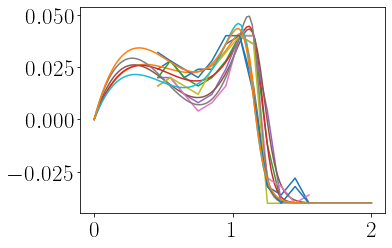

In [241]:
x = np.linspace(0, 2, 101)
plt.plot(PpCenters_inb, corrections_inb_s1)
res_lsq = least_squares(cubicsigmoidfit, [0.26583155, -0.4158314,   0.19210125, 1.13, 0.05], args=(PpCenters_inb, corrections_inb_s1))
# plt.plot(x, cubicsigmoid(res_lsq.x,x))
plt.plot(x, cubicsigmoid([ 0.225, -0.359,  0.173,  1.153,  0.0377], x))
print("sector 1 inbending correction {}".format(res_lsq.x))

plt.plot(PpCenters_inb, corrections_inb_s2)
res_lsq = least_squares(cubicsigmoidfit, res_lsq.x, args=(PpCenters_inb, corrections_inb_s2))
# plt.plot(x, cubicsigmoid(res_lsq.x,x))
plt.plot(x, cubicsigmoid([ 0.241, -0.388, 0.180, 1.202, 0.0366], x))
print("sector 2 inbending correction {}".format(res_lsq.x))


plt.plot(PpCenters_inb, corrections_inb_s3)
res_lsq = least_squares(cubicsigmoidfit, res_lsq.x, args=(PpCenters_inb, corrections_inb_s3))
# plt.plot(x, cubicsigmoid(res_lsq.x,x))
plt.plot(x, cubicsigmoid([0.323, -0.501, 0.208, 1.201, 0.0475],x))
print("sector 3 inbending correction {}".format(res_lsq.x))

plt.plot(PpCenters_inb, corrections_inb_s4)
res_lsq = least_squares(cubicsigmoidfit, res_lsq.x, args=(PpCenters_inb, corrections_inb_s4))
# plt.plot(x, cubicsigmoid(res_lsq.x,x))
plt.plot(x, cubicsigmoid([0.390, -0.604, 0.243, 1.177, 0.0297] ,x))
print("sector 4 inbending correction {}".format(res_lsq.x))

plt.plot(PpCenters_inb, corrections_inb_s5)
res_lsq = least_squares(cubicsigmoidfit, [ 0.29258234, -0.41617873,  0.16993681,  1.14,  0.02], args=(PpCenters_inb[:-5], corrections_inb_s5[:-5]))
# plt.plot(x, cubicsigmoid(res_lsq.x, x))
plt.plot(x, cubicsigmoid([ 0.293, -0.416, 0.170,  1.130,  0.0430], x))
print("sector 5 inbending correction {}".format(res_lsq.x))

plt.plot(PpCenters_inb, corrections_inb_s6)
res_lsq = least_squares(cubicsigmoidfit, res_lsq.x, args=(PpCenters_inb, corrections_inb_s6))
# plt.plot(x, cubicsigmoid(res_lsq.x,x))
plt.plot(x, cubicsigmoid([ 0.352, -0.554, 0.248, 1.130, 0.0448], x))
print("sector 6 inbending correction {}".format(res_lsq.x))
plt.show()

In [346]:
PpCenters_outb = PpCenters_outb[1:]
corrections_outb_s1 = corrections_outb_s1[1:]
corrections_outb_s2 = corrections_outb_s2[1:]
corrections_outb_s3 = corrections_outb_s3[1:]
corrections_outb_s4 = corrections_outb_s4[1:]
corrections_outb_s5 = corrections_outb_s5[1:]
corrections_outb_s6 = corrections_outb_s6[1:]

In [364]:
args_inb = [[ 0.225, -0.359,  0.173,  1.153,  0.0377], [ 0.241, -0.388, 0.180, 1.202, 0.0366], [0.323, -0.501, 0.208, 1.201, 0.0475], [0.390, -0.604, 0.243, 1.177, 0.0297],[ 0.293, -0.416, 0.170,  1.130,  0.0430], [ 0.352, -0.554, 0.248, 1.130, 0.0448]]

args_outb = [[-0.0345,  0.169, -0.217, 0.899, -0.0124] , [-0.0254, 0.149, -0.204,  0.907, -0.0203] , [-0.0421, 0.183, -0.221,  0.933, -0.0204 ] , [-0.0925,  0.317, -0.294,  0.921, -0.0295] , [-0.128, 0.392, -0.325, 0.861, -0.00389] , [-0.0315, 0.179, -0.223, 0.886, -0.00124]]

def cubicsigmoid(args, x):
    a, b, c, d, e = args
    x=np.array(x)
    return (a*x**3 + b*x**2 + c*x + 0.04) /(1+np.exp((x-d)/e)) - 0.04

def cubicsigmoid2(args, x):
    a, b, c, d, e = args
    x=np.array(x)
    return np.where(x>1.55, (a*1.55**3 + b*1.55**2 + c*1.55)* (1/(1+np.exp((1.55-d)/e)) - 0.5), (a*x**3 + b*x**2 + c*x)* (1/(1+np.exp((x-d)/e)) - 0.5))

def correction_proton_FD(mom, pol = "inbending", sector = 1):
    if pol == "inbending":
        return cubicsigmoid(args_inb[sector-1], mom)
    if pol == "outbending":
        return cubicsigmoid2(args_outb[sector-1], mom)


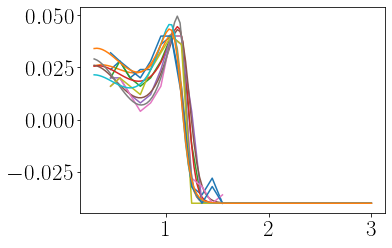

In [368]:
x = np.linspace(0.3, 3, 101)
plt.plot(PpCenters_inb, corrections_inb_s1)
plt.plot(x, correction_proton_FD(x, "inbending", 1))
plt.plot(PpCenters_inb, corrections_inb_s2)
plt.plot(x, correction_proton_FD(x, "inbending", 2))
plt.plot(PpCenters_inb, corrections_inb_s3)
plt.plot(x, correction_proton_FD(x, "inbending", 3))
plt.plot(PpCenters_inb, corrections_inb_s4)
plt.plot(x, correction_proton_FD(x, "inbending", 4))
plt.plot(PpCenters_inb, corrections_inb_s5)
plt.plot(x, correction_proton_FD(x, "inbending", 5))
plt.plot(PpCenters_inb, corrections_inb_s6)
plt.plot(x, correction_proton_FD(x, "inbending", 6))
plt.show()

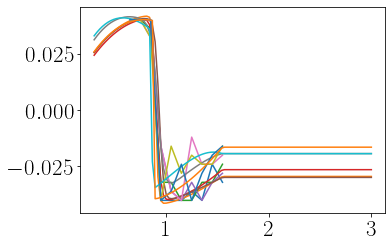

In [367]:
x = np.linspace(0.3, 3, 101)
plt.plot(PpCenters_outb, corrections_outb_s1)
plt.plot(x, correction_proton_FD(x, "outbending", 1))
plt.plot(PpCenters_outb, corrections_outb_s2)
plt.plot(x, correction_proton_FD(x, "outbending", 2))
plt.plot(PpCenters_outb, corrections_outb_s3)
plt.plot(x, correction_proton_FD(x, "outbending", 3))
plt.plot(PpCenters_outb, corrections_outb_s4)
plt.plot(x, correction_proton_FD(x, "outbending", 4))
plt.plot(PpCenters_outb, corrections_outb_s5)
plt.plot(x, correction_proton_FD(x, "outbending", 5))
plt.plot(PpCenters_outb, corrections_outb_s6)
plt.plot(x, correction_proton_FD(x, "outbending", 6))
plt.show()

sector 1 outbending correction [-0.03148887  0.1789781  -0.22329048  0.8859199  -0.00124149]


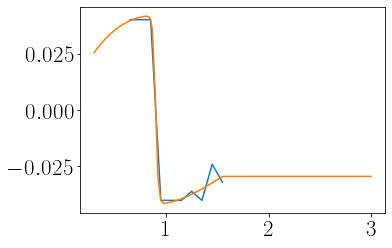

In [366]:
x = np.linspace(0.3, 1, 101)
plt.plot(PpCenters_outb, corrections_outb_s1)
res_lsq = least_squares(cubicsigmoidfit2, [-0.225, +0.359,  -0.173,  1.153,  -0.0377], args=(PpCenters_outb, corrections_outb_s1))
# plt.plot(x, np.where(x<PpCenters_outb[-1], cubicsigmoid2(res_lsq.x,x), cubicsigmoid2(res_lsq.x, PpCenters_outb[-1])))
# plt.plot(x, cubicsigmoid([ 0.225, -0.359,  0.173,  1.153,  0.0377], x))
print("sector 1 outbending correction {}".format(res_lsq.x))

plt.plot(PpCenters_outb, corrections_outb_s2)
res_lsq = least_squares(cubicsigmoidfit2, res_lsq.x, args=(PpCenters_outb, corrections_outb_s2))
plt.plot(x, np.where(x<PpCenters_outb[-1], cubicsigmoid2(res_lsq.x,x), cubicsigmoid2(res_lsq.x, PpCenters_outb[-1])))
# plt.plot(x, cubicsigmoid([ 0.241, -0.388, 0.180, 1.202, 0.0366], x))
print("sector 2 outbending correction {}".format(res_lsq.x))


plt.plot(PpCenters_outb, corrections_outb_s3)
res_lsq = least_squares(cubicsigmoidfit2, res_lsq.x, args=(PpCenters_outb, corrections_outb_s3))
plt.plot(x, np.where(x<PpCenters_outb[-1], cubicsigmoid2(res_lsq.x,x), cubicsigmoid2(res_lsq.x, PpCenters_outb[-1])))
# plt.plot(x, cubicsigmoid([0.323, -0.501, 0.208, 1.201, 0.0475],x))
print("sector 3 outbending correction {}".format(res_lsq.x))

plt.plot(PpCenters_outb, corrections_outb_s4)
res_lsq = least_squares(cubicsigmoidfit2, res_lsq.x, args=(PpCenters_outb, corrections_outb_s4))
plt.plot(x, np.where(x<PpCenters_outb[-1], cubicsigmoid2(res_lsq.x,x), cubicsigmoid2(res_lsq.x, PpCenters_outb[-1])))
# plt.plot(x, cubicsigmoid([0.390, -0.604, 0.243, 1.177, 0.0297] ,x))
print("sector 4 outbending correction {}".format(res_lsq.x))

plt.plot(PpCenters_outb, corrections_outb_s5)
res_lsq = least_squares(cubicsigmoidfit2, res_lsq.x, args=(PpCenters_outb, corrections_outb_s5))
plt.plot(x, np.where(x<PpCenters_outb[-1], cubicsigmoid2(res_lsq.x,x), cubicsigmoid2(res_lsq.x, PpCenters_outb[-1])))
# plt.plot(x, cubicsigmoid([ 0.293, -0.416, 0.170,  1.130,  0.0430], x))
print("sector 5 outbending correction {}".format(res_lsq.x))

plt.plot(PpCenters_outb, corrections_outb_s6)
res_lsq = least_squares(cubicsigmoidfit2, res_lsq.x, args=(PpCenters_outb, corrections_outb_s6))
plt.plot(x, np.where(x<PpCenters_outb[-1], cubicsigmoid2(res_lsq.x,x), cubicsigmoid2(res_lsq.x, PpCenters_outb[-1])))
# plt.plot(x, cubicsigmoid([ 0.352, -0.554, 0.248, 1.130, 0.0448], x))
print("sector 6 outbending correction {}".format(res_lsq.x))
plt.show()

In [359]:
print(PpCenters_outb[-1])

1.55


In [263]:
def cubicsigmoid(args, x):
#     df = args
    a, b, c, d, e = args
#     print(df)
    x=np.array(x)
    return (a*x**3 + b*x**2 + c*x + 0.04) /(1+np.exp((x-d)/e)) - 0.04
def cubicsigmoidfit(args, x, y):
#     print(args, x, y)
    return cubicsigmoid(args, x) - y

In [348]:
def cubicsigmoid2(args, x):
#     df = args
    a, b, c, d, e = args
#     print(df)
    x=np.array(x)
    return (a*x**3 + b*x**2 + c*x)* (1/(1+np.exp((x-d)/e)) - 0.5)
def cubicsigmoidfit2(args, x, y):
#     print(args, x, y)
    return cubicsigmoid2(args, x) - y

In [342]:
def cubicsigmoid3(args, x):
#     df = args
    a, b, c, d, e = args
#     print(df)
    x=np.array(x)
    return (a*x**3 + b*x**2 + c*x - 0.04) /(1+np.exp((x-d)/e)) +0.04
def cubicsigmoidfit3(args, x, y):
#     print(args, x, y)
    return cubicsigmoid3(args, x) - y

In [ ]:
x = np.linspace(0, 2, 101)
plt.plot(PpCenters_inb, corrections_inb_s1)
res_lsq = least_squares(cubicsigmoidfit, [0.26583155, -0.4158314,   0.19210125, 1.13, 0.05], args=(PpCenters_inb, corrections_inb_s1))
# plt.plot(x, cubicsigmoid(res_lsq.x,x))
plt.plot(x, cubicsigmoid([ 0.225, -0.359,  0.173,  1.153,  0.0377], x))
print("sector 1 inbending correction {}".format(res_lsq.x))


In [446]:
sigmas_inb_s1[-2] = 0.06

In [466]:
args_sigmas_FD_inb = [[-0.233, 1.216, -2.279, 1.812, -0.445], [ 0.277, -1.366, 2.318, -1.619,  0.466 ],[ 0.0728, -0.223, 0.0888,  0.225, -0.0889],[-0.204, 0.977, -1.766, 1.411, -0.342], [ 0.277, -1.059, 1.362, -0.641, 0.137], [-0.219, 1.132, -2.153, 1.763, -0.447]]
args_sigmas_FD_outb = [[0.481,-1.548, 1.524,-0.415, 0.0277], [1.872, -8.054, 12.536, -8.358,  2.083], [-0.0656, 0.480, -1.191, 1.169, -0.315], [-1.559, 7.356, -12.639, 9.312,  -2.405], [ 0.189, -0.344, -0.253,  0.717, -0.238], [0.466, -1.560, 1.622, -0.485, 0.0322]]

def quartic(mom, sector, pol = "inbending"):
    if pol == "inbending":
        a, b, c, d, e = args_sigmas_FD_inb[sector - 1]
        return np.select( [x<0.55, (x>=0.55)& (x < 1.55), x>=1.55], [a*0.55**4+b*0.55**3+c*0.55**2+d*0.55+e, a*x**4 +b*x**3 + c*x**2 + d*x + e, a*1.55**4 + b*1.55**3 + c*1.55**2+d*1.55 +e])
    if pol == "outbending":
        a, b, c, d, e = args_sigmas_FD_outb[sector - 1]
        return np.select( [x<0.65, (x>=0.65)& (x < 1.55), x>=1.55], [a*0.65**4+b*0.65**3+c*0.65**2+d*0.65+e, a*x**4 +b*x**3 + c*x**2 + d*x + e, a*1.55**4 + b*1.55**3 + c*1.55**2+d*1.55 +e])

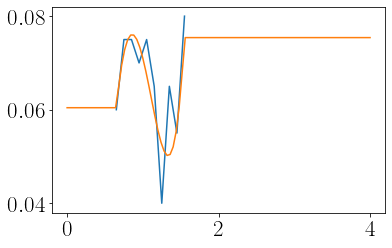

In [470]:
# x = np.linspace(0, 4, 101)
# plt.plot(PpCenters_inb, sigmas_inb_s1)
# plt.plot(x, quartic(x, 1, "inbending"))



plt.plot(PpCenters_outb, sigmas_outb_s5)
plt.plot(x, quartic(x, 5, "outbending"))

[-0.23309964  1.21600382 -2.27913403  1.81234243 -0.44543075]
[ 0.27680666 -1.36557937  2.31796397 -1.61896405  0.4658701 ]
[ 0.07284419 -0.22338929  0.08879904  0.22538205 -0.08885261]
[-0.20396243  0.97707721 -1.76616923  1.41119219 -0.34169598]
[ 0.27680384 -1.05865224  1.3616524  -0.64139818  0.13695284]
[-0.21853203  1.132481   -2.15275712  1.76290543 -0.44691334]


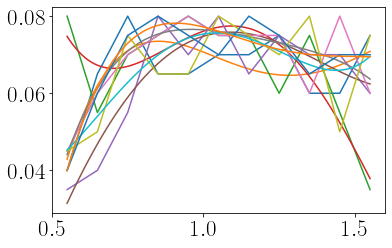

In [455]:
x = np.linspace(0.55, 1.55, 101)

plt.plot(PpCenters_inb, sigmas_inb_s1)
res_lsq = least_squares(quarticfit, [1, 1, 1, 1, 1], args=(PpCenters_inb, sigmas_inb_s1))
plt.plot(x, quartic(res_lsq.x, x))
print(res_lsq.x)
plt.plot(PpCenters_inb, sigmas_inb_s2)
res_lsq = least_squares(quarticfit, [1, 1, 1, 1, 1], args=(PpCenters_inb, sigmas_inb_s2))
plt.plot(x, quartic(res_lsq.x, x))
print(res_lsq.x)
plt.plot(PpCenters_inb, sigmas_inb_s3)
res_lsq = least_squares(quarticfit, [1, 1, 1, 1, 1], args=(PpCenters_inb, sigmas_inb_s3))
plt.plot(x, quartic(res_lsq.x, x))
print(res_lsq.x)
plt.plot(PpCenters_inb, sigmas_inb_s4)
res_lsq = least_squares(quarticfit, [1, 1, 1, 1, 1], args=(PpCenters_inb, sigmas_inb_s4))
plt.plot(x, quartic(res_lsq.x, x))
print(res_lsq.x)
plt.plot(PpCenters_inb, sigmas_inb_s5)
res_lsq = least_squares(quarticfit, [1, 1, 1, 1, 1], args=(PpCenters_inb, sigmas_inb_s5))
plt.plot(x, quartic(res_lsq.x, x))
print(res_lsq.x)
plt.plot(PpCenters_inb, sigmas_inb_s6)
res_lsq = least_squares(quarticfit, [1, 1, 1, 1, 1], args=(PpCenters_inb, sigmas_inb_s6))
plt.plot(x, quartic(res_lsq.x, x))
print(res_lsq.x)

plt.show()

[ 0.48076857 -1.54817113  1.52381522 -0.41524051  0.02767846]
[ 1.87209024 -8.0536306  12.53553945 -8.35771168  2.08293904]
[-0.06555999  0.47980052 -1.19052731  1.16940386 -0.31478197]
[ -1.5588606    7.35626696 -12.63878658   9.31163399  -2.40525259]
[ 0.18939445 -0.34382506 -0.25269171  0.71729073 -0.23819752]
[ 0.46620245 -1.55983779  1.62180885 -0.48497954  0.03216588]


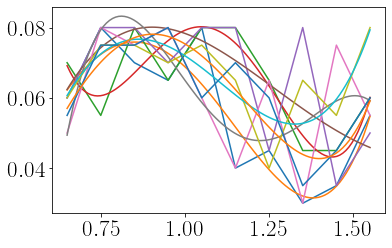

In [458]:
x = np.linspace(0.65, 1.55, 101)

plt.plot(PpCenters_outb, sigmas_outb_s1)
res_lsq = least_squares(quarticfit, [1, 1, 1, 1, 1], args=(PpCenters_outb, sigmas_outb_s1))
plt.plot(x, quartic(res_lsq.x, x))
print(res_lsq.x)
plt.plot(PpCenters_outb, sigmas_outb_s2)
res_lsq = least_squares(quarticfit, [1, 1, 1, 1, 1], args=(PpCenters_outb, sigmas_outb_s2))
plt.plot(x, quartic(res_lsq.x, x))
print(res_lsq.x)
plt.plot(PpCenters_outb, sigmas_outb_s3)
res_lsq = least_squares(quarticfit, [1, 1, 1, 1, 1], args=(PpCenters_outb, sigmas_outb_s3))
plt.plot(x, quartic(res_lsq.x, x))
print(res_lsq.x)
plt.plot(PpCenters_outb, sigmas_outb_s4)
res_lsq = least_squares(quarticfit, [1, 1, 1, 1, 1], args=(PpCenters_outb, sigmas_outb_s4))
plt.plot(x, quartic(res_lsq.x, x))
print(res_lsq.x)
plt.plot(PpCenters_outb, sigmas_outb_s5)
res_lsq = least_squares(quarticfit, [1, 1, 1, 1, 1], args=(PpCenters_outb, sigmas_outb_s5))
plt.plot(x, quartic(res_lsq.x, x))
print(res_lsq.x)
plt.plot(PpCenters_outb, sigmas_outb_s6)
res_lsq = least_squares(quarticfit, [1, 1, 1, 1, 1], args=(PpCenters_outb, sigmas_outb_s6))
plt.plot(x, quartic(res_lsq.x, x))
print(res_lsq.x)

plt.show()

In [375]:
sigmas_inb_s1 = sigmas_inb_s1[1:]
sigmas_inb_s2 = sigmas_inb_s2[1:]
sigmas_inb_s3 = sigmas_inb_s3[1:]
sigmas_inb_s4 = sigmas_inb_s4[1:]
sigmas_inb_s5 = sigmas_inb_s5[1:]
sigmas_inb_s6 = sigmas_inb_s6[1:]
sigmas_outb_s1 = sigmas_outb_s1[1:]
sigmas_outb_s2 = sigmas_outb_s2[1:]
sigmas_outb_s3 = sigmas_outb_s3[1:]
sigmas_outb_s4 = sigmas_outb_s4[1:]
sigmas_outb_s5 = sigmas_outb_s5[1:]
sigmas_outb_s6 = sigmas_outb_s6[1:]

In [376]:
PpCenters_inb = PpCenters_inb[1:]

In [417]:
def cubic(args, x, pol = "inbending"):
#     df = args
    a, b, c, d = args
#     print(df)
    x=np.array(x)
    if pol == "inbending":
        return np.select( [x<0.55, (x>=0.55)& (x < 1.55), x>=1.55], [a*0.55**3+b*0.55**2 + c*0.55 +d, a*x**3 +b*x**2 + c*x + d, a*1.55**3 + b*1.55**2 + c*1.55+d])
    if pol == "outbending":
        return np.select( [x<0.55, (x>=0.55)& (x < 1.55), x>=1.55], [a*0.65**3+b*0.65**2 + c*0.65 +d, a*x**3 +b*x**2 + c*x + d, a*1.55**3 + b*1.55**2 + c*1.55+d])

In [418]:
def cubicfit(args, x, y):
#     print(args, x, y)
    return cubic(args, x, "inbending") - y

In [428]:
def quintic(args, x, pol = "inbending"):
#     df = args
    a, b, c, d, e, f = args
#     print(df)
    x=np.array(x)
    return a*x**5 + b *x**4 + c* x**3 + d*x**2 + e*x + f

In [429]:
def quinticfit(args, x, y):
#     print(args, x, y)
    return quintic(args, x, "inbending") - y

In [390]:
PpCenters_outb

array([0.65, 0.75, 0.85, 0.95, 1.05, 1.15, 1.25, 1.35, 1.45, 1.55])

In [190]:
# parent_MC = "/Volumes/Extreme SSD/Feb2022/SimtoDat/v4/inb/dvcs/"
# parent_epg = "/Volumes/Extreme SSD/Feb2022/SimtoDat/v4/inb/epg/"
# parent_MC_bkg1g = "/Volumes/Extreme SSD/Feb2022/SimtoDat/v4/inb/bkg_1g/"
# parent_MC_bkg2g = "/Volumes/Extreme SSD/Feb2022/SimtoDat/v4/inb/bkg_2g/"
# parent_exp = "/Volumes/Extreme SSD/Feb2022/SimtoDat/v4/inb/exp/"

parent_MC = "/Volumes/Extreme SSD/Feb2022/SimtoDat/v4.1/inb/dvcs/"
# parent_epg = "/Volumes/Extreme SSD/Feb2022/SimtoDat/v4/inb/epg/"
parent_MC_bkg1g = "/Volumes/Extreme SSD/Feb2022/SimtoDat/v4.1/inb/bkg_1g/"
parent_MC_bkg2g = "/Volumes/Extreme SSD/Feb2022/SimtoDat/v4.1/inb/bkg_2g/"
parent_exp = "/Volumes/Extreme SSD/Feb2022/SimtoDat/v4.1/inb/exp/"

dvcsSimInb = pd.read_pickle(parent_MC + "3987.pkl")
bkgSimInb = pd.read_pickle(parent_MC_bkg1g + "4076.pkl")
# dvcsSimInb = pd.read_pickle(parent_epg + "3987_epg.pkl")
# bkgSimInb = pd.read_pickle(parent_epg + "4076_epg.pkl")

pi0SimInb = pd.read_pickle(parent_MC_bkg2g + "4076.pkl")
epgExpInb = pd.read_pickle(parent_exp + "dvcs.pkl")
pi0ExpInb = pd.read_pickle(parent_exp + "pi0.pkl")

In [191]:
dvcsSimInb = dvcsSimInb.loc[dvcsSimInb.Pp<1.6, :]
bkgSimInb = bkgSimInb.loc[bkgSimInb.Pp<1.6, :]
pi0SimInb = pi0SimInb.loc[pi0SimInb.Pp<1.6, :]
epgExpInb = epgExpInb.loc[epgExpInb.Pp<1.6, :]
pi0ExpInb = pi0ExpInb.loc[pi0ExpInb.Pp<1.6, :]

In [192]:
epgExpInbCDFT = epgExpInb.loc[epgExpInb.config == 3]
pi0ExpInbCDFT = pi0ExpInb.loc[pi0ExpInb.config == 3]
dvcsSimInbCDFT = dvcsSimInb.loc[dvcsSimInb.config == 3]
bkgSimInbCDFT = bkgSimInb.loc[bkgSimInb.config == 3]
pi0SimInbCDFT = pi0SimInb.loc[pi0SimInb.config == 3]

epgExpInbCD = epgExpInb.loc[epgExpInb.config == 2]
pi0ExpInbCD = pi0ExpInb.loc[pi0ExpInb.config == 2]
dvcsSimInbCD =  dvcsSimInb.loc[dvcsSimInb.config == 2]
bkgSimInbCD = bkgSimInb.loc[bkgSimInb.config == 2]
pi0SimInbCD = pi0SimInb.loc[pi0SimInb.config == 2]

epgExpInbFD = epgExpInb.loc[epgExpInb.config == 1]
pi0ExpInbFD = pi0ExpInb.loc[pi0ExpInb.config == 1]
dvcsSimInbFD =  dvcsSimInb.loc[dvcsSimInb.config == 1]
bkgSimInbFD = bkgSimInb.loc[bkgSimInb.config == 1]
pi0SimInbFD = pi0SimInb.loc[pi0SimInb.config == 1]

In [193]:
contInbCD = len(pi0ExpInbCD)*len(bkgSimInbCD)/len(pi0SimInbCD)/len(epgExpInbCD)
contInbFD = len(pi0ExpInbFD)*len(bkgSimInbFD)/len(pi0SimInbFD)/len(epgExpInbFD)
contInbCDFT = len(pi0ExpInbCDFT)*len(bkgSimInbCDFT)/len(pi0SimInbCDFT)/len(epgExpInbCDFT)

In [194]:
print(contInbFD, contInbCD, contInbCDFT)

0.4036466686412273 0.1398754273771678 0.004118082286136949


0.004118082286136949
coneAngle 19.98353013195619
reconGam 0.26418506772463235
coplanarity 2.089975960940901
ME_epg 0.010539585688179467
MM2_epg -0.0018067949701609989
MM2_eg 0.9107614856387103
MM2_ep -0.01662315412586925
MPt 0.03330503639880104


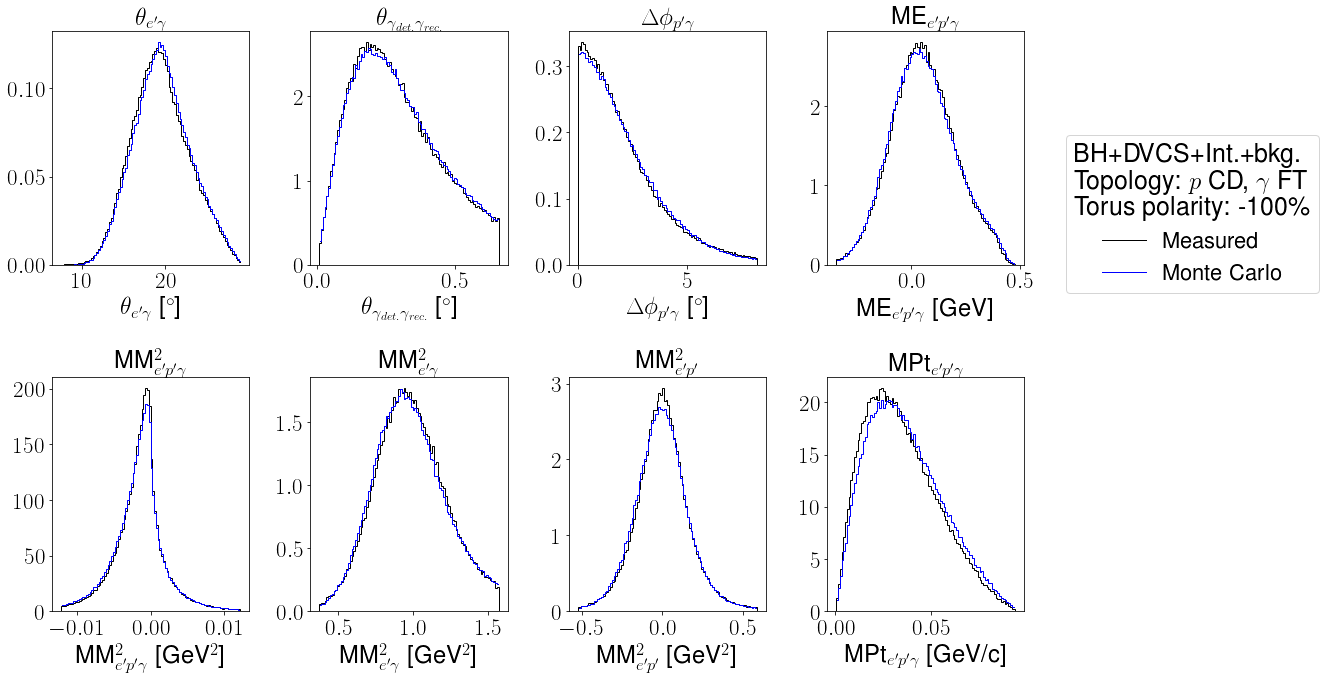

<Figure size 432x288 with 0 Axes>

In [195]:
df1 = dvcsSimInbCDFT#makeDVCS(dvcsSimInbCDFT)
df2 = bkgSimInbCDFT#makeDVCS(bkgSimInbCDFT)
df3 = epgExpInbCDFT#saveDVCSvars(CorrectionV1(epgExpInbCDFT, -0.2/(1+np.exp((epgExpInbCDFT.Pp-0.55)/(-0.05)))))
df4 = pi0ExpInbCDFT
df5 = pi0SimInbCDFT
PpMin = 0
PpMax = 1.6
df1 = df1.loc[(df1.Pp>PpMin) & (df1.Pp<PpMax), :]
df2 = df2.loc[(df2.Pp>PpMin) & (df2.Pp<PpMax), :]
df3 = df3.loc[(df3.Pp>PpMin) & (df3.Pp<PpMax), :]
df4 = df4.loc[(df4.Pp>PpMin) & (df4.Pp<PpMax), :]
df5 = df5.loc[(df5.Pp>PpMin) & (df5.Pp<PpMax), :]

contInbCDFT = len(df4)*len(df2)/len(df5)/len(df3)
print(contInbCDFT)
varstoplot = ["coneAngle", "reconGam", "coplanarity", "ME_epg", "MM2_epg", "MM2_eg", "MM2_ep", "MPt"]
title = [r"$\theta_{e'\gamma}$", r"$\theta_{\gamma_{det.}\gamma_{rec.}}$", r"$\Delta\phi_{p'\gamma}$" , "ME"+r"${}_{e'p'\gamma}$", "MM"+r"${}^{2}_{e'p'\gamma}$", "MM"+r"${}^{2}_{e'\gamma}$", "MM"+r"${}^{2}_{e'p'}$", "MPt"+r"${}_{e'p'\gamma}$"]
unit = [degree, degree, degree, GeV, GeV2, GeV2, GeV2, GeVc]
# binstarts = [10, 0, 0, -0.5, -0.01, 0.1,-0.4 , 0]
# binends = [40, 2, 10, 1.2, 0.01, 1.7, 0.4, 0.2]
fig, axs = plt.subplots(2, 4, figsize = (15,10))
for yind in range(0, 2):
    for xind in range(0,4):
        ind = 4*yind + xind
        start = binstarts[ind]
        end = binends[ind]
#         bins = 100#np.linspace(start, end, 101)
#         if ind == 2 :
#             bins = np.linspace(start, end, 101)
        simDist_dvpi0, bins = np.histogram(df2[varstoplot[ind]], 100, density = True)
        simDist_dvcs, _ = np.histogram(df1[varstoplot[ind]], bins, density = True)
#         simDist = len_pi0ExpInbCDFT/len_pi0SimInbCDFT*simDist_dvpi0 + (len_epgExpInbCDFT/len_dvcsSimInbCDFT-len_bkgSimInbCDFT/len_pi0SimInbCDFT*len_pi0ExpInbCDFT/len_dvcsSimInbCDFT)*simDist_dvcs
        simDist = (1-contInbCDFT)*simDist_dvcs + contInbCDFT*simDist_dvpi0
        expDist, _ = np.histogram(df3[varstoplot[ind]], bins, density=True)
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        if ind == 0:
            axs[yind, xind].step(bincenters, expDist, where='mid',color='k', linewidth=1, label = 'Measured')           
            axs[yind, xind].step(bincenters, simDist, where='mid',color='b', linewidth=1, label = 'Monte Carlo')  
            axs[yind, xind].set_ylim(bottom = 0)
        else:
            axs[yind, xind].hist(df3[varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', density=True, linewidth=1)
            axs[yind, xind].step(bincenters, simDist, where='mid',color='b', linewidth=1)
#         axs[yind, xind].step(bincenters, c*simDist_dvpi0, where='mid',color='g', linewidth=1)
#         axs[yind, xind].step(bincenters, (1/len_dvcsSimInbCDFT-cont_inb_CD/len_dvcsSimInbCDFT)*len_epgExpInbCDFT*simDist_dvcs, where='mid',color='r', linewidth=1)
#         axs[yind, xind].hist(epgExpInbCDFT[varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', linewidth=1)
#         axs[yind, xind].step(bincenters, expDist - len_pi0ExpInbCDFT/len_pi0SimInbCDFT*simDist_dvpi0, where='mid',color='k', linewidth=1)
        print(varstoplot[ind], nphistmean(expDist - len(pi0ExpInbCDFT)/len(pi0SimInbCDFT)*simDist_dvpi0, bins))
#         axs[yind, xind].step(bincenters, (1-c)*simDist_dvcs, where='mid',color='r', linewidth=1)
        axs[yind, xind].set_title(title[ind])
#         axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
# axs[0,2].set_xticks([2.2, 2.7, 3.2])
# axs[1,0].set_xticks([0.29, 0.32, 0.35, 0.38])
# axs[1,1].set_xticks([0.23, 0.3, 0.39, 0.52])
# axs[1,2].set_xticks([0, 90, 180, 270, 360])
plt.tight_layout()
# plt.savefig("kineCD.pdf")
# plt.savefig("analysisnote/inbending1.pdf")
fig.legend(bbox_to_anchor = (1.25, 0.8), title = "BH+DVCS+Int.+bkg.\nTopology: "+r"$p$"+" CD, "+r"$\gamma$"+" FT\n"+"Torus polarity: -100\%")
plt.show()
plt.clf()

0.15560101318987735
Gp 6.234620607254776
reconGam 0.3191236146700102
coplanarity 2.1493113563367094
ME_epg -0.0029881639424014974
MM2_epg -0.0015398803203720392
MM2_eg 0.8835068802893686
MM2_ep -0.0088051022024271
MPt 0.04685714327640751


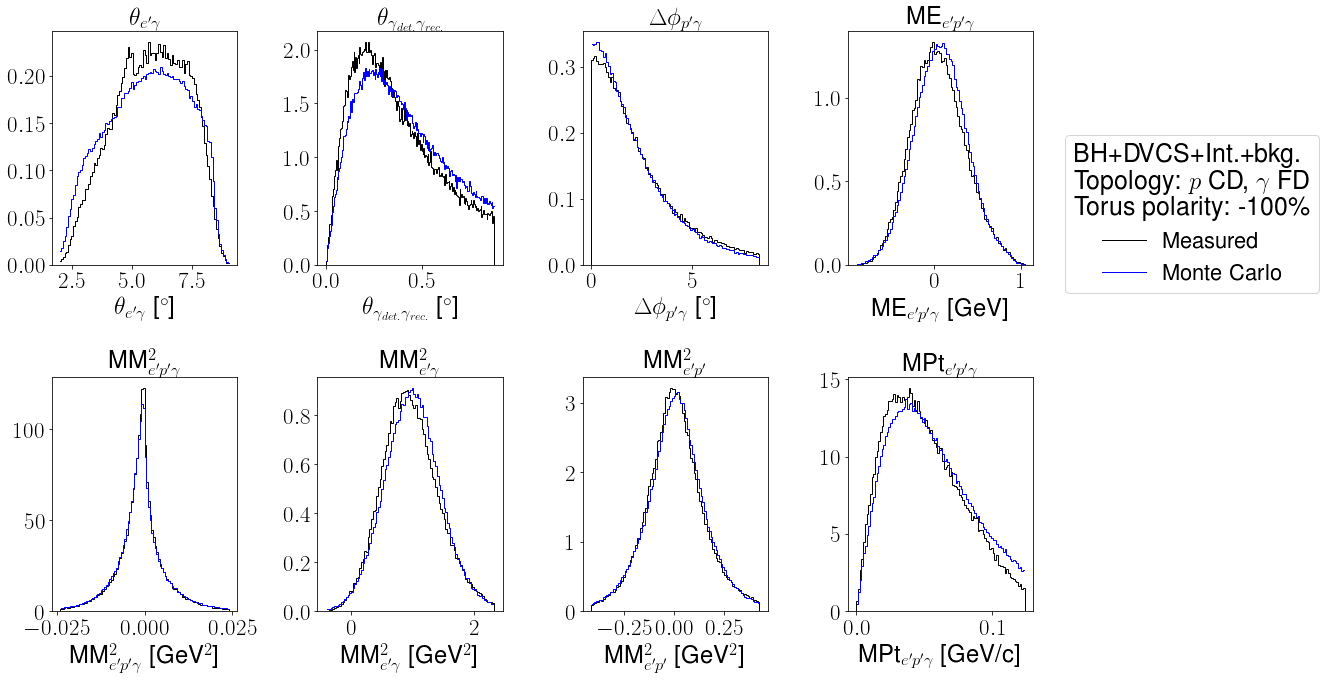

<Figure size 432x288 with 0 Axes>

In [643]:
df1 = dvcsSimInbCD#makeDVCS(dvcsSimInbCD)
df2 = bkgSimInbCD#makeDVCS(bkgSimInbCD)
#df3 = epgExpInbCD#makeDVCS(saveDVCSvars(CorrectionV1(epgExpInbCD, -0.2/(1+np.exp((epgExpInbCD.Pp-0.55)/(-0.05))))))
correction = np.where(-(epgExpInbCD.Gp-2)*(epgExpInbCD.Gp-5)>0, -0.05*(epgExpInbCD.Gp-2)*(epgExpInbCD.Gp-5), 0)

df3 = makeDVCS(saveDVCSvars(CorrectionV2(CorrectionV3(epgExpInbCD, 0), correction)), "inbending")
df4 = pi0ExpInbCD
df5 = pi0SimInbCD
# PpMin = 0.3#1.0
# PpMax = 0.4#1.2
# df1 = df1.loc[(df1.Pp>PpMin) & (df1.Pp<PpMax), :]
# df2 = df2.loc[(df2.Pp>PpMin) & (df2.Pp<PpMax), :]
# df3 = df3.loc[(df3.Pp>PpMin) & (df3.Pp<PpMax), :]
# df4 = df4.loc[(df4.Pp>PpMin) & (df4.Pp<PpMax), :]
# df5 = df5.loc[(df5.Pp>PpMin) & (df5.Pp<PpMax), :]

GpMin = 2#1.0
GpMax = 10#1.2
df1 = df1.loc[(df1.Gp>GpMin) & (df1.Gp<GpMax), :]
df2 = df2.loc[(df2.Gp>GpMin) & (df2.Gp<GpMax), :]
df3 = df3.loc[(df3.Gp>GpMin) & (df3.Gp<GpMax), :]
df4 = df4.loc[(df4.Gp>GpMin) & (df4.Gp<GpMax), :]
df5 = df5.loc[(df5.Gp>GpMin) & (df5.Gp<GpMax), :]
contInbCD = len(df4)*len(df2)/len(df5)/len(df3)
print(contInbCD)
varstoplot = ["Gp", "reconGam", "coplanarity", "ME_epg", "MM2_epg", "MM2_eg", "MM2_ep", "MPt"]
title = [r"$\theta_{e'\gamma}$", r"$\theta_{\gamma_{det.}\gamma_{rec.}}$", r"$\Delta\phi_{p'\gamma}$" , "ME"+r"${}_{e'p'\gamma}$", "MM"+r"${}^{2}_{e'p'\gamma}$", "MM"+r"${}^{2}_{e'\gamma}$", "MM"+r"${}^{2}_{e'p'}$", "MPt"+r"${}_{e'p'\gamma}$"]
unit = [degree, degree, degree, GeV, GeV2, GeV2, GeV2, GeVc]
binstarts = [10, 0, 0, -0.5, -0.01, 0.1,-0.4 , 0]
binends = [40, 0.876, 10, 1.2, 0.01, 1.7, 0.4, 0.2]
fig, axs = plt.subplots(2, 4, figsize = (15,10))
for yind in range(0, 2):
    for xind in range(0,4):
        ind = 4*yind + xind
        start = binstarts[ind]
        end = binends[ind]
        bins = 100#np.linspace(start, end, 101)
        if ind == 1 :
            bins = np.linspace(start, end, 201)
        simDist_dvpi0, bins = np.histogram(df2[varstoplot[ind]], bins, density = True)
        simDist_dvcs, _ = np.histogram(df1[varstoplot[ind]], bins, density = True)
#         simDist = len_pi0ExpInbCD/len_pi0SimInbCD*simDist_dvpi0 + (len_epgExpInbCD/len_dvcsSimInbCD-len_bkgSimInbCD/len_pi0SimInbCD*len_pi0ExpInbCD/len_dvcsSimInbCD)*simDist_dvcs
        simDist = (1-contInbCD)*simDist_dvcs + contInbCD*simDist_dvpi0
        expDist, _ = np.histogram(df3[varstoplot[ind]], bins, density=True)
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        if ind == 0:
            axs[yind, xind].step(bincenters, expDist, where='mid',color='k', linewidth=1, label = 'Measured')           
            axs[yind, xind].step(bincenters, simDist, where='mid',color='b', linewidth=1, label = 'Monte Carlo')  
            axs[yind, xind].set_ylim(bottom = 0)
        else:
            axs[yind, xind].hist(df3[varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', density=True, linewidth=1)
            axs[yind, xind].step(bincenters, simDist, where='mid',color='b', linewidth=1)
#         axs[yind, xind].step(bincenters, c*simDist_dvpi0, where='mid',color='g', linewidth=1)
#         axs[yind, xind].step(bincenters, (1/len_dvcsSimInbCD-cont_inb_CD/len_dvcsSimInbCD)*len_epgExpInbCD*simDist_dvcs, where='mid',color='r', linewidth=1)
#         axs[yind, xind].hist(epgExpInbCD[varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', linewidth=1)
#         axs[yind, xind].step(bincenters, expDist - len_pi0ExpInbCD/len_pi0SimInbCD*simDist_dvpi0, where='mid',color='k', linewidth=1)
        print(varstoplot[ind], nphistmean(expDist - len(pi0ExpInbCD)/len(pi0SimInbCD)*simDist_dvpi0, bins))
#         axs[yind, xind].step(bincenters, (1-c)*simDist_dvcs, where='mid',color='r', linewidth=1)
        axs[yind, xind].set_title(title[ind])
#         axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
# axs[0,2].set_xticks([2.2, 2.7, 3.2])
# axs[1,0].set_xticks([0.29, 0.32, 0.35, 0.38])
# axs[1,1].set_xticks([0.23, 0.3, 0.39, 0.52])
# axs[1,2].set_xticks([0, 90, 180, 270, 360])
plt.tight_layout()
# plt.savefig("kineCD.pdf")
# plt.savefig("analysisnote/inbending1.pdf")
fig.legend(bbox_to_anchor = (1.25, 0.8), title = "BH+DVCS+Int.+bkg.\nTopology: "+r"$p$"+" CD, "+r"$\gamma$"+" FD\n"+"Torus polarity: -100\%")
plt.show()
plt.clf()

In [201]:
df1 = makeDVCS(dvcsSimInbCD)
df2 = makeDVCS(bkgSimInbCD)
simDist_dvpi0, bins = np.histogram(df2.reconGam, 100, density = True)
simDist_dvcs, _ = np.histogram(df1.reconGam, bins, density = True)
simDist_reconGam = (1-contInbCD)*simDist_dvcs + contInbCD*simDist_dvpi0

simDist_dvpi0, bins = np.histogram(df2.MPt, 100, density = True)
simDist_dvcs, _ = np.histogram(df1.MPt, bins, density = True)
simDist_MPt = (1-contInbCD)*simDist_dvcs + contInbCD*simDist_dvpi0

In [202]:
from scipy.stats import chi2
from scipy.stats import gamma
from scipy.stats import norm
from scipy.stats import skewnorm
from scipy.stats import lognorm
from scipy.stats import halfnorm
from scipy.stats import crystalball
from scipy.stats import laplace_asymmetric
from scipy.stats import halfcauchy

In [203]:
def skewnormfit(args, x):
#     df = args
    a, loc, scale, b, c, d = args
#     print(df)
    rv = skewnorm(a = a, loc = loc, scale = scale)
    return rv.pdf(x) + b + c*x + d*x*x
def lstsq_skewnormfit(args, x, y):
#     print(args, x, y)
    return skewnormfit(args, x) - y

In [204]:
def probFit(dist, bins, fit, res_lsq, hist = None, unchist = None):
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    if hist is None:
        hist = dist/np.sum(dist)/np.diff(bincenters)[0]
    if unchist is None:
        unchist = np.sqrt(dist)/np.sum(dist)/np.diff(bincenters)[0]
    chi2fit = np.sum((hist - fit)**2/unchist**2)
    dof = len(hist) - len(res_lsq.x)
    pvalue = 1-chi2.cdf(chi2fit, dof)
    return pvalue, chi2fit, dof

In [474]:
pvalue_opt = 0
for i in range(0, 10):
    if i == 0:
        dist, bins = np.histogram(df1.reconGam, bins = np.linspace(0.03, 0.85, 101))
        params = [1, 0.3, 0.03, 0, 0, 0]
    else:
        dist, bins = np.histogram(df1.reconGam, bins = np.linspace(lb, ub, 101))
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    hist = dist/np.sum(dist)/np.diff(bincenters)[0]
    res_lsq = least_squares(lstsq_skewnormfit, params, args=(bincenters, hist))
    params = res_lsq.x
    a, loc, scale, b, c, d = params
    lb = 0.005
    ub = skewnorm.ppf(0.998, a = a, loc = loc, scale = scale)
    pvalue, chi2fit, dof = probFit(dist, bins,  skewnormfit(res_lsq.x, bincenters), res_lsq)
    print(lb, ub, pvalue)
    if pvalue>pvalue_opt:
        pvalue_opt = pvalue
        bins_opt = bins
        bincenters_opt = bincenters
        params_opt = res_lsq.x
        lb_opt = lb
        ub_opt = skewnorm.ppf(0.9973, a = a, loc = loc, scale = scale)
        dist_opt = dist
        print(params_opt, lb, ub, pvalue)

0.005 0.992023256133495 0.2946660291112454
[ 3.00375312  0.04340489  0.30697316 -0.78155236  3.38891721 -2.38153631] 0.005 0.992023256133495 0.2946660291112454
0.005 0.8409471681287594 0.0


<ipython-input-204-36f1c948bc16>:7: RuntimeWarning: divide by zero encountered in true_divide
  chi2fit = np.sum((hist - fit)**2/unchist**2)


0.005 0.9688587446664626 0.1829511961872191
0.005 0.804320178425107 0.0
0.005 0.9431753346041438 0.5092689429024717
[ 2.73294064  0.03653032  0.29339057 -0.9593687   4.4447681  -3.39104644] 0.005 0.9431753346041438 0.5092689429024717
0.005 0.7795308836494226 0.0
0.005 0.9303889735508502 0.2958314425833163
0.005 0.776906726105688 0.0
0.005 0.9326973514031971 0.3622063729408367
0.005 0.7777608907806822 0.0


In [475]:
ub_opt

0.9166952768484081

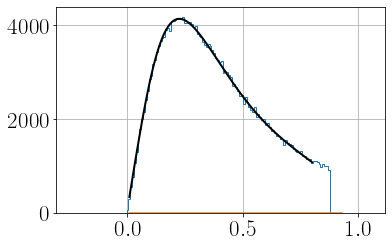

In [476]:
df1.reconGam.hist(bins = extendedBins(bins_opt, 30, 30), histtype = 'step')
# df3.reconGam.hist(bins = extendedBins(bins_opt, 30, 30), histtype = 'step', density = True)

# df = 4.5
# scale = 0.065
# x = np.linspace(-0.4, 0.4, 100)
plt.plot(bincenters_opt, skewnormfit(params_opt, bincenters_opt)*np.sum(dist_opt)*np.diff(bincenters_opt)[0], 'k-', lw=2, label='frozen pdf')
# plt.plot(bincenters_opt, skewnormfit(params_opt, bincenters_opt), 'k-', lw=2, label='frozen pdf')
plt.step(bins[:-1]+np.diff(bins)/2, simDist_reconGam)
plt.show()

In [477]:
pvalue_opt = 0
for i in range(0, 10):
    if i == 0:
        dist, bins = np.histogram(df1.MPt, bins = np.linspace(0.003, 0.09, 101))
        params = [1, 0, 0.03, 0, 0, 0]
    else:
        dist, bins = np.histogram(df1.MPt, bins = np.linspace(lb, ub, 101))
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    hist = dist/np.sum(dist)/np.diff(bincenters)[0]
    res_lsq = least_squares(lstsq_skewnormfit, params, args=(bincenters, hist))
    params = res_lsq.x
    a, loc, scale, b, c, d = params
    lb = 0.03
    ub = loc+3*scale
    pvalue, chi2fit, dof = probFit(dist, bins,  skewnormfit(res_lsq.x, bincenters), res_lsq)
    print(pvalue, lb, ub)
    if pvalue>pvalue_opt:
        pvalue_opt = pvalue
        bins_opt = bins
        bincenters_opt = bincenters
        params_opt = res_lsq.x
        lb_opt = lb
        ub_opt = skewnorm.ppf(0.9973, a = a, loc = loc, scale = scale)
        dist_opt = dist
        print(params_opt, lb, ub, pvalue)

0.5783411590413421 0.03 0.1226671916317071
[ 1.88894831e+00  4.95915799e-03  3.92360112e-02 -8.13098834e+00
  3.67815869e+02 -2.52936502e+03] 0.03 0.1226671916317071 0.5783411590413421
0.30170955884772177 0.03 0.16021033781817914
0.0 0.03 0.23089117954083982


<ipython-input-204-36f1c948bc16>:7: RuntimeWarning: divide by zero encountered in true_divide
  chi2fit = np.sum((hist - fit)**2/unchist**2)


0.0 0.03 0.15557513973451004
0.0 0.03 0.2337666016527057
0.0 0.03 0.15564472344347705
0.0 0.03 0.23340351124092013
0.0 0.03 0.15445083573098797
0.0 0.03 0.23623550506790797
0.0 0.03 0.15430025224048194


In [478]:
print(ub_opt)

0.12266628889723641


In [479]:
def extendedBins(bins, left, right):
    binwidth = np.diff(bins)[0]
    leftbins = bins[0] - (np.linspace(1, left+1, left+1)*binwidth)[::-1]
    rightbins = np.linspace(1, right+1, right +1)*binwidth + bins[-1]
    return np.array([*leftbins, *bins, *rightbins])

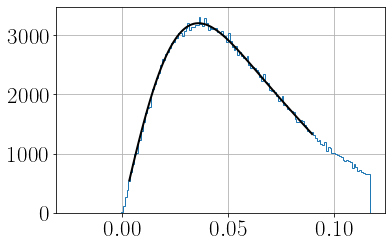

In [480]:
df1.MPt.hist(bins = extendedBins(bins_opt, 30, 30), histtype = 'step')

# df = 4.5
# scale = 0.065
# x = np.linspace(-0.4, 0.4, 100)
plt.plot(bincenters_opt, skewnormfit(params_opt, bincenters_opt)*np.sum(dist_opt)*np.diff(bincenters_opt)[0], 'k-', lw=2, label='frozen pdf')
plt.show()

In [481]:
np.poly1d([1.671, -4.918, 5.151, -2.434])(epgExpInbFD.Pp)

array([-0.76362252, -0.24128605, -0.70240761, ..., -0.62957039,
       -0.66044827, -0.76683974])

0.42141050010152226
Gp 4.942586881459135
reconGam 0.3965446503621524
coplanarity 3.401450235848719
ME_epg 0.03665495244339839
MM2_epg -0.0003837469858216746
MM2_eg 0.916100957076992
MM2_ep 0.043141761612315664
MPt 0.06475435392874967


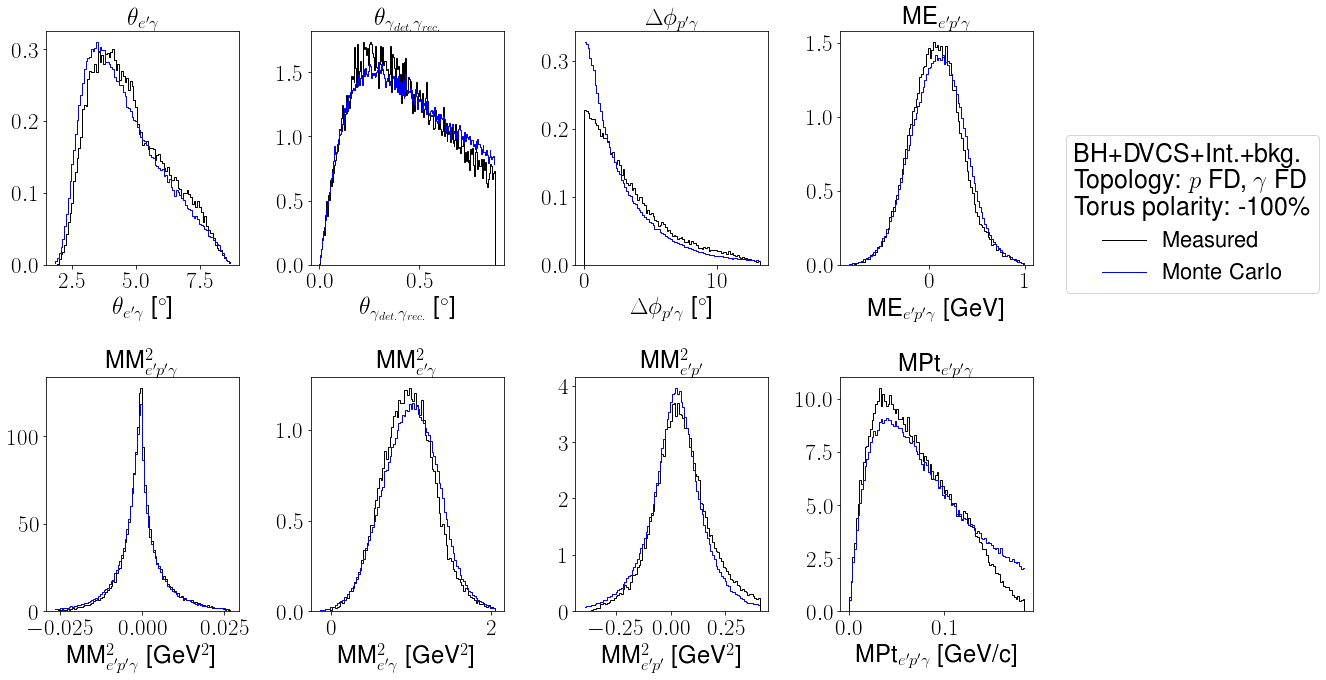

<Figure size 432x288 with 0 Axes>

In [642]:
df1 = dvcsSimInbFD#makeDVCS(dvcsSimInbFD)
df2 = bkgSimInbFD#makeDVCS(bkgSimInbFD)
corr = np.where(np.poly1d([1.671, -4.918, 5.151, -2.434])(epgExpInbFD.Pp)<0, np.poly1d([1.671, -4.918, 5.151, -2.434])(epgExpInbFD.Pp), 0)
correction = np.where(-(epgExpInbFD.Gp-2)*(epgExpInbFD.Gp-5)>0, -0.05*(epgExpInbFD.Gp-2)*(epgExpInbFD.Gp-5), 0)
# df3 = makeDVCS(saveDVCSvars(CorrectionV3_1(epgExpInbFD, corr)))
df3 = makeDVCS(saveDVCSvars(CorrectionV2(CorrectionV3_1(epgExpInbFD, corr), correction)), "inbending")

df4 = pi0ExpInbFD
df5 = pi0SimInbFD
PpMin = 0#1.0
PpMax = 1.6#1.2
df1 = df1.loc[(df1.Pp>PpMin) & (df1.Pp<PpMax), :]
df2 = df2.loc[(df2.Pp>PpMin) & (df2.Pp<PpMax), :]
df3 = df3.loc[(df3.Pp>PpMin) & (df3.Pp<PpMax), :]
df4 = df4.loc[(df4.Pp>PpMin) & (df4.Pp<PpMax), :]
df5 = df5.loc[(df5.Pp>PpMin) & (df5.Pp<PpMax), :]

contInbFD = len(df4)*len(df2)/len(df5)/len(df3)
print(contInbFD)
varstoplot = ["Gp", "reconGam", "coplanarity", "ME_epg", "MM2_epg", "MM2_eg", "MM2_ep", "MPt"]
title = [r"$\theta_{e'\gamma}$", r"$\theta_{\gamma_{det.}\gamma_{rec.}}$", r"$\Delta\phi_{p'\gamma}$" , "ME"+r"${}_{e'p'\gamma}$", "MM"+r"${}^{2}_{e'p'\gamma}$", "MM"+r"${}^{2}_{e'\gamma}$", "MM"+r"${}^{2}_{e'p'}$", "MPt"+r"${}_{e'p'\gamma}$"]
unit = [degree, degree, degree, GeV, GeV2, GeV2, GeV2, GeVc]
binstarts = [10, 0, 0, -0.5, -0.01, 0.1,-0.4 , 0]
binends = [40, 0.876, 10, 1.2, 0.01, 1.7, 0.4, 0.2]
fig, axs = plt.subplots(2, 4, figsize = (15,10))
for yind in range(0, 2):
    for xind in range(0,4):
        ind = 4*yind + xind
        start = binstarts[ind]
        end = binends[ind]
        bins = 100#np.linspace(start, end, 101)
        if ind == 1 :
            bins = np.linspace(start, end, 201)
        simDist_dvpi0, bins = np.histogram(df2[varstoplot[ind]], bins, density = True)
        simDist_dvcs, _ = np.histogram(df1[varstoplot[ind]], bins, density = True)
#         simDist = len_pi0ExpInbFD/len_pi0SimInbFD*simDist_dvpi0 + (len_epgExpInbFD/len_dvcsSimInbFD-len_bkgSimInbFD/len_pi0SimInbFD*len_pi0ExpInbFD/len_dvcsSimInbFD)*simDist_dvcs
        simDist = (1-contInbFD)*simDist_dvcs + contInbFD*simDist_dvpi0
        expDist, _ = np.histogram(df3[varstoplot[ind]], bins, density=True)
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        if ind == 0:
            axs[yind, xind].step(bincenters, expDist, where='mid',color='k', linewidth=1, label = 'Measured')           
            axs[yind, xind].step(bincenters, simDist, where='mid',color='b', linewidth=1, label = 'Monte Carlo')  
            axs[yind, xind].set_ylim(bottom = 0)
        else:
            axs[yind, xind].hist(df3[varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', density=True, linewidth=1)
            axs[yind, xind].step(bincenters, simDist, where='mid',color='b', linewidth=1)
#         axs[yind, xind].step(bincenters, c*simDist_dvpi0, where='mid',color='g', linewidth=1)
#         axs[yind, xind].step(bincenters, (1/len_dvcsSimInbFD-cont_inb_FD/len_dvcsSimInbFD)*len_epgExpInbFD*simDist_dvcs, where='mid',color='r', linewidth=1)
#         axs[yind, xind].hist(epgExpInbFD[varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', linewidth=1)
#         axs[yind, xind].step(bincenters, expDist - len_pi0ExpInbFD/len_pi0SimInbFD*simDist_dvpi0, where='mid',color='k', linewidth=1)
        print(varstoplot[ind], nphistmean(expDist - len(pi0ExpInbFD)/len(pi0SimInbFD)*simDist_dvpi0, bins))
#         axs[yind, xind].step(bincenters, (1-c)*simDist_dvcs, where='mid',color='r', linewidth=1)
        axs[yind, xind].set_title(title[ind])
#         axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
# axs[0,2].set_xticks([2.2, 2.7, 3.2])
# axs[1,0].set_xticks([0.29, 0.32, 0.35, 0.38])
# axs[1,1].set_xticks([0.23, 0.3, 0.39, 0.52])
# axs[1,2].set_xticks([0, 90, 180, 270, 360])
plt.tight_layout()
# plt.savefig("kineFD.pdf")
# plt.savefig("analysisnote/inbending1.pdf")
fig.legend(bbox_to_anchor = (1.25, 0.8), title = "BH+DVCS+Int.+bkg.\nTopology: "+r"$p$"+" FD, "+r"$\gamma$"+" FD\n"+"Torus polarity: -100\%")
plt.show()
plt.clf()

In [13]:
0.0395/(1+np.exp(5.308*(8- 8.005)))

0.020012067117461056

<AxesSubplot:>

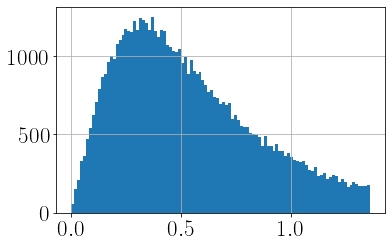

In [16]:
pi0ExpInbFD.reconPi.hist(bins = 101)

In [22]:
len(pi0ExpInbFD)/ len(pi0SimInbFD)

0.22578308253357576

In [7]:
len(pi0ExpInbCD)/ len(pi0SimInbCD)

0.24711312775422511

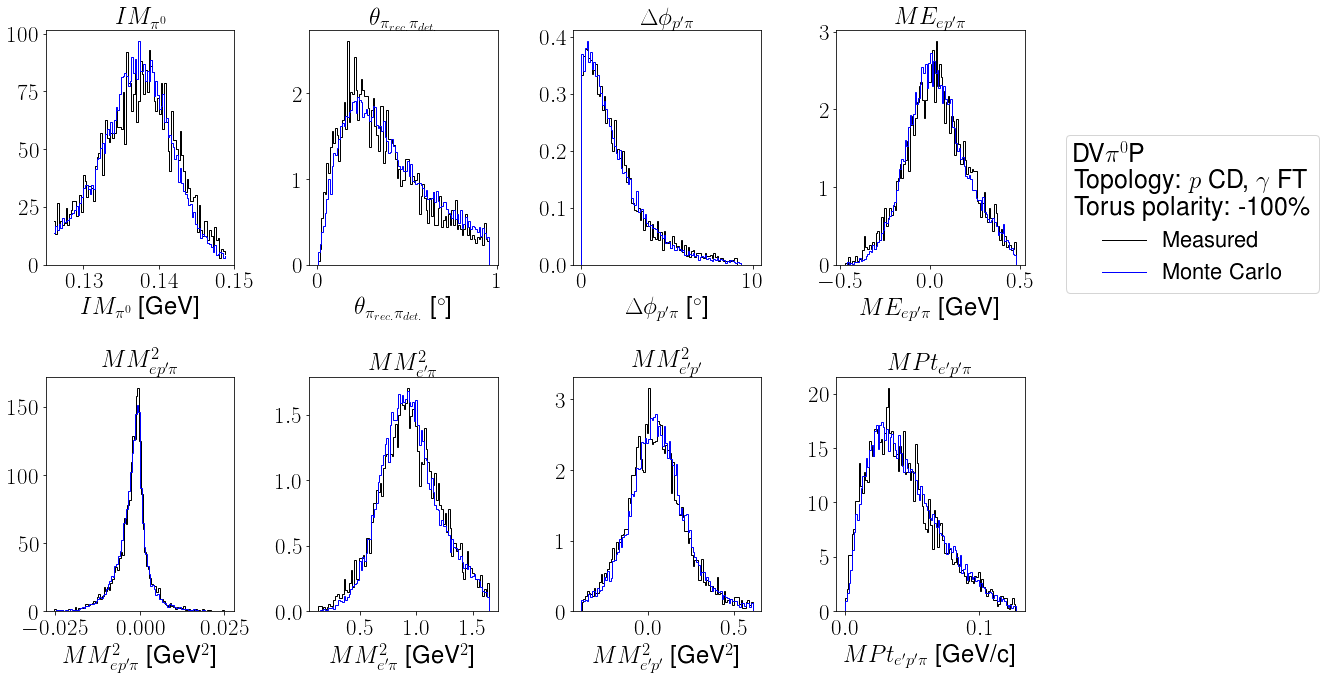

In [199]:
df1 = pi0ExpInbCDFT#makeDVpi0P(saveDVpi0Pvars(CorrectionV1(pi0ExpInbCDFT, -0.2/(1+np.exp((pi0ExpInbCDFT.Pp-0.55)/(-0.05))))))
df2 = pi0SimInbCDFT
# df1 = df1.loc[(df1.Ptheta>PthetaMin) & (df1.Ptheta<PthetaMax)]
# df2 = df2.loc[(df2.Ptheta>PthetaMin) & (df2.Ptheta<PthetaMax)]

varstoplot = ["Mpi0", "reconPi", "coplanarity", "ME_epgg", "MM2_epgg", "MM2_egg", "MM2_ep", "MPt"]
title = [r"$IM_{\pi^0}$", r"$\theta_{\pi_{rec.}\pi_{det.}}$", r"$\Delta\phi_{p'\pi}$", r"$ME_{ep'\pi}$", r"$MM^2_{ep'\pi}$", r"$MM^2_{e'\pi}$", r"$MM^{2}_{e'p'}$", r"$MPt_{e'p'\pi}$" ]
unit = [GeV, degree, degree, GeV, GeV2, GeV2, GeV2, GeVc]
binstarts = [0, -0.04, 0, -1.5, 0, 0, 0.07, 0]
binends = [10, 0.04, 10, 1.5, 0.2, 2, 0.2, 2]
fig, axs = plt.subplots(2, 4, figsize = (15, 10))
for xind in range(0,4):
    for yind in range(0, 2):
        ind =xind+4*yind
        start = binstarts[ind]
        end = binends[ind]
        bins = 100#np.linspace(start, end, 101)
        if ind == 2 :
            bins = np.linspace(start, end, 101)
        if ind == 0 :
            simDist_dvpi0, bins = np.histogram(df2[varstoplot[ind]], bins, density = True)
            simDist = simDist_dvpi0
            expDist, bins = np.histogram(df1[varstoplot[ind]], bins, density=True)
            bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
            axs[yind, xind].step(bincenters, expDist, where='mid',color='k', linewidth=1, label = 'Measured')           
            axs[yind, xind].step(bincenters, simDist, where='mid',color='b', linewidth=1, label = 'Monte Carlo')           
            axs[yind, xind].set_ylim(bottom = 0)
        else:
            axs[yind, xind].hist(df1.loc[:, varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', density=True, linewidth=1)
            axs[yind, xind].hist(df2.loc[:, varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='b', density=True, linewidth=1)
        axs[yind, xind].set_title(title[ind])
#         axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
plt.tight_layout()
fig.legend(bbox_to_anchor = (1.25, 0.8), title = "DV"+r"$\pi^0$"+"P\nTopology: "+r"$p$"+" CD, "+r"$\gamma$"+" FT\n"+"Torus polarity: -100\%")
plt.show()

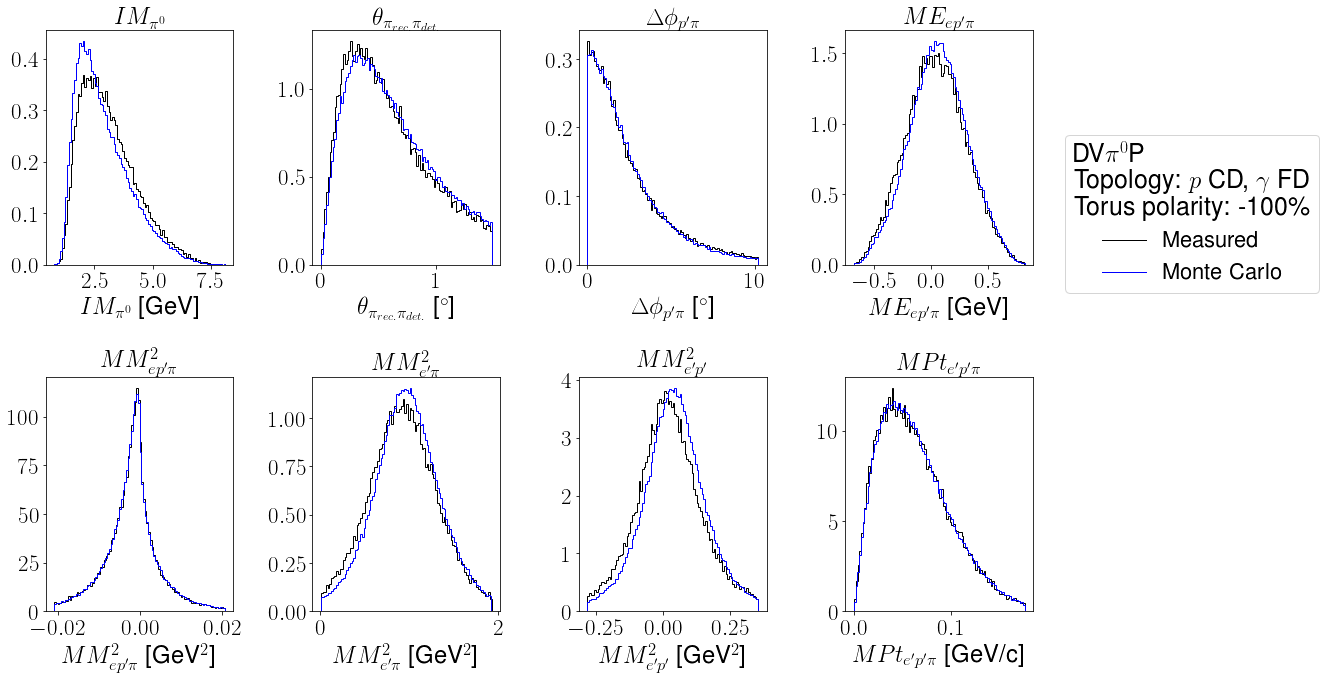

In [648]:
# PthetaMin = 40
# PthetaMax = 60
PpEdges = [0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6]
i=3
PpMin = 0#PpEdges[i]
PpMax = 1.6#PpEdges[i+1]

# df1 = pi0ExpInbCD#makeDVpi0P(saveDVpi0Pvars(CorrectionV1(pi0ExpInbCD, -0.2/(1+np.exp((pi0ExpInbCD.Pp-0.55)/(-0.05))))))
# df1 = makeDVpi0P(saveDVpi0Pvars(CorrectionV1(pi0ExpInbCD, -0.5)))
correction = np.where(-(pi0ExpInbCD.Gp-2)*(pi0ExpInbCD.Gp-5)>0, -0.05*(pi0ExpInbCD.Gp-2)*(pi0ExpInbCD.Gp-5), 0)

df1 = makeDVpi0P(saveDVpi0Pvars(CorrectionV2(pi0ExpInbCD, 0)), "inbending")
df2 = pi0SimInbCD
# df1 = df1.loc[(df1.Ptheta>PthetaMin) & (df1.Ptheta<PthetaMax)]
# df2 = df2.loc[(df2.Ptheta>PthetaMin) & (df2.Ptheta<PthetaMax)]
df1 = df1.loc[(df1.Pp>PpMin) & (df1.Pp<PpMax)]
df2 = df2.loc[(df2.Pp>PpMin) & (df2.Pp<PpMax)]


varstoplot = ["Gp", "reconPi", "coplanarity", "ME_epgg", "MM2_epgg", "MM2_egg", "MM2_ep", "MPt"]
title = [r"$IM_{\pi^0}$", r"$\theta_{\pi_{rec.}\pi_{det.}}$", r"$\Delta\phi_{p'\pi}$", r"$ME_{ep'\pi}$", r"$MM^2_{ep'\pi}$", r"$MM^2_{e'\pi}$", r"$MM^{2}_{e'p'}$", r"$MPt_{e'p'\pi}$" ]
unit = [GeV, degree, degree, GeV, GeV2, GeV2, GeV2, GeVc]
binstarts = [0, -0.04, 0, -1.5, 0, 0, 0.07, 0]
binends = [10, 0.04, 10, 1.5, 0.2, 2, 0.2, 2]
fig, axs = plt.subplots(2, 4, figsize = (15, 10))
for xind in range(0,4):
    for yind in range(0, 2):
        ind =xind+4*yind
        start = binstarts[ind]
        end = binends[ind]
        bins = 100#np.linspace(start, end, 101)
#         if ind == 2 :
#             bins = np.linspace(start, end, 101)
        if ind == 0 :
            simDist_dvpi0, bins = np.histogram(df2[varstoplot[ind]], bins, density = True)
            simDist = simDist_dvpi0
            expDist, bins = np.histogram(df1[varstoplot[ind]], bins, density=True)
            bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
            axs[yind, xind].step(bincenters, expDist, where='mid',color='k', linewidth=1, label = 'Measured')           
            axs[yind, xind].step(bincenters, simDist, where='mid',color='b', linewidth=1, label = 'Monte Carlo')           
            axs[yind, xind].set_ylim(bottom = 0)
        else:
            axs[yind, xind].hist(df1.loc[:, varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', density=True, linewidth=1)
            axs[yind, xind].hist(df2.loc[:, varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='b', density=True, linewidth=1)
        axs[yind, xind].set_title(title[ind])
#         axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
plt.tight_layout()
fig.legend(bbox_to_anchor = (1.25, 0.8), title = "DV"+r"$\pi^0$"+"P\nTopology: "+r"$p$"+" CD, "+r"$\gamma$"+" FD\n"+"Torus polarity: -100\%")
plt.show()

In [243]:
PpCenters =      [0.05, 0.15, 0.25, 0.35, 0.45,  0.55,  0.65,  0.75, 0.85, 0.95, 1.05]
corrections_Pp = [   0,    0,    0,    0,    0,  -0.1,  -0.2,  -0.2, -0.2, -0.2, -0.2]

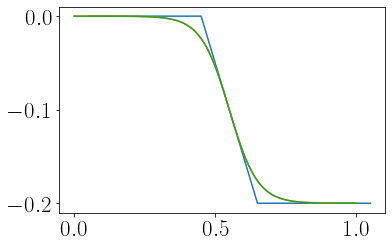

In [250]:
plt.plot(PpCenters, corrections_Pp)
x = np.linspace(0, 1, 101)
res_lsq = least_squares(lstsq_sigmoidfit4, [0.542], args=(PpCenters, corrections_Pp))
plt.plot(x, sigmoidfit4(res_lsq.x, x))
plt.plot(x, -0.2/(1+np.exp((x-0.55)/(-0.05))))

In [100]:
res_lsq.x

array([0.51838116])

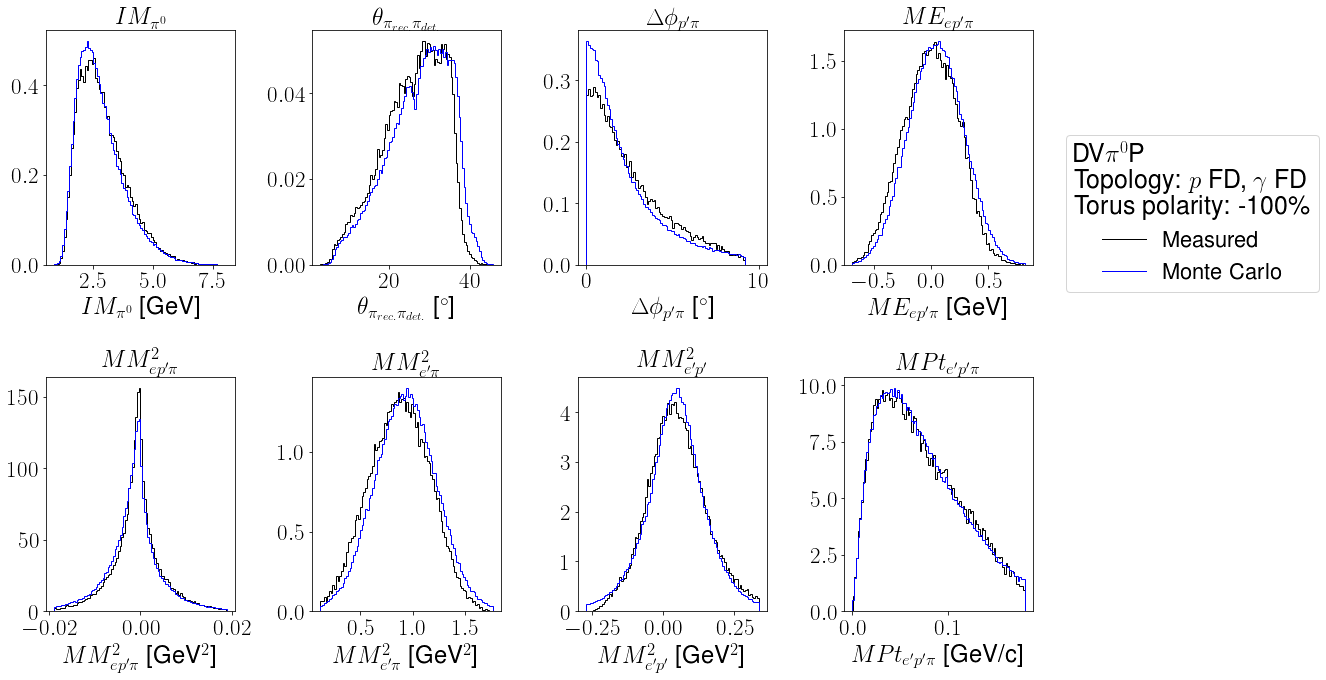

In [639]:
# df1 = makeDVpi0P(saveDVpi0Pvars(CorrectionV3(pi0ExpInbFD, 0.04)), "inbending")
corr = np.where(cubic([1.671, -4.918, 5.151, -2.434] ,pi0ExpInbFD.Pp)<0, cubic([1.671, -4.918, 5.151, -2.434] ,pi0ExpInbFD.Pp), 0)
correction = np.where(-(pi0ExpInbFD.Gp-2)*(pi0ExpInbFD.Gp-5)>0, -0.05*(pi0ExpInbFD.Gp-2)*(pi0ExpInbFD.Gp-5), 0)
df1 = makeDVpi0P(saveDVpi0Pvars(CorrectionV2(CorrectionV3_1(pi0ExpInbFD, corr), correction)), "inbending")
df2 = pi0SimInbFD

PpMin = 0.3
PpMax = 1.6

df1 = df1.loc[(df1.Pp>PpMin) & (df1.Pp<PpMax)]
df2 = df2.loc[(df2.Pp>PpMin) & (df2.Pp<PpMax)]

# PthetaMin = 35
# PthetaMax = 40

# df1 = df1.loc[(df1.Ptheta>PthetaMin) & (df1.Ptheta<PthetaMax)]
# df2 = df2.loc[(df2.Ptheta>PthetaMin) & (df2.Ptheta<PthetaMax)]

varstoplot = ["Gp", "Ptheta", "coplanarity", "ME_epgg", "MM2_epgg", "MM2_egg", "MM2_ep", "MPt"]
title = [r"$IM_{\pi^0}$", r"$\theta_{\pi_{rec.}\pi_{det.}}$", r"$\Delta\phi_{p'\pi}$", r"$ME_{ep'\pi}$", r"$MM^2_{ep'\pi}$", r"$MM^2_{e'\pi}$", r"$MM^{2}_{e'p'}$", r"$MPt_{e'p'\pi}$" ]
unit = [GeV, degree, degree, GeV, GeV2, GeV2, GeV2, GeVc]
binstarts = [0, -0.04, 0, -1.5, 0, 0, 0.07, 0]
binends = [10, 0.04, 10, 1.5, 0.2, 2, 0.2, 2]
fig, axs = plt.subplots(2, 4, figsize = (15, 10))
for xind in range(0,4):
    for yind in range(0, 2):
        ind =xind+4*yind
        start = binstarts[ind]
        end = binends[ind]
        bins = 100#np.linspace(start, end, 101)
        if ind == 2 :
            bins = np.linspace(start, end, 101)
        if ind == 0 :
            simDist_dvpi0, bins = np.histogram(df2[varstoplot[ind]], bins, density = True)
            simDist = simDist_dvpi0
            expDist, bins = np.histogram(df1[varstoplot[ind]], bins, density=True)
            bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
            axs[yind, xind].step(bincenters, expDist, where='mid',color='k', linewidth=1, label = 'Measured')           
            axs[yind, xind].step(bincenters, simDist, where='mid',color='b', linewidth=1, label = 'Monte Carlo')           
            axs[yind, xind].set_ylim(bottom = 0)
        else:
            axs[yind, xind].hist(df1.loc[:, varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', density=True, linewidth=1)
            axs[yind, xind].hist(df2.loc[:, varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='b', density=True, linewidth=1)
        axs[yind, xind].set_title(title[ind])
#         axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
plt.tight_layout()
fig.legend(bbox_to_anchor = (1.25, 0.8), title = "DV"+r"$\pi^0$"+"P\nTopology: "+r"$p$"+" FD, "+r"$\gamma$"+" FD\n"+"Torus polarity: -100\%")
plt.show()

In [397]:
PpCenters = [0.46, 0.55, 0.65,  0.75, 0.85,  0.95,  1.05, 1.15, 1.25, 1.35,  1.45, 1.55 ]
thetaCorr = [   -1, -0.8, -0.6,  -0.6, -0.6,  -0.6,  -0.6, -0.5, -0.4, -0.2,  -0.2,  -0.1]

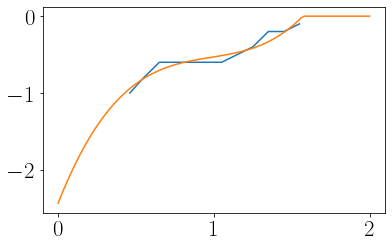

In [452]:
plt.plot(PpCenters,thetaCorr)
x = np.linspace(0, 2, 101)
res_lsq = least_squares(cubicfit, [0, 0, -1.197, 0.68], args=(PpCenters, thetaCorr))
# plt.plot(x, np.where(np.poly1d([1.671, -4.918, 5.151, -2.434])(x)<0, np.poly1d([1.671, -4.918, 5.151, -2.434])(x), 0))
corr = np.poly1d([1.671, -4.918, 5.151, -2.434])(x)       
corr = np.where(corr<0, corr, 0)

plt.plot(x, corr)

In [441]:
print(res_lsq.x)

[ 1.67129678 -4.91785787  5.15118706 -2.43416483]


In [626]:
def cubic(args, x):
    x = np.array(x)
    a, b, c, d = args

    return a*x**3 + b*x**2 +c*x +d

In [438]:
def cubicfit(args, x, y):
    return cubic(args, x) - y

In [248]:
def sigmoidfit4(args, x):
    x = np.array(x)
    a = args
    return -0.2/(1+np.exp((x-a)/(-0.05)))

In [249]:
def lstsq_sigmoidfit4(args, x, y):
    return sigmoidfit4(args, x) - y

In [103]:
parent_exp = "/Volumes/Extreme SSD/Feb2022/SimtoDat/v4/inb/exp/"

pi0ExpOutb = pd.read_pickle(parent_exp + "pi0.pkl")

<AxesSubplot:>

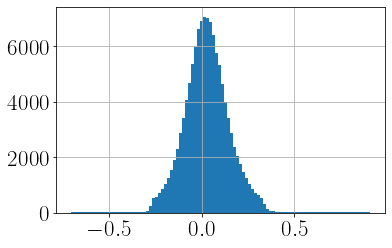

In [106]:
pi0ExpOutb.MM2_ep.hist(bins = 100)

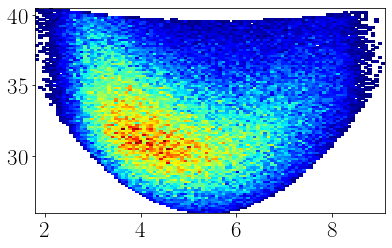

In [145]:
plt.hist2d(dvcsSimInbFD.Gp, dvcsSimInbFD.coneAngle, bins = 101, cmap = cmap, cmin =1)
plt.show()

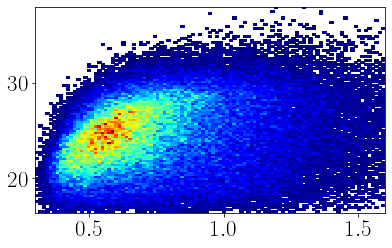

In [150]:
plt.hist2d(bkgSimInbCD.Pp, bkgSimInbCD.coneAngle, bins = 101, cmap = cmap, cmin =1)
plt.show()

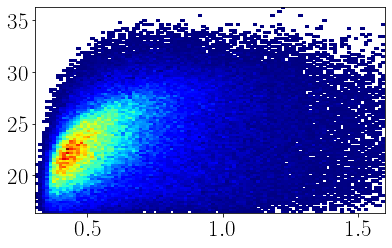

In [151]:
plt.hist2d(epgExpInbCD.Pp, epgExpInbCD.coneAngle, bins = 101, cmap = cmap, cmin =1)
plt.show()

In [429]:
# parent_MC = "/Volumes/Extreme SSD/Feb2022/SimtoDat/v4/outb/dvcs/"
# parent_epg = "/Volumes/Extreme SSD/Feb2022/SimtoDat/v4/outb/epg/"
# parent_MC_bkg1g = "/Volumes/Extreme SSD/Feb2022/SimtoDat/v4/outb/bkg_1g/"
# parent_MC_bkg2g = "/Volumes/Extreme SSD/Feb2022/SimtoDat/v4/outb/bkg_2g/"
# parent_exp = "/Volumes/Extreme SSD/Feb2022/SimtoDat/v4/outb/exp/"

parent_MC = "/Volumes/Extreme SSD/Feb2022/SimtoDat/v4.1/outb/dvcs/"
# parent_epg = "/Volumes/Extreme SSD/Feb2022/SimtoDat/v4/outb/epg/"
parent_MC_bkg1g = "/Volumes/Extreme SSD/Feb2022/SimtoDat/v4.1/outb/bkg_1g/"
parent_MC_bkg2g = "/Volumes/Extreme SSD/Feb2022/SimtoDat/v4.1/outb/bkg_2g/"
parent_exp = "/Volumes/Extreme SSD/Feb2022/SimtoDat/v4.1/outb/exp/"

# dvcsSimOutb = pd.read_pickle(parent_epg + "4240_epg.pkl")
# bkgSimOutb = pd.read_pickle(parent_epg + "4243_epg.pkl")

# dvcsSimOutb = pd.read_pickle(parent_MC + "4240.pkl")
# bkgSimOutb = pd.read_pickle(parent_MC_bkg1g + "4243.pkl")
# pi0SimOutb = pd.read_pickle(parent_MC_bkg2g + "4243.pkl")
epgExpOutb = pd.read_pickle(parent_exp + "dvcs.pkl")
pi0ExpOutb = pd.read_pickle(parent_exp + "pi0.pkl")

In [430]:
dvcsSimOutb = dvcsSimOutb.loc[dvcsSimOutb.Pp<1.6, :]
bkgSimOutb = bkgSimOutb.loc[bkgSimOutb.Pp<1.6, :]
pi0SimOutb = pi0SimOutb.loc[pi0SimOutb.Pp<1.6, :]
epgExpOutb = epgExpOutb.loc[epgExpOutb.Pp<1.6, :]
pi0ExpOutb = pi0ExpOutb.loc[pi0ExpOutb.Pp<1.6, :]

In [431]:
epgExpOutbCDFT = epgExpOutb.loc[epgExpOutb.config == 3]
pi0ExpOutbCDFT = pi0ExpOutb.loc[pi0ExpOutb.config == 3]
dvcsSimOutbCDFT = dvcsSimOutb.loc[dvcsSimOutb.config == 3]
bkgSimOutbCDFT = bkgSimOutb.loc[bkgSimOutb.config == 3]
pi0SimOutbCDFT = pi0SimOutb.loc[pi0SimOutb.config == 3]

epgExpOutbCD = epgExpOutb.loc[epgExpOutb.config == 2]
pi0ExpOutbCD = pi0ExpOutb.loc[pi0ExpOutb.config == 2]
dvcsSimOutbCD =  dvcsSimOutb.loc[dvcsSimOutb.config == 2]
bkgSimOutbCD = bkgSimOutb.loc[bkgSimOutb.config == 2]
pi0SimOutbCD = pi0SimOutb.loc[pi0SimOutb.config == 2]

epgExpOutbFD = epgExpOutb.loc[epgExpOutb.config == 1]
pi0ExpOutbFD = pi0ExpOutb.loc[pi0ExpOutb.config == 1]
dvcsSimOutbFD =  dvcsSimOutb.loc[dvcsSimOutb.config == 1]
bkgSimOutbFD = bkgSimOutb.loc[bkgSimOutb.config == 1]
pi0SimOutbFD = pi0SimOutb.loc[pi0SimOutb.config == 1]

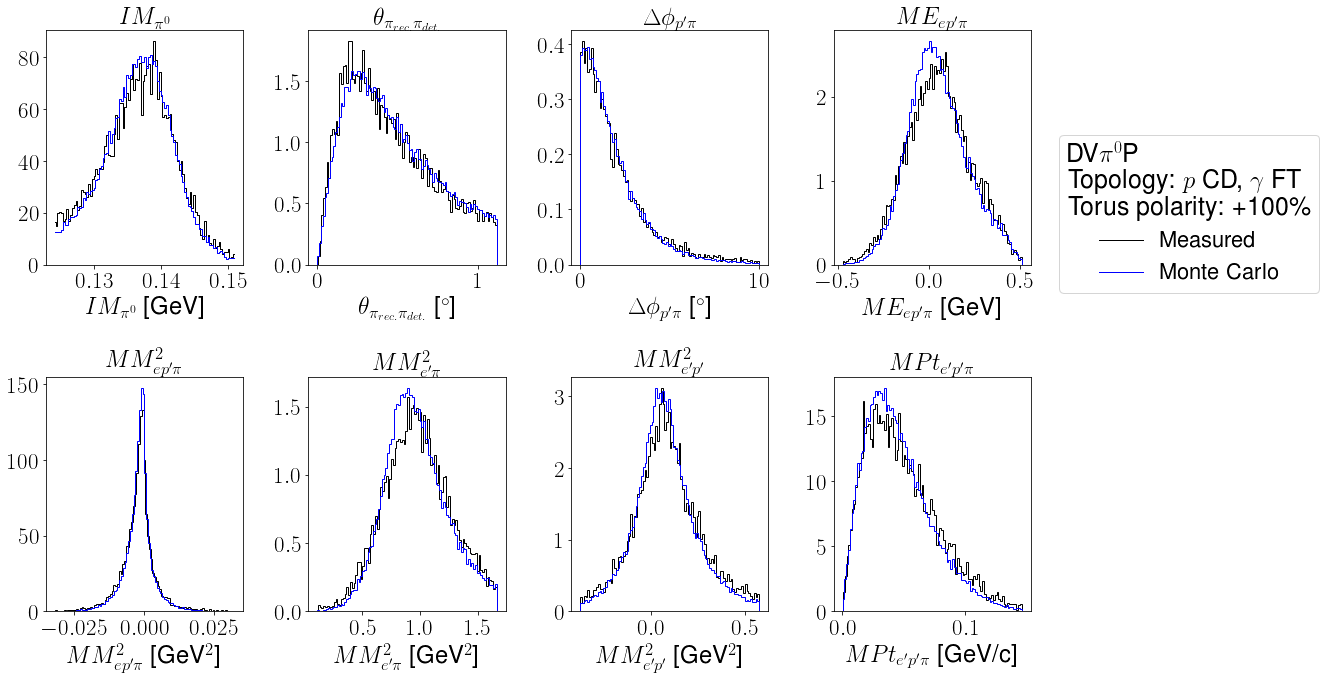

In [485]:
df1 = makeDVpi0P(pi0ExpOutbCDFT, "outbending")#makeDVpi0P(saveDVpi0Pvars(CorrectionV1(pi0ExpOutbCDFT, -0.2/(1+np.exp((pi0ExpOutbCDFT.Pp-0.55)/(-0.05))))), pol = "outbending")
df2 = makeDVpi0P(pi0SimOutbCDFT, "outbending")
# df1 = df1.loc[(df1.Ptheta>PthetaMin) & (df1.Ptheta<PthetaMax)]
# df2 = df2.loc[(df2.Ptheta>PthetaMin) & (df2.Ptheta<PthetaMax)]

varstoplot = ["Mpi0", "reconPi", "coplanarity", "ME_epgg", "MM2_epgg", "MM2_egg", "MM2_ep", "MPt"]
title = [r"$IM_{\pi^0}$", r"$\theta_{\pi_{rec.}\pi_{det.}}$", r"$\Delta\phi_{p'\pi}$", r"$ME_{ep'\pi}$", r"$MM^2_{ep'\pi}$", r"$MM^2_{e'\pi}$", r"$MM^{2}_{e'p'}$", r"$MPt_{e'p'\pi}$" ]
unit = [GeV, degree, degree, GeV, GeV2, GeV2, GeV2, GeVc]
binstarts = [0, -0.04, 0, -1.5, 0, 0, 0.07, 0]
binends = [10, 0.04, 10, 1.5, 0.2, 2, 0.2, 2]
fig, axs = plt.subplots(2, 4, figsize = (15, 10))
for xind in range(0,4):
    for yind in range(0, 2):
        ind =xind+4*yind
        start = binstarts[ind]
        end = binends[ind]
        bins = 100#np.linspace(start, end, 101)
        if ind == 2 :
            bins = np.linspace(start, end, 101)
        if ind == 0 :
            simDist_dvpi0, bins = np.histogram(df2[varstoplot[ind]], bins, density = True)
            simDist = simDist_dvpi0
            expDist, bins = np.histogram(df1[varstoplot[ind]], bins, density=True)
            bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
            axs[yind, xind].step(bincenters, expDist, where='mid',color='k', linewidth=1, label = 'Measured')           
            axs[yind, xind].step(bincenters, simDist, where='mid',color='b', linewidth=1, label = 'Monte Carlo')           
            axs[yind, xind].set_ylim(bottom = 0)
        else:
            axs[yind, xind].hist(df1.loc[:, varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', density=True, linewidth=1)
            axs[yind, xind].hist(df2.loc[:, varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='b', density=True, linewidth=1)
        axs[yind, xind].set_title(title[ind])
#         axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
plt.tight_layout()
fig.legend(bbox_to_anchor = (1.25, 0.8), title = "DV"+r"$\pi^0$"+"P\nTopology: "+r"$p$"+" CD, "+r"$\gamma$"+" FT\n"+"Torus polarity: +100\%")
plt.show()

In [52]:
simDist_dvpi0, bins = np.histogram(df2["reconPi"], 100, density = True)
print(bins[np.argmax(simDist_dvpi0)]+np.diff(bins)[0]/2)
simDist_dvpi0, bins = np.histogram(df2["MPt"], 100, density = True)
print(bins[np.argmax(simDist_dvpi0)]+np.diff(bins)[0]/2)

0.3403628969938686
0.05050915022476904


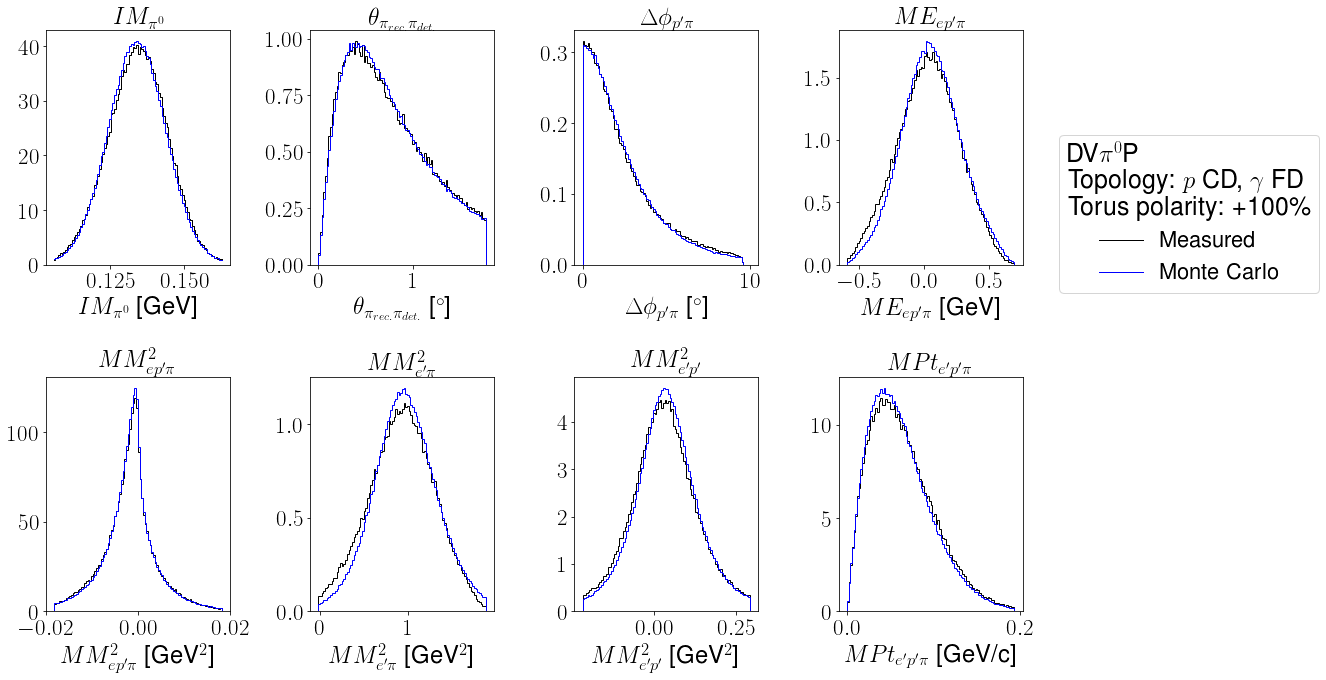

In [652]:
correction = np.where(-(pi0ExpOutbCD.Gp-2)*(pi0ExpOutbCD.Gp-5)>0, -0.05*(pi0ExpOutbCD.Gp-2)*(pi0ExpOutbCD.Gp-5), 0)

df1 = makeDVpi0P(saveDVpi0Pvars(CorrectionV2(pi0ExpOutbCD, correction)), "outbending")
df2 = pi0SimOutbCD
# df1 = df1.loc[(df1.Ptheta>PthetaMin) & (df1.Ptheta<PthetaMax)]
# df2 = df2.loc[(df2.Ptheta>PthetaMin) & (df2.Ptheta<PthetaMax)]

varstoplot = ["Mpi0", "reconPi", "coplanarity", "ME_epgg", "MM2_epgg", "MM2_egg", "MM2_ep", "MPt"]
title = [r"$IM_{\pi^0}$", r"$\theta_{\pi_{rec.}\pi_{det.}}$", r"$\Delta\phi_{p'\pi}$", r"$ME_{ep'\pi}$", r"$MM^2_{ep'\pi}$", r"$MM^2_{e'\pi}$", r"$MM^{2}_{e'p'}$", r"$MPt_{e'p'\pi}$" ]
unit = [GeV, degree, degree, GeV, GeV2, GeV2, GeV2, GeVc]
binstarts = [0, -0.04, 0, -1.5, 0, 0, 0.07, 0]
binends = [10, 0.04, 10, 1.5, 0.2, 2, 0.2, 2]
fig, axs = plt.subplots(2, 4, figsize = (15, 10))
for xind in range(0,4):
    for yind in range(0, 2):
        ind =xind+4*yind
        start = binstarts[ind]
        end = binends[ind]
        bins = 100#np.linspace(start, end, 101)
        if ind == 2 :
            bins = np.linspace(start, end, 101)
        if ind == 0 :
            simDist_dvpi0, bins = np.histogram(df2[varstoplot[ind]], bins, density = True)
            simDist = simDist_dvpi0
            expDist, bins = np.histogram(df1[varstoplot[ind]], bins, density=True)
            bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
            axs[yind, xind].step(bincenters, expDist, where='mid',color='k', linewidth=1, label = 'Measured')           
            axs[yind, xind].step(bincenters, simDist, where='mid',color='b', linewidth=1, label = 'Monte Carlo')           
            axs[yind, xind].set_ylim(bottom = 0)
        else:
            axs[yind, xind].hist(df1.loc[:, varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', density=True, linewidth=1)
            axs[yind, xind].hist(df2.loc[:, varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='b', density=True, linewidth=1)
        axs[yind, xind].set_title(title[ind])
#         axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
plt.tight_layout()
fig.legend(bbox_to_anchor = (1.25, 0.8), title = "DV"+r"$\pi^0$"+"P\nTopology: "+r"$p$"+" CD, "+r"$\gamma$"+" FD\n"+"Torus polarity: +100\%")
plt.show()

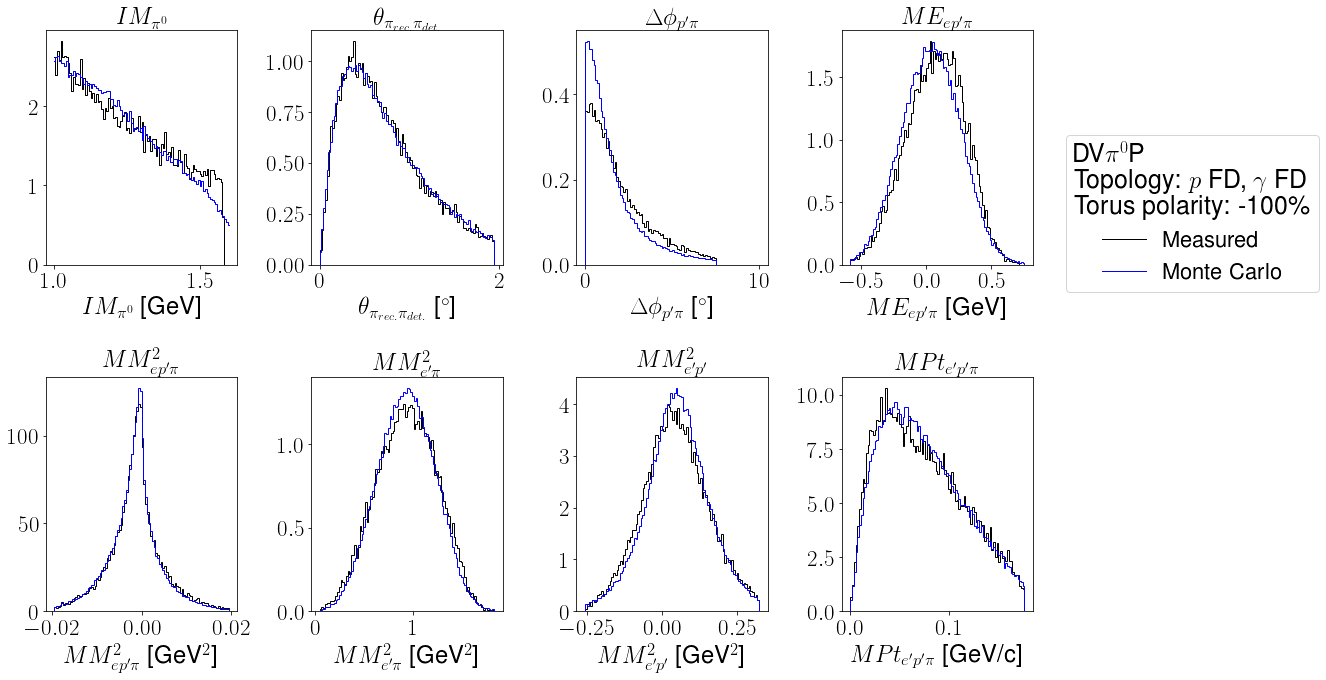

In [666]:
# correction = np.where(cubic(res_lsq.x, pi0ExpOutbFD.Gp)>0, cubic(res_lsq.x, pi0ExpOutbFD.Gp), 0)
correction = np.where(-(pi0ExpOutbFD.Gp-2)*(pi0ExpOutbFD.Gp-5)>0, -0.05*(pi0ExpOutbFD.Gp-2)*(pi0ExpOutbFD.Gp-5), 0)

df1 = makeDVpi0P(saveDVpi0Pvars(CorrectionV2(CorrectionV3(pi0ExpOutbFD, -0.02), correction)), "outbending")
# df1 = makeDVpi0P(saveDVpi0Pvars(CorrectionV3_1(pi0ExpOutbFD, -0.5)), "outbending")
df2 = makeDVpi0P(saveDVpi0Pvars(SmearingV3(pi0SimOutbFD, sigmaFDOutb(pi0SimOutbFD.Pp), "outbending")), "outbending")

PpMin = 1
PpMax = 1.6

df1 = df1.loc[(df1.Pp>PpMin) & (df1.Pp<PpMax)]
df2 = df2.loc[(df2.Pp>PpMin) & (df2.Pp<PpMax)]

varstoplot = ["Pp", "reconPi", "coplanarity", "ME_epgg", "MM2_epgg", "MM2_egg", "MM2_ep", "MPt"]
title = [r"$IM_{\pi^0}$", r"$\theta_{\pi_{rec.}\pi_{det.}}$", r"$\Delta\phi_{p'\pi}$", r"$ME_{ep'\pi}$", r"$MM^2_{ep'\pi}$", r"$MM^2_{e'\pi}$", r"$MM^{2}_{e'p'}$", r"$MPt_{e'p'\pi}$" ]
unit = [GeV, degree, degree, GeV, GeV2, GeV2, GeV2, GeVc]
binstarts = [0, -0.04, 0, -1.5, 0, 0, 0.07, 0]
binends = [10, 0.04, 10, 1.5, 0.2, 2, 0.2, 2]
fig, axs = plt.subplots(2, 4, figsize = (15, 10))
for xind in range(0,4):
    for yind in range(0, 2):
        ind =xind+4*yind
        start = binstarts[ind]
        end = binends[ind]
        bins = 100#np.linspace(start, end, 101)
        if ind == 2 :
            bins = np.linspace(start, end, 101)
        if ind == 0 :
            simDist_dvpi0, bins = np.histogram(df2[varstoplot[ind]], bins, density = True)
            simDist = simDist_dvpi0
            expDist, bins = np.histogram(df1[varstoplot[ind]], bins, density=True)
            bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
            axs[yind, xind].step(bincenters, expDist, where='mid',color='k', linewidth=1, label = 'Measured')           
            axs[yind, xind].step(bincenters, simDist, where='mid',color='b', linewidth=1, label = 'Monte Carlo')           
            axs[yind, xind].set_ylim(bottom = 0)
        else:
            axs[yind, xind].hist(df1.loc[:, varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', density=True, linewidth=1)
            axs[yind, xind].hist(df2.loc[:, varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='b', density=True, linewidth=1)
        axs[yind, xind].set_title(title[ind])
#         axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
plt.tight_layout()
fig.legend(bbox_to_anchor = (1.25, 0.8), title = "DV"+r"$\pi^0$"+"P\nTopology: "+r"$p$"+" FD, "+r"$\gamma$"+" FD\n"+"Torus polarity: -100\%")
plt.show()

0.005896627978235315
coneAngle 18.63759374816523
reconGam 0.3022993522025939
coplanarity 2.084748085042767
ME_epg 0.034972735975757896
MM2_epg -0.001650581498961964
MM2_eg 0.9475543700765465
MM2_ep 0.018625427785204197
MPt 0.03535225880468462


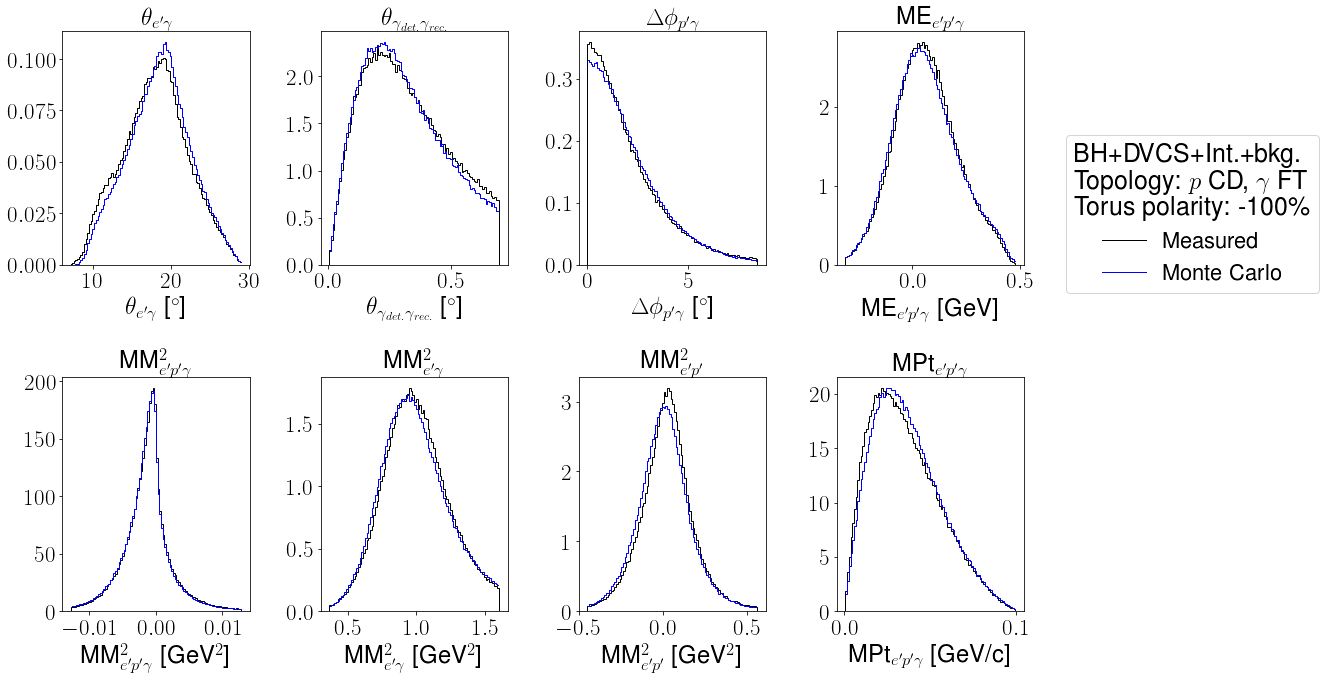

<Figure size 432x288 with 0 Axes>

In [490]:
df1 = dvcsSimOutbCDFT
df2 = bkgSimOutbCDFT
df3 = epgExpOutbCDFT#saveDVCSvars(CorrectionV1(epgExpOutbCDFT, -0.2/(1+np.exp((epgExpOutbCDFT.Pp-0.55)/(-0.05)))))
df4 = pi0ExpOutbCDFT
df5 = pi0SimOutbCDFT
PpMin = 0
PpMax = 1.6
df1 = df1.loc[(df1.Pp>PpMin) & (df1.Pp<PpMax), :]
df2 = df2.loc[(df2.Pp>PpMin) & (df2.Pp<PpMax), :]
df3 = df3.loc[(df3.Pp>PpMin) & (df3.Pp<PpMax), :]
df4 = df4.loc[(df4.Pp>PpMin) & (df4.Pp<PpMax), :]
df5 = df5.loc[(df5.Pp>PpMin) & (df5.Pp<PpMax), :]

contOutbCDFT = len(df4)*len(df2)/len(df5)/len(df3)
print(contOutbCDFT)
varstoplot = ["coneAngle", "reconGam", "coplanarity", "ME_epg", "MM2_epg", "MM2_eg", "MM2_ep", "MPt"]
title = [r"$\theta_{e'\gamma}$", r"$\theta_{\gamma_{det.}\gamma_{rec.}}$", r"$\Delta\phi_{p'\gamma}$" , "ME"+r"${}_{e'p'\gamma}$", "MM"+r"${}^{2}_{e'p'\gamma}$", "MM"+r"${}^{2}_{e'\gamma}$", "MM"+r"${}^{2}_{e'p'}$", "MPt"+r"${}_{e'p'\gamma}$"]
unit = [degree, degree, degree, GeV, GeV2, GeV2, GeV2, GeVc]
# binstarts = [10, 0, 0, -0.5, -0.01, 0.1,-0.4 , 0]
# binends = [40, 2, 10, 1.2, 0.01, 1.7, 0.4, 0.2]
fig, axs = plt.subplots(2, 4, figsize = (15,10))
for yind in range(0, 2):
    for xind in range(0,4):
        ind = 4*yind + xind
        start = binstarts[ind]
        end = binends[ind]
#         bins = 100#np.linspace(start, end, 101)
#         if ind == 2 :
#             bins = np.linspace(start, end, 101)
        simDist_dvpi0, bins = np.histogram(df2[varstoplot[ind]], 100, density = True)
        simDist_dvcs, _ = np.histogram(df1[varstoplot[ind]], bins, density = True)
#         simDist = len_pi0ExpOutbCDFT/len_pi0SimOutbCDFT*simDist_dvpi0 + (len_epgExpOutbCDFT/len_dvcsSimOutbCDFT-len_bkgSimOutbCDFT/len_pi0SimOutbCDFT*len_pi0ExpOutbCDFT/len_dvcsSimOutbCDFT)*simDist_dvcs
        simDist = (1-contOutbCDFT)*simDist_dvcs + contOutbCDFT*simDist_dvpi0
        expDist, _ = np.histogram(df3[varstoplot[ind]], bins, density=True)
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        if ind == 0:
            axs[yind, xind].step(bincenters, expDist, where='mid',color='k', linewidth=1, label = 'Measured')           
            axs[yind, xind].step(bincenters, simDist, where='mid',color='b', linewidth=1, label = 'Monte Carlo')  
            axs[yind, xind].set_ylim(bottom = 0)
        else:
            axs[yind, xind].hist(df3[varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', density=True, linewidth=1)
            axs[yind, xind].step(bincenters, simDist, where='mid',color='b', linewidth=1)
#         axs[yind, xind].step(bincenters, c*simDist_dvpi0, where='mid',color='g', linewidth=1)
#         axs[yind, xind].step(bincenters, (1/len_dvcsSimOutbCDFT-cont_Outb_CD/len_dvcsSimOutbCDFT)*len_epgExpOutbCDFT*simDist_dvcs, where='mid',color='r', linewidth=1)
#         axs[yind, xind].hist(epgExpOutbCDFT[varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', linewidth=1)
#         axs[yind, xind].step(bincenters, expDist - len_pi0ExpOutbCDFT/len_pi0SimOutbCDFT*simDist_dvpi0, where='mid',color='k', linewidth=1)
        print(varstoplot[ind], nphistmean(expDist - len(pi0ExpOutbCDFT)/len(pi0SimOutbCDFT)*simDist_dvpi0, bins))
#         axs[yind, xind].step(bincenters, (1-c)*simDist_dvcs, where='mid',color='r', linewidth=1)
        axs[yind, xind].set_title(title[ind])
#         axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
# axs[0,2].set_xticks([2.2, 2.7, 3.2])
# axs[1,0].set_xticks([0.29, 0.32, 0.35, 0.38])
# axs[1,1].set_xticks([0.23, 0.3, 0.39, 0.52])
# axs[1,2].set_xticks([0, 90, 180, 270, 360])
plt.tight_layout()
# plt.savefig("kineCD.pdf")
# plt.savefig("analysisnote/Outbending1.pdf")
fig.legend(bbox_to_anchor = (1.25, 0.8), title = "BH+DVCS+Int.+bkg.\nTopology: "+r"$p$"+" CD, "+r"$\gamma$"+" FT\n"+"Torus polarity: -100\%")
plt.show()
plt.clf()

0.14697841394214653
coneAngle 21.11596159563745
reconGam 0.30891943997490623
coplanarity 2.2169094128696094
ME_epg 0.00396082445215012
MM2_epg -0.0014496812278669952
MM2_eg 0.8931557410781382
MM2_ep -0.0006261037610174059
MPt 0.04675491199556233


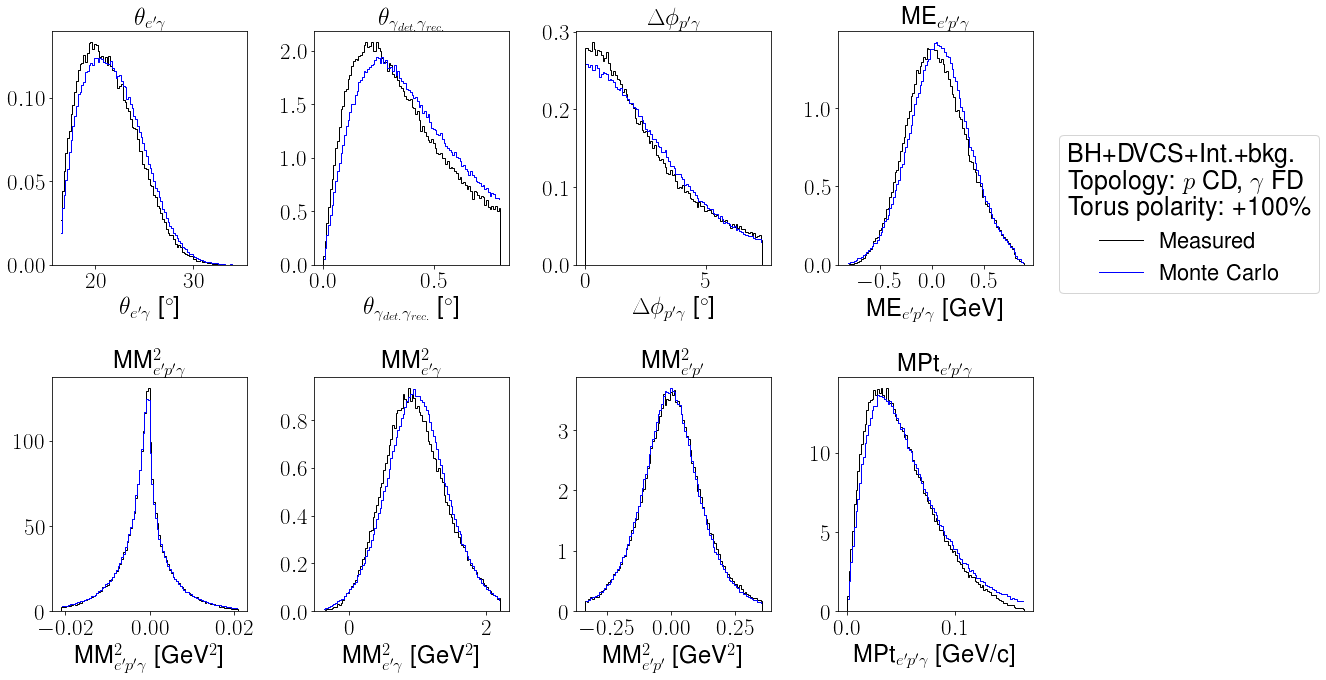

<Figure size 432x288 with 0 Axes>

In [653]:
df1 = dvcsSimOutbCD#makeDVCS(dvcsSimOutbCD, "outbending")
df2 = bkgSimOutbCD#makeDVCS(bkgSimOutbCD, "outbending")
df3 = epgExpOutbCD#saveDVCSvars(CorrectionV1(epgExpOutbCD, -0.2/(1+np.exp((epgExpOutbCD.Pp-0.55)/(-0.05)))))

correction = np.where(-(epgExpOutbCD.Gp-2)*(epgExpOutbCD.Gp-5)>0, -0.05*(epgExpOutbCD.Gp-2)*(epgExpOutbCD.Gp-5), 0)
df3 = makeDVCS(saveDVCSvars(CorrectionV2(CorrectionV3(epgExpOutbCD, -0.02), correction)), "outbending")
df4 = pi0ExpOutbCD
df5 = pi0SimOutbCD
PpMin = 0
PpMax = 0.6
df1 = df1.loc[(df1.Pp>PpMin) & (df1.Pp<PpMax), :]
df2 = df2.loc[(df2.Pp>PpMin) & (df2.Pp<PpMax), :]
df3 = df3.loc[(df3.Pp>PpMin) & (df3.Pp<PpMax), :]
df4 = df4.loc[(df4.Pp>PpMin) & (df4.Pp<PpMax), :]
df5 = df5.loc[(df5.Pp>PpMin) & (df5.Pp<PpMax), :]

contOutbCD = len(df4)*len(df2)/len(df5)/len(df3)
print(contOutbCD)
varstoplot = ["coneAngle", "reconGam", "coplanarity", "ME_epg", "MM2_epg", "MM2_eg", "MM2_ep", "MPt"]
title = [r"$\theta_{e'\gamma}$", r"$\theta_{\gamma_{det.}\gamma_{rec.}}$", r"$\Delta\phi_{p'\gamma}$" , "ME"+r"${}_{e'p'\gamma}$", "MM"+r"${}^{2}_{e'p'\gamma}$", "MM"+r"${}^{2}_{e'\gamma}$", "MM"+r"${}^{2}_{e'p'}$", "MPt"+r"${}_{e'p'\gamma}$"]
unit = [degree, degree, degree, GeV, GeV2, GeV2, GeV2, GeVc]
# binstarts = [10, 0, 0, -0.5, -0.01, 0.1,-0.4 , 0]
# binends = [40, 2, 10, 1.2, 0.01, 1.7, 0.4, 0.2]
fig, axs = plt.subplots(2, 4, figsize = (15,10))
for yind in range(0, 2):
    for xind in range(0,4):
        ind = 4*yind + xind
        start = binstarts[ind]
        end = binends[ind]
        bins = 100#np.linspace(start, end, 101)
        if ind == 1 :
            bins = np.linspace(0, 0.8, 101)
        simDist_dvpi0, bins = np.histogram(df2[varstoplot[ind]], bins, density = True)
        simDist_dvcs, _ = np.histogram(df1[varstoplot[ind]], bins, density = True)
#         simDist = len_pi0ExpOutbCD/len_pi0SimOutbCD*simDist_dvpi0 + (len_epgExpOutbCD/len_dvcsSimOutbCD-len_bkgSimOutbCD/len_pi0SimOutbCD*len_pi0ExpOutbCD/len_dvcsSimOutbCD)*simDist_dvcs
        simDist = (1-contOutbCD)*simDist_dvcs + contOutbCD*simDist_dvpi0
        expDist, _ = np.histogram(df3[varstoplot[ind]], bins, density=True)
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        if ind == 0:
            axs[yind, xind].step(bincenters, expDist, where='mid',color='k', linewidth=1, label = 'Measured')           
            axs[yind, xind].step(bincenters, simDist, where='mid',color='b', linewidth=1, label = 'Monte Carlo')  
            axs[yind, xind].set_ylim(bottom = 0)
        else:
            axs[yind, xind].hist(df3[varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', density=True, linewidth=1)
            axs[yind, xind].step(bincenters, simDist, where='mid',color='b', linewidth=1)
#         axs[yind, xind].step(bincenters, c*simDist_dvpi0, where='mid',color='g', linewidth=1)
#         axs[yind, xind].step(bincenters, (1/len_dvcsSimOutbCD-cont_Outb_CD/len_dvcsSimOutbCD)*len_epgExpOutbCD*simDist_dvcs, where='mid',color='r', linewidth=1)
#         axs[yind, xind].hist(epgExpOutbCD[varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', linewidth=1)
#         axs[yind, xind].step(bincenters, expDist - len_pi0ExpOutbCD/len_pi0SimOutbCD*simDist_dvpi0, where='mid',color='k', linewidth=1)
        print(varstoplot[ind], nphistmean(expDist - len(pi0ExpOutbCD)/len(pi0SimOutbCD)*simDist_dvpi0, bins))
#         axs[yind, xind].step(bincenters, (1-c)*simDist_dvcs, where='mid',color='r', linewidth=1)
        axs[yind, xind].set_title(title[ind])
#         axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
# axs[0,2].set_xticks([2.2, 2.7, 3.2])
# axs[1,0].set_xticks([0.29, 0.32, 0.35, 0.38])
# axs[1,1].set_xticks([0.23, 0.3, 0.39, 0.52])
# axs[1,2].set_xticks([0, 90, 180, 270, 360])
plt.tight_layout()
# plt.savefig("kineCD.pdf")
# plt.savefig("analysisnote/Outbending1.pdf")
fig.legend(bbox_to_anchor = (1.25, 0.8), title = "BH+DVCS+Int.+bkg.\nTopology: "+r"$p$"+" CD, "+r"$\gamma$"+" FD\n"+"Torus polarity: +100\%")
plt.show()
plt.clf()

In [154]:
df3 = saveDVCSvars(CorrectionV1(epgExpOutbCD, -0.2/(1+np.exp((epgExpOutbCD.Pp-0.55)/(-0.05)))))
pvalue_opt = 0
for i in range(0, 10):
    if i == 0:
        dist, bins = np.histogram(df3.reconGam, bins = np.linspace(0.03, 0.85, 101))
        params = [1, 0.3, 0.03, 0, 0, 0]
    else:
        dist, bins = np.histogram(df3.reconGam, bins = np.linspace(lb, ub, 101))
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    hist = dist/np.sum(dist)/np.diff(bincenters)[0]
    res_lsq = least_squares(lstsq_skewnormfit, params, args=(bincenters, hist))
    params = res_lsq.x
    a, loc, scale, b, c, d = params
    lb = 0.005
    ub = skewnorm.ppf(0.9974, a = a, loc = loc, scale = scale)
    pvalue, chi2fit, dof = probFit(dist, bins,  skewnormfit(res_lsq.x, bincenters), res_lsq)
    print(lb, ub, pvalue)
    if pvalue>pvalue_opt:
        pvalue_opt = pvalue
        bins_opt = bins
        bincenters_opt = bincenters
        params_opt = res_lsq.x
        lb_opt = lb
        ub_opt = ub
        dist_opt = dist
        print(params_opt, lb, ub, pvalue)

0.005 1.0992695798731886 0.8482662509769915
[ 3.79524825  0.02508441  0.35669987 -0.80723449  3.16398794 -1.81393016] 0.005 1.0992695798731886 0.8482662509769915
0.005 0.8555253930717279 0.0
0.005 1.0662911225969949 0.2824825882310338


<ipython-input-80-36f1c948bc16>:7: RuntimeWarning: divide by zero encountered in true_divide
  chi2fit = np.sum((hist - fit)**2/unchist**2)


0.005 0.8001990267727643 0.0
0.005 1.0052835284920705 0.9316119803691777
[ 3.31264074  0.01157462  0.32997648 -1.07641924  4.68876101 -3.17770484] 0.005 1.0052835284920705 0.9316119803691777
0.005 0.7846695934867687 0.0
0.005 0.9938188672599225 0.23154393383744076
0.005 0.8059723899277185 0.0
0.005 1.0162893587087534 0.5691717045152402
0.005 0.7724116155764704 0.0


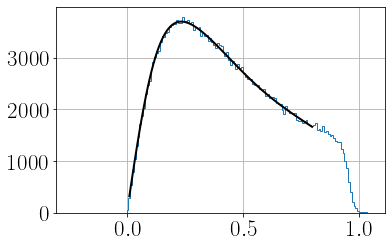

In [155]:
df3.reconGam.hist(bins = extendedBins(bins_opt, 30, 30), histtype = 'step')

# df = 4.5
# scale = 0.065
# x = np.linspace(-0.4, 0.4, 100)
plt.plot(bincenters_opt, skewnormfit(params_opt, bincenters_opt)*np.sum(dist_opt)*np.diff(bincenters_opt)[0], 'k-', lw=2, label='frozen pdf')
plt.show()

In [156]:
pvalue_opt = 0
for i in range(0, 10):
    if i == 0:
        dist, bins = np.histogram(df3.MPt, bins = np.linspace(0.003, 0.09, 101))
        params = [1, 0, 0.03, 0, 0, 0]
    else:
        dist, bins = np.histogram(df3.MPt, bins = np.linspace(lb, ub, 101))
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    hist = dist/np.sum(dist)/np.diff(bincenters)[0]
    res_lsq = least_squares(lstsq_skewnormfit, params, args=(bincenters, hist))
    params = res_lsq.x
    a, loc, scale, b, c, d = params
    lb = 0.01
    ub = skewnorm.ppf(0.9974, a = a, loc = loc, scale = scale)
    pvalue, chi2fit, dof = probFit(dist, bins,  skewnormfit(res_lsq.x, bincenters), res_lsq)
    print(pvalue, lb, ub)
    if pvalue>pvalue_opt:
        pvalue_opt = pvalue
        bins_opt = bins
        bincenters_opt = bincenters
        params_opt = res_lsq.x
        lb_opt = lb
        ub_opt = ub
        dist_opt = dist
        print(params_opt, lb, ub, pvalue)

0.053898700248072196 0.01 0.11662390028655133
[ 2.18119332e+00  1.55193952e-03  3.82114321e-02 -9.46265686e+00
  4.20847884e+02 -2.90647834e+03] 0.01 0.11662390028655133 0.053898700248072196
0.05790371741567679 0.01 0.1513691807895446
[ 3.29870241e+00  7.70043319e-03  4.77074394e-02 -2.24449480e+00
  9.78756703e+01 -5.39124333e+02] 0.01 0.1513691807895446 0.05790371741567679
0.5490265277255044 0.01 0.16405330740222288
[ 3.77264871e+00  8.82248163e-03  5.15468070e-02 -1.08885303e+00
  4.08786001e+01 -1.85851986e+02] 0.01 0.16405330740222288 0.5490265277255044
0.05540923363677697 0.01 0.16522608359401614
0.2146352313807618 0.01 0.16548255630745196
0.3526011158174136 0.01 0.16585530776046184
0.49243509264617114 0.01 0.16565024786084878
0.49362997591968283 0.01 0.16570212772452786
0.5046911424439369 0.01 0.16566511694519168
0.4667709969772238 0.01 0.1657130866200897


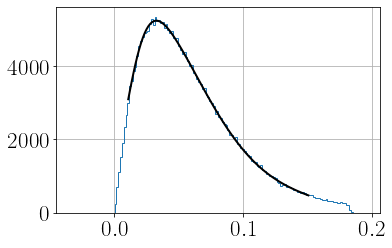

In [157]:
df3.MPt.hist(bins = extendedBins(bins_opt, 30, 30), histtype = 'step')

# df = 4.5
# scale = 0.065
# x = np.linspace(-0.4, 0.4, 100)
plt.plot(bincenters_opt, skewnormfit(params_opt, bincenters_opt)*np.sum(dist_opt)*np.diff(bincenters_opt)[0], 'k-', lw=2, label='frozen pdf')
plt.show()

In [544]:
def CorrectionV2(df, correction, mode = "epg"):
    df_epg = copy(df)
    if mode == "epg":
        df_epg.loc[df_epg.Gsector<7, 'Gp'] = df_epg.Gp + correction
        df_epg.loc[df_epg.Gsector<7, 'Ge'] = df_epg.loc[df_epg.Gsector<7, 'Gp']
        df_epg.loc[:, "Gpx"] = df_epg.loc[:, "Gp"]*np.sin(np.radians(df_epg.loc[:, "Gtheta"]))*np.cos(np.radians(df_epg.loc[:, "Gphi"]))
        df_epg.loc[:, "Gpy"] = df_epg.loc[:, "Gp"]*np.sin(np.radians(df_epg.loc[:, "Gtheta"]))*np.sin(np.radians(df_epg.loc[:, "Gphi"]))
        df_epg.loc[:, "Gpz"] = df_epg.loc[:, "Gp"]*np.cos(np.radians(df_epg.loc[:, "Gtheta"]))
    elif mode == "epgg":
        df_epg.loc[df_epg.Gsector<7, 'Gp'] = df_epg.Gp + correction
        df_epg.loc[df_epg.Gsector<7, 'Ge'] = df_epg.loc[df_epg.Gsector<7, 'Gp']
        df_epg.loc[:, "Gpx"] = df_epg.loc[:, "Gp"]*np.sin(np.radians(df_epg.loc[:, "Gtheta"]))*np.cos(np.radians(df_epg.loc[:, "Gphi"]))
        df_epg.loc[:, "Gpy"] = df_epg.loc[:, "Gp"]*np.sin(np.radians(df_epg.loc[:, "Gtheta"]))*np.sin(np.radians(df_epg.loc[:, "Gphi"]))
        df_epg.loc[:, "Gpz"] = df_epg.loc[:, "Gp"]*np.cos(np.radians(df_epg.loc[:, "Gtheta"]))			

        df_epg.loc[df_epg.Gsector<7, 'Gp2'] = df_epg.Gp2 + correction
        df_epg.loc[df_epg.Gsector<7, 'Ge2'] = df_epg.loc[df_epg.Gsector<7, 'Gp2']
        df_epg.loc[:, "Gpx2"] = df_epg.loc[:, "Gp2"]*np.sin(np.radians(df_epg.loc[:, "Gtheta2"]))*np.cos(np.radians(df_epg.loc[:, "Gphi2"]))
        df_epg.loc[:, "Gpy2"] = df_epg.loc[:, "Gp2"]*np.sin(np.radians(df_epg.loc[:, "Gtheta2"]))*np.sin(np.radians(df_epg.loc[:, "Gphi2"]))
        df_epg.loc[:, "Gpz2"] = df_epg.loc[:, "Gp2"]*np.cos(np.radians(df_epg.loc[:, "Gtheta2"]))			

    return df_epg


0.4659571557214103
5.0 [0.09349786 0.         0.1123916  ... 0.09083249 0.00175881 0.        ]
Gp 3.8471049155343717
reconGam 0.794211381661384
coplanarity 2.955142908487502
ME_epg 0.14823539243749972
MM2_epg -0.0016067925238346396
MM2_eg 1.04812416280204
MM2_ep 0.01866908859640658
MPt 0.08877323005794438


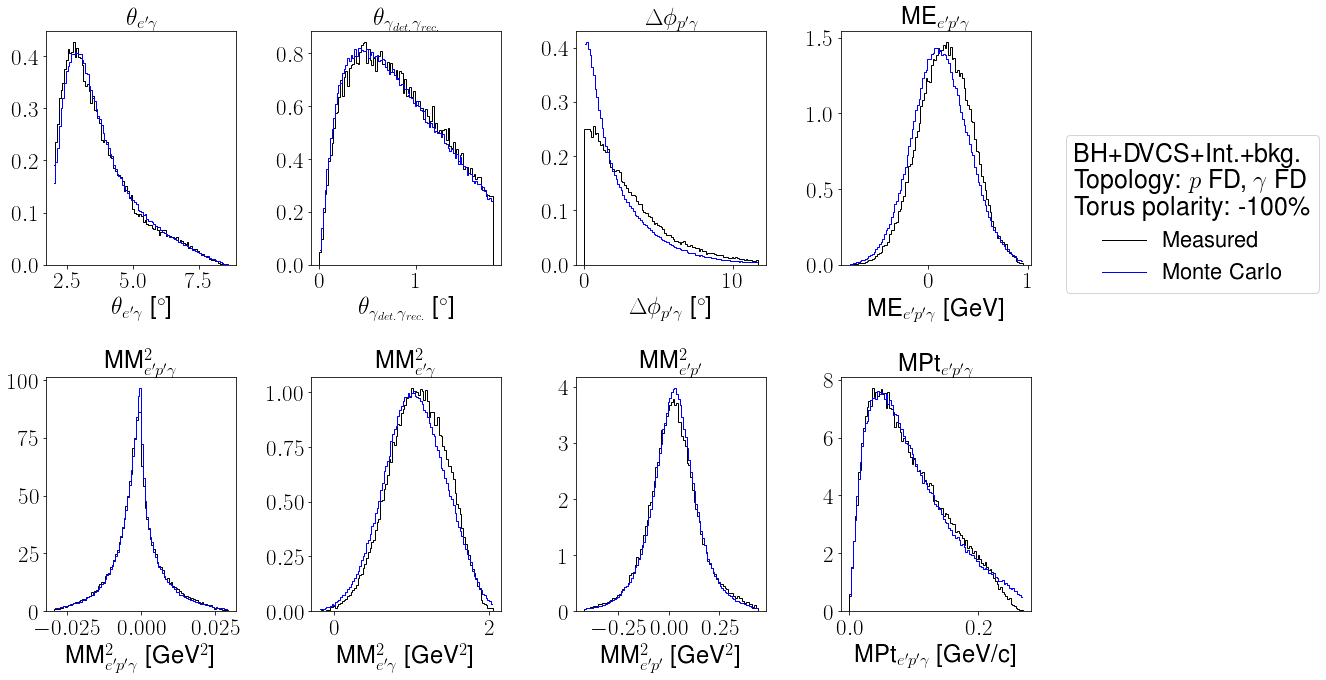

<Figure size 432x288 with 0 Axes>

In [668]:
def sigmaFDOutb(x):
    regulator = (1/(1+np.exp(-(x-0.6)/0.05)))
    return regulator * np.select([x<.95, (x>=.95) & (x<1.2), (x>=1.2)&(x<1.575), (x>=1.575) & (x<1.9), (x>1.9)], [0.1, -0.045/(1.2-.95)*x+1.2*0.045/(1.2-.95) + 0.055, 0.055, -0.015/(1.9-1.575)*x+1.9*0.015/(1.9-1.575) + 0.04,0.04])
df1 = makeDVCS(saveDVCSvars(SmearingV3(dvcsSimOutbFD, sigmaFDOutb(dvcsSimOutbFD.Pp), "outbending")), "outbending")
df2 = makeDVCS(saveDVCSvars(SmearingV3(bkgSimOutbFD, sigmaFDOutb(bkgSimOutbFD.Pp), "outbending")), "outbending")
correction = np.where(-(epgExpOutbFD.Gp-2)*(epgExpOutbFD.Gp-5)>0, -0.05*(epgExpOutbFD.Gp-2)*(epgExpOutbFD.Gp-5), 0)
df3 = makeDVCS(saveDVCSvars(CorrectionV2(CorrectionV3(epgExpOutbFD, -0.02), correction)), "outbending")
df4 = pi0ExpOutbFD

df5 = pi0SimOutbFD
PpMin = 0.4
PpMax = 1.6
sector = 3
# df1 = df1.loc[(df1.Pp>PpMin) & (df1.Pp<PpMax) & (df1.Psector == sector), :]
# df2 = df2.loc[(df2.Pp>PpMin) & (df2.Pp<PpMax) & (df2.Psector == sector), :]
# df3 = df3.loc[(df3.Pp>PpMin) & (df3.Pp<PpMax) & (df3.Psector == sector), :]
# df4 = df4.loc[(df4.Pp>PpMin) & (df4.Pp<PpMax) & (df4.Psector == sector), :]
# df5 = df5.loc[(df5.Pp>PpMin) & (df5.Pp<PpMax) & (df5.Psector == sector), :]
df1 = df1.loc[(df1.Pp>PpMin) & (df1.Pp<PpMax), :]
df2 = df2.loc[(df2.Pp>PpMin) & (df2.Pp<PpMax), :]
df3 = df3.loc[(df3.Pp>PpMin) & (df3.Pp<PpMax), :]
df4 = df4.loc[(df4.Pp>PpMin) & (df4.Pp<PpMax), :]
df5 = df5.loc[(df5.Pp>PpMin) & (df5.Pp<PpMax), :]

GpMin = 2
GpMax = 8
df1 = df1.loc[(df1.Gp>GpMin) & (df1.Pp<GpMax), :]
df2 = df2.loc[(df2.Gp>GpMin) & (df2.Pp<GpMax), :]
df3 = df3.loc[(df3.Gp>GpMin) & (df3.Pp<GpMax), :]
df4 = df4.loc[(df4.Gp>GpMin) & (df4.Pp<GpMax), :]
df5 = df5.loc[(df5.Gp>GpMin) & (df5.Pp<GpMax), :]

contOutbFD = len(df4)*len(df2)/len(df5)/len(df3)
print(contOutbFD)
print((GpMin+GpMax)/2, correction)
varstoplot = ["Gp", "reconGam", "coplanarity", "ME_epg", "MM2_epg", "MM2_eg", "MM2_ep", "MPt"]
title = [r"$\theta_{e'\gamma}$", r"$\theta_{\gamma_{det.}\gamma_{rec.}}$", r"$\Delta\phi_{p'\gamma}$" , "ME"+r"${}_{e'p'\gamma}$", "MM"+r"${}^{2}_{e'p'\gamma}$", "MM"+r"${}^{2}_{e'\gamma}$", "MM"+r"${}^{2}_{e'p'}$", "MPt"+r"${}_{e'p'\gamma}$"]
unit = [degree, degree, degree, GeV, GeV2, GeV2, GeV2, GeVc]
# binstarts = [10, 0, 0, -0.5, -0.01, 0.1,-0.4 , 0]
# binends = [40, 2, 10, 1.2, 0.01, 1.7, 0.4, 0.2]
fig, axs = plt.subplots(2, 4, figsize = (15,10))
for yind in range(0, 2):
    for xind in range(0,4):
        ind = 4*yind + xind
        start = binstarts[ind]
        end = binends[ind]
#         bins = 100#np.linspace(start, end, 101)
#         if ind == 2 :
#             bins = np.linspace(start, end, 101)
        simDist_dvpi0, bins = np.histogram(df2[varstoplot[ind]], 100, density = True)
        simDist_dvcs, _ = np.histogram(df1[varstoplot[ind]], bins, density = True)
#         simDist = len_pi0ExpOutbFD/len_pi0SimOutbFD*simDist_dvpi0 + (len_epgExpOutbFD/len_dvcsSimOutbFD-len_bkgSimOutbFD/len_pi0SimOutbFD*len_pi0ExpOutbFD/len_dvcsSimOutbFD)*simDist_dvcs
        simDist = (1-contOutbFD)*simDist_dvcs + contOutbFD*simDist_dvpi0
        expDist, _ = np.histogram(df3[varstoplot[ind]], bins, density=True)
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        if ind == 0:
            axs[yind, xind].step(bincenters, expDist, where='mid',color='k', linewidth=1, label = 'Measured')           
            axs[yind, xind].step(bincenters, simDist, where='mid',color='b', linewidth=1, label = 'Monte Carlo')  
            axs[yind, xind].set_ylim(bottom = 0)
        else:
            axs[yind, xind].hist(df3[varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', density=True, linewidth=1)
            axs[yind, xind].step(bincenters, simDist, where='mid',color='b', linewidth=1)
#         axs[yind, xind].step(bincenters, c*simDist_dvpi0, where='mid',color='g', linewidth=1)
#         axs[yind, xind].step(bincenters, (1/len_dvcsSimOutbFD-cont_Outb_CD/len_dvcsSimOutbFD)*len_epgExpOutbFD*simDist_dvcs, where='mid',color='r', linewidth=1)
#         axs[yind, xind].hist(epgExpOutbFD[varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', linewidth=1)
#         axs[yind, xind].step(bincenters, expDist - len_pi0ExpOutbFD/len_pi0SimOutbFD*simDist_dvpi0, where='mid',color='k', linewidth=1)
        print(varstoplot[ind], nphistmean(expDist - len(pi0ExpOutbFD)/len(pi0SimOutbFD)*simDist_dvpi0, bins))
        axs[yind, xind].set_title(title[ind])
#         axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
# axs[0,2].set_xticks([2.2, 2.7, 3.2])
# axs[1,0].set_xticks([0.29, 0.32, 0.35, 0.38])
# axs[1,1].set_xticks([0.23, 0.3, 0.39, 0.52])
# axs[1,2].set_xticks([0, 90, 180, 270, 360])
plt.tight_layout()
# plt.savefig("kineCD.pdf")
# plt.savefig("analysisnote/Outbending1.pdf")
fig.legend(bbox_to_anchor = (1.25, 0.8), title = "BH+DVCS+Int.+bkg.\nTopology: "+r"$p$"+" FD, "+r"$\gamma$"+" FD\n"+"Torus polarity: -100\%")
plt.show()
plt.clf()

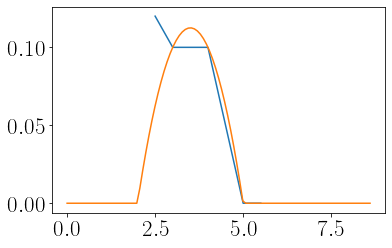

In [635]:
GeCenters2 = [2.5, 3, 3.5, 4, 4.5, 5, 5.5]
additional2 = [0.12, 0.1, 0.1, 0.1, 0.05, 0, 0]
plt.plot(GeCenters2, additional2)
plt.plot(x, np.where(-(x-2)*(x-5)>0, -0.05*(x-2)*(x-5), 0), 0)

In [588]:
res_lsq = least_squares(lstsq_cubicfit2, [-0.0000732, 1.480, 9.344], args=(np.array(GeCenters2), additional2))

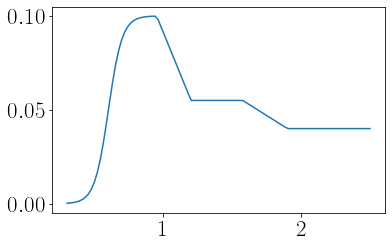

In [667]:
x = np.linspace(0.3, 2.5, 101)
plt.plot(x, sigmaFDOutb(x))

In [179]:
pvalue_opt = 0
for i in range(0, 10):
    if i == 0:
        dist, bins = np.histogram(epgExpOutbFD.MPt, bins = np.linspace(0.003, 0.09, 101))
        params = [1, 0, 0.03, 0, 0, 0]
    else:
        dist, bins = np.histogram(epgExpOutbFD.MPt, bins = np.linspace(lb, ub, 101))
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    hist = dist/np.sum(dist)/np.diff(bincenters)[0]
    res_lsq = least_squares(lstsq_skewnormfit, params, args=(bincenters, hist))
    params = res_lsq.x
    a, loc, scale, b, c, d = params
    lb = 0.01
    ub = skewnorm.ppf(0.9974, a = a, loc = loc, scale = scale)
    pvalue, chi2fit, dof = probFit(dist, bins,  skewnormfit(res_lsq.x, bincenters), res_lsq)
    print(pvalue, lb, ub)
    if pvalue>pvalue_opt:
        pvalue_opt = pvalue
        bins_opt = bins
        bincenters_opt = bincenters
        params_opt = res_lsq.x
        lb_opt = lb
        ub_opt = ub
        dist_opt = dist
        print(params_opt, lb, ub, pvalue)

0.5207450258621067 0.01 0.16354912319009135
[ 2.88860565e+00  9.46475311e-03  5.11661086e-02 -3.70773131e+00
  1.28803273e+02 -8.22479742e+01] 0.01 0.16354912319009135 0.5207450258621067
0.9488167787584795 0.01 0.26898574096586525
[ 5.98398341e+00  1.22130292e-02  8.52653676e-02 -8.49940632e-01
  1.86950384e+01  2.01085470e-01] 0.01 0.26898574096586525 0.9488167787584795


<ipython-input-80-36f1c948bc16>:7: RuntimeWarning: divide by zero encountered in true_divide
  chi2fit = np.sum((hist - fit)**2/unchist**2)


0.0 0.01 0.3545948166776755
0.0 0.01 0.35804498356207326
0.0 0.01 0.3572947643275086
0.0 0.01 0.3574316909728795
0.0 0.01 0.3573789376265771
0.0 0.01 0.35739521846262834
0.0 0.01 0.3573992985597734
0.0 0.01 0.3574076598361622


In [180]:
print(ub_opt)

0.26898574096586525


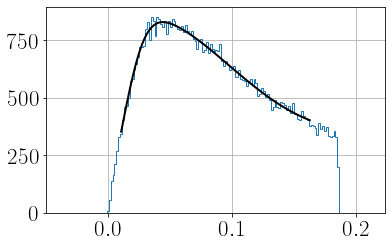

In [171]:
epgExpOutbFD.MPt.hist(bins = extendedBins(bins_opt, 30, 30), histtype = 'step')

# df = 4.5
# scale = 0.065
# x = np.linspace(-0.4, 0.4, 100)
plt.plot(bincenters_opt, skewnormfit(params_opt, bincenters_opt)*np.sum(dist_opt)*np.diff(bincenters_opt)[0], 'k-', lw=2, label='frozen pdf')
plt.show()

In [176]:
df3 = epgExpOutbFD
pvalue_opt = 0
for i in range(0, 10):
    if i == 0:
        dist, bins = np.histogram(df3.reconGam, bins = np.linspace(0.03, 1, 101))
        params = [1, 0.3, 0.03, 0, 0, 0]
    else:
        dist, bins = np.histogram(df3.reconGam, bins = np.linspace(lb, ub, 101))
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    hist = dist/np.sum(dist)/np.diff(bincenters)[0]
    res_lsq = least_squares(lstsq_skewnormfit, params, args=(bincenters, hist))
    params = res_lsq.x
    a, loc, scale, b, c, d = params
    lb = 0.05
    ub = skewnorm.ppf(0.9974, a = a, loc = loc, scale = scale)
    pvalue, chi2fit, dof = probFit(dist, bins,  skewnormfit(res_lsq.x, bincenters), res_lsq)
    print(lb, ub, pvalue)
    if pvalue>pvalue_opt:
        pvalue_opt = pvalue
        bins_opt = bins
        bincenters_opt = bincenters
        params_opt = res_lsq.x
        lb_opt = lb
        ub_opt = ub
        dist_opt = dist
        print(params_opt, lb, ub, pvalue)

0.05 1.245540618271309 0.22464275708228765
[ 1.37003578 -0.03805314  0.42623753 -1.03865734  3.98713025 -2.09945209] 0.05 1.245540618271309 0.22464275708228765
0.05 1.5904348645474595 0.4592472404486483
[ 2.47895287 -0.03470192  0.53965192 -0.84929498  2.53091826 -1.13821085] 0.05 1.5904348645474595 0.4592472404486483
0.05 1.9007631616909257 0.5878338424191942
[ 3.35723845 -0.0115966   0.63502876 -0.67296467  1.57358431 -0.5997203 ] 0.05 1.9007631616909257 0.5878338424191942
0.05 1.4672756308402342 0.0


<ipython-input-80-36f1c948bc16>:7: RuntimeWarning: divide by zero encountered in true_divide
  chi2fit = np.sum((hist - fit)**2/unchist**2)


0.05 1.7864453148711512 0.757040266464562
[ 3.03817576 -0.02268399  0.60074949 -0.74125965  1.88179515 -0.76292672] 0.05 1.7864453148711512 0.757040266464562
0.05 1.242159506296759 0.0
0.05 1.6172497661419074 0.40134327249690016
0.05 2.3994254688993513 0.06036327358424509
0.05 3.038129898315541 0.0
0.05 3.0704644502107055 0.0


In [178]:
print(ub_opt)

1.7864453148711512


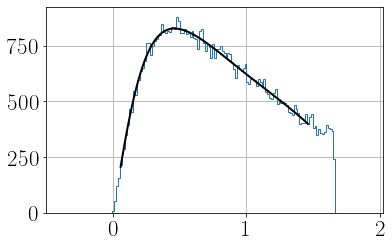

In [177]:
epgExpOutbFD.reconGam.hist(bins = extendedBins(bins_opt, 30, 30), histtype = 'step')

# df = 4.5
# scale = 0.065
# x = np.linspace(-0.4, 0.4, 100)
plt.plot(bincenters_opt, skewnormfit(params_opt, bincenters_opt)*np.sum(dist_opt)*np.diff(bincenters_opt)[0], 'k-', lw=2, label='frozen pdf')
plt.show()

<AxesSubplot:>

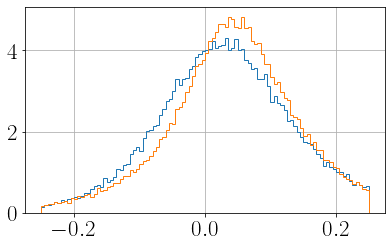

In [379]:
pi0ExpInbFD.MM2_ep.hist(bins = np.linspace(-0.25, 0.25, 101), histtype = 'step', density = True)
bkgSimInbFD.MM2_ep.hist(bins = np.linspace(-0.25, 0.25, 101), histtype = 'step', density = True)


<AxesSubplot:>

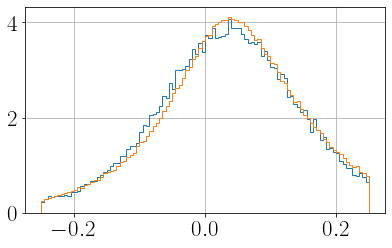

In [384]:
pi0ExpOutbFD.MM2_ep.hist(bins = np.linspace(-0.25, 0.25, 101), histtype = 'step', density = True)
# bkgSimOutbFD.MM2_ep.hist(bins = np.linspace(-0.25, 0.25, 101), histtype = 'step', density = True)
# bkgSimOutbFD.MM2_ep.hist(bins = 101, histtype = 'step', density = True)
saveDVpi0Pvars(SmearingV3(pi0SimOutbFD, 0.08, "outbending")).MM2_ep.hist(bins = np.linspace(-0.25, 0.25, 101), histtype = 'step', density = True)

<AxesSubplot:>

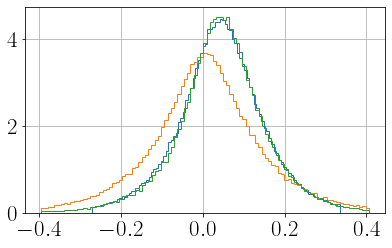

In [293]:
# pi0SimInbFD.MM2_ep.hist(bins = 101, histtype = 'step', density = True)
# dvcsSimInbFD.MM2_ep.hist(bins = 101, histtype = 'step', density = True)
# bkgSimInbFD.MM2_ep.hist(bins = 101, histtype = 'step', density = True)

In [299]:
len(epgExpOutbFD)

69223

In [41]:
def SmearingV3(df, sigma1, pol):
    df_epg = copy(df)
    if pol == "inbending":
        regulator = (1/(1+np.exp(-(df_epg.loc[df_epg["Psector"]<7, "Pp"]-0.5)/0.05)))
    elif pol == "outbending":
        regulator = (1/(1+np.exp(-(df_epg.loc[df_epg["Psector"]<7, "Pp"]-0.6)/0.05)))
    df_epg.loc[df_epg["Psector"]<7, "Pp"] = df_epg.loc[df_epg["Psector"]<7, "Pp"]*np.random.normal(1, regulator*sigma1, len(df_epg.loc[df_epg.Psector<7]))
    df_epg.loc[:, 'Pe'] = np.sqrt( df_epg.Pp**2 + M**2)
    df_epg.loc[:, "Ppx"] = df_epg.loc[:, "Pp"]*np.sin(np.radians(df_epg.loc[:, "Ptheta"]))*np.cos(np.radians(df_epg.loc[:, "Pphi"]))
    df_epg.loc[:, "Ppy"] = df_epg.loc[:, "Pp"]*np.sin(np.radians(df_epg.loc[:, "Ptheta"]))*np.sin(np.radians(df_epg.loc[:, "Pphi"]))
    df_epg.loc[:, "Ppz"] = df_epg.loc[:, "Pp"]*np.cos(np.radians(df_epg.loc[:, "Ptheta"]))

    return df_epg


In [319]:
args_sigmas_FD_inb = [[-0.233, 1.216, -2.279, 1.812, -0.445], [ 0.277, -1.366, 2.318, -1.619,  0.466 ],[ 0.0728, -0.223, 0.0888,  0.225, -0.0889],[-0.204, 0.977, -1.766, 1.411, -0.342], [ 0.277, -1.059, 1.362, -0.641, 0.137], [-0.219, 1.132, -2.153, 1.763, -0.447]]
args_sigmas_FD_outb = [[0.481,-1.548, 1.524,-0.415, 0.0277], [1.872, -8.054, 12.536, -8.358,  2.083], [-0.0656, 0.480, -1.191, 1.169, -0.315], [-1.559, 7.356, -12.639, 9.312,  -2.405], [ 0.189, -0.344, -0.253,  0.717, -0.238], [0.466, -1.560, 1.622, -0.485, 0.0322]]
def quartic(x, sector, pol = "inbending"):
    if pol == "inbending":
        a, b, c, d, e = args_sigmas_FD_inb[sector - 1]
        return np.select( [x<0.55, (x>=0.55)& (x < 1.55), x>=1.55], [a*0.55**4+b*0.55**3+c*0.55**2+d*0.55+e, a*x**4 +b*x**3 + c*x**2 + d*x + e, a*1.55**4 + b*1.55**3 + c*1.55**2+d*1.55 +e])
    if pol == "outbending":
        a, b, c, d, e = args_sigmas_FD_outb[sector - 1]
        return np.select( [x<0.65, (x>=0.65)& (x < 1.55), x>=1.55], [a*0.65**4+b*0.65**3+c*0.65**2+d*0.65+e, a*x**4 +b*x**3 + c*x**2 + d*x + e, a*1.55**4 + b*1.55**3 + c*1.55**2+d*1.55 +e])

# for sector in range(1, 7):
#     if pol == "inbending":
#         regulator = (1/(1+np.exp(-(df_protonRec.loc[df_protonRec["Psector"]==sector, "Pp"]-0.5)/0.05)))
#     elif pol == "outbending":
#         regulator = (1/(1+np.exp(-(df_protonRec.loc[df_protonRec["Psector"]==sector, "Pp"]-0.6)/0.05)))
#     sigmas_FD = quartic(df_protonRec.loc[df_protonRec.Psector == sector, "Pp"], sector, pol)
#     df_protonRec.loc[df_protonRec["Psector"]==sector, "Pp"] = df_protonRec.loc[df_protonRec["Psector"]==sector, "Pp"]*np.random.normal(1, regulator*sigmas_FD, len(df_protonRec.loc[df_protonRec["Psector"]==sector, "Pp"]))


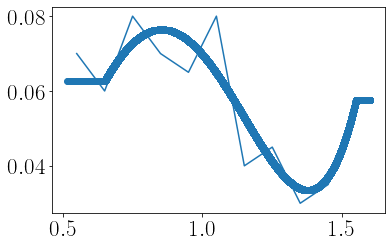

In [329]:
plt.scatter(dvcsSimOutbFD.loc[dvcsSimOutbFD.Psector == 1, "Pp"], quartic(dvcsSimOutbFD.loc[dvcsSimOutbFD.Psector == 1, "Pp"], 1, "outbending"))
plt.plot(PpCenters_outb, sigmas_outb_s1)


In [338]:
len(epgExpOutbFD)

69223

<AxesSubplot:>

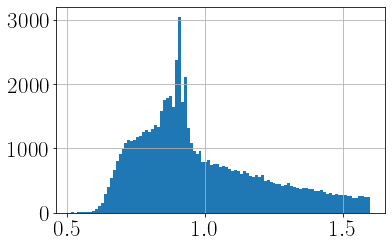

In [340]:
epgExpOutbFD.Pp.hist(bins = 101)

<AxesSubplot:>

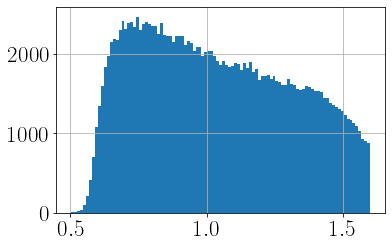

In [341]:
dvcsSimOutbFD.Pp.hist(bins = 101)

<AxesSubplot:>

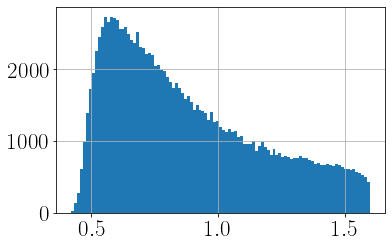

In [342]:
dvcsSimInbFD.Pp.hist(bins = 101)

<AxesSubplot:>

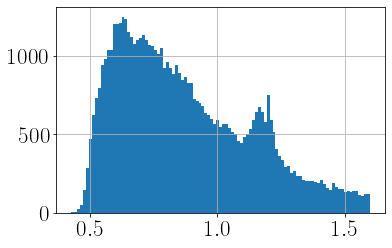

In [343]:
epgExpInbFD.Pp.hist(bins = 101)

<AxesSubplot:>

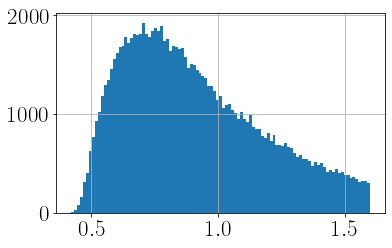

In [344]:
bkgSimInbFD.Pp.hist(bins = 101)

In [282]:
def CorrectionV3(df, correction):
    df_epg = copy(df)
    df_epg.loc[df_epg["Psector"]<7, "Pp"] = df_epg.loc[df_epg["Psector"]<7, "Pp"] + correction
#     df_epg.loc[df_epg["Psector"]<7, "Ptheta"] = df_epg.loc[df_epg["Psector"]<7, "Ptheta"] + correction
    df_epg.loc[:, 'Pe'] = np.sqrt( df_epg.Pp**2 + M**2)
    df_epg.loc[:, "Ppx"] = df_epg.loc[:, "Pp"]*np.sin(np.radians(df_epg.loc[:, "Ptheta"]))*np.cos(np.radians(df_epg.loc[:, "Pphi"]))
    df_epg.loc[:, "Ppy"] = df_epg.loc[:, "Pp"]*np.sin(np.radians(df_epg.loc[:, "Ptheta"]))*np.sin(np.radians(df_epg.loc[:, "Pphi"]))
    df_epg.loc[:, "Ppz"] = df_epg.loc[:, "Pp"]*np.cos(np.radians(df_epg.loc[:, "Ptheta"]))

    return df_epg

def CorrectionV3_1(df, correction):
    df_epg = copy(df)
#     df_epg.loc[df_epg["Psector"]<7, "Pp"] = df_epg.loc[df_epg["Psector"]<7, "Pp"] + correction
    df_epg.loc[df_epg["Psector"]<7, "Ptheta"] = df_epg.loc[df_epg["Psector"]<7, "Ptheta"] + correction
    df_epg.loc[:, 'Pe'] = np.sqrt( df_epg.Pp**2 + M**2)
    df_epg.loc[:, "Ppx"] = df_epg.loc[:, "Pp"]*np.sin(np.radians(df_epg.loc[:, "Ptheta"]))*np.cos(np.radians(df_epg.loc[:, "Pphi"]))
    df_epg.loc[:, "Ppy"] = df_epg.loc[:, "Pp"]*np.sin(np.radians(df_epg.loc[:, "Ptheta"]))*np.sin(np.radians(df_epg.loc[:, "Pphi"]))
    df_epg.loc[:, "Ppz"] = df_epg.loc[:, "Pp"]*np.cos(np.radians(df_epg.loc[:, "Ptheta"]))

    return df_epg

In [187]:
hist, bins = np.histogram(pi0ExpInbCDFT.reconPi, bins = 101)
bins[:-1][np.argmax(hist)]+np.diff(bins)[0]/2

0.18530277350483262

In [188]:
hist, bins = np.histogram(pi0ExpInbCDFT.MPt, bins = 101)
bins[:-1][np.argmax(hist)]+np.diff(bins)[0]/2

0.03453181025972806

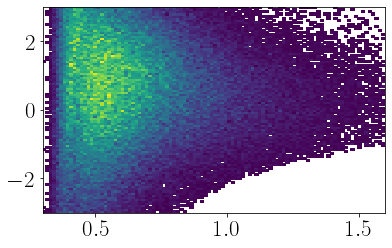

In [454]:
plt.hist2d(epgExpInbCDFT.Pp, epgExpInbCDFT.Pchi2pid, bins = [np.linspace(0.3, 1.6, 101), np.linspace(-3, 3, 101)], cmin = 1)
plt.show()

<AxesSubplot:>

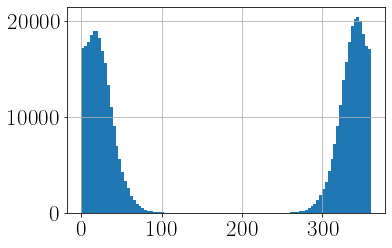

In [671]:
dvcsSimOutbCDFT.phi1.hist(bins = 101)

In [199]:
# parent_MC = "/Volumes/Extreme SSD/Feb2022/SimtoDat/v4/inb/dvcs/"
# parent_epg = "/Volumes/Extreme SSD/Feb2022/SimtoDat/v4/inb/epg/"
# parent_MC_bkg1g = "/Volumes/Extreme SSD/Feb2022/SimtoDat/v4/inb/bkg_1g/"
# parent_MC_bkg2g = "/Volumes/Extreme SSD/Feb2022/SimtoDat/v4/inb/bkg_2g/"
# parent_exp = "/Volumes/Extreme SSD/Feb2022/SimtoDat/v4/inb/exp/"

parent_MC = "/Volumes/Extreme SSD/Feb2022/SimtoDat/v4.2/inb/dvcs/"
# parent_epg = "/Volumes/Extreme SSD/Feb2022/SimtoDat/v4/inb/epg/"
parent_MC_bkg1g = "/Volumes/Extreme SSD/Feb2022/SimtoDat/v4.2/inb/bkg_1g/"
parent_MC_bkg2g = "/Volumes/Extreme SSD/Feb2022/SimtoDat/v4.2/inb/bkg_2g/"
parent_exp = "/Volumes/Extreme SSD/Feb2022/SimtoDat/v4.2/inb/exp/"

# dvcsSimInb = pd.read_pickle(parent_MC + "3987.pkl")
# bkgSimInb = pd.read_pickle(parent_MC_bkg1g + "4076.pkl")
# dvcsSimInb = pd.read_pickle(parent_epg + "3987_epg.pkl")
# bkgSimInb = pd.read_pickle(parent_epg + "4076_epg.pkl")

# pi0SimInb = pd.read_pickle(parent_MC_bkg2g + "4076.pkl")
epgExpInb = pd.read_pickle(parent_exp + "dvcs.pkl")
pi0ExpInb = pd.read_pickle(parent_exp + "pi0.pkl")

In [200]:
epgExpInbCDFT = epgExpInb.loc[epgExpInb.config == 3]
pi0ExpInbCDFT = pi0ExpInb.loc[pi0ExpInb.config == 3]
dvcsSimInbCDFT = dvcsSimInb.loc[dvcsSimInb.config == 3]
bkgSimInbCDFT = bkgSimInb.loc[bkgSimInb.config == 3]
pi0SimInbCDFT = pi0SimInb.loc[pi0SimInb.config == 3]

epgExpInbCD = epgExpInb.loc[epgExpInb.config == 2]
pi0ExpInbCD = pi0ExpInb.loc[pi0ExpInb.config == 2]
dvcsSimInbCD =  dvcsSimInb.loc[dvcsSimInb.config == 2]
bkgSimInbCD = bkgSimInb.loc[bkgSimInb.config == 2]
pi0SimInbCD = pi0SimInb.loc[pi0SimInb.config == 2]

epgExpInbFD = epgExpInb.loc[epgExpInb.config == 1]
pi0ExpInbFD = pi0ExpInb.loc[pi0ExpInb.config == 1]
dvcsSimInbFD =  dvcsSimInb.loc[dvcsSimInb.config == 1]
bkgSimInbFD = bkgSimInb.loc[bkgSimInb.config == 1]
pi0SimInbFD = pi0SimInb.loc[pi0SimInb.config == 1]

In [201]:
df3 = epgExpInbCDFT
df1 = dvcsSimInbCDFT
df2 = bkgSimInbCDFT
df4 = pi0ExpInbCDFT
df5 = pi0SimInbCDFT
contInbCDFT = len(df4)/len(df5) * len(df2)/len(df3)

coneAngle 19.989031101627305
reconGam 0.26542726234916614
coplanarity 2.101890859063773
ME_epg 0.010536876259782895
MM2_epg -0.0017749616250698455
MM2_eg 0.9092242552233286
MM2_ep -0.015291482253753414
MPt 0.03330054287633908


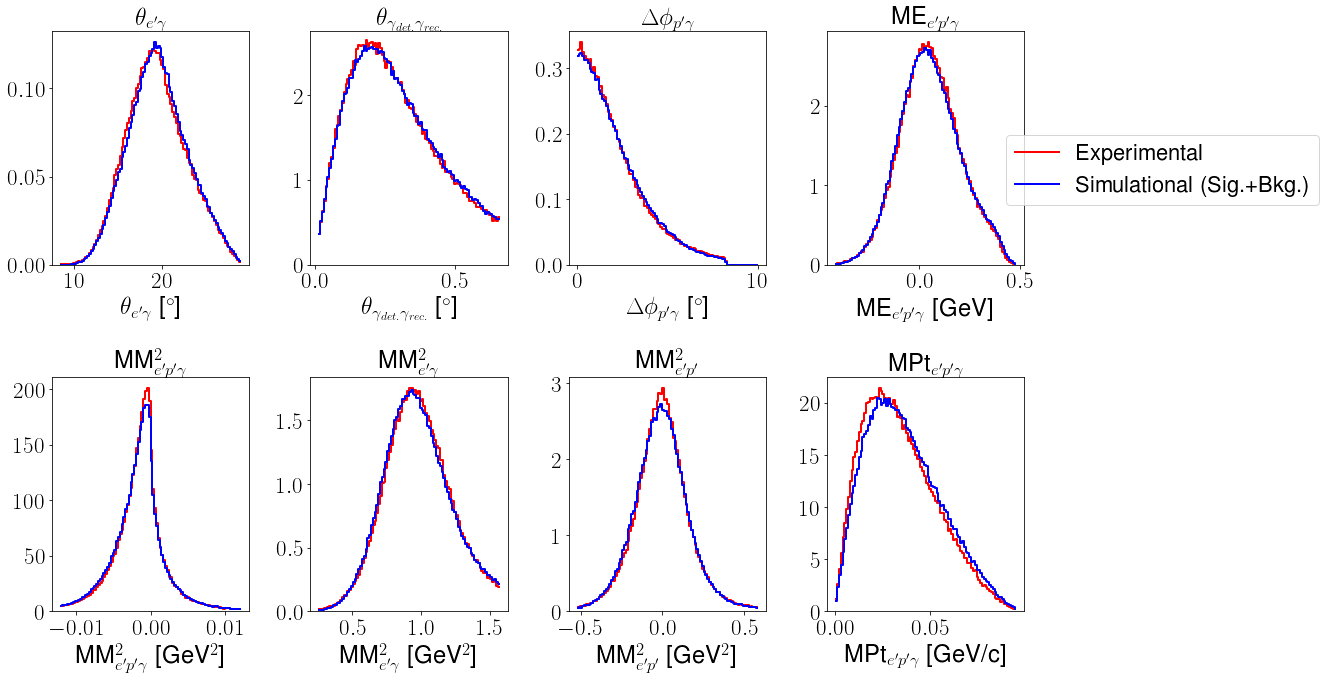

<Figure size 432x288 with 0 Axes>

In [202]:
varstoplot = ["coneAngle", "reconGam", "coplanarity", "ME_epg", "MM2_epg", "MM2_eg", "MM2_ep", "MPt"]
title = [r"$\theta_{e'\gamma}$", r"$\theta_{\gamma_{det.}\gamma_{rec.}}$", r"$\Delta\phi_{p'\gamma}$" , "ME"+r"${}_{e'p'\gamma}$", "MM"+r"${}^{2}_{e'p'\gamma}$", "MM"+r"${}^{2}_{e'\gamma}$", "MM"+r"${}^{2}_{e'p'}$", "MPt"+r"${}_{e'p'\gamma}$"]
unit = [degree, degree, degree, GeV, GeV2, GeV2, GeV2, GeVc]
binstarts = [10, 0, 0, -0.5, -0.01, 0.1,-0.4 , 0]
binends = [40, 2, 10, 1.2, 0.01, 1.7, 0.4, 0.2]
fig, axs = plt.subplots(2, 4, figsize = (15,10))
for yind in range(0, 2):
    for xind in range(0,4):
        ind = 4*yind + xind
        start = binstarts[ind]
        end = binends[ind]
        bins = 100#np.linspace(start, end, 101)
        if ind == 2 :
            bins = np.linspace(start, end, 101)
        simDist_dvpi0, bins = np.histogram(bkgSimInbCDFT[varstoplot[ind]], bins, density = True)
        simDist_dvcs, bins = np.histogram(dvcsSimInbCDFT[varstoplot[ind]], bins, density = True)
#         simDist = len_pi0ExpInbCDFT/len_pi0SimInbCDFT*simDist_dvpi0 + (len_epgExpInbCDFT/len_dvcsSimInbCDFT-len_bkgSimInbCDFT/len_pi0SimInbCDFT*len_pi0ExpInbCDFT/len_dvcsSimInbCDFT)*simDist_dvcs
        simDist = (1-contInbCDFT)*simDist_dvcs + contInbCDFT*simDist_dvpi0
        expDist, bins = np.histogram(epgExpInbCDFT[varstoplot[ind]], bins, density=True)
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        if ind == 0:
            axs[yind, xind].step(bincenters, expDist, where='mid',color='r', linewidth=2, label = 'Experimental')           
            axs[yind, xind].step(bincenters, simDist, where='mid',color='b', linewidth=2, label = 'Simulational (Sig.+Bkg.)')  
            axs[yind, xind].set_ylim(bottom = 0)
        else:
#             axs[yind, xind].step(epgExpInbCDFT[varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='r', density=True, linewidth=2)
            axs[yind, xind].step(bincenters, expDist, where='mid',color='r', linewidth=2)
            axs[yind, xind].step(bincenters, simDist, where='mid',color='b', linewidth=2)
#         axs[yind, xind].step(bincenters, c*simDist_dvpi0, where='mid',color='g', linewidth=1)
#         axs[yind, xind].step(bincenters, (1/len_dvcsSimInbCDFT-cont_inb_CDFT/len_dvcsSimInbCDFT)*len_epgExpInbCDFT*simDist_dvcs, where='mid',color='r', linewidth=1)
#         axs[yind, xind].hist(epgExpInbCDFT[varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', linewidth=1)
#         axs[yind, xind].step(bincenters, expDist - len_pi0ExpInbCDFT/len_pi0SimInbCDFT*simDist_dvpi0, where='mid',color='k', linewidth=1)
        print(varstoplot[ind], nphistmean(expDist - len(pi0ExpInbCDFT)/len(pi0SimInbCDFT)*simDist_dvpi0, bins))
#         axs[yind, xind].step(bincenters, (1-c)*simDist_dvcs, where='mid',color='r', linewidth=1)
        axs[yind, xind].set_title(title[ind])
        axs[yind, xind].set_ylim(bottom = 0)
#         axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
# axs[0,2].set_xticks([2.2, 2.7, 3.2])
# axs[1,0].set_xticks([0.29, 0.32, 0.35, 0.38])
# axs[1,1].set_xticks([0.23, 0.3, 0.39, 0.52])
# axs[1,2].set_xticks([0, 90, 180, 270, 360])
plt.tight_layout()
# plt.savefig("kineCDFT.pdf")
# plt.savefig("analysisnote/inbending1.pdf")
fig.legend(bbox_to_anchor = (1.25, 0.8), title = "")
plt.show()
plt.clf()

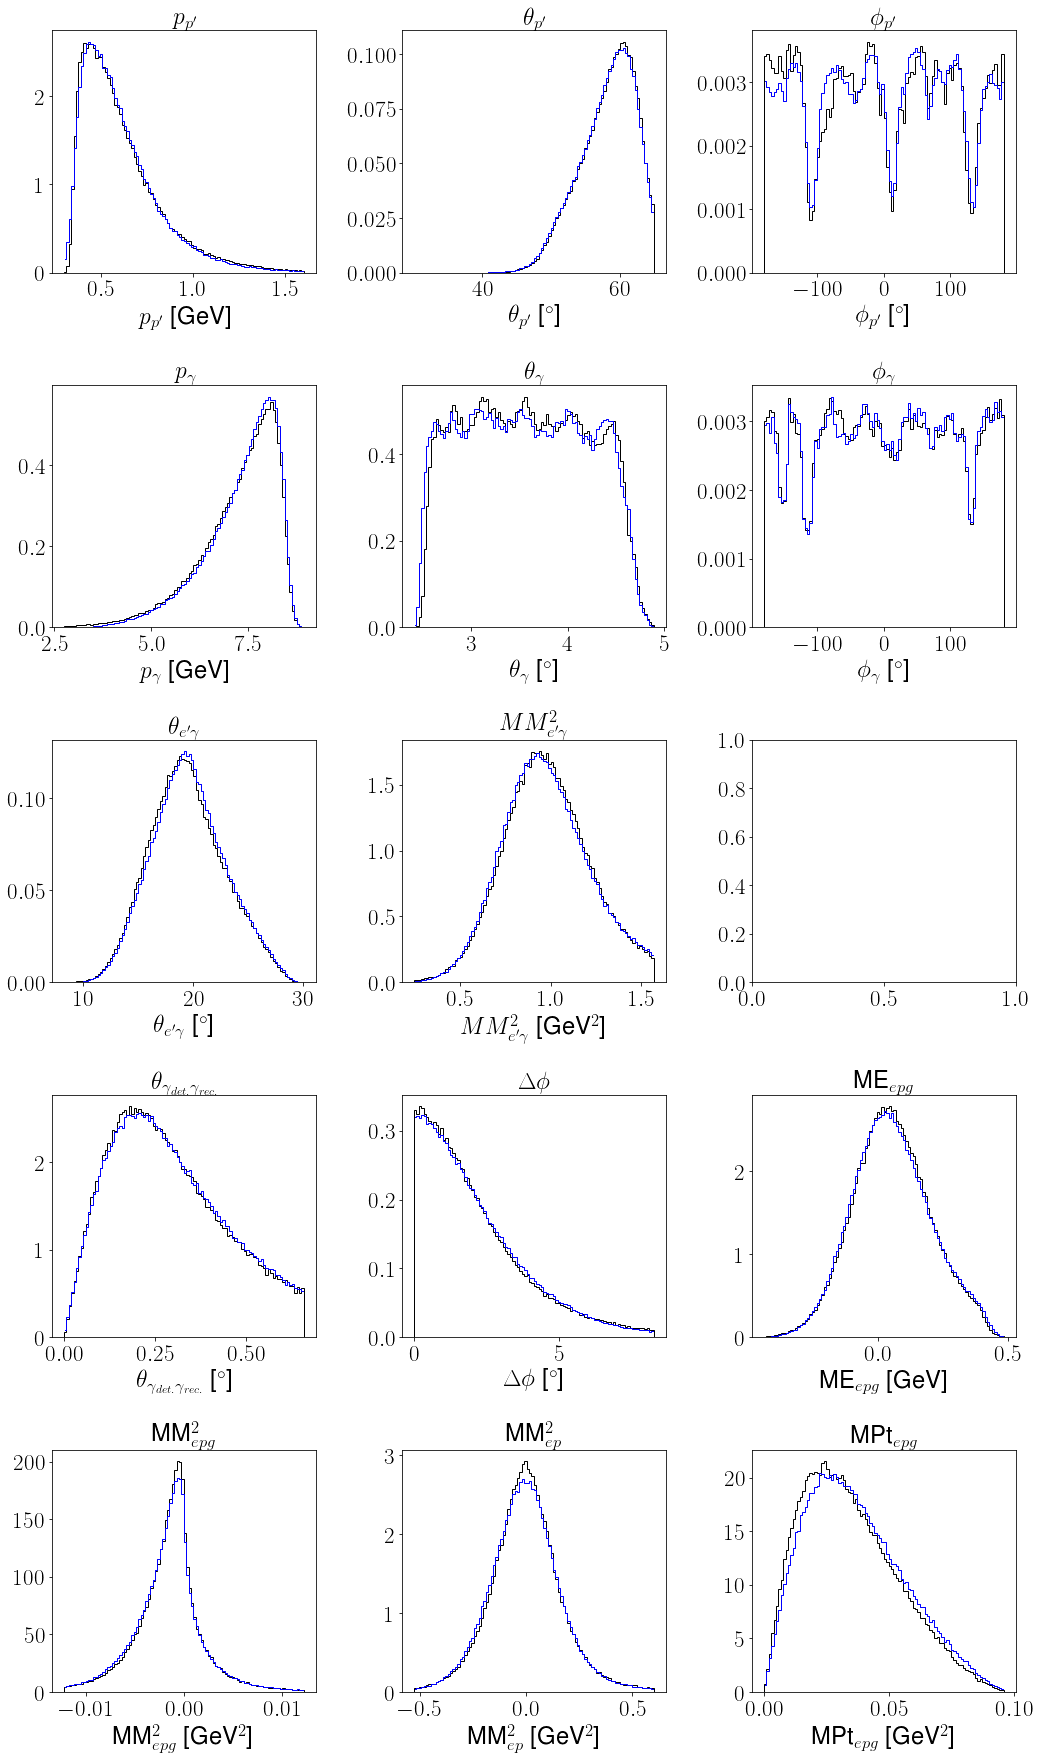

In [219]:
# for i in range(9):
PthetaMin = 0#PthetaEdges[i]
PthetaMax = 90#PthetaEdges[i+1]
varstoplot = ["Pp", "Ptheta", "Pphi","Gp", "Gtheta", "Gphi",  "coneAngle", "MM2_eg", "", "reconGam", "coplanarity", "ME_epg", "MM2_epg", "MM2_ep", "MPt"]
title = [r"$p_{p'}$", r"$\theta_{p'}$", r"$\phi_{p'}$", r"$p_{\gamma}$", r"$\theta_{\gamma}$", r"$\phi_{\gamma}$", r"$\theta_{e'\gamma}$", r"$MM^2_{e'\gamma}$", "", r"$\theta_{\gamma_{det.}\gamma_{rec.}}$", r"$\Delta\phi$" , "ME"+r"${}_{epg}$", "MM"+r"${}^{2}_{epg}$", "MM"+r"${}^{2}_{ep}$", "MPt"+r"${}_{epg}$"]
unit = [GeV, degree, degree, GeV, degree, degree, degree, GeV2,  "", degree, degree, GeV, GeV2, GeV2, GeV2, GeV2, GeV2, GeVc]
# binstarts = [PthetaMin, 0, -180, 0, 0, 0, -0.5, -0.01, 0.1, 0]
# binends = [GeMax, 7, 180, 30, 0.8, .1, 1.2, 0.01, 1.7, 10]
df3 = epgExpInbCDFT
df1 = dvcsSimInbCDFT
df2 = bkgSimInbCDFT
df4 = pi0ExpInbCDFT
df5 = pi0SimInbCDFT

# df1 = df1[df1.Pp<0.8]
# df2 = df2[df2.Pp<0.8]
# df3 = df3[df3.Pp<0.8]
# df4 = df4[df4.Pp<0.8]
# df5 = df5[df5.Pp<0.8]

contInb = len(df4)/len(df5) * len(df2)/len(df3)
contInbCDFT = contInb
fig, axs = plt.subplots(5, 3, figsize = (15,25))
for yind in range(0, 5):
    for xind in range(0, 3):
        ind = 3*yind + xind
        if varstoplot[ind]:
            pass
        else:
            continue
        if ind == 1:
            bins= np.linspace(30, 65, 101)
            simDist_dvcs, _ = np.histogram(df1.loc[(df1.Ptheta < PthetaMax) & (df1.Ptheta>PthetaMin), varstoplot[ind]], bins, density = True)
        else:
            simDist_dvcs, bins = np.histogram(df1.loc[(df1.Ptheta < PthetaMax) & (df1.Ptheta>PthetaMin), varstoplot[ind]], 100, density = True)
        simDist_dvpi0, _ = np.histogram(df2.loc[(df2.Ptheta < PthetaMax) & (df2.Ptheta>PthetaMin), varstoplot[ind]], bins, density = True)
        simDist = (1-contInb)*simDist_dvcs + contInb*simDist_dvpi0
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        axs[yind, xind].step(bincenters, simDist, where='mid',color='b', linewidth=1)
        axs[yind, xind].hist(df3.loc[(df3.Ptheta < PthetaMax) & (df3.Ptheta>PthetaMin),varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', density=True, linewidth=1)
        axs[yind, xind].set_title(title[ind])
        # axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
plt.tight_layout()
# plt.savefig(outDir+"InbCDFT{}_{:.3f}_{:.3f}_{:.3f}.pdf".format(i, sigma1, sigma2, sigma3))
# plt.savefig(outDir+"InbCDFT{}_{:.3f}_{:.3f}.pdf".format(i, sigma1, sigma2))
# plt.savefig(outDir+"InbCDFT{}_{:.3f}.pdf".format(i, sigma2))
plt.show()


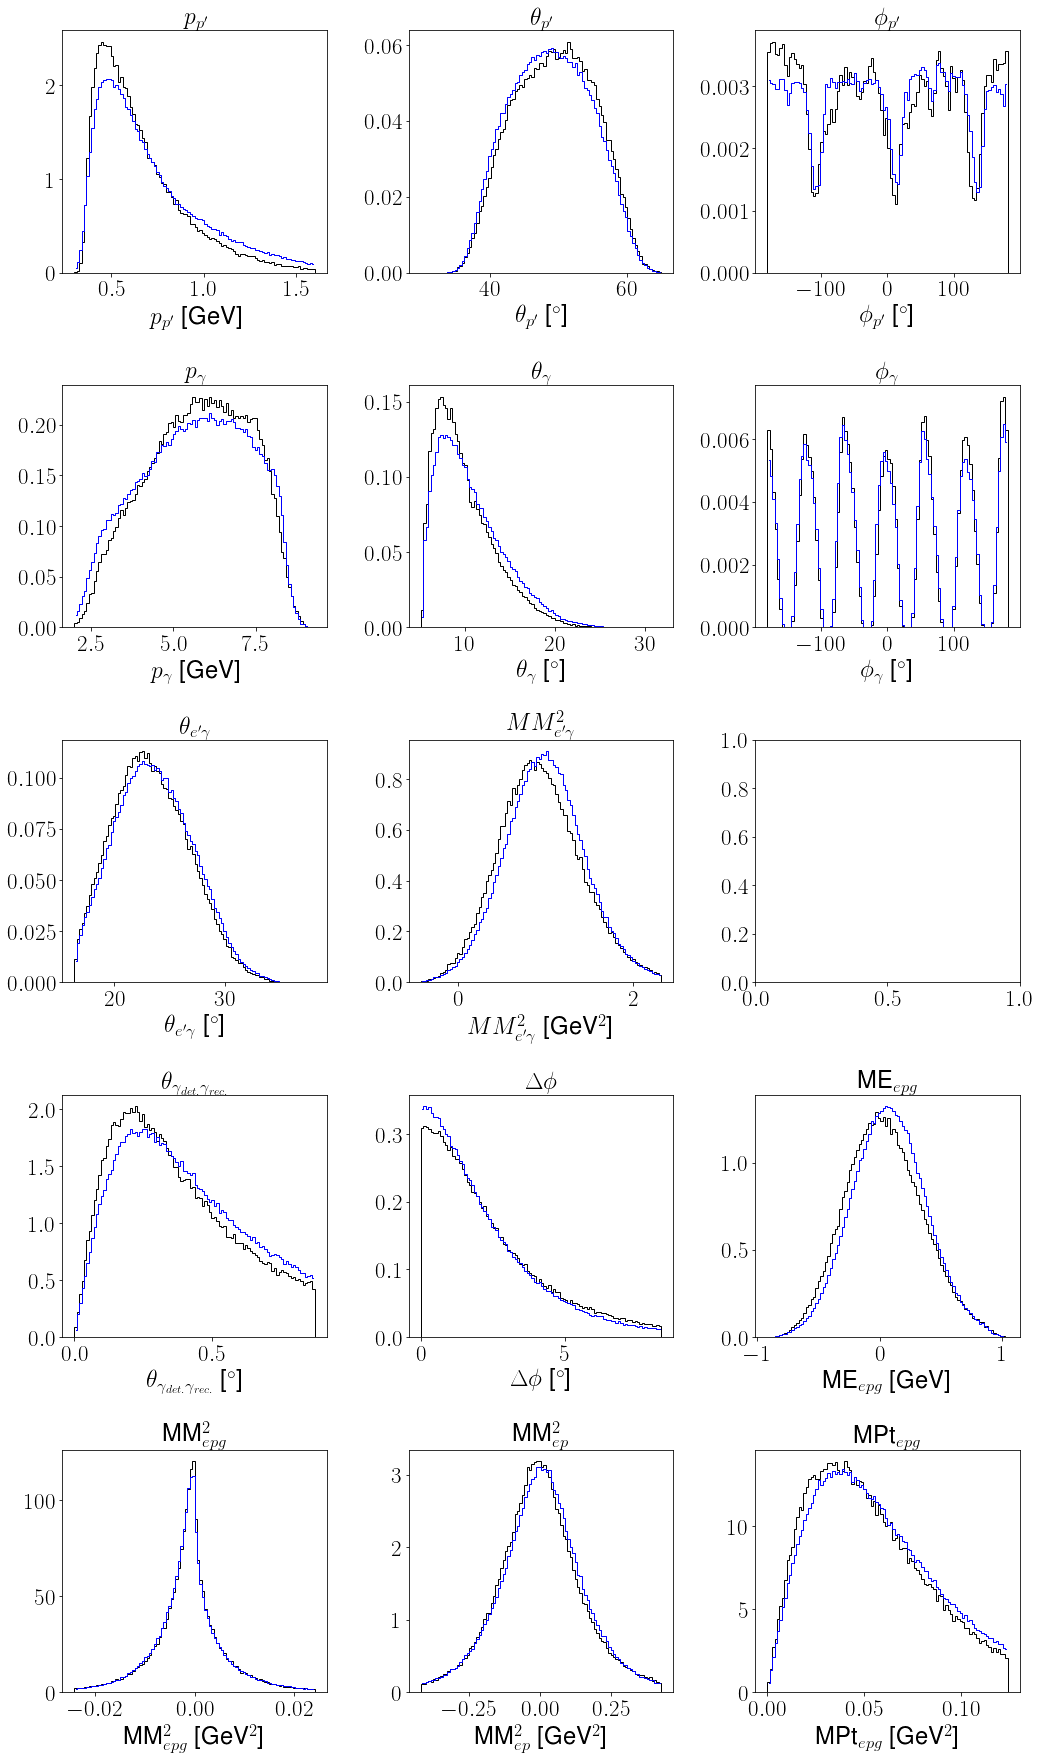

In [220]:
# for i in range(9):
PthetaMin = 0#PthetaEdges[i]
PthetaMax = 90#PthetaEdges[i+1]
varstoplot = ["Pp", "Ptheta", "Pphi","Gp", "Gtheta", "Gphi",  "coneAngle", "MM2_eg", "", "reconGam", "coplanarity", "ME_epg", "MM2_epg", "MM2_ep", "MPt"]
title = [r"$p_{p'}$", r"$\theta_{p'}$", r"$\phi_{p'}$", r"$p_{\gamma}$", r"$\theta_{\gamma}$", r"$\phi_{\gamma}$", r"$\theta_{e'\gamma}$", r"$MM^2_{e'\gamma}$", "", r"$\theta_{\gamma_{det.}\gamma_{rec.}}$", r"$\Delta\phi$" , "ME"+r"${}_{epg}$", "MM"+r"${}^{2}_{epg}$", "MM"+r"${}^{2}_{ep}$", "MPt"+r"${}_{epg}$"]
unit = [GeV, degree, degree, GeV, degree, degree, degree, GeV2,  "", degree, degree, GeV, GeV2, GeV2, GeV2, GeV2, GeV2, GeVc]
# binstarts = [PthetaMin, 0, -180, 0, 0, 0, -0.5, -0.01, 0.1, 0]
# binends = [GeMax, 7, 180, 30, 0.8, .1, 1.2, 0.01, 1.7, 10]
df3 = epgExpInbCD
df1 = dvcsSimInbCD
df2 = bkgSimInbCD
df4 = pi0ExpInbCD
df5 = pi0SimInbCD

# df1 = df1[df1.Gp>3]
# df2 = df2[df2.Gp>3]
# df3 = df3[df3.Gp>3]
# df4 = df4[df4.Gp>3]
# df5 = df5[df5.Gp>3]

# df1 = df1[df1.Pp<0.8]
# df2 = df2[df2.Pp<0.8]
# df3 = df3[df3.Pp<0.8]
# df4 = df4[df4.Pp<0.8]
# df5 = df5[df5.Pp<0.8]


contInb = len(df4)/len(df5) * len(df2)/len(df3)
contInbCD = contInb
fig, axs = plt.subplots(5, 3, figsize = (15,25))
for yind in range(0, 5):
    for xind in range(0, 3):
        ind = 3*yind + xind
        if varstoplot[ind]:
            pass
        else:
            continue
        if ind == 1:
            bins= np.linspace(30, 65, 101)
            simDist_dvcs, _ = np.histogram(df1.loc[(df1.Ptheta < PthetaMax) & (df1.Ptheta>PthetaMin), varstoplot[ind]], bins, density = True)
        else:
            simDist_dvcs, bins = np.histogram(df1.loc[(df1.Ptheta < PthetaMax) & (df1.Ptheta>PthetaMin), varstoplot[ind]], 100, density = True)
        simDist_dvpi0, _ = np.histogram(df2.loc[(df2.Ptheta < PthetaMax) & (df2.Ptheta>PthetaMin), varstoplot[ind]], bins, density = True)
        simDist = (1-contInb)*simDist_dvcs + contInb*simDist_dvpi0
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        axs[yind, xind].step(bincenters, simDist, where='mid',color='b', linewidth=1)
        axs[yind, xind].hist(df3.loc[(df3.Ptheta < PthetaMax) & (df3.Ptheta>PthetaMin),varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', density=True, linewidth=1)
        axs[yind, xind].set_title(title[ind])
        # axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
plt.tight_layout()
# plt.savefig(outDir+"InbCD{}_{:.3f}_{:.3f}_{:.3f}.pdf".format(i, sigma1, sigma2, sigma3))
# plt.savefig(outDir+"InbCD{}_{:.3f}_{:.3f}.pdf".format(i, sigma1, sigma2))
# plt.savefig(outDir+"InbCD{}_{:.3f}.pdf".format(i, sigma2))
plt.show()


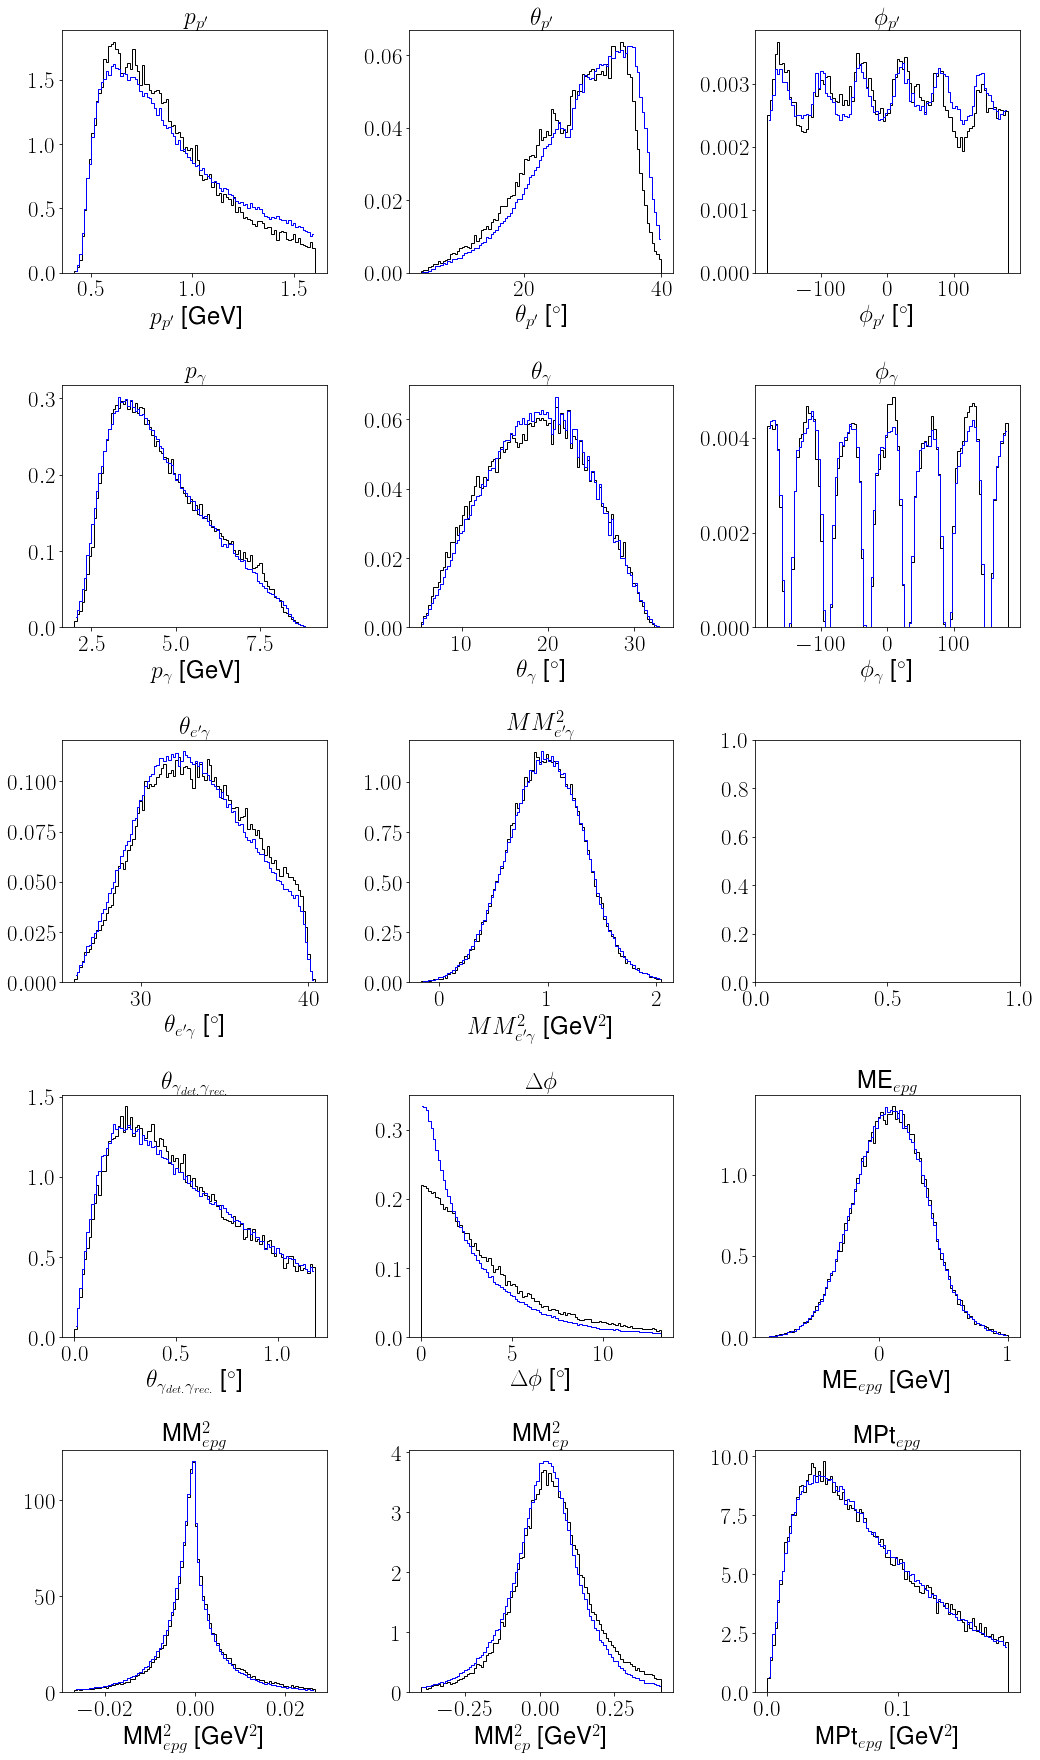

In [221]:
# for i in range(9):
PthetaMin = 0#PthetaEdges[i]
PthetaMax = 90#PthetaEdges[i+1]
varstoplot = ["Pp", "Ptheta", "Pphi","Gp", "Gtheta", "Gphi",  "coneAngle", "MM2_eg", "", "reconGam", "coplanarity", "ME_epg", "MM2_epg", "MM2_ep", "MPt"]
title = [r"$p_{p'}$", r"$\theta_{p'}$", r"$\phi_{p'}$", r"$p_{\gamma}$", r"$\theta_{\gamma}$", r"$\phi_{\gamma}$", r"$\theta_{e'\gamma}$", r"$MM^2_{e'\gamma}$", "", r"$\theta_{\gamma_{det.}\gamma_{rec.}}$", r"$\Delta\phi$" , "ME"+r"${}_{epg}$", "MM"+r"${}^{2}_{epg}$", "MM"+r"${}^{2}_{ep}$", "MPt"+r"${}_{epg}$"]
unit = [GeV, degree, degree, GeV, degree, degree, degree, GeV2,  "", degree, degree, GeV, GeV2, GeV2, GeV2, GeV2, GeV2, GeVc]
# binstarts = [PthetaMin, 0, -180, 0, 0, 0, -0.5, -0.01, 0.1, 0]
# binends = [GeMax, 7, 180, 30, 0.8, .1, 1.2, 0.01, 1.7, 10]
df3 = epgExpInbFD
df1 = dvcsSimInbFD
df2 = bkgSimInbFD
df4 = pi0ExpInbFD
df5 = pi0SimInbFD

# df1 = df1[df1.Pp<0.8]
# df2 = df2[df2.Pp<0.8]
# df3 = df3[df3.Pp<0.8]
# df4 = df4[df4.Pp<0.8]
# df5 = df5[df5.Pp<0.8]

contInb = len(df4)/len(df5) * len(df2)/len(df3)
contInbFD = contInb
fig, axs = plt.subplots(5, 3, figsize = (15,25))
for yind in range(0, 5):
    for xind in range(0, 3):
        ind = 3*yind + xind
        if varstoplot[ind]:
            pass
        else:
            continue
        if ind == 1:
            bins= np.linspace(5, 40, 101)
            simDist_dvcs, _ = np.histogram(df1.loc[(df1.Ptheta < PthetaMax) & (df1.Ptheta>PthetaMin), varstoplot[ind]], bins, density = True)
        else:
            simDist_dvcs, bins = np.histogram(df1.loc[(df1.Ptheta < PthetaMax) & (df1.Ptheta>PthetaMin), varstoplot[ind]], 100, density = True)
        simDist_dvpi0, _ = np.histogram(df2.loc[(df2.Ptheta < PthetaMax) & (df2.Ptheta>PthetaMin), varstoplot[ind]], bins, density = True)
        simDist = (1-contInb)*simDist_dvcs + contInb*simDist_dvpi0
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        axs[yind, xind].step(bincenters, simDist, where='mid',color='b', linewidth=1)
        axs[yind, xind].hist(df3.loc[(df3.Ptheta < PthetaMax) & (df3.Ptheta>PthetaMin),varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', density=True, linewidth=1)
        axs[yind, xind].set_title(title[ind])
        # axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
plt.tight_layout()
# plt.savefig(outDir+"InbFD{}_{:.3f}_{:.3f}_{:.3f}.pdf".format(i, sigma1, sigma2, sigma3))
# plt.savefig(outDir+"InbFD{}_{:.3f}_{:.3f}.pdf".format(i, sigma1, sigma2))
# plt.savefig(outDir+"InbFD{}_{:.3f}.pdf".format(i, sigma2))
plt.show()


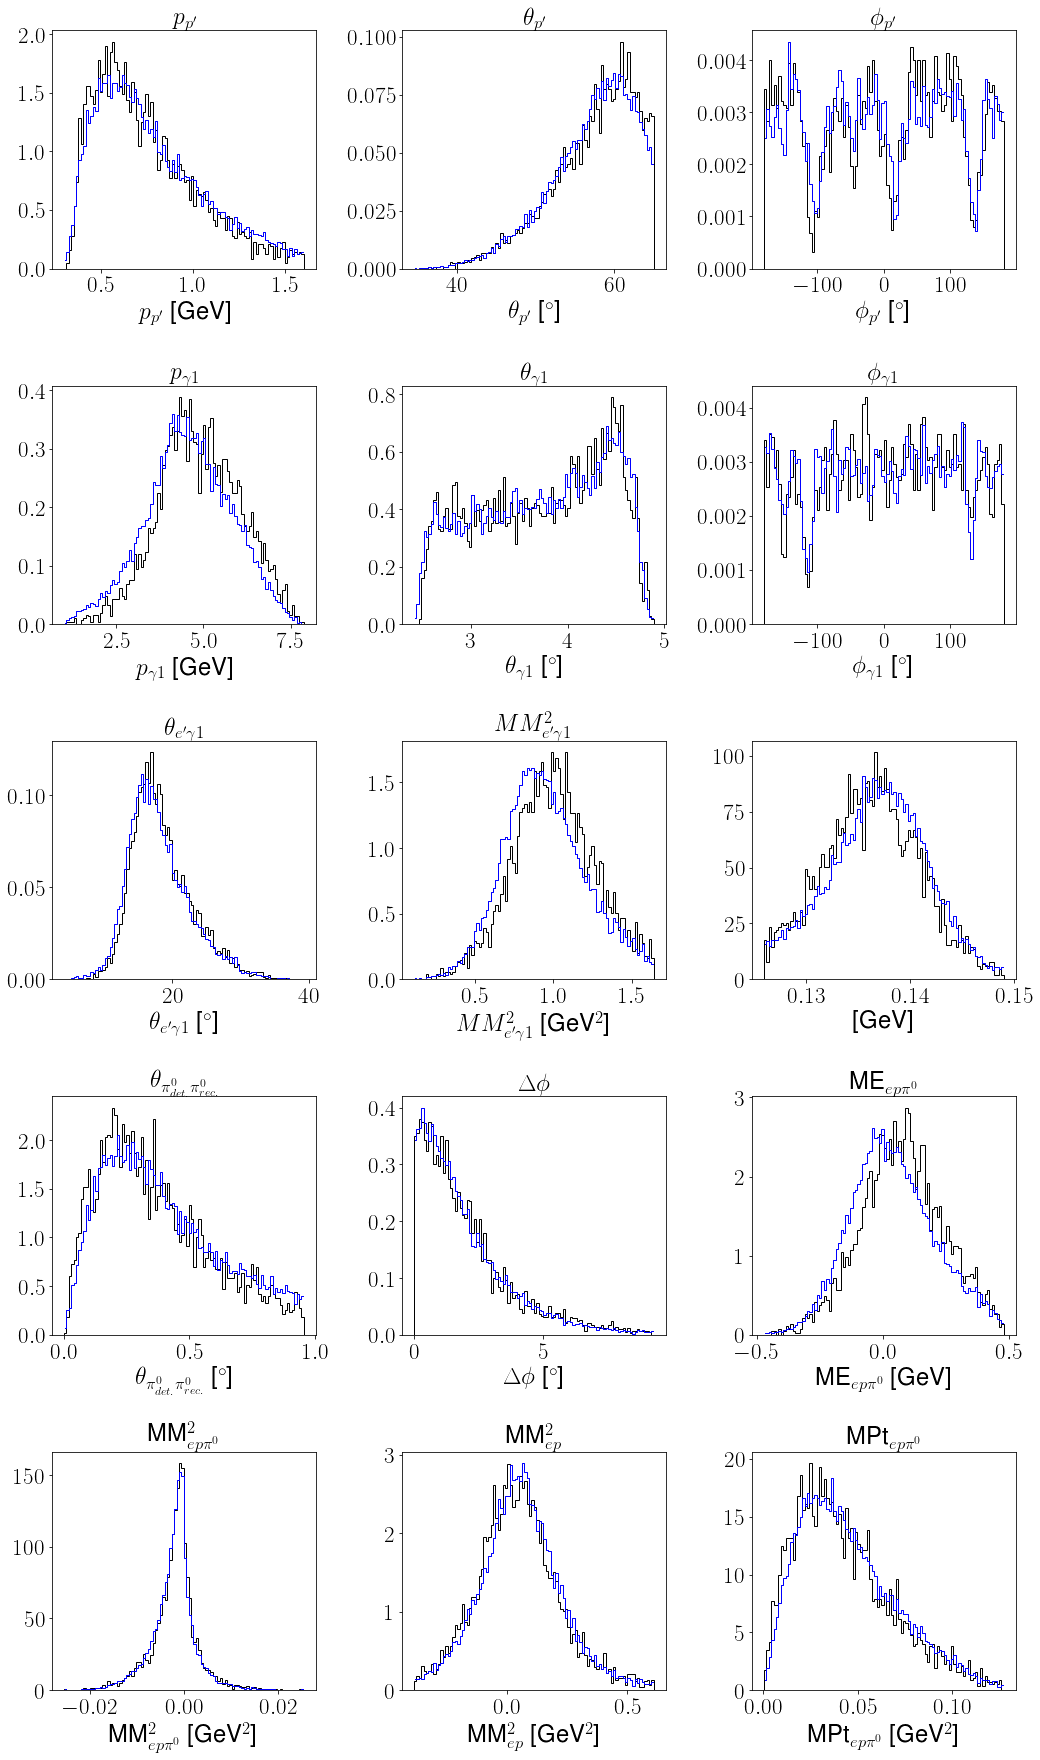

<Figure size 432x288 with 0 Axes>

In [206]:
varstoplot = ["Pp", "Ptheta", "Pphi","Gp", "Gtheta", "Gphi",  "coneAngle1", "MM2_egg", "Mpi0", "reconPi", "coplanarity", "ME_epgg", "MM2_epgg", "MM2_ep", "MPt"]
title = [r"$p_{p'}$", r"$\theta_{p'}$", r"$\phi_{p'}$", r"$p_{\gamma 1}$", r"$\theta_{\gamma 1}$", r"$\phi_{\gamma 1}$", r"$\theta_{e'\gamma 1}$", r"$MM^2_{e'\gamma 1}$", "", r"$\theta_{\pi^0_{det.}\pi^0_{rec.}}$", r"$\Delta\phi$" , "ME"+r"${}_{ep\pi^0}$", "MM"+r"${}^{2}_{ep\pi^0}$", "MM"+r"${}^{2}_{ep}$", "MPt"+r"${}_{ep\pi^0}$"]
unit = [GeV, degree, degree, GeV, degree, degree, degree, GeV2, GeV, degree, degree, GeV, GeV2, GeV2, GeV2, GeV2, GeV2, GeVc]
# binstarts = [PpMin, 0, -180, 0, 0, 0, -0.5, -0.01, 0.1, 0]
# binends = [PpMax, 7, 180, 30, 0.8, .1, 1.2, 0.01, 1.7, 10]

df4 = pi0ExpInbCDFT
df5 = pi0SimInbCDFT

# df1 = df1[df1.Gp>3]
# df2 = df2[df2.Gp>3]
# df3 = df3[df3.Gp>3]
# df4 = df4[df4.Gp>3]
# df5 = df5[df5.Gp>3]

# df4 = df4[df4.Pp<0.8]
# df5 = df5[df5.Pp<0.8]


fig, axs = plt.subplots(5, 3, figsize = (15,25))
for yind in range(0, 5):
    for xind in range(0, 3):
        ind = 3*yind + xind
        if varstoplot[ind]:
            pass
        else:
            continue
        simDist, bins = np.histogram(df5[varstoplot[ind]], 100, density = True)
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        axs[yind, xind].step(bincenters, simDist, where='mid',color='b', linewidth=1)
        axs[yind, xind].hist(df4[varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', density=True, linewidth=1)
        axs[yind, xind].set_title(title[ind])
        # axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
plt.tight_layout()
plt.show()
plt.clf()



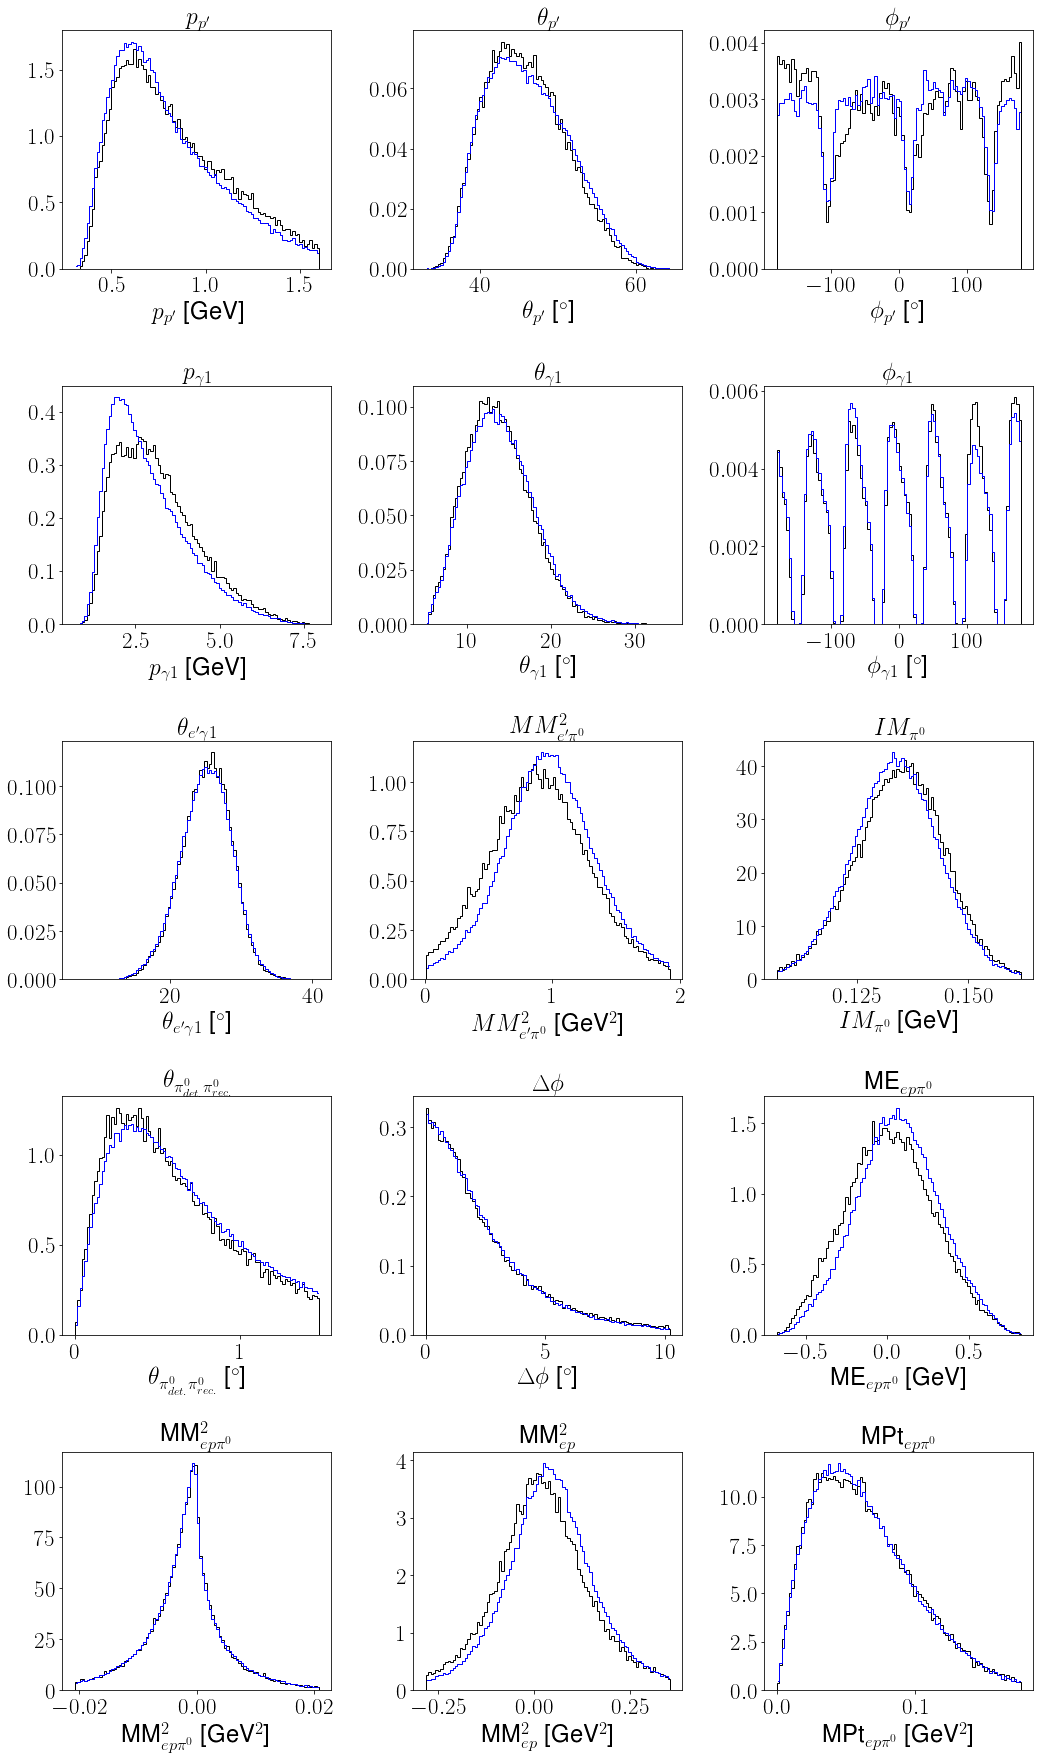

<Figure size 432x288 with 0 Axes>

In [207]:
varstoplot = ["Pp", "Ptheta", "Pphi","Gp", "Gtheta", "Gphi",  "coneAngle1", "MM2_egg", "Mpi0", "reconPi", "coplanarity", "ME_epgg", "MM2_epgg", "MM2_ep", "MPt"]
title = [r"$p_{p'}$", r"$\theta_{p'}$", r"$\phi_{p'}$", r"$p_{\gamma 1}$", r"$\theta_{\gamma 1}$", r"$\phi_{\gamma 1}$", r"$\theta_{e'\gamma 1}$", r"$MM^2_{e'\pi^0}$", r"$IM_{\pi^0}$", r"$\theta_{\pi^0_{det.}\pi^0_{rec.}}$", r"$\Delta\phi$" , "ME"+r"${}_{ep\pi^0}$", "MM"+r"${}^{2}_{ep\pi^0}$", "MM"+r"${}^{2}_{ep}$", "MPt"+r"${}_{ep\pi^0}$"]
unit = [GeV, degree, degree, GeV, degree, degree, degree, GeV2, GeV, degree, degree, GeV, GeV2, GeV2, GeV2, GeV2, GeV2, GeVc]
# binstarts = [PpMin, 0, -180, 0, 0, 0, -0.5, -0.01, 0.1, 0]
# binends = [PpMax, 7, 180, 30, 0.8, .1, 1.2, 0.01, 1.7, 10]

df4 = pi0ExpInbCD
df5 = pi0SimInbCD

# df1 = df1[df1.Gp>3]
# df2 = df2[df2.Gp>3]
# df3 = df3[df3.Gp>3]
# df4 = df4[df4.Gp2<2]
# df5 = df5[df5.Gp2<2]

# df4 = df4[df4.Pp<0.8]
# df5 = df5[df5.Pp<0.8]


fig, axs = plt.subplots(5, 3, figsize = (15,25))
for yind in range(0, 5):
    for xind in range(0, 3):
        ind = 3*yind + xind
        if varstoplot[ind]:
            pass
        else:
            continue
        simDist, bins = np.histogram(df5[varstoplot[ind]], 100, density = True)
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        axs[yind, xind].step(bincenters, simDist, where='mid',color='b', linewidth=1)
        axs[yind, xind].hist(df4[varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', density=True, linewidth=1)
        axs[yind, xind].set_title(title[ind])
        # axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
plt.tight_layout()
plt.show()
plt.clf()

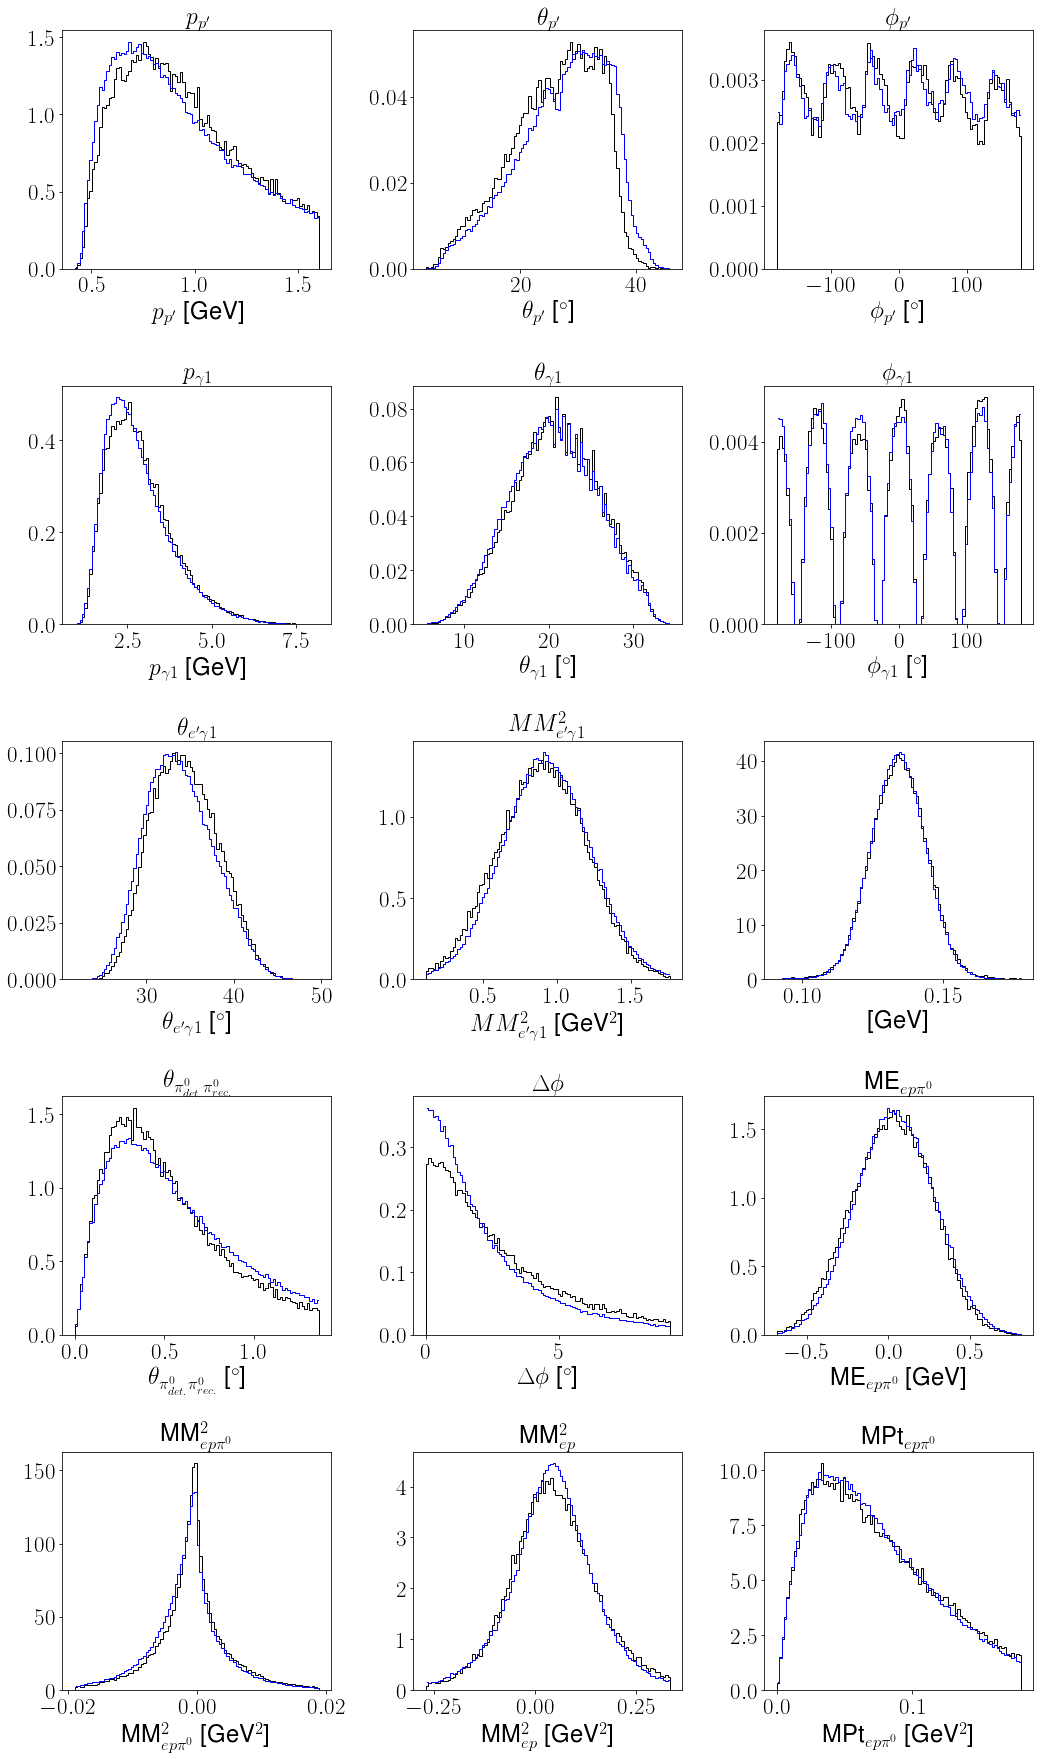

<Figure size 432x288 with 0 Axes>

In [226]:
varstoplot = ["Pp", "Ptheta", "Pphi","Gp", "Gtheta", "Gphi",  "coneAngle1", "MM2_egg", "Mpi0", "reconPi", "coplanarity", "ME_epgg", "MM2_epgg", "MM2_ep", "MPt"]
title = [r"$p_{p'}$", r"$\theta_{p'}$", r"$\phi_{p'}$", r"$p_{\gamma 1}$", r"$\theta_{\gamma 1}$", r"$\phi_{\gamma 1}$", r"$\theta_{e'\gamma 1}$", r"$MM^2_{e'\gamma 1}$", "", r"$\theta_{\pi^0_{det.}\pi^0_{rec.}}$", r"$\Delta\phi$" , "ME"+r"${}_{ep\pi^0}$", "MM"+r"${}^{2}_{ep\pi^0}$", "MM"+r"${}^{2}_{ep}$", "MPt"+r"${}_{ep\pi^0}$"]
unit = [GeV, degree, degree, GeV, degree, degree, degree, GeV2, GeV, degree, degree, GeV, GeV2, GeV2, GeV2, GeV2, GeV2, GeVc]
# binstarts = [PpMin, 0, -180, 0, 0, 0, -0.5, -0.01, 0.1, 0]
# binends = [PpMax, 7, 180, 30, 0.8, .1, 1.2, 0.01, 1.7, 10]

df4 = pi0ExpInbFD
df5 = pi0SimInbFD

# df1 = df1[df1.Gp>3]
# df2 = df2[df2.Gp>3]
# df3 = df3[df3.Gp>3]
# df4 = df4[df4.Gp2>2]
# df5 = df5[df5.Gp2>2]

# df4 = df4[df4.Pp<0.8]
# df5 = df5[df5.Pp<0.8]

fig, axs = plt.subplots(5, 3, figsize = (15,25))
for yind in range(0, 5):
    for xind in range(0, 3):
        ind = 3*yind + xind
        if varstoplot[ind]:
            pass
        else:
            continue
        simDist, bins = np.histogram(df5[varstoplot[ind]], 100, density = True)
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        axs[yind, xind].step(bincenters, simDist, where='mid',color='b', linewidth=1)
        axs[yind, xind].hist(df4[varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', density=True, linewidth=1)
        axs[yind, xind].set_title(title[ind])
        # axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
plt.tight_layout()
plt.show()
plt.clf()



In [210]:
parent_MC = "/Volumes/Extreme SSD/Feb2022/SimtoDat/v4.2/outb/dvcs/"
parent_MC_bkg1g = "/Volumes/Extreme SSD/Feb2022/SimtoDat/v4.2/outb/bkg_1g/"
parent_MC_bkg2g = "/Volumes/Extreme SSD/Feb2022/SimtoDat/v4.2/outb/bkg_2g/"
parent_exp = "/Volumes/Extreme SSD/Feb2022/SimtoDat/v4.2/outb/exp/"


# dvcsSimOutb = pd.read_pickle(parent_MC + "4240.pkl")
# bkgSimOutb = pd.read_pickle(parent_MC_bkg1g + "4243.pkl")
# pi0SimOutb = pd.read_pickle(parent_MC_bkg2g + "4243.pkl")
epgExpOutb = pd.read_pickle(parent_exp + "dvcs.pkl")
pi0ExpOutb = pd.read_pickle(parent_exp + "pi0.pkl")

In [211]:
epgExpOutbCDFT = epgExpOutb.loc[epgExpOutb.config == 3]
pi0ExpOutbCDFT = pi0ExpOutb.loc[pi0ExpOutb.config == 3]
dvcsSimOutbCDFT = dvcsSimOutb.loc[dvcsSimOutb.config == 3]
bkgSimOutbCDFT = bkgSimOutb.loc[bkgSimOutb.config == 3]
pi0SimOutbCDFT = pi0SimOutb.loc[pi0SimOutb.config == 3]

epgExpOutbCD = epgExpOutb.loc[epgExpOutb.config == 2]
pi0ExpOutbCD = pi0ExpOutb.loc[pi0ExpOutb.config == 2]
dvcsSimOutbCD =  dvcsSimOutb.loc[dvcsSimOutb.config == 2]
bkgSimOutbCD = bkgSimOutb.loc[bkgSimOutb.config == 2]
pi0SimOutbCD = pi0SimOutb.loc[pi0SimOutb.config == 2]

epgExpOutbFD = epgExpOutb.loc[epgExpOutb.config == 1]
pi0ExpOutbFD = pi0ExpOutb.loc[pi0ExpOutb.config == 1]
dvcsSimOutbFD =  dvcsSimOutb.loc[dvcsSimOutb.config == 1]
bkgSimOutbFD = bkgSimOutb.loc[bkgSimOutb.config == 1]
pi0SimOutbFD = pi0SimOutb.loc[pi0SimOutb.config == 1]

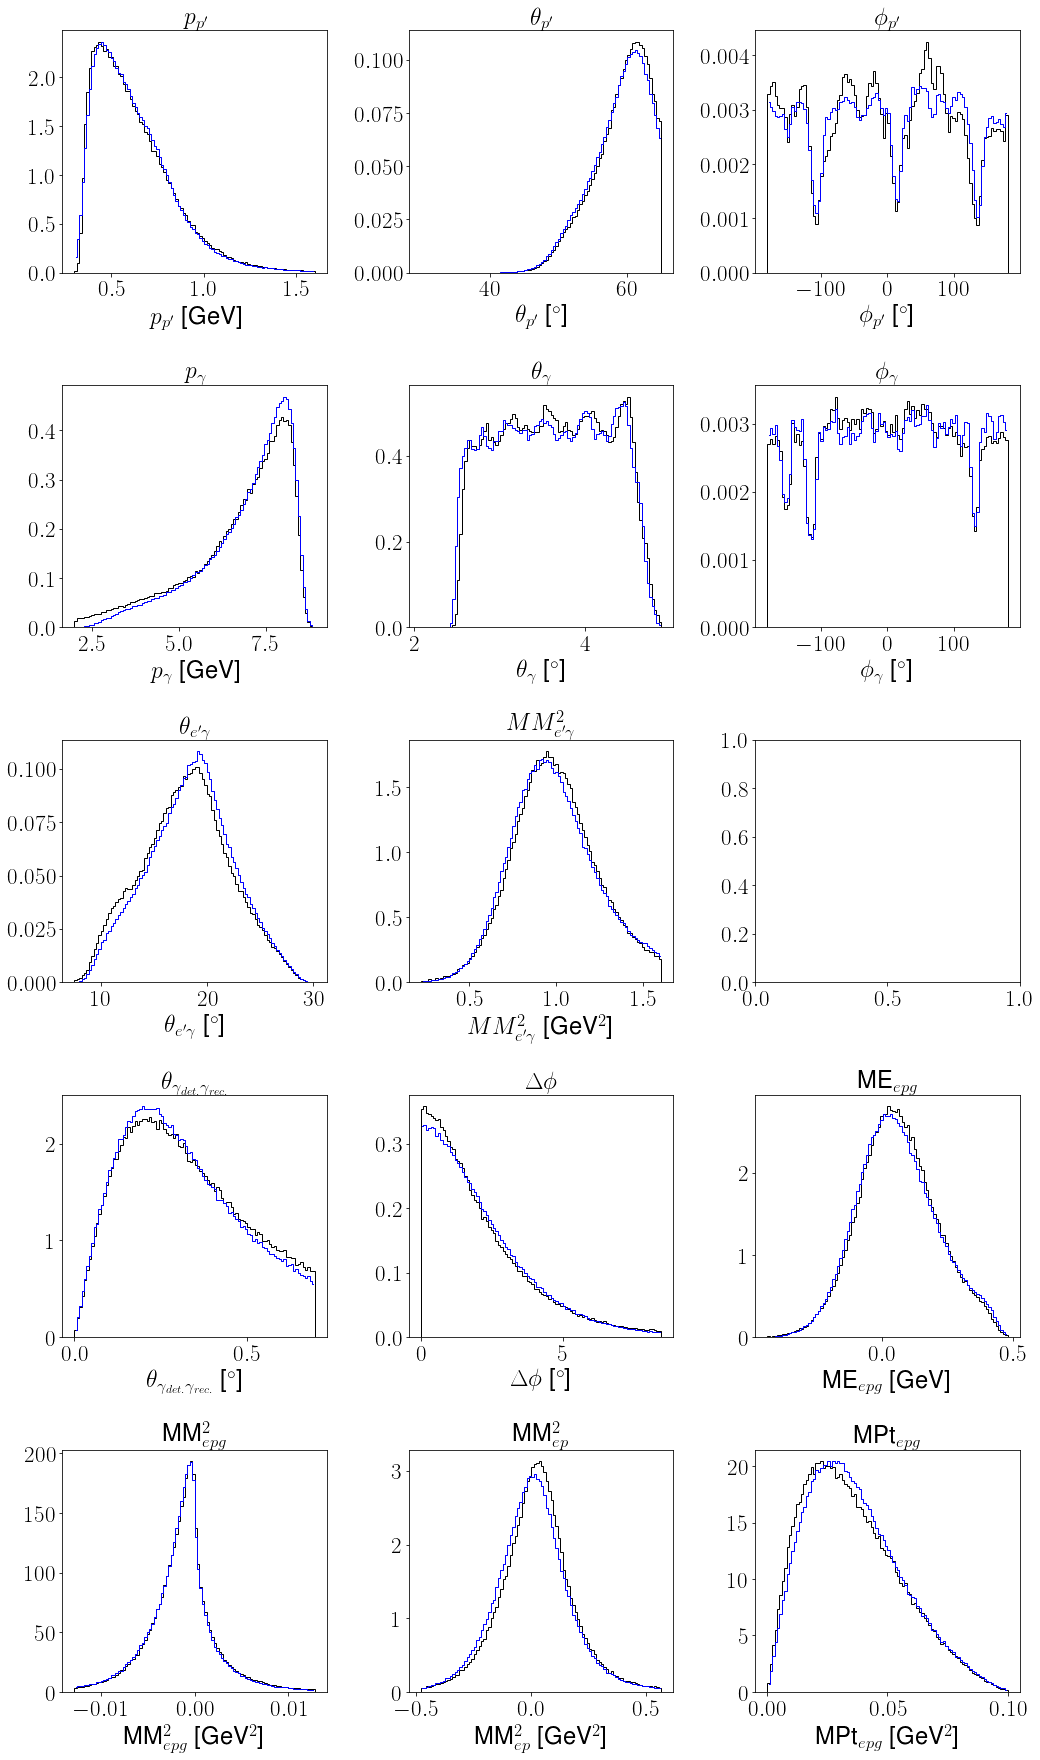

In [223]:
# for i in range(9):
PthetaMin = 0#PthetaEdges[i]
PthetaMax = 90#PthetaEdges[i+1]
varstoplot = ["Pp", "Ptheta", "Pphi","Gp", "Gtheta", "Gphi",  "coneAngle", "MM2_eg", "", "reconGam", "coplanarity", "ME_epg", "MM2_epg", "MM2_ep", "MPt"]
title = [r"$p_{p'}$", r"$\theta_{p'}$", r"$\phi_{p'}$", r"$p_{\gamma}$", r"$\theta_{\gamma}$", r"$\phi_{\gamma}$", r"$\theta_{e'\gamma}$", r"$MM^2_{e'\gamma}$", "", r"$\theta_{\gamma_{det.}\gamma_{rec.}}$", r"$\Delta\phi$" , "ME"+r"${}_{epg}$", "MM"+r"${}^{2}_{epg}$", "MM"+r"${}^{2}_{ep}$", "MPt"+r"${}_{epg}$"]
unit = [GeV, degree, degree, GeV, degree, degree, degree, GeV2,  "", degree, degree, GeV, GeV2, GeV2, GeV2, GeV2, GeV2, GeVc]
# binstarts = [PthetaMin, 0, -180, 0, 0, 0, -0.5, -0.01, 0.1, 0]
# binends = [GeMax, 7, 180, 30, 0.8, .1, 1.2, 0.01, 1.7, 10]
df3 = epgExpOutbCDFT
df1 = dvcsSimOutbCDFT
df2 = bkgSimOutbCDFT
df4 = pi0ExpOutbCDFT
df5 = pi0SimOutbCDFT
contOutb = len(df4)/len(df5) * len(df2)/len(df3)
contOutbCDFT = contOutb
fig, axs = plt.subplots(5, 3, figsize = (15,25))
for yind in range(0, 5):
    for xind in range(0, 3):
        ind = 3*yind + xind
        if varstoplot[ind]:
            pass
        else:
            continue
        if ind == 1:
            bins= np.linspace(30, 65, 101)
            simDist_dvcs, _ = np.histogram(df1.loc[(df1.Ptheta < PthetaMax) & (df1.Ptheta>PthetaMin), varstoplot[ind]], bins, density = True)
        else:
            simDist_dvcs, bins = np.histogram(df1.loc[(df1.Ptheta < PthetaMax) & (df1.Ptheta>PthetaMin), varstoplot[ind]], 100, density = True)
        simDist_dvpi0, _ = np.histogram(df2.loc[(df2.Ptheta < PthetaMax) & (df2.Ptheta>PthetaMin), varstoplot[ind]], bins, density = True)
        simDist = (1-contOutb)*simDist_dvcs + contOutb*simDist_dvpi0
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        axs[yind, xind].step(bincenters, simDist, where='mid',color='b', linewidth=1)
        axs[yind, xind].hist(df3.loc[(df3.Ptheta < PthetaMax) & (df3.Ptheta>PthetaMin),varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', density=True, linewidth=1)
        axs[yind, xind].set_title(title[ind])
        # axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
plt.tight_layout()
# plt.savefig(outDir+"OutbCDFT{}_{:.3f}_{:.3f}_{:.3f}.pdf".format(i, sigma1, sigma2, sigma3))
# plt.savefig(outDir+"OutbCDFT{}_{:.3f}_{:.3f}.pdf".format(i, sigma1, sigma2))
# plt.savefig(outDir+"OutbCDFT{}_{:.3f}.pdf".format(i, sigma2))
plt.show()


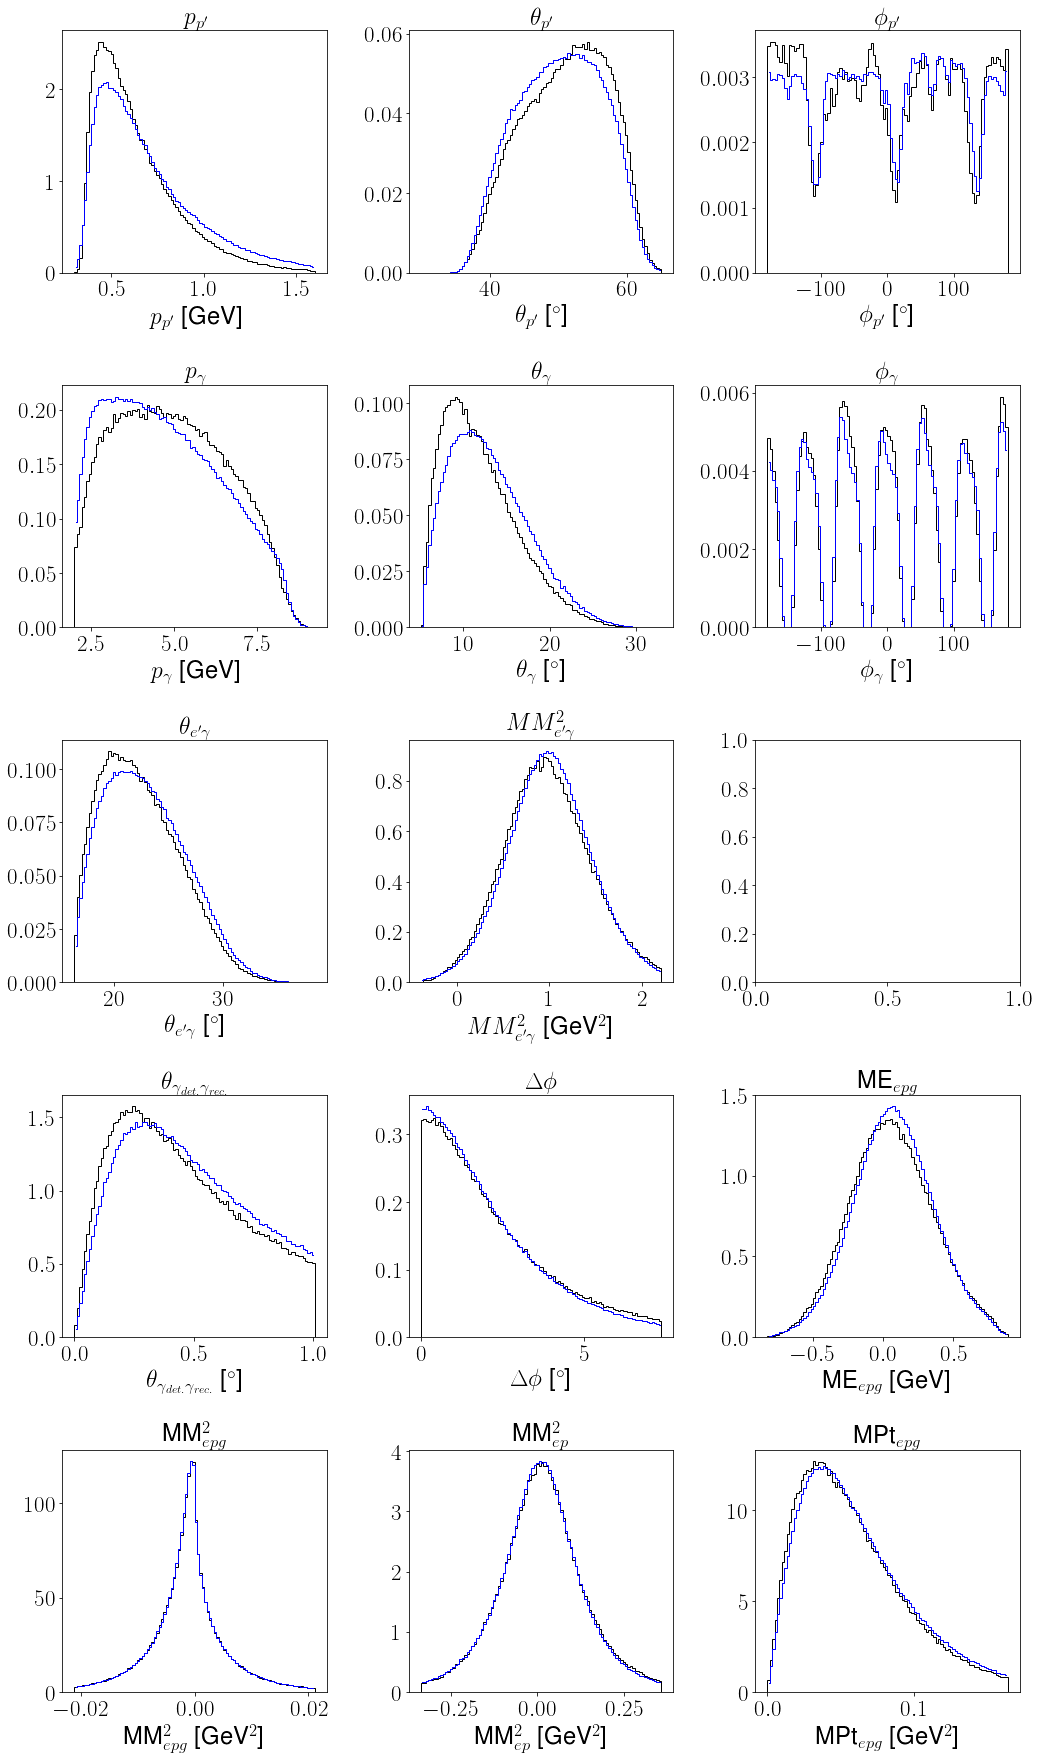

In [222]:
# for i in range(9):
PthetaMin = 0#PthetaEdges[i]
PthetaMax = 90#PthetaEdges[i+1]
varstoplot = ["Pp", "Ptheta", "Pphi","Gp", "Gtheta", "Gphi",  "coneAngle", "MM2_eg", "", "reconGam", "coplanarity", "ME_epg", "MM2_epg", "MM2_ep", "MPt"]
title = [r"$p_{p'}$", r"$\theta_{p'}$", r"$\phi_{p'}$", r"$p_{\gamma}$", r"$\theta_{\gamma}$", r"$\phi_{\gamma}$", r"$\theta_{e'\gamma}$", r"$MM^2_{e'\gamma}$", "", r"$\theta_{\gamma_{det.}\gamma_{rec.}}$", r"$\Delta\phi$" , "ME"+r"${}_{epg}$", "MM"+r"${}^{2}_{epg}$", "MM"+r"${}^{2}_{ep}$", "MPt"+r"${}_{epg}$"]
unit = [GeV, degree, degree, GeV, degree, degree, degree, GeV2,  "", degree, degree, GeV, GeV2, GeV2, GeV2, GeV2, GeV2, GeVc]
# binstarts = [PthetaMin, 0, -180, 0, 0, 0, -0.5, -0.01, 0.1, 0]
# binends = [GeMax, 7, 180, 30, 0.8, .1, 1.2, 0.01, 1.7, 10]
df3 = epgExpOutbCD
df1 = dvcsSimOutbCD
df2 = bkgSimOutbCD
df4 = pi0ExpOutbCD
df5 = pi0SimOutbCD

# df1 = df1[df1.Gp>3]
# df2 = df2[df2.Gp>3]
# df3 = df3[df3.Gp>3]
# df4 = df4[df4.Gp>3]
# df5 = df5[df5.Gp>3]

# df1 = df1[df1.Pp<0.8]
# df2 = df2[df2.Pp<0.8]
# df3 = df3[df3.Pp<0.8]
# df4 = df4[df4.Pp<0.8]
# df5 = df5[df5.Pp<0.8]
contOutb = len(df4)/len(df5) * len(df2)/len(df3)
contOutbCD = contOutb
fig, axs = plt.subplots(5, 3, figsize = (15,25))
for yind in range(0, 5):
    for xind in range(0, 3):
        ind = 3*yind + xind
        if varstoplot[ind]:
            pass
        else:
            continue
        if ind == 1:
            bins= np.linspace(30, 65, 101)
            simDist_dvcs, _ = np.histogram(df1.loc[(df1.Ptheta < PthetaMax) & (df1.Ptheta>PthetaMin), varstoplot[ind]], bins, density = True)
        else:
            simDist_dvcs, bins = np.histogram(df1.loc[(df1.Ptheta < PthetaMax) & (df1.Ptheta>PthetaMin), varstoplot[ind]], 100, density = True)
        simDist_dvpi0, _ = np.histogram(df2.loc[(df2.Ptheta < PthetaMax) & (df2.Ptheta>PthetaMin), varstoplot[ind]], bins, density = True)
        simDist = (1-contOutb)*simDist_dvcs + contOutb*simDist_dvpi0
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        axs[yind, xind].step(bincenters, simDist, where='mid',color='b', linewidth=1)
        axs[yind, xind].hist(df3.loc[(df3.Ptheta < PthetaMax) & (df3.Ptheta>PthetaMin),varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', density=True, linewidth=1)
        axs[yind, xind].set_title(title[ind])
        # axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
plt.tight_layout()
# plt.savefig(outDir+"OutbCD{}_{:.3f}_{:.3f}_{:.3f}.pdf".format(i, sigma1, sigma2, sigma3))
# plt.savefig(outDir+"OutbCD{}_{:.3f}_{:.3f}.pdf".format(i, sigma1, sigma2))
# plt.savefig(outDir+"OutbCD{}_{:.3f}.pdf".format(i, sigma2))
plt.show()


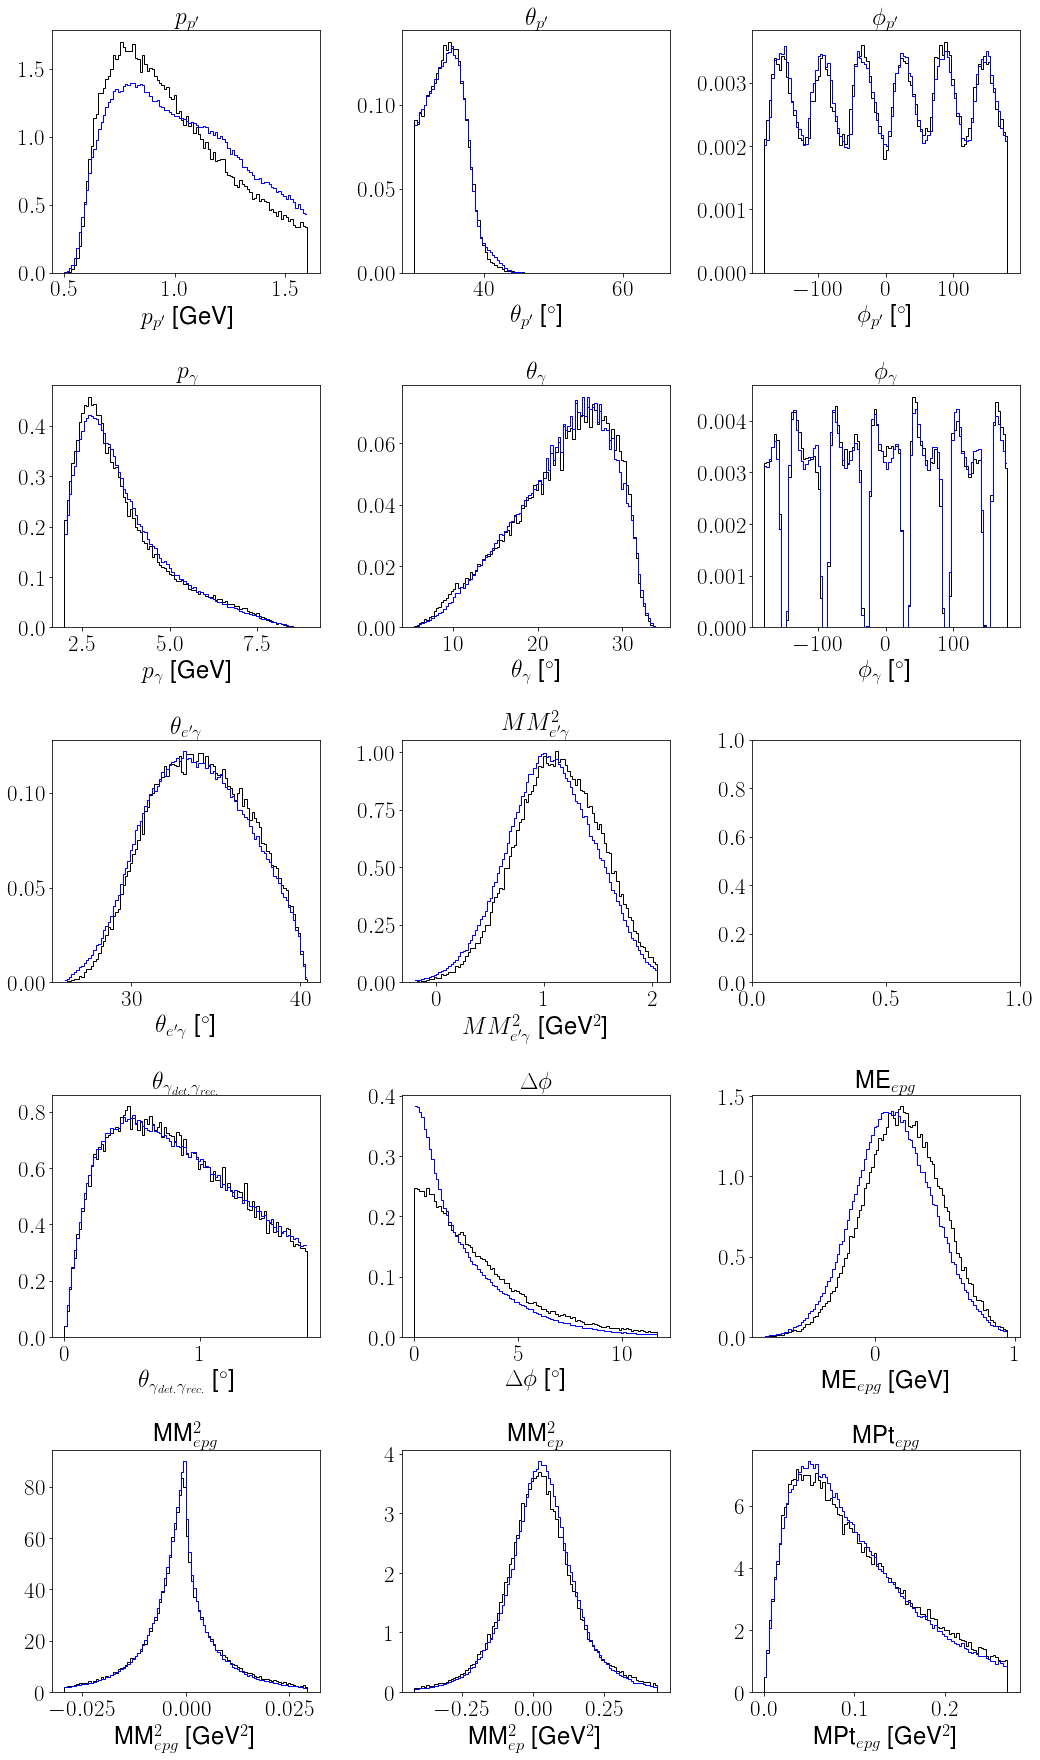

In [224]:
# for i in range(9):
PthetaMin = 0#PthetaEdges[i]
PthetaMax = 90#PthetaEdges[i+1]
varstoplot = ["Pp", "Ptheta", "Pphi","Gp", "Gtheta", "Gphi",  "coneAngle", "MM2_eg", "", "reconGam", "coplanarity", "ME_epg", "MM2_epg", "MM2_ep", "MPt"]
title = [r"$p_{p'}$", r"$\theta_{p'}$", r"$\phi_{p'}$", r"$p_{\gamma}$", r"$\theta_{\gamma}$", r"$\phi_{\gamma}$", r"$\theta_{e'\gamma}$", r"$MM^2_{e'\gamma}$", "", r"$\theta_{\gamma_{det.}\gamma_{rec.}}$", r"$\Delta\phi$" , "ME"+r"${}_{epg}$", "MM"+r"${}^{2}_{epg}$", "MM"+r"${}^{2}_{ep}$", "MPt"+r"${}_{epg}$"]
unit = [GeV, degree, degree, GeV, degree, degree, degree, GeV2,  "", degree, degree, GeV, GeV2, GeV2, GeV2, GeV2, GeV2, GeVc]
# binstarts = [PthetaMin, 0, -180, 0, 0, 0, -0.5, -0.01, 0.1, 0]
# binends = [GeMax, 7, 180, 30, 0.8, .1, 1.2, 0.01, 1.7, 10]
df3 = epgExpOutbFD
df1 = dvcsSimOutbFD
df2 = bkgSimOutbFD
df4 = pi0ExpOutbFD
df5 = pi0SimOutbFD

# df1 = df1.loc[df1.Gp>2]
# df2 = df2.loc[df2.Gp>2]
# df3 = df3.loc[df3.Gp>2]
# df4 = df4.loc[df4.Gp>2]
# df5 = df5.loc[df5.Gp>2]
contOutb = len(df4)/len(df5) * len(df2)/len(df3)
contOutbFD = contOutb
fig, axs = plt.subplots(5, 3, figsize = (15,25))
for yind in range(0, 5):
    for xind in range(0, 3):
        ind = 3*yind + xind
        if varstoplot[ind]:
            pass
        else:
            continue
        if ind == 1:
            bins= np.linspace(30, 65, 101)
            simDist_dvcs, _ = np.histogram(df1.loc[(df1.Ptheta < PthetaMax) & (df1.Ptheta>PthetaMin), varstoplot[ind]], bins, density = True)
        else:
            simDist_dvcs, bins = np.histogram(df1.loc[(df1.Ptheta < PthetaMax) & (df1.Ptheta>PthetaMin), varstoplot[ind]], 100, density = True)
        simDist_dvpi0, _ = np.histogram(df2.loc[(df2.Ptheta < PthetaMax) & (df2.Ptheta>PthetaMin), varstoplot[ind]], bins, density = True)
        simDist = (1-contOutb)*simDist_dvcs + contOutb*simDist_dvpi0
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        axs[yind, xind].step(bincenters, simDist, where='mid',color='b', linewidth=1)
        expDist, _ = np.histogram(df3[varstoplot[ind]], bins = bins)
        axs[yind, xind].hist(df3.loc[(df3.Ptheta < PthetaMax) & (df3.Ptheta>PthetaMin),varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', density=True, linewidth=1)
        axs[yind, xind].set_title(title[ind])
        # axs[yind, xind].set_xlim([start, end])
#         if ind == 11:
#             axs[yind, xind].axvline(0.2)
#             axs[yind, xind].axvline(0.12)
#             print(bincenters[np.argmax(simDist)] - bincenters[np.argmax(expDist)])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
plt.tight_layout()
# plt.savefig(outDir+"OutbFD{}_{:.3f}_{:.3f}_{:.3f}.pdf".format(i, sigma1, sigma2, sigma3))
# plt.savefig(outDir+"OutbFD{}_{:.3f}_{:.3f}.pdf".format(i, sigma1, sigma2))
# plt.savefig(outDir+"OutbFD{}_{:.3f}.pdf".format(i, sigma2))
plt.show()


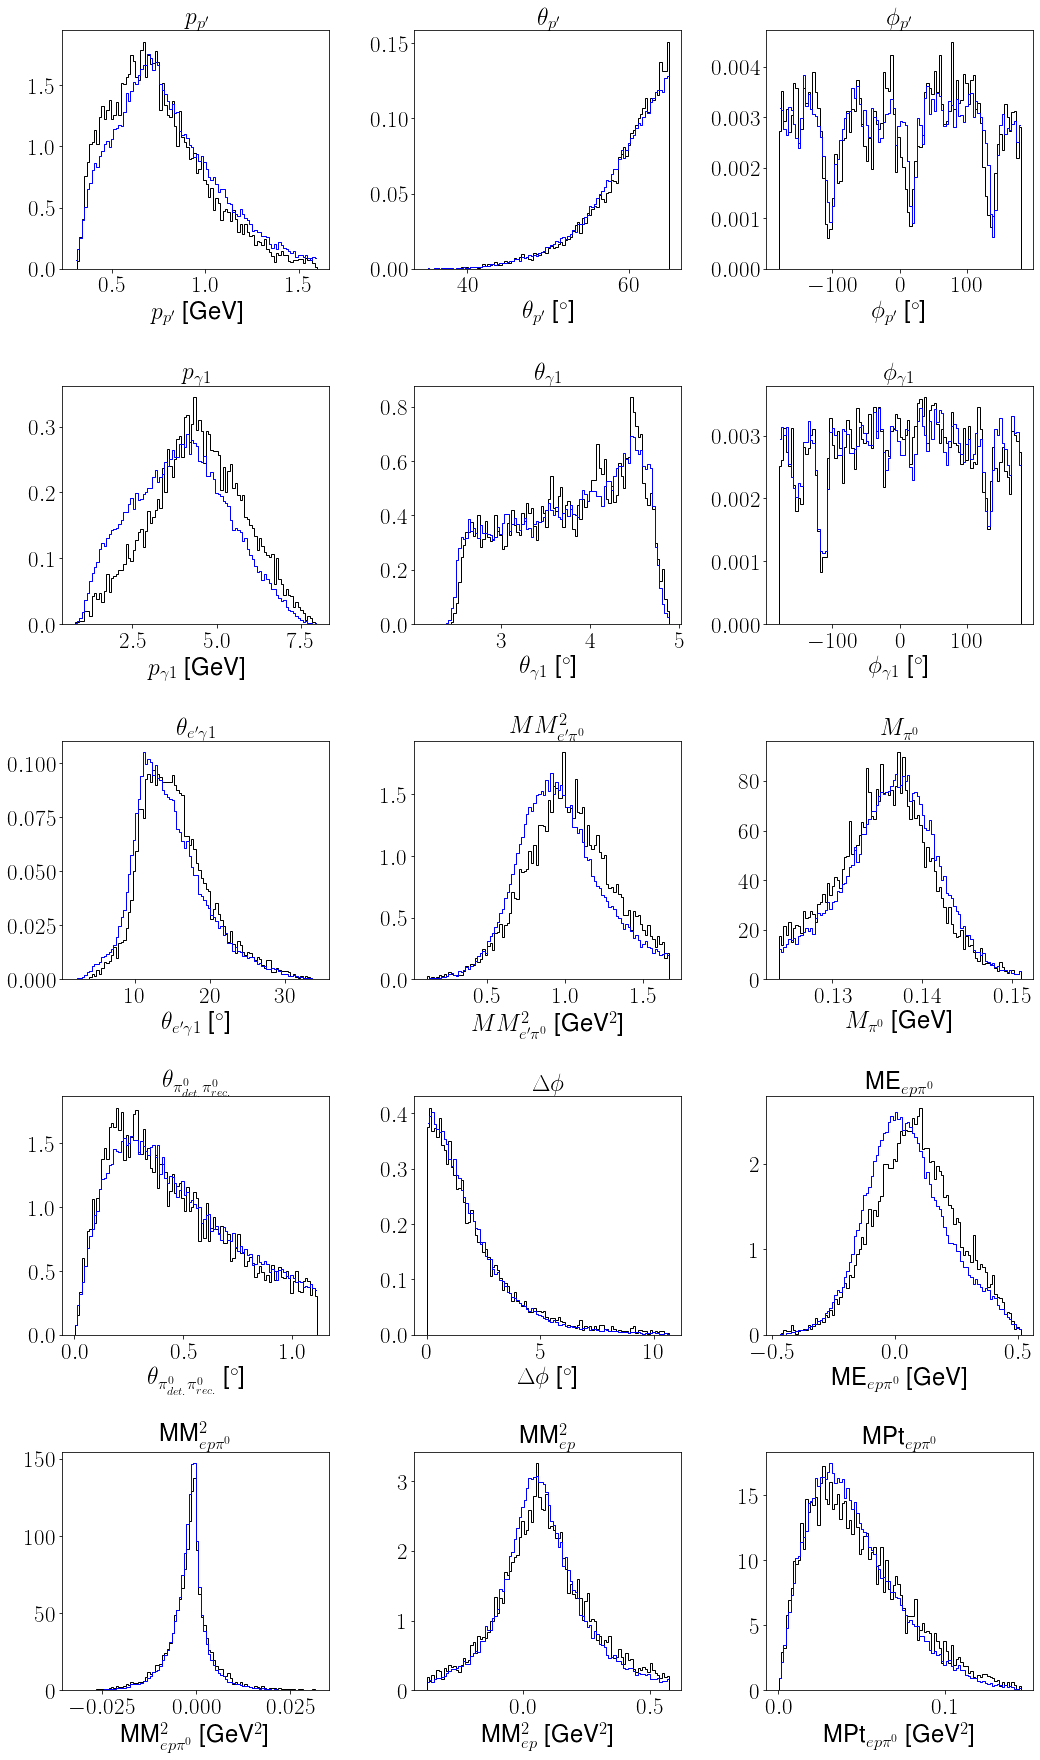

<Figure size 432x288 with 0 Axes>

In [215]:
varstoplot = ["Pp", "Ptheta", "Pphi","Gp", "Gtheta", "Gphi",  "coneAngle1", "MM2_egg", "Mpi0", "reconPi", "coplanarity", "ME_epgg", "MM2_epgg", "MM2_ep", "MPt"]
title = [r"$p_{p'}$", r"$\theta_{p'}$", r"$\phi_{p'}$", r"$p_{\gamma 1}$", r"$\theta_{\gamma 1}$", r"$\phi_{\gamma 1}$", r"$\theta_{e'\gamma 1}$", r"$MM^2_{e'\pi^0}$", r"$M_{\pi^0}$", r"$\theta_{\pi^0_{det.}\pi^0_{rec.}}$", r"$\Delta\phi$" , "ME"+r"${}_{ep\pi^0}$", "MM"+r"${}^{2}_{ep\pi^0}$", "MM"+r"${}^{2}_{ep}$", "MPt"+r"${}_{ep\pi^0}$"]
unit = [GeV, degree, degree, GeV, degree, degree, degree, GeV2, GeV, degree, degree, GeV, GeV2, GeV2, GeV2, GeV2, GeV2, GeVc]
# binstarts = [PpMin, 0, -180, 0, 0, 0, -0.5, -0.01, 0.1, 0]
# binends = [PpMax, 7, 180, 30, 0.8, .1, 1.2, 0.01, 1.7, 10]

fig, axs = plt.subplots(5, 3, figsize = (15,25))
for yind in range(0, 5):
    for xind in range(0, 3):
        ind = 3*yind + xind
        if varstoplot[ind]:
            pass
        else:
            continue
        simDist, bins = np.histogram(pi0SimOutbCDFT[varstoplot[ind]], 100, density = True)
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        axs[yind, xind].step(bincenters, simDist, where='mid',color='b', linewidth=1)
        axs[yind, xind].hist(pi0ExpOutbCDFT[varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', density=True, linewidth=1)
        axs[yind, xind].set_title(title[ind])
        # axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
plt.tight_layout()
plt.show()
plt.clf()

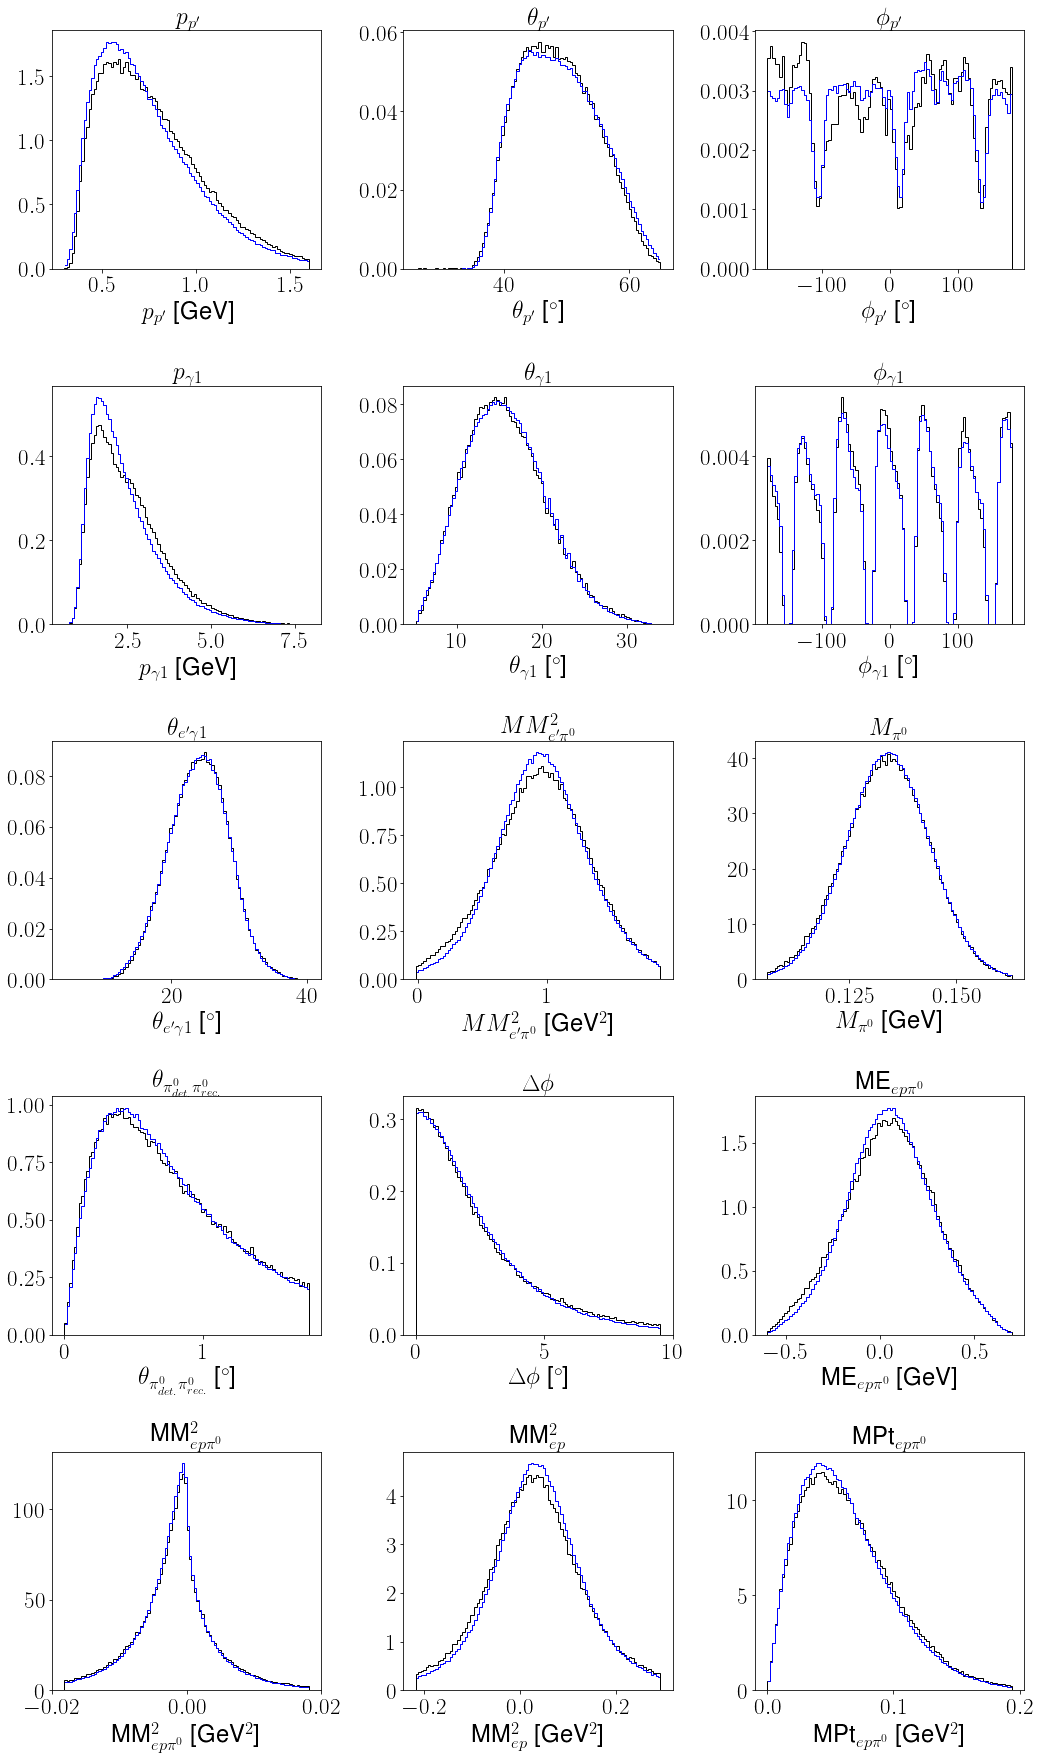

<Figure size 432x288 with 0 Axes>

In [216]:
varstoplot = ["Pp", "Ptheta", "Pphi","Gp", "Gtheta", "Gphi",  "coneAngle1", "MM2_egg", "Mpi0", "reconPi", "coplanarity", "ME_epgg", "MM2_epgg", "MM2_ep", "MPt"]
title = [r"$p_{p'}$", r"$\theta_{p'}$", r"$\phi_{p'}$", r"$p_{\gamma 1}$", r"$\theta_{\gamma 1}$", r"$\phi_{\gamma 1}$", r"$\theta_{e'\gamma 1}$", r"$MM^2_{e'\pi^0}$", r"$M_{\pi^0}$", r"$\theta_{\pi^0_{det.}\pi^0_{rec.}}$", r"$\Delta\phi$" , "ME"+r"${}_{ep\pi^0}$", "MM"+r"${}^{2}_{ep\pi^0}$", "MM"+r"${}^{2}_{ep}$", "MPt"+r"${}_{ep\pi^0}$"]
unit = [GeV, degree, degree, GeV, degree, degree, degree, GeV2, GeV, degree, degree, GeV, GeV2, GeV2, GeV2, GeV2, GeV2, GeVc]
# binstarts = [PpMin, 0, -180, 0, 0, 0, -0.5, -0.01, 0.1, 0]
# binends = [PpMax, 7, 180, 30, 0.8, .1, 1.2, 0.01, 1.7, 10]

fig, axs = plt.subplots(5, 3, figsize = (15,25))
for yind in range(0, 5):
    for xind in range(0, 3):
        ind = 3*yind + xind
        if varstoplot[ind]:
            pass
        else:
            continue
        simDist, bins = np.histogram(pi0SimOutbCD[varstoplot[ind]], 100, density = True)
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        axs[yind, xind].step(bincenters, simDist, where='mid',color='b', linewidth=1)
        axs[yind, xind].hist(pi0ExpOutbCD[varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', density=True, linewidth=1)
        axs[yind, xind].set_title(title[ind])
        # axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
plt.tight_layout()
plt.show()
plt.clf()

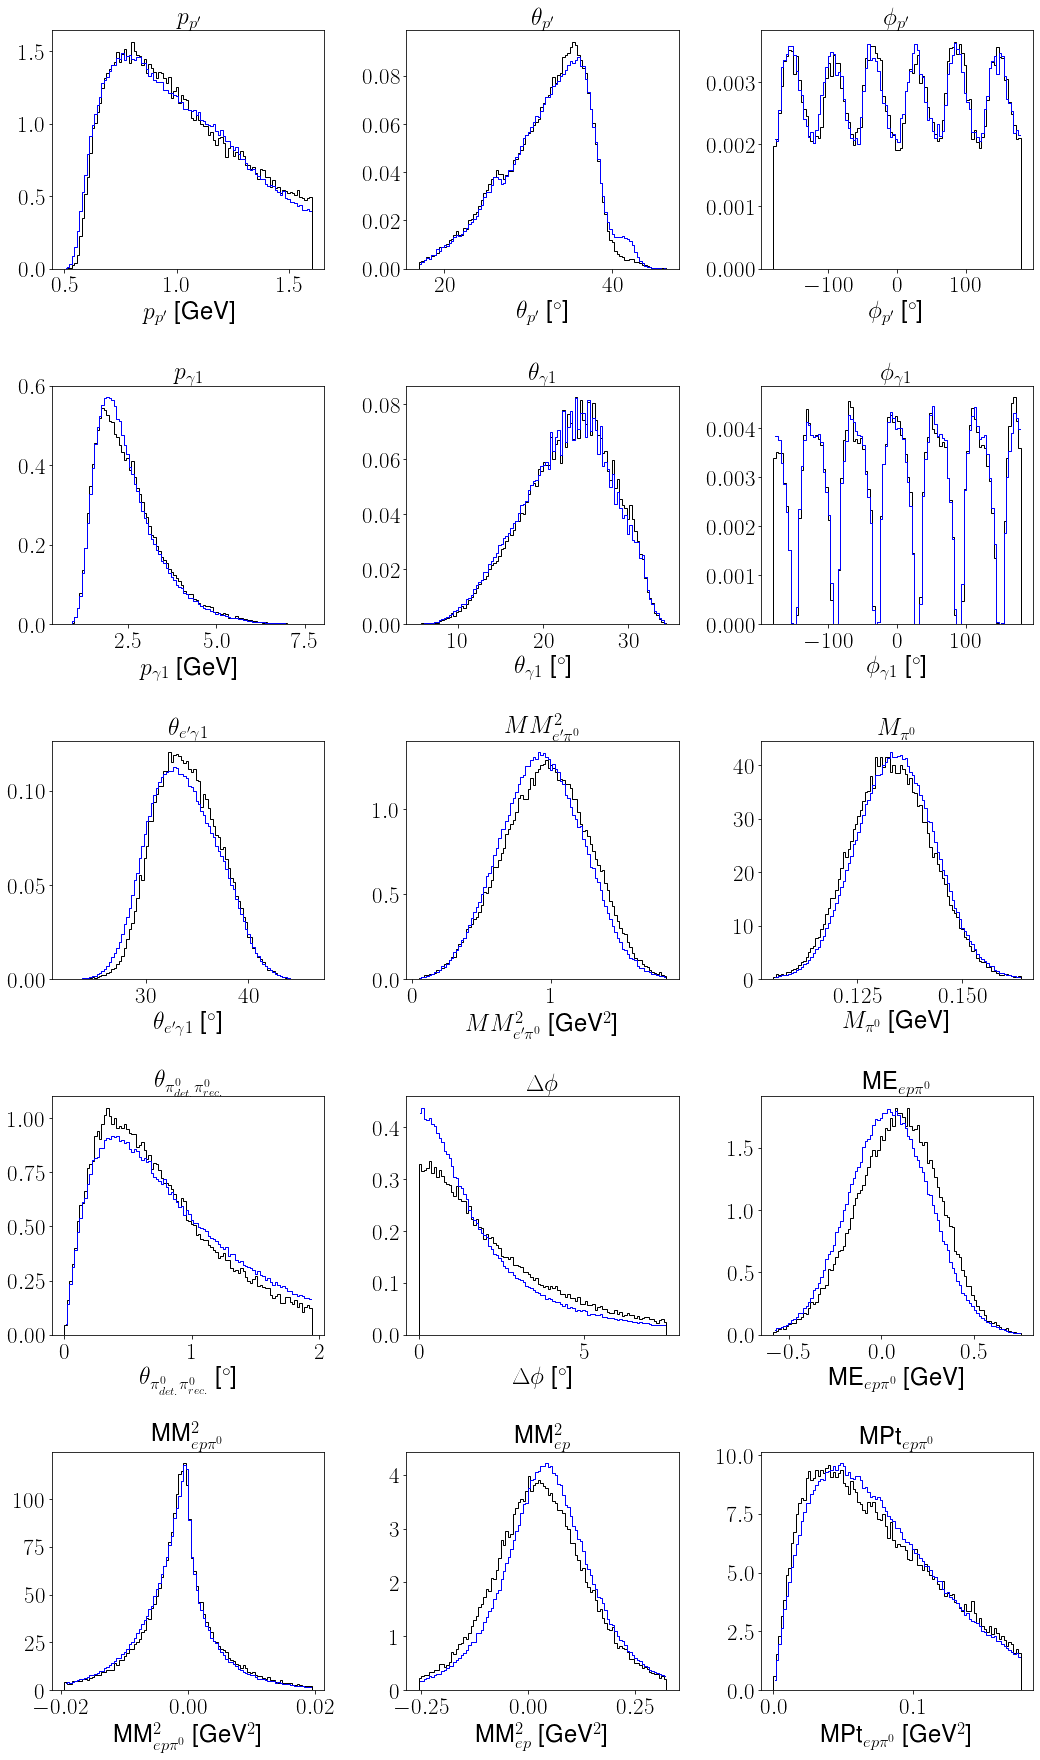

<Figure size 432x288 with 0 Axes>

In [217]:
varstoplot = ["Pp", "Ptheta", "Pphi","Gp", "Gtheta", "Gphi",  "coneAngle1", "MM2_egg", "Mpi0", "reconPi", "coplanarity", "ME_epgg", "MM2_epgg", "MM2_ep", "MPt"]
title = [r"$p_{p'}$", r"$\theta_{p'}$", r"$\phi_{p'}$", r"$p_{\gamma 1}$", r"$\theta_{\gamma 1}$", r"$\phi_{\gamma 1}$", r"$\theta_{e'\gamma 1}$", r"$MM^2_{e'\pi^0}$", r"$M_{\pi^0}$", r"$\theta_{\pi^0_{det.}\pi^0_{rec.}}$", r"$\Delta\phi$" , "ME"+r"${}_{ep\pi^0}$", "MM"+r"${}^{2}_{ep\pi^0}$", "MM"+r"${}^{2}_{ep}$", "MPt"+r"${}_{ep\pi^0}$"]
unit = [GeV, degree, degree, GeV, degree, degree, degree, GeV2, GeV, degree, degree, GeV, GeV2, GeV2, GeV2, GeV2, GeV2, GeVc]
# binstarts = [PpMin, 0, -180, 0, 0, 0, -0.5, -0.01, 0.1, 0]
# binends = [PpMax, 7, 180, 30, 0.8, .1, 1.2, 0.01, 1.7, 10]

fig, axs = plt.subplots(5, 3, figsize = (15,25))
for yind in range(0, 5):
    for xind in range(0, 3):
        ind = 3*yind + xind
        if varstoplot[ind]:
            pass
        else:
            continue
        simDist, bins = np.histogram(pi0SimOutbFD[varstoplot[ind]], 100, density = True)
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        axs[yind, xind].step(bincenters, simDist, where='mid',color='b', linewidth=1)
        axs[yind, xind].hist(pi0ExpOutbFD[varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', density=True, linewidth=1)
        axs[yind, xind].set_title(title[ind])
        # axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
plt.tight_layout()
plt.show()
plt.clf()

In [225]:
print(contInbCDFT, contInbCD, contInbFD, contOutbCDFT, contOutbCD, contOutbFD)

0.0040597266707579184 0.13554782386935704 0.3804839519140771 0.005652963491001403 0.21805902894791315 0.5115950737954632


In [34]:
dvcsSimOutbCD.Pphi.max()%360

183.30136226199102

In [36]:
-180%360

180

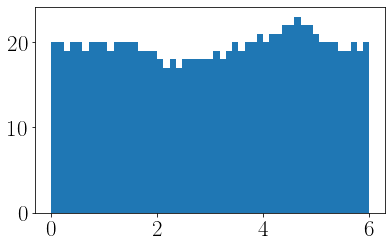

In [271]:
x = np.linspace(0, 6, 1001)
FD_phot_corr_marginal = -0.05*(x-2)*(x-5)/(1+np.exp((x-5)/0.25))/(1+np.exp(-(x-2)/0.25))#(0.1-0.1/5*x)*x/(1+np.exp((x-5)/0.25))#np.where(0.1 - 0.1/5*x>0, 0.1-0.1/5*x, 0)*x#np.where(-(x-2)*(x-5)>0, -0.05*(x-2)*(x-5), 0)
plt.hist(x + FD_phot_corr_marginal, bins = 51)

plt.show()

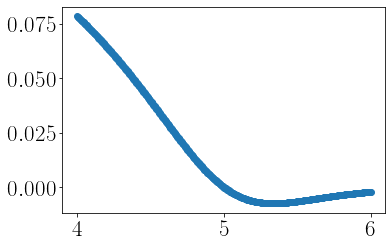

In [221]:
plt.scatter(x, FD_phot_corr_marginal)

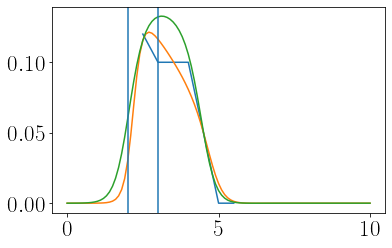

In [606]:
GeCenters2 = np.array([2.5, 3, 3.5, 4, 4.5, 5, 5.5])
additional2 = np.array([0.12, 0.1, 0.1, 0.1, 0.05, 0, 0])
plt.plot(GeCenters2, additional2)
x= np.linspace(0, 10, 101)
# plt.plot(x, (0.1-0.1/5*x)*x/(1+np.exp((x-5)/0.25)))
# plt.plot(x, -0.05*(x-2)*(x-5)/(1+np.exp((x-5)/0.25))/(1+np.exp(-(x-2)/0.25)))
plt.plot(x, -0.003*(x+10)*(x-6)/(1+np.exp((x-4.8)/0.25))/(1+np.exp(-(x-2.2)/0.15)))
plt.plot(x, -0.015*x*(x-6)/(1+np.exp((x-4.5)/0.25))/(1+np.exp(-(x-2)/0.25)))
plt.axvline(2)
plt.axvline(3)
# plt.plot(x, 1/(1+np.exp(2*(x-5))))

In [72]:
(np.log(0.12/2.5)-np.log(0.05/5))/(np.log(2.5)-np.log(5))

-2.2630344058337934

In [252]:
df_protonRec = copy(pi0ExpInbCD)
df_protonRec.loc[:, "Pphi"] = np.where(df_protonRec.loc[:, "Pphi"]%360<180, df_protonRec.loc[:, "Pphi"]%360, df_protonRec.loc[:, "Pphi"]%360-360)


In [254]:
df_protonRec.Pphi - pi0ExpInbCD.Pphi

4          0.000000e+00
25         7.105427e-15
288        0.000000e+00
401        0.000000e+00
453        0.000000e+00
               ...     
4916477    1.421085e-14
4916596    0.000000e+00
4916695    0.000000e+00
4916766    0.000000e+00
4916850    0.000000e+00
Name: Pphi, Length: 46147, dtype: float64

0.1311228410893906

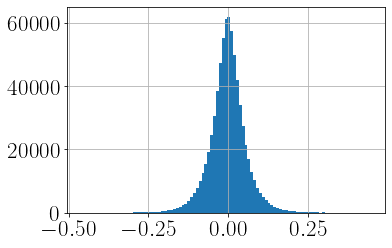

In [291]:
(dvcsSimInb.t1 - dvcsSimInb.Gent2).hist(bins = 101)
((dvcsSimInb.t1 - dvcsSimInb.Gent2)/dvcsSimInb.t1).std()

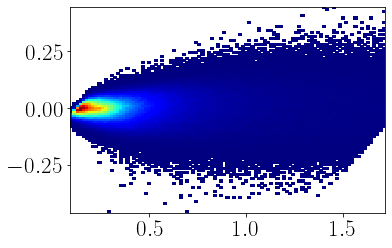

In [294]:
plt.hist2d(dvcsSimInb.t1, (dvcsSimInb.t1-dvcsSimInb.Gent2), bins = 101, cmap = cmap, cmin = 1)
plt.show()

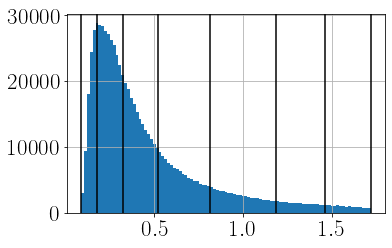

In [369]:
dvcsSimInb.t1.hist(bins = 101)
tbin0 = 0.088#2*M*(np.sqrt(0.3**2+M**2)-M)
tbin1 = 0.168#2*M*(np.sqrt(0.42**2+M**2)-M)
tbin2 = 0.234#2*M*(np.sqrt(0.5**2+M**2)-M)
tbin3 = 0.414#2*M*(np.sqrt(0.68**2+M**2)-M)
tbin4 = 0.553#2*M*(np.sqrt(0.8**2+M**2)-M)
for tbin in tbins:
    plt.axvline(tbin, color = 'k')

In [368]:
tbins = [0.088, 0.177, 0.321, 0.523, 0.813, 1.187, 1.46, 1.72]
for i in range(len(tbins)-1):
    df = dvcsSimInb.loc[(dvcsSimInb.t1<tbins[i+1]) & (dvcsSimInb.t1>tbins[i])]
    df_true = df.loc[(df.Gent2<tbins[i+1]) & (df.Gent2>tbins[i])]
    print(tbins[i], tbins[i+1], len(df_true)/len(df), len(df)/len(dvcsSimInb))

for i in range(len(tbins)-1):
    df = dvcsSimOutb.loc[(dvcsSimOutb.t1<tbins[i+1]) & (dvcsSimOutb.t1>tbins[i])]
    df_true = df.loc[(df.Gent2<tbins[i+1]) & (df.Gent2>tbins[i])]
    print(tbins[i], tbins[i+1], len(df_true)/len(df), len(df)/len(dvcsSimOutb))

0.088 0.177 0.8040952537903757 0.13484350803119421
0.177 0.321 0.8128633845942134 0.32296442385816765
0.321 0.523 0.8066834173617106 0.2526135235171978
0.523 0.813 0.8004020967786356 0.15128922715814475
0.813 1.187 0.7984381178331357 0.0842994145873987
1.187 1.46 0.7014522821576763 0.033471989777848765
1.46 1.72 0.7017472572125152 0.020508190915340865
0.088 0.177 0.8065555683003698 0.13436575497392036
0.177 0.321 0.8019726129916362 0.29027482886954453
0.321 0.523 0.8009366980196982 0.24508259104022803
0.523 0.813 0.8000132254722596 0.1664774391089694
0.813 1.187 0.7995023397459704 0.09880687560226838
1.187 1.46 0.7032933154401364 0.04046949962460286
1.46 1.72 0.7102000479156684 0.024506864666946043


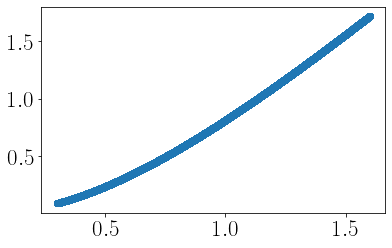

In [297]:
plt.scatter(dvcsSimInb.Pp, dvcsSimInb.t1)
plt.show()

In [371]:
tbins = [0.088, 0.177, 0.321, 0.523, 0.813, 1.187, 1.46, 1.72]
for i in range(len(tbins)-1):
    df = epgExpInb.loc[(epgExpInb.t1<tbins[i+1]) & (epgExpInb.t1>tbins[i])]
    print(tbins[i], tbins[i+1], len(df), len(df)/len(epgExpInb))

for i in range(len(tbins)-1):
    df = epgExpOutb.loc[(epgExpOutb.t1<tbins[i+1]) & (epgExpOutb.t1>tbins[i])]
    print(tbins[i], tbins[i+1], len(df), len(df)/len(epgExpOutb))

0.088 0.177 56925 0.1491803923110185
0.177 0.321 128038 0.3355425396700604
0.321 0.523 97436 0.25534546693397275
0.523 0.813 58404 0.1530563308306144
0.813 1.187 27727 0.07266270948805639
1.187 1.46 8562 0.022437988914658594
1.46 1.72 4492 0.011771951203532634
0.088 0.177 97107 0.14495074865919028
0.177 0.321 202080 0.30164300502589075
0.321 0.523 170364 0.25430081605419064
0.523 0.813 117292 0.17508071726789773
0.813 1.187 56336 0.08409224233540469
1.187 1.46 17489 0.02610567356936759
1.46 1.72 9263 0.013826797088058323


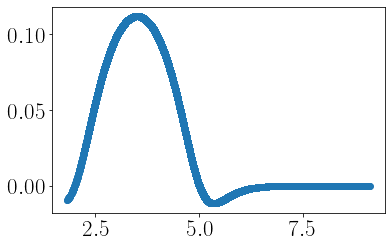

In [392]:
df_gammaRec = epgExpInbCD
plt.scatter(df_gammaRec.Gp,-0.05*(df_gammaRec.loc[df_gammaRec.Gsector<7, "Gp"]-2)*(df_gammaRec.loc[df_gammaRec.Gsector<7, "Gp"]-5)/(1+np.exp((df_gammaRec.loc[df_gammaRec.Gsector<7, "Gp"]-5)/0.25))/(1+np.exp(-(df_gammaRec.loc[df_gammaRec.Gsector<7, "Gp"]-2)/0.25)))

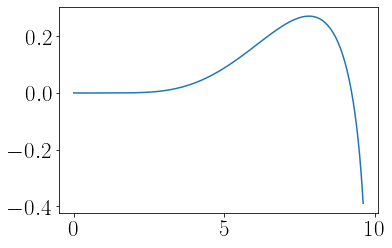

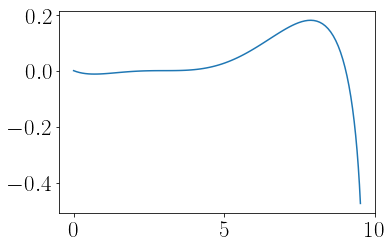

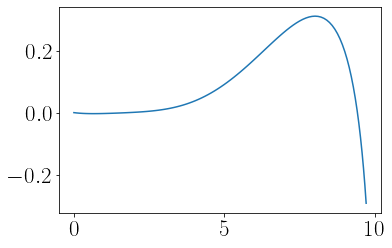

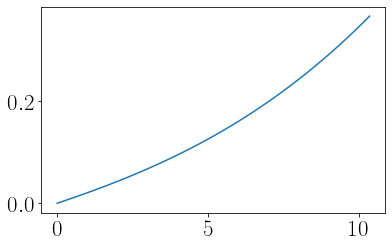

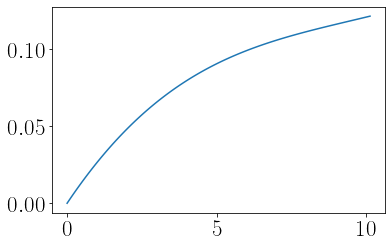

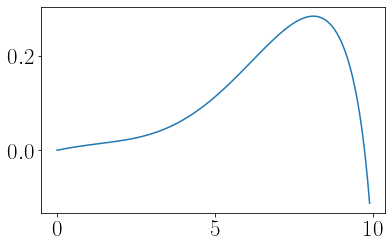

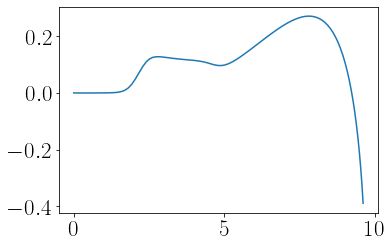

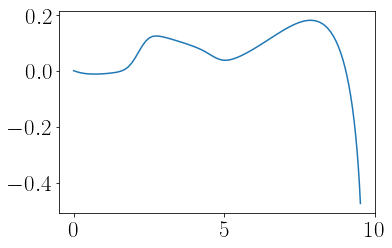

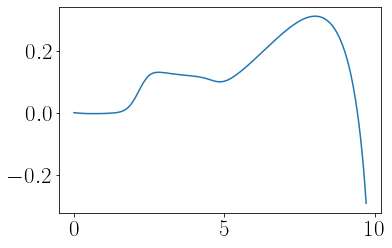

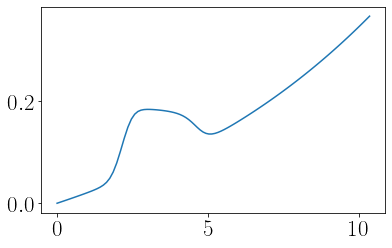

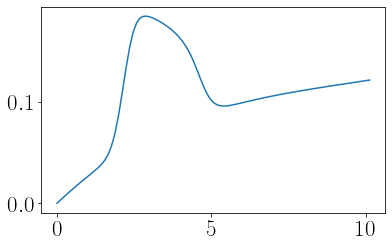

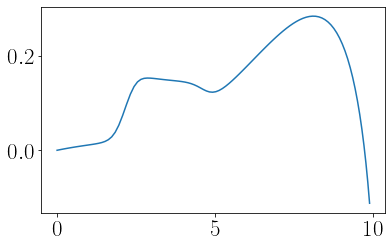

In [46]:
def cubic(args, x):
    a, b, c = args
    return a*x**3 + b*x**2 + c*x

def quintic(args, x):
    a, b, c = args
    if b < 0:
        return 0*x
    return a*x*(x-b)**3 * (x-c)

for pol in ["inbending", "outbending"]:
    for sector in range(1, 7):
        x = np.linspace(0, 10, 101)
        args = [[-0.0000732, 1.480, 9.344], [-0.000135, 3.070, 9.248], [-0.0000437, 0.719, 9.873], [-0.0000428, 0.00234, 0.0103], [0.000250, -0.00314, 0.0232], [-0.0000454, 0.517, 9.447]]
        funcs = [quintic, quintic, quintic, cubic, cubic, quintic]
#         cond = df_gammaRec.Gsector == sector
        FD_phot_corr_sector = funcs[sector-1](args[sector-1], x)
        x = x + FD_phot_corr_sector

        funcs_minor = [quintic, quintic, quintic, cubic, cubic, cubic]
        args_minor = [[-0.0000168, 0.821, 8.894], [-0.0000340, 2.720, 8.419], [-0.0000620, 2.793, 8.865], [ 0.000132, -0.00162,  0.00978], [-0.000135,  0.000282, 0.00650], [ 0.000263,  -0.00293,   0.0139]]
        FD_phot_corr_minor_sector = funcs_minor[sector-1](args_minor[sector-1], x)
        x = x + FD_phot_corr_minor_sector

        if pol == "outbending":
            FD_phot_corr_marginal =-0.003*(x+10)*(x-6)/(1+np.exp((x-4.7)/0.25))/(1+np.exp(-(x-2.1)/0.15))
            x = x + FD_phot_corr_marginal
        plt.plot(x, x-np.linspace(0, 10, 101))
        plt.show()

In [47]:
GeEdges = [2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6, 7.5, 8, 8.5]
correction_marginal1 = [0.06220116064178541, 0.053799135907596884, 0.045743474150215985, 0.05065682015244763, 0.04561158926969372, 0.018364449446530096, 0.01248180318551613, -0.02761274502105225, 0.002431693642639822, 0.07820993654413685, 0.08322616506984629]
correction_marginal2 = [0.07822456246856171, 0.0682509637663557, 0.10059451392259952, 0.1122465542515626, 0.09496159067035173, 0.09138113576038072, 0.0498823910812906, 0.02954794934056163, 0.0037509792225981844, -0.03596011777999886, -0.054094158307529866]
correction_marginal3 = [0.07568928210773807, 0.07405024040567437, 0.09030088983592727, 0.07956200217133894, 0.07999838576450925, 0.02240652892880174, 0.012988594977669549, 0.0494311628407037, 0.045259494863223323, 0.050101875459654555, 0.04795896190159418]
correction_marginal4 = [0.041819324653269235, 0.018608844230526583, 0.025043600577106945, 0.04035336546581561, 0.0525148612747498, 0.055348307528186674, 0.0354577257968023, 0.05404839959517614, 0.0998531905475121, 0.10884522947335841, 0.174270941944343]
correction_marginal5 = [0.05893613603570519, 0.038761251472025, 0.05714322875022851, 0.07612224988246022, 0.11472018468133885, 0.11346023011047325, 0.11953194034882181, 0.0814846141651715, 0.09598656922960479, 0.10342518098265752, 0.018979096851833244]
correction_marginal6 = [0.07919370553931679, 0.063040308865491, 0.07465979548933405, 0.09468932237975507, 0.09894189091908998, 0.08738015248469058, 0.0811012232919908, 0.053358146977321635, 0.1058456320359202, 0.024226003089899403, -0.017171685821509464]
GeCenters = (np.array(GeEdges)[:-1] + np.array(GeEdges[1:]))/2

In [48]:
correction_marginals = [correction_marginal1, correction_marginal2, correction_marginal3, correction_marginal4, correction_marginal5, correction_marginal6]

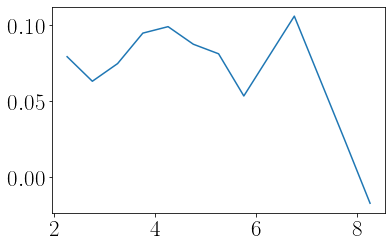

In [49]:
# plt.plot(GeCenters, correction_marginal1)
# plt.plot(GeCenters, correction_marginal2)
# plt.plot(GeCenters, correction_marginal3)
# plt.plot(GeCenters, correction_marginal4)
# plt.plot(GeCenters, correction_marginal5)
plt.plot(GeCenters, correction_marginal6)

[-7.32e-05, 1.48, 9.344]
1 [-0.00117979  0.01754946 -0.07815969  0.13629159]


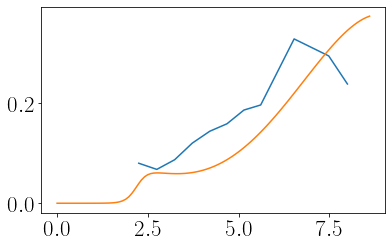

[-0.000135, 3.07, 9.248]
2 [-0.00102148  0.01623266 -0.0801932   0.14658937]


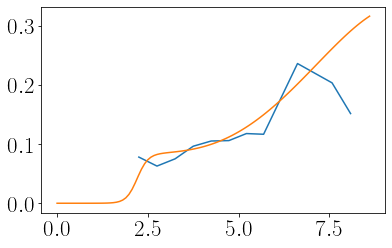

[-4.37e-05, 0.719, 9.873]
3 [-0.00117453  0.01776242 -0.08002151  0.1404476 ]


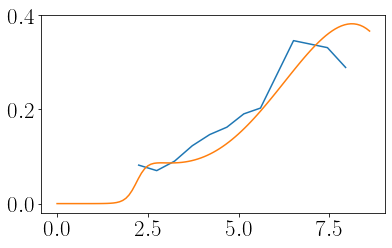

[-4.28e-05, 0.00234, 0.0103]
4 [-0.00044713  0.00682591 -0.03560256  0.10661684]


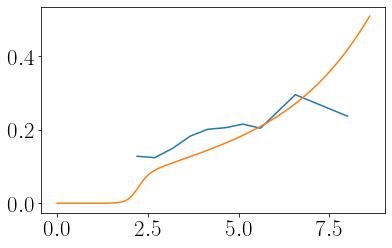

[0.00025, -0.00314, 0.0232]
5 [-0.00041019  0.00639728 -0.03749321  0.11433873]


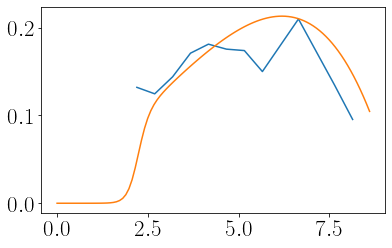

[-4.54e-05, 0.517, 9.447]
6 [-0.00090448  0.01348159 -0.0614906   0.1251917 ]


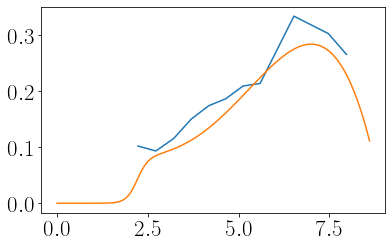

In [62]:
def cubic(args, x):
    a, b, c = args
    return a*x**3 + b*x**2 + c*x

def quintic(args, x):
    a, b, c = args
    if b < 0:
        return 0*x
    return a*x*(x-b)**3 * (x-c)	
# finalargs = [[-0.000615,  0.0113, -0.0600,   0.115],[-0.000179,  0.00337, -0.0224,  0.0710],[-0.000911,  0.0157, -0.0806,  0.154],[ 0.000117, -0.000905,  0.00215,  0.0331],[-0.000119,  0.000979, -0.00400,  0.0499],[-0.000904,  0.0135, -0.0615,  0.125]]
finalargs = [[-0.000615,  0.0113, -0.0600,   0.115],[-0.000334,  0.00656, -0.0383,  0.0934],[-0.000911,  0.0157, -0.0806,  0.154],[ 0.000117, -0.000905,  0.00215,  0.0331],[-0.000119,  0.000979, -0.00400,  0.0499],[-0.000893,  0.0131, -0.0580,  0.111]]
for sector in [1,2,3,4,5,6]:
    x = np.linspace(1.5, 8.604, 10001)
    args = [[-0.0000732, 1.480, 9.344], [-0.000135, 3.070, 9.248], [-0.0000437, 0.719, 9.873], [-0.0000428, 0.00234, 0.0103], [0.000250, -0.00314, 0.0232], [-0.0000454, 0.517, 9.447]]
    funcs = [quintic, quintic, quintic, cubic, cubic, quintic]
    FD_phot_corr_sector = funcs[sector-1](args[sector-1], x)
    x = x + FD_phot_corr_sector

    funcs_minor = [quintic, quintic, quintic, cubic, cubic, cubic]
    args_minor = [[-0.0000168, 0.821, 8.894], [-0.0000340, 2.720, 8.419], [-0.0000620, 2.793, 8.865], [ 0.000132, -0.00162,  0.00978], [-0.000135,  0.000282, 0.00650], [ 0.000263,  -0.00293,   0.0139]]
    FD_phot_corr_minor_sector = funcs_minor[sector-1](args_minor[sector-1], x)
#     args_minor = [[-0.0000168, 0.821, 8.894], [-0.000135, 3.070, 9.248], [-0.0000620, 2.793, 8.865], [ 0.000132, -0.00162,  0.00978], [-0.000135,  0.000282, 0.00650], [ 0.000263,  -0.00293,   0.0139]]
#     FD_phot_corr_minor_sector = funcs[sector-1](args_minor[sector-1], x)
    x = x + FD_phot_corr_minor_sector

    closests = x[closest(GeCenters, x)[0]]
    closests_ind = closest(GeCenters, x)[0]
    Ge_original = np.linspace(1.5, 8.604, 10001)[closests_ind]

#     Ge_corrected = closests + correction_marginals[sector-1]
    plt.plot(Ge_original, Ge_corrected - Ge_original)
    
    res_lsq = least_squares(lstsq_quartic, [1,1,1,1], args=(Ge_original, Ge_corrected - Ge_original))
    a = np.linspace(0, 8.604, 101)
    print(args[sector-1])
#     plt.plot(a, quartic(res_lsq.x, a)/(1+np.exp(-(a-2.2)/0.15)))
    plt.plot(a, quartic(finalargs[sector-1], a)/(1+np.exp(-(a-2.2)/0.15)))
    print(sector, res_lsq.x)
    
    
    plt.show()

In [40]:
def quartic(args, x):
    a, b, c, d = args
    x = np.array(x)
    return a*x**4 + b*x**3 + c*x**2 + d*x**1

In [41]:
def lstsq_quartic(args, x, y):
    return quartic(args, x) - y

In [42]:
def closest(GeCenters, x):
    vals = []
    inds = []
    for GeCenter in GeCenters:
        ind = np.argmin(np.abs(x-GeCenter))
        val = x[ind]
        inds.append(ind)
        vals.append(val)
    return inds, vals

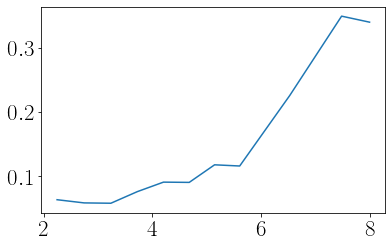

In [50]:
x[closest(GeCenters, x)[0]]

array([2.25002385, 2.750048  , 3.2498856 , 3.74964834, 4.24968962,
       4.75037655, 5.24962679, 5.74962129, 6.74998022, 7.75015581,
       8.25010792])

In [54]:
closest(GeCenters, x)[1]

[2.250023850241324,
 2.7500480047954077,
 3.249885604116611,
 3.749648339551364,
 4.249689623211368,
 4.75037654841454,
 5.249626789495679,
 5.749621290338929,
 6.749980221952922,
 7.7501558091778255,
 8.250107924078401]

In [51]:
np.linspace(1.5, 8.604, 10001)[closest(GeCenters, x)[0]]

array([2.2487616, 2.7453312, 3.2376384, 3.7242624, 4.2044928, 4.6783296,
       5.144352 , 5.606112 , 6.5267904, 7.4794368, 7.9937664])

array([1.50005834, 1.57508378, 1.65011897, 1.72516764, 1.80023388,
       1.87532212, 1.95043705, 2.02558368, 2.10076724, 2.17599319,
       2.2512672 , 2.32659509, 2.40198287, 2.47743664, 2.55296261,
       2.62856707, 2.70425637, 2.78003687, 2.85591492, 2.93189688,
       3.00798902, 3.08419757, 3.16052863, 3.23698818, 3.31358206,
       3.3903159 , 3.46719515, 3.544225  , 3.6214104 , 3.698756  ,
       3.77626613, 3.85394478, 3.93179555, 4.00982165, 4.08802586,
       4.16641048, 4.24497734, 4.32372772, 4.40266238, 4.48178146,
       4.56108452, 4.64057044, 4.72023746, 4.80008307, 4.88010406,
       4.96029643, 5.04065536, 5.12117523, 5.20184954, 5.28267087,
       5.36363092, 5.44472039, 5.52592902, 5.60724552, 5.68865756,
       5.77015175, 5.85171359, 5.93332745, 6.01497659, 6.09664307,
       6.17830778, 6.25995039, 6.34154936, 6.42308191, 6.50452402,
       6.5858504 , 6.66703452, 6.74804857, 6.82886347, 6.90944889,
       6.98977326, 7.06980373, 7.14950626, 7.22884559, 7.30778

In [111]:
df_gammaRec = epgExpInbCD
def quartic(args, x):
    a, b, c, d = args
    x = np.array(x)
    return a*x**4 + b*x**3 + c*x**2 + d*x**1
args_phot_FD = [[-0.000615,  0.0113, -0.0600,   0.115],[-0.000334,  0.00656, -0.0383,  0.0934],[-0.000911,  0.0157, -0.0806,  0.154],[ 0.000117, -0.000905,  0.00215,  0.0331],[-0.000119,  0.000979, -0.00400,  0.0499],[-0.000893,  0.0131, -0.0580,  0.111]]
for sector in range(1, 7):
    args = args_phot_FD[sector-1]
    cond = df_gammaRec.Gsector == sector
    FD_phot_corr_sector = quartic(args, df_gammaRec.loc[cond, "Gp"])/(1+np.exp(-(df_gammaRec.loc[cond, "Gp"]-2.2)/0.15))
    df_gammaRec.loc[cond, "Gp"] = df_gammaRec.loc[cond, "Gp"] + FD_phot_corr_sector


/usr/local/lib/python3.9/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
/usr/local/lib/python3.9/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
/usr/local/lib/python3.9/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_inde

In [176]:
pi0SimInbFD = pi0SimInbFD.loc[(pi0SimInbFD.Pp<0.8)&(pi0SimInbFD.Gp>3)]
pi0ExpInbFD = pi0ExpInbFD.loc[(pi0ExpInbFD.Pp<0.8)&(pi0ExpInbFD.Gp>3)]
pi0SimInbCD = pi0SimInbCD.loc[(pi0SimInbCD.Pp<0.8)&(pi0SimInbCD.Gp>3)]
pi0ExpInbCD = pi0ExpInbCD.loc[(pi0ExpInbCD.Pp<0.8)&(pi0ExpInbCD.Gp>3)]
pi0SimInbCDFT = pi0SimInbCDFT.loc[(pi0SimInbCDFT.Pp<0.8)&(pi0SimInbCDFT.Gp>3)]
pi0ExpInbCDFT = pi0ExpInbCDFT.loc[(pi0ExpInbCDFT.Pp<0.8)&(pi0ExpInbCDFT.Gp>3)]
pi0SimOutbFD = pi0SimOutbFD.loc[(pi0SimOutbFD.Pp<0.8)&(pi0SimOutbFD.Gp>3)]
pi0ExpOutbFD = pi0ExpOutbFD.loc[(pi0ExpOutbFD.Pp<0.8)&(pi0ExpOutbFD.Gp>3)]
pi0SimOutbCD = pi0SimOutbCD.loc[(pi0SimOutbCD.Pp<0.8)&(pi0SimOutbCD.Gp>3)]
pi0ExpOutbCD = pi0ExpOutbCD.loc[(pi0ExpOutbCD.Pp<0.8)&(pi0ExpOutbCD.Gp>3)]
pi0SimOutbCDFT = pi0SimOutbCDFT.loc[(pi0SimOutbCDFT.Pp<0.8)&(pi0SimOutbCDFT.Gp>3)]
pi0ExpOutbCDFT = pi0ExpOutbCDFT.loc[(pi0ExpOutbCDFT.Pp<0.8)&(pi0ExpOutbCDFT.Gp>3)]

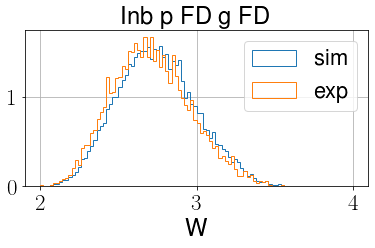

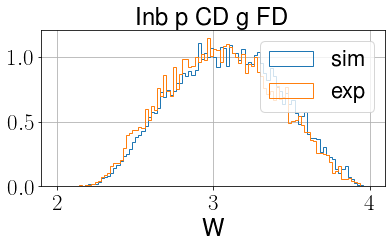

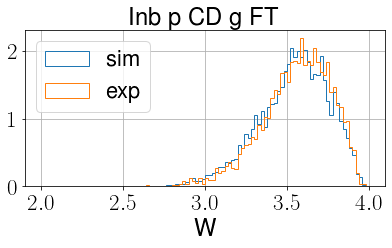

In [177]:
pi0SimInbFD.W.hist(bins = np.linspace(2, 4, 101), density = True, histtype = 'step', label = 'sim')
pi0ExpInbFD.W.hist(bins = np.linspace(2, 4, 101), density = True, histtype = 'step', label = 'exp')
plt.xlabel("W")
plt.title("Inb p FD g FD")
plt.legend()
plt.show()
pi0SimInbCD.W.hist(bins = np.linspace(2, 4, 101), density = True, histtype = 'step', label = 'sim')
pi0ExpInbCD.W.hist(bins = np.linspace(2, 4, 101), density = True, histtype = 'step', label = 'exp')
plt.xlabel("W")
plt.title("Inb p CD g FD")
plt.legend()
plt.show()
pi0SimInbCDFT.W.hist(bins = np.linspace(2, 4, 101), density = True, histtype = 'step', label = 'sim')
pi0ExpInbCDFT.W.hist(bins = np.linspace(2, 4, 101), density = True, histtype = 'step', label = 'exp')
plt.xlabel("W")
plt.title("Inb p CD g FT")
plt.legend(loc='upper left')
plt.show()

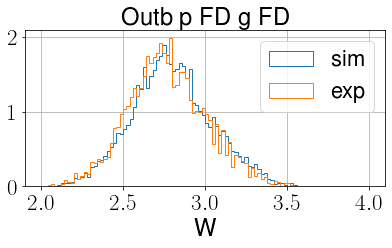

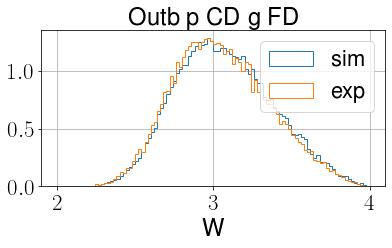

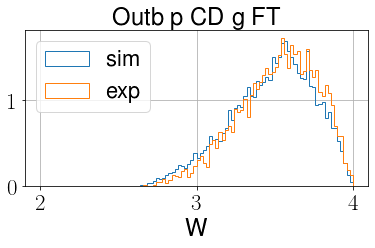

In [178]:
pi0SimOutbFD.W.hist(bins = np.linspace(2, 4, 101), density = True, histtype = 'step', label = 'sim')
pi0ExpOutbFD.W.hist(bins = np.linspace(2, 4, 101), density = True, histtype = 'step', label = 'exp')
plt.xlabel("W")
plt.title("Outb p FD g FD")
plt.legend()
plt.show()
pi0SimOutbCD.W.hist(bins = np.linspace(2, 4, 101), density = True, histtype = 'step', label = 'sim')
pi0ExpOutbCD.W.hist(bins = np.linspace(2, 4, 101), density = True, histtype = 'step', label = 'exp')
plt.xlabel("W")
plt.title("Outb p CD g FD")
plt.legend()
plt.show()
pi0SimOutbCDFT.W.hist(bins = np.linspace(2, 4, 101), density = True, histtype = 'step', label = 'sim')
pi0ExpOutbCDFT.W.hist(bins = np.linspace(2, 4, 101), density = True, histtype = 'step', label = 'exp')
plt.xlabel("W")
plt.title("Outb p CD g FT")
plt.legend(loc='upper left')
plt.show()

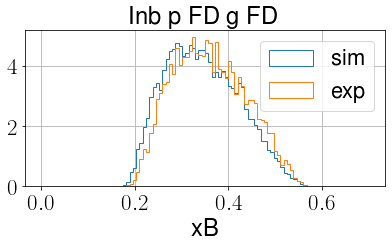

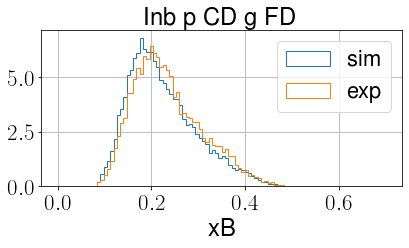

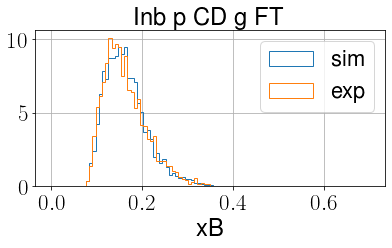

In [179]:
pi0SimInbFD.xB.hist(bins = np.linspace(0, 0.7, 101), density = True, histtype = 'step', label = 'sim')
pi0ExpInbFD.xB.hist(bins = np.linspace(0, 0.7, 101), density = True, histtype = 'step', label = 'exp')
plt.xlabel("xB")
plt.title("Inb p FD g FD")
plt.legend()
plt.show()
pi0SimInbCD.xB.hist(bins = np.linspace(0, 0.7, 101), density = True, histtype = 'step', label = 'sim')
pi0ExpInbCD.xB.hist(bins = np.linspace(0, 0.7, 101), density = True, histtype = 'step', label = 'exp')
plt.xlabel("xB")
plt.title("Inb p CD g FD")
plt.legend()
plt.show()
pi0SimInbCDFT.xB.hist(bins = np.linspace(0, 0.7, 101), density = True, histtype = 'step', label = 'sim')
pi0ExpInbCDFT.xB.hist(bins = np.linspace(0, 0.7, 101), density = True, histtype = 'step', label = 'exp')
plt.xlabel("xB")
plt.title("Inb p CD g FT")
plt.legend(loc='upper right')
plt.show()

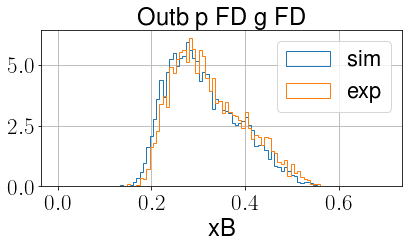

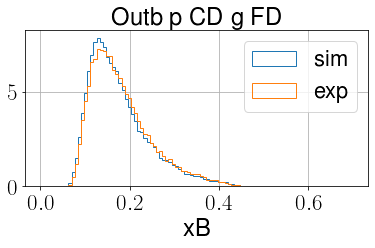

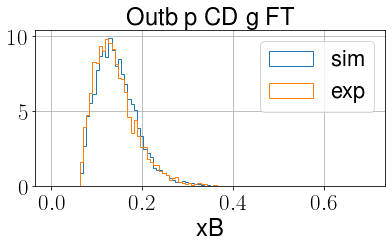

In [180]:
pi0SimOutbFD.xB.hist(bins = np.linspace(0, 0.7, 101), density = True, histtype = 'step', label = 'sim')
pi0ExpOutbFD.xB.hist(bins = np.linspace(0, 0.7, 101), density = True, histtype = 'step', label = 'exp')
plt.xlabel("xB")
plt.title("Outb p FD g FD")
plt.legend()
plt.show()
pi0SimOutbCD.xB.hist(bins = np.linspace(0, 0.7, 101), density = True, histtype = 'step', label = 'sim')
pi0ExpOutbCD.xB.hist(bins = np.linspace(0, 0.7, 101), density = True, histtype = 'step', label = 'exp')
plt.xlabel("xB")
plt.title("Outb p CD g FD")
plt.legend()
plt.show()
pi0SimOutbCDFT.xB.hist(bins = np.linspace(0, 0.7, 101), density = True, histtype = 'step', label = 'sim')
pi0ExpOutbCDFT.xB.hist(bins = np.linspace(0, 0.7, 101), density = True, histtype = 'step', label = 'exp')
plt.xlabel("xB")
plt.title("Outb p CD g FT")
plt.legend(loc='upper right')
plt.show()

In [83]:
# parent_MC = "/Volumes/Extreme SSD/Feb2022/SimtoDat/v4/inb/dvcs/"
# parent_epg = "/Volumes/Extreme SSD/Feb2022/SimtoDat/v4/inb/epg/"
# parent_MC_bkg1g = "/Volumes/Extreme SSD/Feb2022/SimtoDat/v4/inb/bkg_1g/"
# parent_MC_bkg2g = "/Volumes/Extreme SSD/Feb2022/SimtoDat/v4/inb/bkg_2g/"
# parent_exp = "/Volumes/Extreme SSD/Feb2022/SimtoDat/v4/inb/exp/"

parent_MC = "/Volumes/Extreme SSD/Feb2022/SimtoDat/v5/inb/dvcs/"
# parent_epg = "/Volumes/Extreme SSD/Feb2022/SimtoDat/v4/inb/epg/"
parent_MC_bkg1g = "/Volumes/Extreme SSD/Feb2022/SimtoDat/v5/inb/bkg_1g/"
parent_MC_bkg2g = "/Volumes/Extreme SSD/Feb2022/SimtoDat/v5/inb/bkg_2g/"
parent_exp = "/Volumes/Extreme SSD/Feb2022/SimtoDat/v5/inb/exp/"

# dvcsSimInb = pd.read_pickle(parent_MC + "4397.pkl")
# bkgSimInb = pd.read_pickle(parent_MC_bkg1g + "4076.pkl")
# # dvcsSimInb = pd.read_pickle(parent_epg + "3987_epg.pkl")
# # bkgSimInb = pd.read_pickle(parent_epg + "4076_epg.pkl")

# pi0SimInb = pd.read_pickle(parent_MC_bkg2g + "4076.pkl")
# epgExpInb = pd.read_pickle(parent_exp + "dvcs.pkl")
pi0ExpInb = pd.read_pickle(parent_exp + "pi0.pkl")

In [84]:
epgExpInbCDFT = epgExpInb.loc[epgExpInb.config == 3]
pi0ExpInbCDFT = pi0ExpInb.loc[pi0ExpInb.config == 3]
dvcsSimInbCDFT = dvcsSimInb.loc[dvcsSimInb.config == 3]
bkgSimInbCDFT = bkgSimInb.loc[bkgSimInb.config == 3]
pi0SimInbCDFT = pi0SimInb.loc[pi0SimInb.config == 3]

epgExpInbCD = epgExpInb.loc[epgExpInb.config == 2]
pi0ExpInbCD = pi0ExpInb.loc[pi0ExpInb.config == 2]
dvcsSimInbCD =  dvcsSimInb.loc[dvcsSimInb.config == 2]
bkgSimInbCD = bkgSimInb.loc[bkgSimInb.config == 2]
pi0SimInbCD = pi0SimInb.loc[pi0SimInb.config == 2]

epgExpInbFD = epgExpInb.loc[epgExpInb.config == 1]
pi0ExpInbFD = pi0ExpInb.loc[pi0ExpInb.config == 1]
dvcsSimInbFD =  dvcsSimInb.loc[dvcsSimInb.config == 1]
bkgSimInbFD = bkgSimInb.loc[bkgSimInb.config == 1]
pi0SimInbFD = pi0SimInb.loc[pi0SimInb.config == 1]

In [85]:
df3 = epgExpInbCDFT
df1 = dvcsSimInbCDFT
df2 = bkgSimInbCDFT
df4 = pi0ExpInbCDFT
df5 = pi0SimInbCDFT
contInbCDFT = len(df4)/len(df5) * len(df2)/len(df3)

coneAngle 22.417713608168786
reconGam 0.2624938937480064
coplanarity 1.692993076421629
ME_epg 0.011127524878171507
MM2_epg -0.0010914667694914208
MM2_eg 0.9017672687599492
MM2_ep -0.01589398410702398
MPt 0.039167211184398594


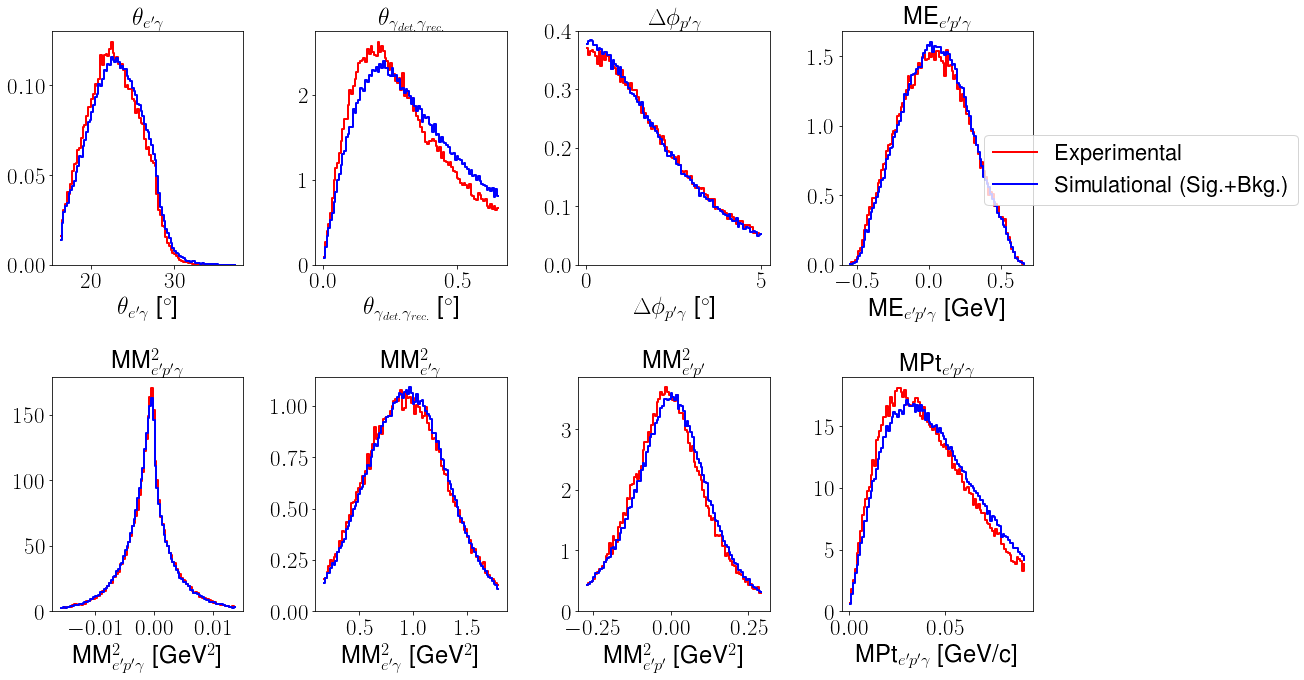

<Figure size 432x288 with 0 Axes>

In [94]:
varstoplot = ["coneAngle", "reconGam", "coplanarity", "ME_epg", "MM2_epg", "MM2_eg", "MM2_ep", "MPt"]
title = [r"$\theta_{e'\gamma}$", r"$\theta_{\gamma_{det.}\gamma_{rec.}}$", r"$\Delta\phi_{p'\gamma}$" , "ME"+r"${}_{e'p'\gamma}$", "MM"+r"${}^{2}_{e'p'\gamma}$", "MM"+r"${}^{2}_{e'\gamma}$", "MM"+r"${}^{2}_{e'p'}$", "MPt"+r"${}_{e'p'\gamma}$"]
unit = [degree, degree, degree, GeV, GeV2, GeV2, GeV2, GeVc]
binstarts = [10, 0, 0, -0.5, -0.01, 0.1,-0.4 , 0]
binends = [40, 2, 10, 1.2, 0.01, 1.7, 0.4, 0.2]
fig, axs = plt.subplots(2, 4, figsize = (15,10))
for yind in range(0, 2):
    for xind in range(0,4):
        ind = 4*yind + xind
        start = binstarts[ind]
        end = binends[ind]
        bins = 100#np.linspace(start, end, 101)
#         if ind == 2 :
#             bins = np.linspace(start, end, 101)
        simDist_dvpi0, bins = np.histogram(bkgSimInbCD[varstoplot[ind]], bins, density = True)
        simDist_dvcs, bins = np.histogram(dvcsSimInbCD[varstoplot[ind]], bins, density = True)
#         simDist = len_pi0ExpInbCDFT/len_pi0SimInbCDFT*simDist_dvpi0 + (len_epgExpInbCDFT/len_dvcsSimInbCDFT-len_bkgSimInbCDFT/len_pi0SimInbCDFT*len_pi0ExpInbCDFT/len_dvcsSimInbCDFT)*simDist_dvcs
        simDist = (1-contInbCD)*simDist_dvcs + contInbCD*simDist_dvpi0
        expDist, bins = np.histogram(epgExpInbCD[varstoplot[ind]], bins, density=True)
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        if ind == 0:
            axs[yind, xind].step(bincenters, expDist, where='mid',color='r', linewidth=2, label = 'Experimental')           
            axs[yind, xind].step(bincenters, simDist, where='mid',color='b', linewidth=2, label = 'Simulational (Sig.+Bkg.)')  
            axs[yind, xind].set_ylim(bottom = 0)
        else:
#             axs[yind, xind].step(epgExpInbCDFT[varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='r', density=True, linewidth=2)
            axs[yind, xind].step(bincenters, expDist, where='mid',color='r', linewidth=2)
            axs[yind, xind].step(bincenters, simDist, where='mid',color='b', linewidth=2)
#         axs[yind, xind].step(bincenters, c*simDist_dvpi0, where='mid',color='g', linewidth=1)
#         axs[yind, xind].step(bincenters, (1/len_dvcsSimInbCDFT-cont_inb_CDFT/len_dvcsSimInbCDFT)*len_epgExpInbCDFT*simDist_dvcs, where='mid',color='r', linewidth=1)
#         axs[yind, xind].hist(epgExpInbCDFT[varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', linewidth=1)
#         axs[yind, xind].step(bincenters, expDist - len_pi0ExpInbCDFT/len_pi0SimInbCDFT*simDist_dvpi0, where='mid',color='k', linewidth=1)
        print(varstoplot[ind], nphistmean(expDist - len(pi0ExpInbCDFT)/len(pi0SimInbCDFT)*simDist_dvpi0, bins))
#         axs[yind, xind].step(bincenters, (1-c)*simDist_dvcs, where='mid',color='r', linewidth=1)
        axs[yind, xind].set_title(title[ind])
        axs[yind, xind].set_ylim(bottom = 0)
#         axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
# axs[0,2].set_xticks([2.2, 2.7, 3.2])
# axs[1,0].set_xticks([0.29, 0.32, 0.35, 0.38])
# axs[1,1].set_xticks([0.23, 0.3, 0.39, 0.52])
# axs[1,2].set_xticks([0, 90, 180, 270, 360])
plt.tight_layout()
# plt.savefig("kineCDFT.pdf")
# plt.savefig("analysisnote/inbending1.pdf")
fig.legend(bbox_to_anchor = (1.23, 0.8), title = "")
plt.show()
plt.clf()

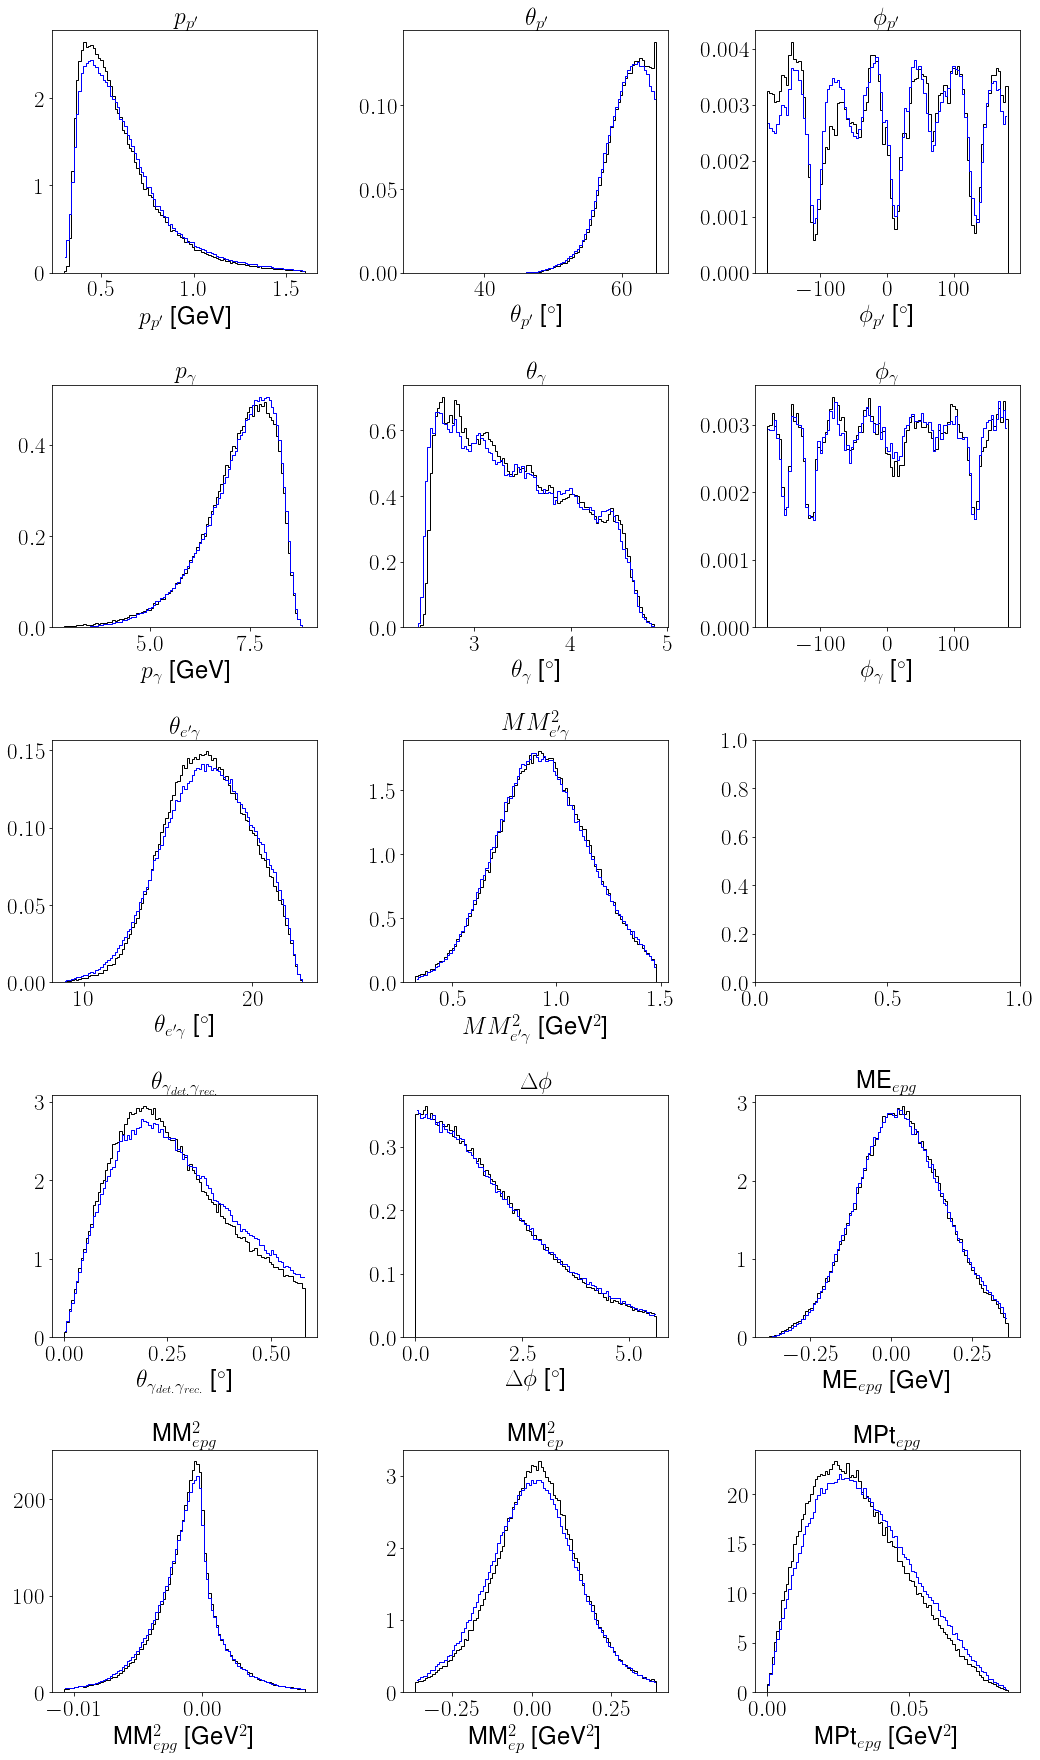

In [73]:
# for i in range(9):
PthetaMin = 0#PthetaEdges[i]
PthetaMax = 90#PthetaEdges[i+1]
varstoplot = ["Pp", "Ptheta", "Pphi","Gp", "Gtheta", "Gphi",  "coneAngle", "MM2_eg", "", "reconGam", "coplanarity", "ME_epg", "MM2_epg", "MM2_ep", "MPt"]
title = [r"$p_{p'}$", r"$\theta_{p'}$", r"$\phi_{p'}$", r"$p_{\gamma}$", r"$\theta_{\gamma}$", r"$\phi_{\gamma}$", r"$\theta_{e'\gamma}$", r"$MM^2_{e'\gamma}$", "", r"$\theta_{\gamma_{det.}\gamma_{rec.}}$", r"$\Delta\phi$" , "ME"+r"${}_{epg}$", "MM"+r"${}^{2}_{epg}$", "MM"+r"${}^{2}_{ep}$", "MPt"+r"${}_{epg}$"]
unit = [GeV, degree, degree, GeV, degree, degree, degree, GeV2,  "", degree, degree, GeV, GeV2, GeV2, GeV2, GeV2, GeV2, GeVc]
# binstarts = [PthetaMin, 0, -180, 0, 0, 0, -0.5, -0.01, 0.1, 0]
# binends = [GeMax, 7, 180, 30, 0.8, .1, 1.2, 0.01, 1.7, 10]
df3 = epgExpInbCDFT
df1 = dvcsSimInbCDFT
df2 = bkgSimInbCDFT
df4 = pi0ExpInbCDFT
df5 = pi0SimInbCDFT

# df1 = df1[df1.Pp<0.8]
# df2 = df2[df2.Pp<0.8]
# df3 = df3[df3.Pp<0.8]
# df4 = df4[df4.Pp<0.8]
# df5 = df5[df5.Pp<0.8]

contInb = len(df4)/len(df5) * len(df2)/len(df3)
contInbCDFT = contInb
fig, axs = plt.subplots(5, 3, figsize = (15,25))
for yind in range(0, 5):
    for xind in range(0, 3):
        ind = 3*yind + xind
        if varstoplot[ind]:
            pass
        else:
            continue
        if ind == 1:
            bins= np.linspace(30, 65, 101)
            simDist_dvcs, _ = np.histogram(df1.loc[(df1.Ptheta < PthetaMax) & (df1.Ptheta>PthetaMin), varstoplot[ind]], bins, density = True)
        else:
            simDist_dvcs, bins = np.histogram(df1.loc[(df1.Ptheta < PthetaMax) & (df1.Ptheta>PthetaMin), varstoplot[ind]], 100, density = True)
        simDist_dvpi0, _ = np.histogram(df2.loc[(df2.Ptheta < PthetaMax) & (df2.Ptheta>PthetaMin), varstoplot[ind]], bins, density = True)
        simDist = (1-contInb)*simDist_dvcs + contInb*simDist_dvpi0
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        axs[yind, xind].step(bincenters, simDist, where='mid',color='b', linewidth=1)
        axs[yind, xind].hist(df3.loc[(df3.Ptheta < PthetaMax) & (df3.Ptheta>PthetaMin),varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', density=True, linewidth=1)
        axs[yind, xind].set_title(title[ind])
        # axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
plt.tight_layout()
# plt.savefig(outDir+"InbCDFT{}_{:.3f}_{:.3f}_{:.3f}.pdf".format(i, sigma1, sigma2, sigma3))
# plt.savefig(outDir+"InbCDFT{}_{:.3f}_{:.3f}.pdf".format(i, sigma1, sigma2))
# plt.savefig(outDir+"InbCDFT{}_{:.3f}.pdf".format(i, sigma2))
plt.show()


0.1013792688791816


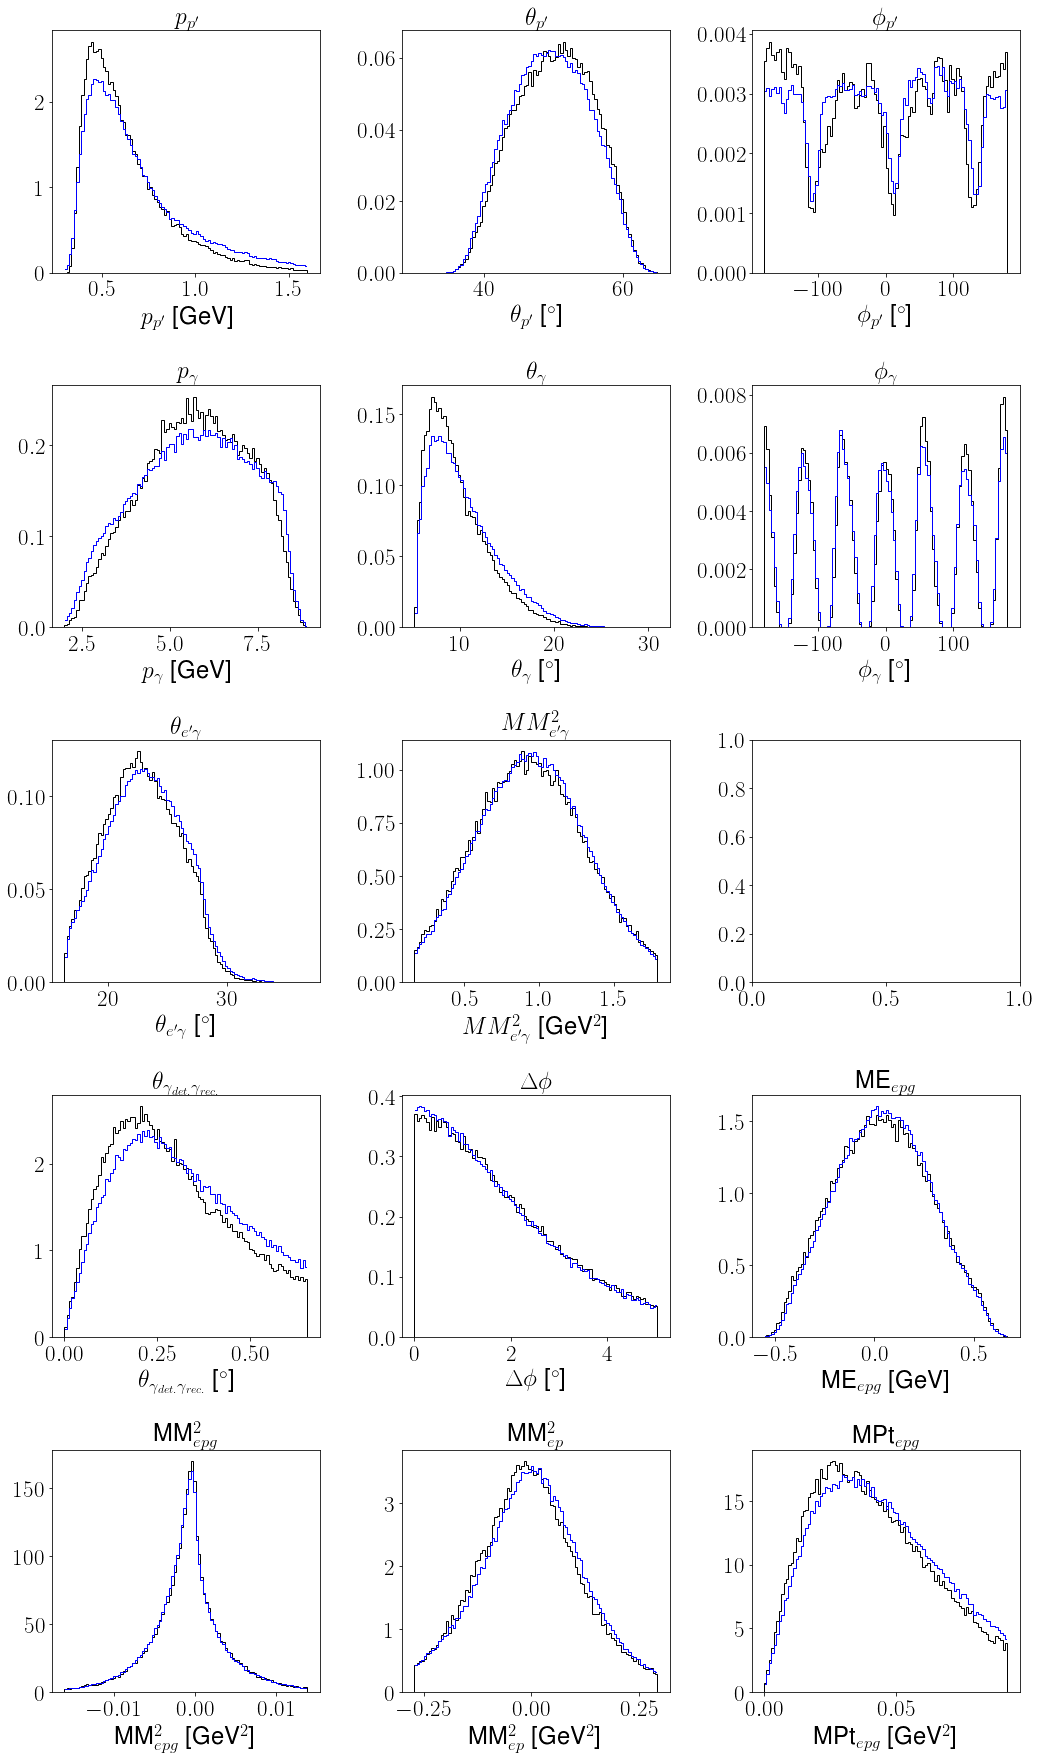

In [74]:
# for i in range(9):
PthetaMin = 0#PthetaEdges[i]
PthetaMax = 90#PthetaEdges[i+1]
varstoplot = ["Pp", "Ptheta", "Pphi","Gp", "Gtheta", "Gphi",  "coneAngle", "MM2_eg", "", "reconGam", "coplanarity", "ME_epg", "MM2_epg", "MM2_ep", "MPt"]
title = [r"$p_{p'}$", r"$\theta_{p'}$", r"$\phi_{p'}$", r"$p_{\gamma}$", r"$\theta_{\gamma}$", r"$\phi_{\gamma}$", r"$\theta_{e'\gamma}$", r"$MM^2_{e'\gamma}$", "", r"$\theta_{\gamma_{det.}\gamma_{rec.}}$", r"$\Delta\phi$" , "ME"+r"${}_{epg}$", "MM"+r"${}^{2}_{epg}$", "MM"+r"${}^{2}_{ep}$", "MPt"+r"${}_{epg}$"]
unit = [GeV, degree, degree, GeV, degree, degree, degree, GeV2,  "", degree, degree, GeV, GeV2, GeV2, GeV2, GeV2, GeV2, GeVc]
# binstarts = [PthetaMin, 0, -180, 0, 0, 0, -0.5, -0.01, 0.1, 0]
# binends = [GeMax, 7, 180, 30, 0.8, .1, 1.2, 0.01, 1.7, 10]
df3 = epgExpInbCD
df1 = dvcsSimInbCD
df2 = bkgSimInbCD
df4 = pi0ExpInbCD
df5 = pi0SimInbCD

# df1 = df1[df1.Gp>3]
# df2 = df2[df2.Gp>3]
# df3 = df3[df3.Gp>3]
# df4 = df4[df4.Gp>3]
# df5 = df5[df5.Gp>3]

# df1 = df1[df1.Pp<0.8]
# df2 = df2[df2.Pp<0.8]
# df3 = df3[df3.Pp<0.8]
# df4 = df4[df4.Pp<0.8]
# df5 = df5[df5.Pp<0.8]


contInb = len(df4)/len(df5) * len(df2)/len(df3)
contInbCD = contInb
print(contInb)
fig, axs = plt.subplots(5, 3, figsize = (15,25))
for yind in range(0, 5):
    for xind in range(0, 3):
        ind = 3*yind + xind
        if varstoplot[ind]:
            pass
        else:
            continue
        if ind == 1:
            bins= np.linspace(30, 65, 101)
            simDist_dvcs, _ = np.histogram(df1.loc[(df1.Ptheta < PthetaMax) & (df1.Ptheta>PthetaMin), varstoplot[ind]], bins, density = True)
        else:
            simDist_dvcs, bins = np.histogram(df1.loc[(df1.Ptheta < PthetaMax) & (df1.Ptheta>PthetaMin), varstoplot[ind]], 100, density = True)
        simDist_dvpi0, _ = np.histogram(df2.loc[(df2.Ptheta < PthetaMax) & (df2.Ptheta>PthetaMin), varstoplot[ind]], bins, density = True)
        simDist = (1-contInb)*simDist_dvcs + contInb*simDist_dvpi0
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        axs[yind, xind].step(bincenters, simDist, where='mid',color='b', linewidth=1)
        axs[yind, xind].hist(df3.loc[(df3.Ptheta < PthetaMax) & (df3.Ptheta>PthetaMin),varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', density=True, linewidth=1)
        axs[yind, xind].set_title(title[ind])
        # axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
plt.tight_layout()
# plt.savefig(outDir+"InbCD{}_{:.3f}_{:.3f}_{:.3f}.pdf".format(i, sigma1, sigma2, sigma3))
# plt.savefig(outDir+"InbCD{}_{:.3f}_{:.3f}.pdf".format(i, sigma1, sigma2))
# plt.savefig(outDir+"InbCD{}_{:.3f}.pdf".format(i, sigma2))
plt.show()


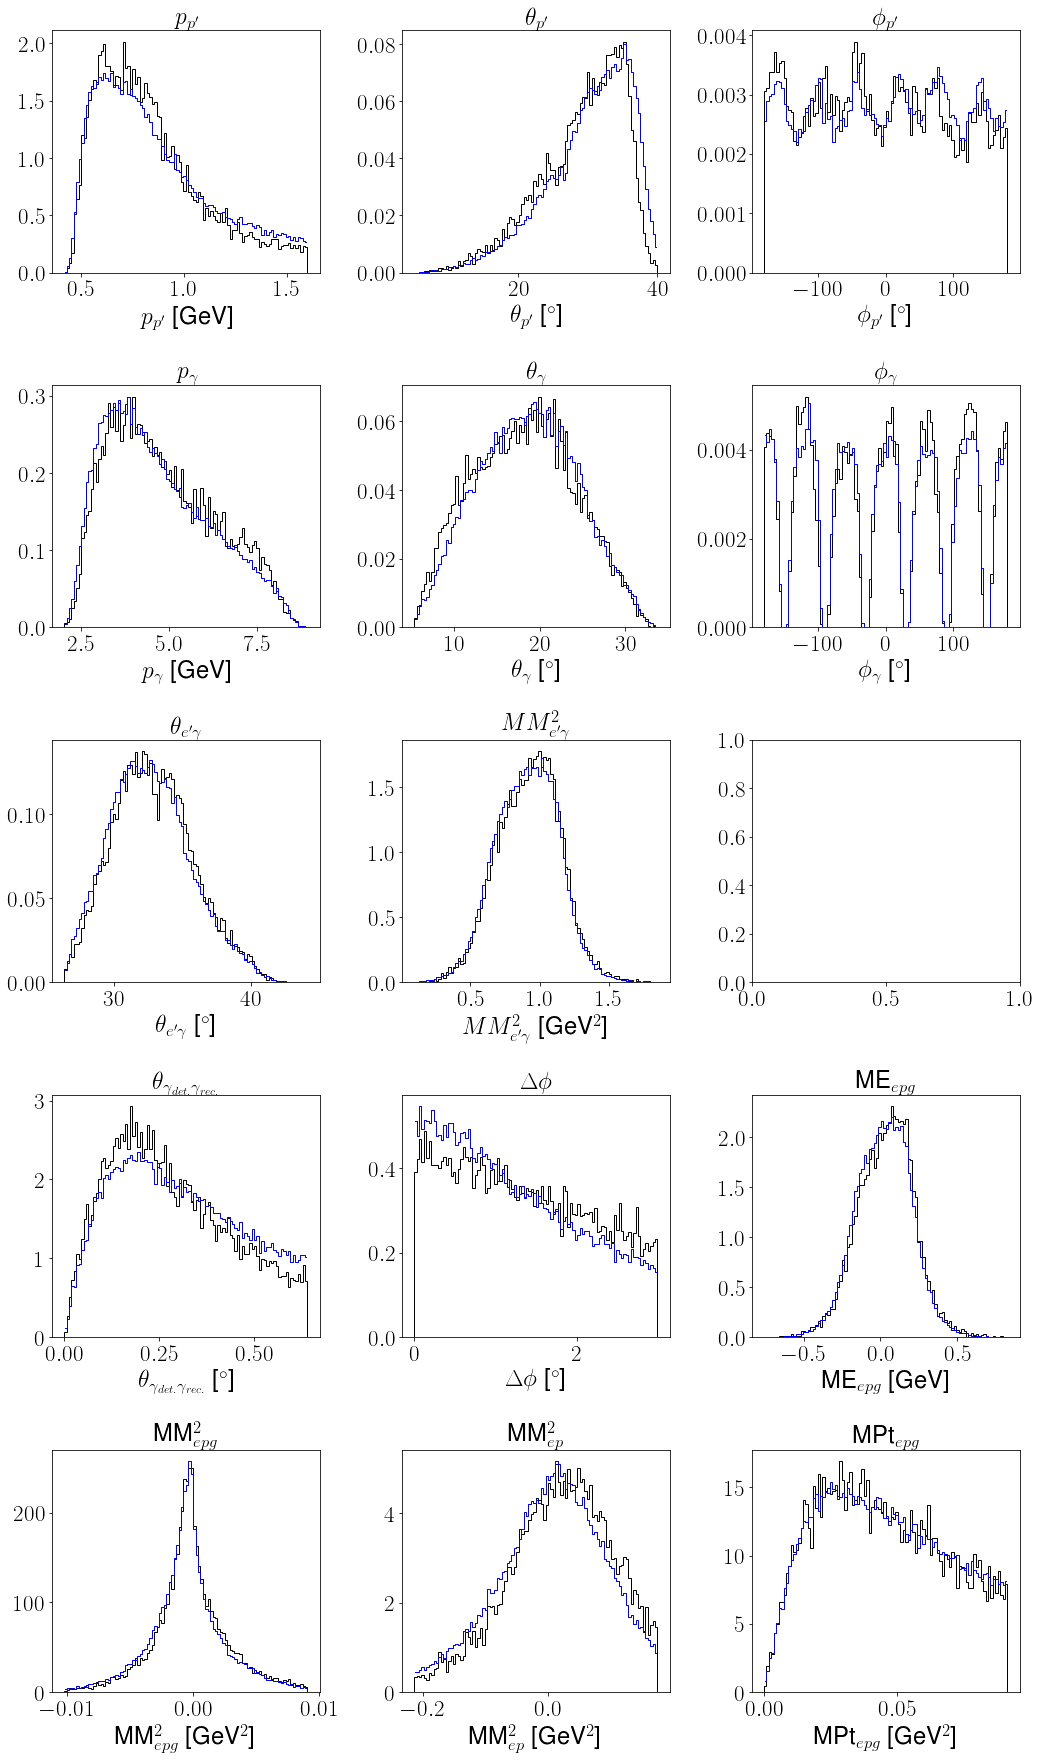

In [75]:
# for i in range(9):
PthetaMin = 0#PthetaEdges[i]
PthetaMax = 90#PthetaEdges[i+1]
varstoplot = ["Pp", "Ptheta", "Pphi","Gp", "Gtheta", "Gphi",  "coneAngle", "MM2_eg", "", "reconGam", "coplanarity", "ME_epg", "MM2_epg", "MM2_ep", "MPt"]
title = [r"$p_{p'}$", r"$\theta_{p'}$", r"$\phi_{p'}$", r"$p_{\gamma}$", r"$\theta_{\gamma}$", r"$\phi_{\gamma}$", r"$\theta_{e'\gamma}$", r"$MM^2_{e'\gamma}$", "", r"$\theta_{\gamma_{det.}\gamma_{rec.}}$", r"$\Delta\phi$" , "ME"+r"${}_{epg}$", "MM"+r"${}^{2}_{epg}$", "MM"+r"${}^{2}_{ep}$", "MPt"+r"${}_{epg}$"]
unit = [GeV, degree, degree, GeV, degree, degree, degree, GeV2,  "", degree, degree, GeV, GeV2, GeV2, GeV2, GeV2, GeV2, GeVc]
# binstarts = [PthetaMin, 0, -180, 0, 0, 0, -0.5, -0.01, 0.1, 0]
# binends = [GeMax, 7, 180, 30, 0.8, .1, 1.2, 0.01, 1.7, 10]
df3 = epgExpInbFD
df1 = dvcsSimInbFD
df2 = bkgSimInbFD
df4 = pi0ExpInbFD
df5 = pi0SimInbFD

# df1 = df1[df1.Pp<0.8]
# df2 = df2[df2.Pp<0.8]
# df3 = df3[df3.Pp<0.8]
# df4 = df4[df4.Pp<0.8]
# df5 = df5[df5.Pp<0.8]

contInb = len(df4)/len(df5) * len(df2)/len(df3)
contInbFD = contInb
fig, axs = plt.subplots(5, 3, figsize = (15,25))
for yind in range(0, 5):
    for xind in range(0, 3):
        ind = 3*yind + xind
        if varstoplot[ind]:
            pass
        else:
            continue
        if ind == 1:
            bins= np.linspace(5, 40, 101)
            simDist_dvcs, _ = np.histogram(df1.loc[(df1.Ptheta < PthetaMax) & (df1.Ptheta>PthetaMin), varstoplot[ind]], bins, density = True)
        else:
            simDist_dvcs, bins = np.histogram(df1.loc[(df1.Ptheta < PthetaMax) & (df1.Ptheta>PthetaMin), varstoplot[ind]], 100, density = True)
        simDist_dvpi0, _ = np.histogram(df2.loc[(df2.Ptheta < PthetaMax) & (df2.Ptheta>PthetaMin), varstoplot[ind]], bins, density = True)
        simDist = (1-contInb)*simDist_dvcs + contInb*simDist_dvpi0
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        axs[yind, xind].step(bincenters, simDist, where='mid',color='b', linewidth=1)
        axs[yind, xind].hist(df3.loc[(df3.Ptheta < PthetaMax) & (df3.Ptheta>PthetaMin),varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', density=True, linewidth=1)
        axs[yind, xind].set_title(title[ind])
        # axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
plt.tight_layout()
# plt.savefig(outDir+"InbFD{}_{:.3f}_{:.3f}_{:.3f}.pdf".format(i, sigma1, sigma2, sigma3))
# plt.savefig(outDir+"InbFD{}_{:.3f}_{:.3f}.pdf".format(i, sigma1, sigma2))
# plt.savefig(outDir+"InbFD{}_{:.3f}.pdf".format(i, sigma2))
plt.show()


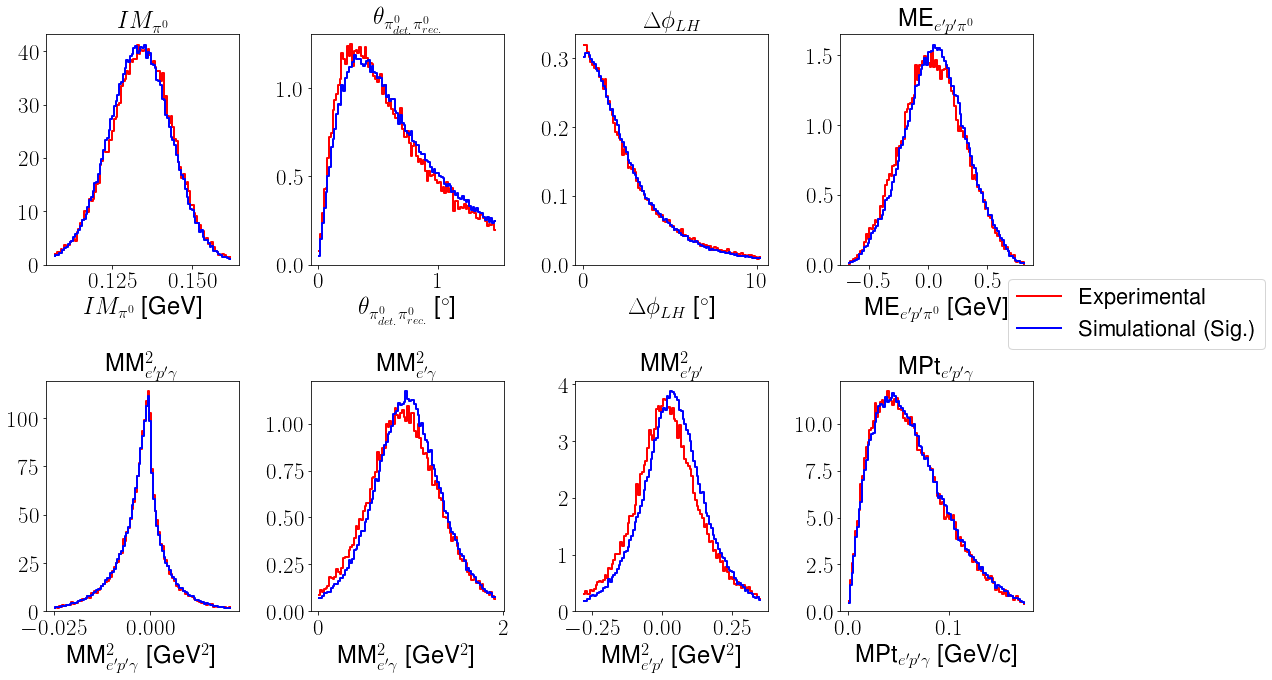

<Figure size 432x288 with 0 Axes>

In [90]:
varstoplot = ["Mpi0", "reconPi", "coplanarity", "ME_epgg", "MM2_epgg", "MM2_egg", "MM2_ep", "MPt"]
title = [r"$IM_{\pi^0}$", r"$\theta_{\pi^0_{det.}\pi^0_{rec.}}$", r"$\Delta\phi_{LH}$" , "ME"+r"${}_{e'p'\pi^0}$", "MM"+r"${}^{2}_{e'p'\gamma}$", "MM"+r"${}^{2}_{e'\gamma}$", "MM"+r"${}^{2}_{e'p'}$", "MPt"+r"${}_{e'p'\gamma}$"]
unit = [GeV, degree, degree, GeV, GeV2, GeV2, GeV2, GeVc]
binstarts = [10, 0, 0, -0.5, -0.01, 0.1,-0.4 , 0]
binends = [40, 2, 10, 1.2, 0.01, 1.7, 0.4, 0.2]
fig, axs = plt.subplots(2, 4, figsize = (15,10))
for yind in range(0, 2):
    for xind in range(0,4):
        ind = 4*yind + xind
        start = binstarts[ind]
        end = binends[ind]
        bins = 100#np.linspace(start, end, 101)
#         if ind == 2 :
#             bins = np.linspace(start, end, 101)
        simDist_dvpi0, bins = np.histogram(pi0SimInbCD[varstoplot[ind]], bins, density = True)
        expDist, bins = np.histogram(pi0ExpInbCD[varstoplot[ind]], bins, density=True)
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        if ind == 0:
            axs[yind, xind].step(bincenters, expDist, where='mid',color='r', linewidth=2, label = 'Experimental')           
            axs[yind, xind].step(bincenters, simDist_dvpi0, where='mid',color='b', linewidth=2, label = 'Simulational (Sig.)')  
            axs[yind, xind].set_ylim(bottom = 0)
        else:
#             axs[yind, xind].step(epgExpInbCDFT[varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='r', density=True, linewidth=2)
            axs[yind, xind].step(bincenters, expDist, where='mid',color='r', linewidth=2)
            axs[yind, xind].step(bincenters, simDist_dvpi0, where='mid',color='b', linewidth=2)
        axs[yind, xind].set_title(title[ind])
        axs[yind, xind].set_ylim(bottom = 0)
#         axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
# axs[0,2].set_xticks([2.2, 2.7, 3.2])
# axs[1,0].set_xticks([0.29, 0.32, 0.35, 0.38])
# axs[1,1].set_xticks([0.23, 0.3, 0.39, 0.52])
# axs[1,2].set_xticks([0, 90, 180, 270, 360])
plt.tight_layout()
# plt.savefig("kineCDFT.pdf")
# plt.savefig("analysisnote/inbending1.pdf")
fig.legend(bbox_to_anchor = (1.2, 0.6), title = "")
plt.show()
plt.clf()

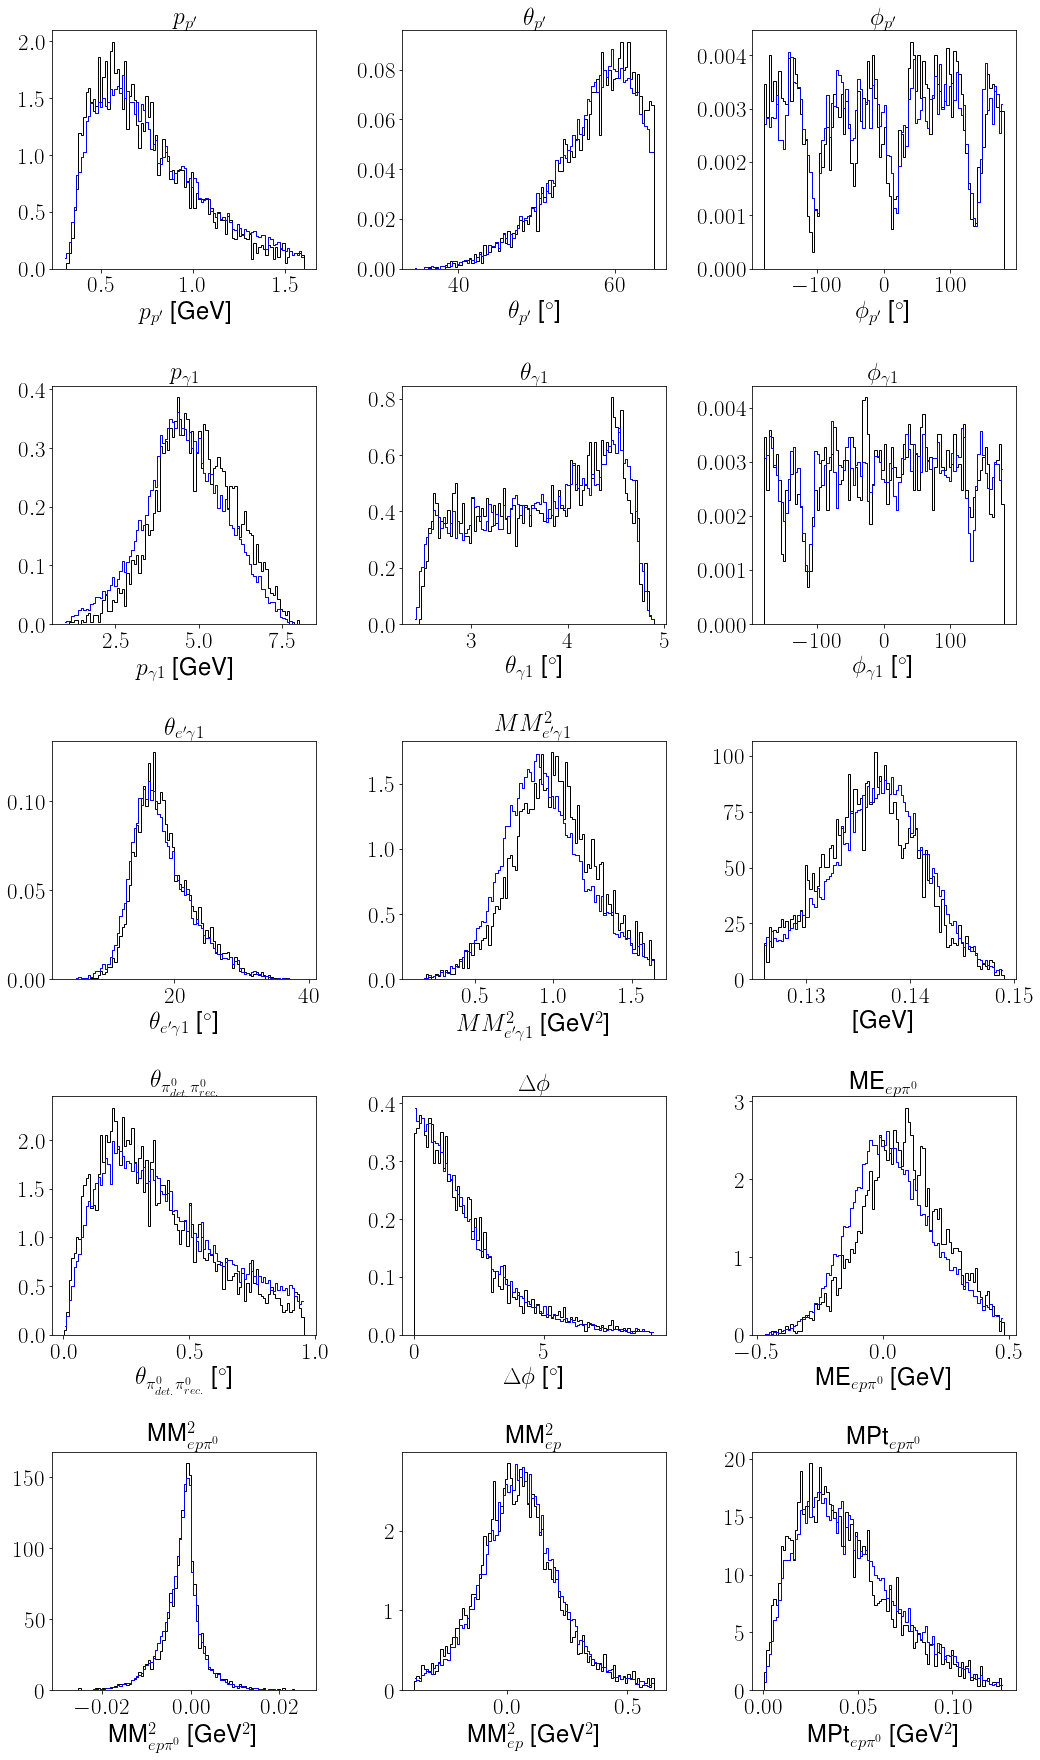

<Figure size 432x288 with 0 Axes>

In [31]:
varstoplot = ["Pp", "Ptheta", "Pphi","Gp", "Gtheta", "Gphi",  "coneAngle1", "MM2_egg", "Mpi0", "reconPi", "coplanarity", "ME_epgg", "MM2_epgg", "MM2_ep", "MPt"]
title = [r"$p_{p'}$", r"$\theta_{p'}$", r"$\phi_{p'}$", r"$p_{\gamma 1}$", r"$\theta_{\gamma 1}$", r"$\phi_{\gamma 1}$", r"$\theta_{e'\gamma 1}$", r"$MM^2_{e'\gamma 1}$", "", r"$\theta_{\pi^0_{det.}\pi^0_{rec.}}$", r"$\Delta\phi$" , "ME"+r"${}_{ep\pi^0}$", "MM"+r"${}^{2}_{ep\pi^0}$", "MM"+r"${}^{2}_{ep}$", "MPt"+r"${}_{ep\pi^0}$"]
unit = [GeV, degree, degree, GeV, degree, degree, degree, GeV2, GeV, degree, degree, GeV, GeV2, GeV2, GeV2, GeV2, GeV2, GeVc]
# binstarts = [PpMin, 0, -180, 0, 0, 0, -0.5, -0.01, 0.1, 0]
# binends = [PpMax, 7, 180, 30, 0.8, .1, 1.2, 0.01, 1.7, 10]

df4 = pi0ExpInbCDFT
df5 = pi0SimInbCDFT

# df1 = df1[df1.Gp>3]
# df2 = df2[df2.Gp>3]
# df3 = df3[df3.Gp>3]
# df4 = df4[df4.Gp>3]
# df5 = df5[df5.Gp>3]

# df4 = df4[df4.Pp<0.8]
# df5 = df5[df5.Pp<0.8]


fig, axs = plt.subplots(5, 3, figsize = (15,25))
for yind in range(0, 5):
    for xind in range(0, 3):
        ind = 3*yind + xind
        if varstoplot[ind]:
            pass
        else:
            continue
        simDist, bins = np.histogram(df5[varstoplot[ind]], 100, density = True)
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        axs[yind, xind].step(bincenters, simDist, where='mid',color='b', linewidth=1)
        axs[yind, xind].hist(df4[varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', density=True, linewidth=1)
        axs[yind, xind].set_title(title[ind])
        # axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
plt.tight_layout()
plt.show()
plt.clf()



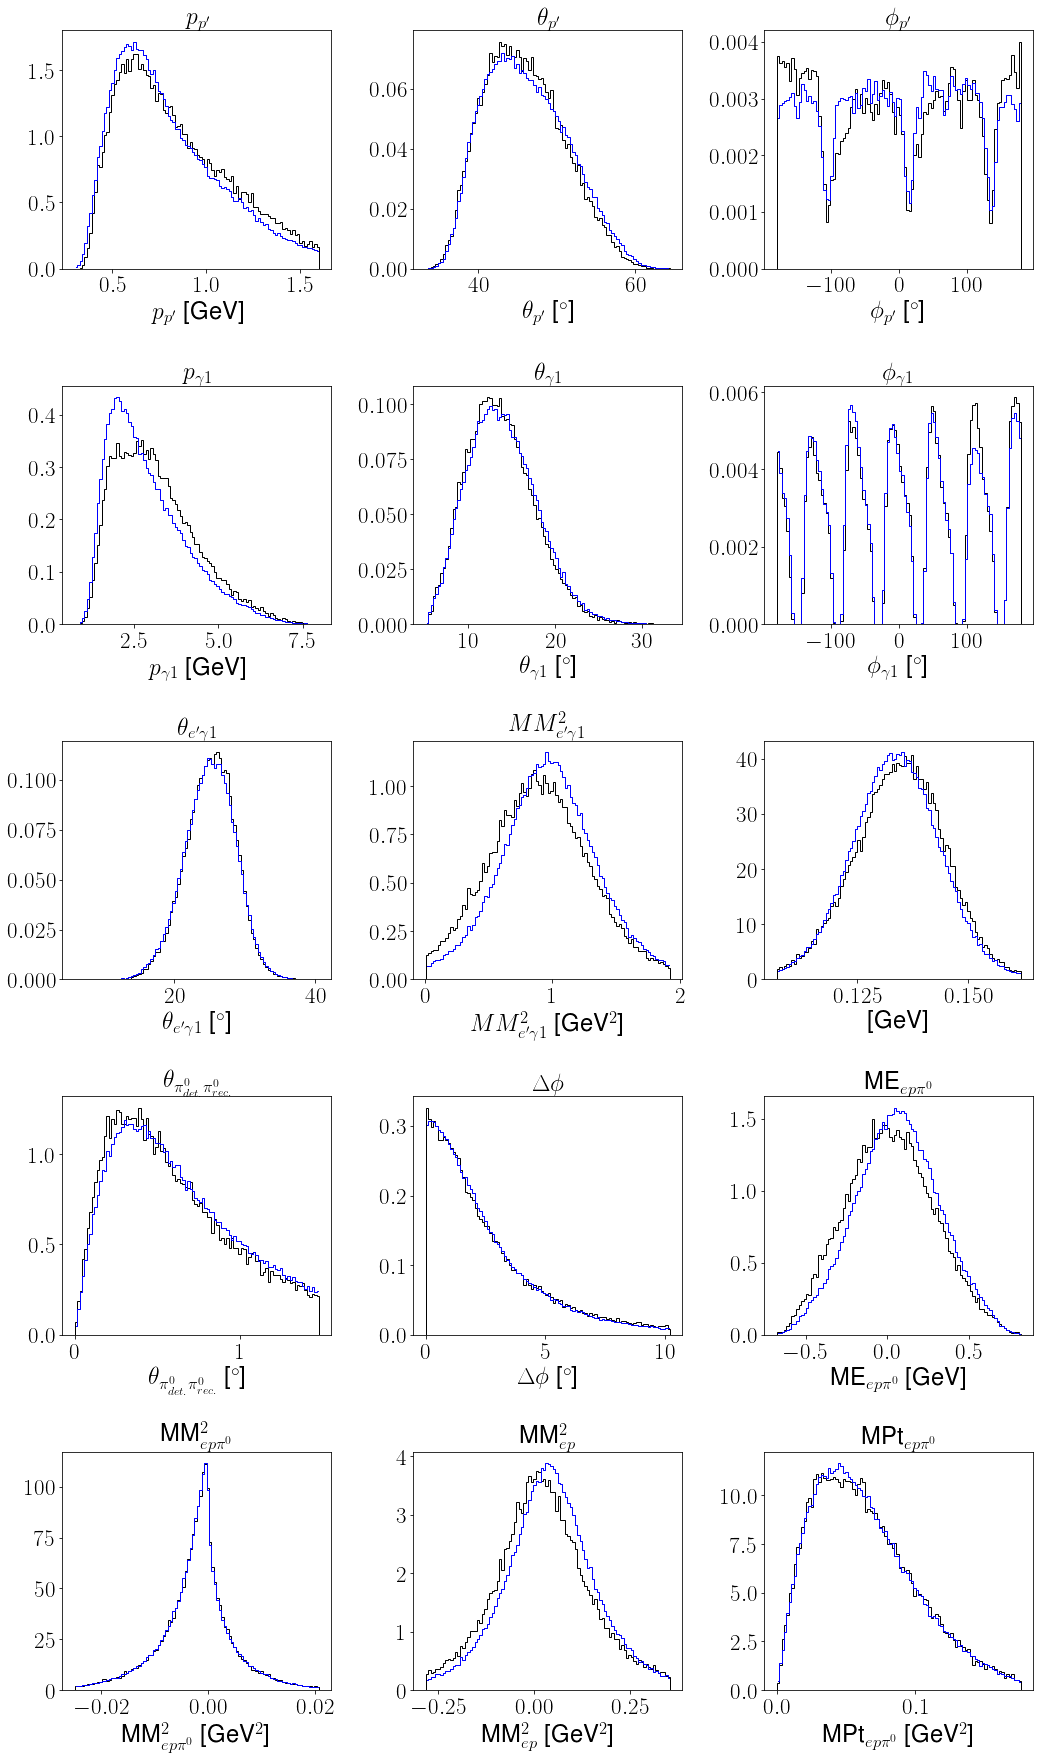

<Figure size 432x288 with 0 Axes>

In [32]:
varstoplot = ["Pp", "Ptheta", "Pphi","Gp", "Gtheta", "Gphi",  "coneAngle1", "MM2_egg", "Mpi0", "reconPi", "coplanarity", "ME_epgg", "MM2_epgg", "MM2_ep", "MPt"]
title = [r"$p_{p'}$", r"$\theta_{p'}$", r"$\phi_{p'}$", r"$p_{\gamma 1}$", r"$\theta_{\gamma 1}$", r"$\phi_{\gamma 1}$", r"$\theta_{e'\gamma 1}$", r"$MM^2_{e'\gamma 1}$", "", r"$\theta_{\pi^0_{det.}\pi^0_{rec.}}$", r"$\Delta\phi$" , "ME"+r"${}_{ep\pi^0}$", "MM"+r"${}^{2}_{ep\pi^0}$", "MM"+r"${}^{2}_{ep}$", "MPt"+r"${}_{ep\pi^0}$"]
unit = [GeV, degree, degree, GeV, degree, degree, degree, GeV2, GeV, degree, degree, GeV, GeV2, GeV2, GeV2, GeV2, GeV2, GeVc]
# binstarts = [PpMin, 0, -180, 0, 0, 0, -0.5, -0.01, 0.1, 0]
# binends = [PpMax, 7, 180, 30, 0.8, .1, 1.2, 0.01, 1.7, 10]

df4 = pi0ExpInbCD
df5 = pi0SimInbCD

# df1 = df1[df1.Gp>3]
# df2 = df2[df2.Gp>3]
# df3 = df3[df3.Gp>3]
# df4 = df4[df4.Gp>3]
# df5 = df5[df5.Gp>3]

# df4 = df4[df4.Pp<0.8]
# df5 = df5[df5.Pp<0.8]


fig, axs = plt.subplots(5, 3, figsize = (15,25))
for yind in range(0, 5):
    for xind in range(0, 3):
        ind = 3*yind + xind
        if varstoplot[ind]:
            pass
        else:
            continue
        simDist, bins = np.histogram(df5[varstoplot[ind]], 100, density = True)
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        axs[yind, xind].step(bincenters, simDist, where='mid',color='b', linewidth=1)
        axs[yind, xind].hist(df4[varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', density=True, linewidth=1)
        axs[yind, xind].set_title(title[ind])
        # axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
plt.tight_layout()
plt.show()
plt.clf()



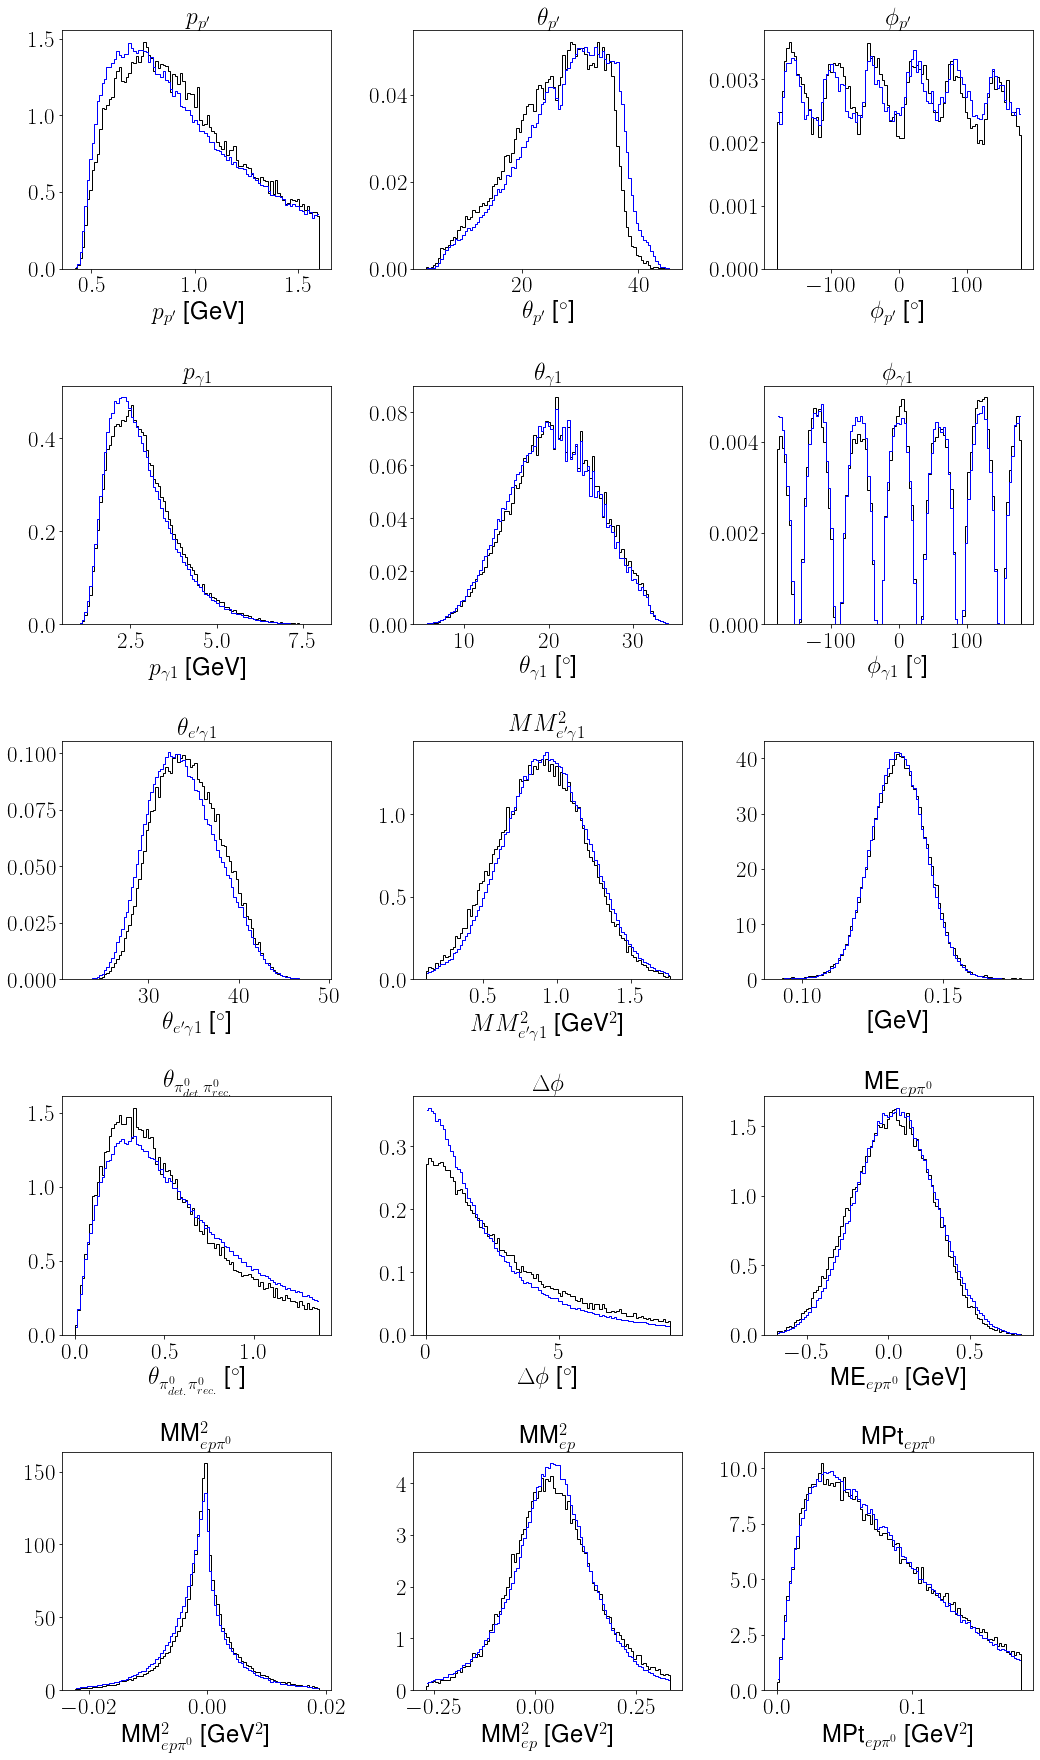

<Figure size 432x288 with 0 Axes>

In [33]:
varstoplot = ["Pp", "Ptheta", "Pphi","Gp", "Gtheta", "Gphi",  "coneAngle1", "MM2_egg", "Mpi0", "reconPi", "coplanarity", "ME_epgg", "MM2_epgg", "MM2_ep", "MPt"]
title = [r"$p_{p'}$", r"$\theta_{p'}$", r"$\phi_{p'}$", r"$p_{\gamma 1}$", r"$\theta_{\gamma 1}$", r"$\phi_{\gamma 1}$", r"$\theta_{e'\gamma 1}$", r"$MM^2_{e'\gamma 1}$", "", r"$\theta_{\pi^0_{det.}\pi^0_{rec.}}$", r"$\Delta\phi$" , "ME"+r"${}_{ep\pi^0}$", "MM"+r"${}^{2}_{ep\pi^0}$", "MM"+r"${}^{2}_{ep}$", "MPt"+r"${}_{ep\pi^0}$"]
unit = [GeV, degree, degree, GeV, degree, degree, degree, GeV2, GeV, degree, degree, GeV, GeV2, GeV2, GeV2, GeV2, GeV2, GeVc]
# binstarts = [PpMin, 0, -180, 0, 0, 0, -0.5, -0.01, 0.1, 0]
# binends = [PpMax, 7, 180, 30, 0.8, .1, 1.2, 0.01, 1.7, 10]

df4 = pi0ExpInbFD
df5 = pi0SimInbFD

# df1 = df1[df1.Gp>3]
# df2 = df2[df2.Gp>3]
# df3 = df3[df3.Gp>3]
# df4 = df4[df4.Gp>3]
# df5 = df5[df5.Gp>3]

# df4 = df4[df4.Pp<0.8]
# df5 = df5[df5.Pp<0.8]


fig, axs = plt.subplots(5, 3, figsize = (15,25))
for yind in range(0, 5):
    for xind in range(0, 3):
        ind = 3*yind + xind
        if varstoplot[ind]:
            pass
        else:
            continue
        simDist, bins = np.histogram(df5[varstoplot[ind]], 100, density = True)
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        axs[yind, xind].step(bincenters, simDist, where='mid',color='b', linewidth=1)
        axs[yind, xind].hist(df4[varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', density=True, linewidth=1)
        axs[yind, xind].set_title(title[ind])
        # axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
plt.tight_layout()
plt.show()
plt.clf()



0.28287613190449135


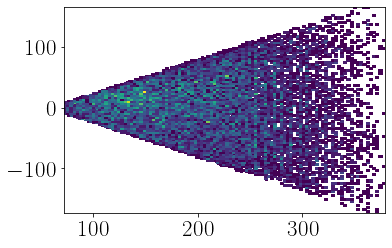

In [68]:
2*M*(np.sqrt(1.6**2+M**2)-M)

1.7199412633713436

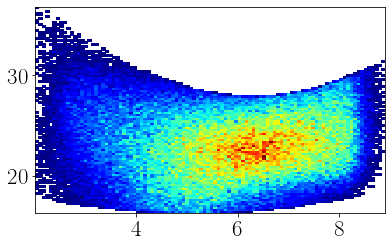

In [95]:
plt.hist2d(dvcsSimInbCD.Ge, dvcsSimInbCD.coneAngle, bins = 100, cmin = 1, cmap = cmap)
plt.show()